<a href="https://colab.research.google.com/github/RodrigoZonzin/calculo_numerico/blob/main/tp1/nn_calcNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Iniciando os dados

In [ ]:
data = pd.read_csv('/content/sample_data/mnist_test.csv')
data = np.array(data)

In [ ]:
m, n = data.shape
np.random.shuffle(data)

In [ ]:
data_dev = data[0:1000].T         #apenas transpoe os dados (785, 1000)
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.              #normalizacao dos pixeis

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

$ ReLU(z) = \begin{cases}
		z, & z < 0 \\
		0, & z \geq 0 \\
	\end{cases} $

$softmax(z) = \frac{e^z_i}{\sum_{j = 1}^{K} e^{z_j}}$

In [ ]:
ReLU = lambda Z: np.maximum(Z, 0)
softmax = lambda Z: np.exp(Z)/ sum(np.exp(Z))

$ \dfrac{d}{dz}ReLU(z) = \begin{cases}
		0, & z < 0 \\
		1, & z \geq 0 \\
	\end{cases} $

In [ ]:
ReLU_deriv = lambda Z: Z > 0

## Foward propagation
### É a propagação capaz de gerar novos dados.
89RqNer1Opubm3g8HpaWlhgYGGBqagqdTsfIyAijo6Pkcjm0Wi2XLl2Seq32EtmVIAjCO/PQz/q7Uzwe58aNG6jVanQ6HSaTCYVCgVwux2KxAJDJZLh48SJra2uEw2EuXbqETqcDbi9f3N7e5ty5cyiV+wd/FItFMTNQEAThhERGdQePx4NarWZnZweZTEa5XKZarWK1WllcXKSlpQWFQsHCwgI+nw+fz8fo6Cj1eh3gQK/VXiK7EgRBODkRqA7R09MjTakA0Gq1RKNR+vr6mJubY3BwkGg0SiKRoKurC4fDwa1bt6TrD+u12kucXQmCIBzfQ/PoL51Oc/PmTVZXV6lUKtjtdoLBIBcvXjzwvdlslldeeQWdToder6der2M2m7HZbKRSKdxuNzqdjomJCR5//HG0Wi2Tk5Ps7u4yPDwsvU40GmVqaopz587tW9i41/Lysth3JQiCcBeKP/zDP/zD9/om3k2RSIQvfelLvPDCC9hsNnp6eujo6GB3d5fXX3+dL3/5y1SrVc6ePStdo9VqyWQy5HI5Go0GOp0Oo9HIysoKAwMDTExM0Nvbi0KhIBKJ0NbWhsvlIhqNksvlcDqdAJhMJiwWC+Pj46jVasxm84H7s1qteDweVldXiUajmM1m1Gr1L+zzEQRBeNCd6ozqe9/7Hl//+tf5F//iX/DEE08c+j07Ozt85StfYX5+ni984QsYDAbgdqYzMzODRqPBaDRSLpdxuVzIZDKUSiVbW1ucO3eOW7duYTQa6e3tpdFocPPmTex2Oz09PdLPyOfzjI6O4vP56OrqOvJ+RXYlCIJw0Kk9o/rRj37Eiy++yP/4H//jyCAFoFar+Z3f+R2effZZ/vW//tfS37e2tu4rUdfr9ajVatbW1vB4PGxtbRGLxfadV8lkMs6dOydNr2i6W6/VXuLsShAE4aBT+egvm83yuc99jueee+7Qx22H6enpoVAo8MMf/pDHHntMmqBeLBbR6/XSOKXOzk7i8Tjd3d1MTU0RCAQwmUxMTk7S2tqKVqvFbrczOTmJVqvFZDIBoFQqaW1tZW1tTTrnOoxaraatrY2dnR1u3bqFUqnEarXet89GEATh/eZUZlTf+MY3+OQnP4nNZjvRdZ/85CcZHx8nGo0Ct7Mqufz2R5TNZjGbzSgUCgqFAvV6HY/Hw/z8PC0tLQQCASYnJ4HbZeh7p1c0KRSKA3utjiKyK0EQhNtOZaB67bXX+MhHPnJP1/7Kr/wK3/ve94DbPVUKhYJSqYRarUaj0bC0tER3dzehUIhgMEg6nSaVStHV1SX1VwHYbLZ90yv2uluv1V6i70oQBOEUBqpQKERnZ+c9X3/lyhVGR0elP7e1taFWq1EoFFJWVa1WUSgUrK+vEwwGmZubA9h3XgXgdrvp7+9nbGyMcrm87+e8Xa/VXiK7EgThYXbqAlU8Hsfr9d7z9R6Ph1Qqte/P9XqdYrGITCbDaDSytLRET08PoVCIlpYWLBYL8/PzqNVqaR5gpVIBOHR6RdNhe62OIrIrQRAeVqcuUO3u7iKTyd7Ra+yt2Ldarej1emmqej6fx2w2UygUsNvt0iPAtbU1Njc3D5xXAYdOr2hqa2tjZGTkwF6ro4jsShCEh82pC1Rut5tYLHbP16dSKex2+76/a2trQ6FQUK1W2drawuFwSGdVi4uL1Go1abwScOC8Cm4/6tNqtQemqwO0tLQcutfqKCK7EgThYXLqAlVfX9++AHFSN2/eZGRkZN/ftba2Ui6X2d7exmazkcvlMJvNpNNpqbDC5/Oh0WikQHPneRXcLqKo1+uH9lIdt9dqL5FdCYLwMDh1gQrgwoUL/OAHP7ina1944QWcTue+hl2NRoPT6UStVtNoNIjH47S2tkpZVSqVIpvN0t/fz+LiIoVC4dDzKoCRkRHy+TyLi4sHfvbd9lodRWRXgiCcdqey4berq4s//uM/5iMf+QgKheLY17344oukUil+/dd/nXQ6zczMDPV6Hb1ej0qlYnNzk0wmg8/no1qtIpfLqdVq2O121tbW6OjoQKFQsLq6SltbGwaDgUajIc0DBJDJZDidTubn5wGkHVdNcrmc1tZWUqkUq6uruFwuqZfrbsTMQEEQTqtTmVG1trbyiU98gj/4gz849jU3btzgz//8z/nYxz7G9PQ0DoeDy5cvU61WefXVV0mn02QyGWw2G3K5nJWVFfx+P0tLS/j9fqrVKvF4nEAgQKPRkDKyw86rNBoNIyMjhEKhI8/TjttrtZfIrgRBOI1OZUYF0N/fz+bmJs899xzd3d1HrtmA25Msvv71r/PJT36SRqNBIBAgnU6zublJT08P3d3dlMtlwuEw2WyWcrksZUiNRoNqtYrL5WJxcRG/34/JZGJsbAyv14tSqcThcDAzMyNNYYfbo5KsVitvvfUWNpsNvV5/4L4cDgf1ep2pqSmsVitarfZY711kV4IgnCanNlDB7YKGjo4O/vRP/5SXX36ZUqlEtVolm80yNzfHd77zHT7/+c+TTqf5h//wH2IymTCbzWSzWak4YnR0FK1WSyAQoL29nWg0SjqdplQqEY/HOX/+PLOzswwMDLCxscH29jZut5tGo0EsFpOmWxgMBmkeYHNFfXPV/fj4OA6H49BAZLVaUavVjI6OYjKZpOnub0fMDBQE4bQ41Ws+9pqfn+fmzZusrKxI1Xtnzpwhk8kQDofxer1YrVZMJhNOp5NisYjT6cTj8TA7O4tSqSQYDDI6OorBYKBQKBCNRlEqlWi1Wnp7e3G73dy8eZNr166hUqm4ceMGnZ2dtLa2AhAOh8lkMgeWNa6trREOh7l06RI6ne7Q+0+lUoyNjREMBvH5fCd678Vikbm5ORqNBsFgUMrqBEEQ3g8emkB1lOXlZf7yL/8Ss9mM3W7HbrejVqvxeDzkcjm0Wi1DQ0OEw2EWFxelrCYej3PmzBlCoRB6vZ6bN2/y1FNPUalUMBqNBINBMpkMY2NjXL16Vcqi9u6v2iscDpNIJLh8+fKRBSDH3Wt1t/cq9l0JgvB+c6of/R2HxWJhYWGBra0tTCYTGo0GvV5PNpulvb2dUqlENBolGAzicrlIJpOMjY3R2dmJRqOhVCrR19eHwWBga2uLUqnE2NgYNpuNtrY2KpUKGxsbtLS0ABx6XgW3h9iWy+V9FYJ30mg0uN1uQqGQlPGdhDi7EgTh/eihD1QymYxGo8Ha2hp6vV4av2Sz2VhdXaWrq4tarUYoFMLr9dLZ2UkikSASibC5uUkwGJT2U8ViMZ5++mmq1SqTk5Pk83kcDgexWAy9Xo/BYDjyvApuB7FMJkM8Hj9yX9Vx91odRZxdCYLwfvPQByoAg8FAKBSiXC6j0+nQ6XRUKhXa29uZmZmhr68PhULBzMwMNpsNp9NJvV5nY2ODarVKoVCgo6ODra0tqtUqg4ODZLNZXC4X+XyeWCzG8vIyXV1dKJXKQ/urmlwuF9FolFwud2TGdK+9VnuJ7EoQhPcLEai4/Uhtc3OTXC6HwWBALpdjMpnIZDL09fUxPT1NX18fOp2O8fFx2traiMViDAwMkEql2NjYoFAocObMGWZnZwkEAqhUKmKxGBcvXsTn87G2tsabb76JQqFAo9HQ2tpKIpGgWCzicDj23Y/H42FpaYlyuXxg7uBeLpeLYrHIwsICDocDlUp1ovctsitBEN4PRKD6OY1Gw8rKCpVKBZVKRa1Ww+FwUCqVaG9vZ25ujt7eXiwWC7du3UKr1WI0GikWi1y4cIG/+7u/Q61WI5fLaTQa+Hw+YrEYjUYDp9NJZ2cn6XQanU5HJBIhnU7jdrtZWVk5cF71dtMr9rrXXqu9RHYlCMKDTASqnzOZTNJAWb1eL51XyWQylEql9PXe3l4cDoc0VaKrq4t6vY7X6yWfz7OxscH6+jpnzpxBr9czOzsrjVbSaDRkMhmefPJJ6VysWCyyuLgoPRZsUiqV2O12Jicn0Wq1mEymI+/9Xnut9hLZlSAIDyoRqPaQy+Wsr69TrVaB2/94WywWotEo7e3t1Ot11tfX6ezsxOv18tZbb6HRaMjlcpw5c4ZoNMrjjz/O3Nwc6+vrdHV1UalUpN1VZrOZVCpFuVymo6MDn8+HzWYjmUzy+uuvYzKZpN1XzZ//dtMrmprNyuPj46jVasxm8z19BiK7EgThQSMC1R5arZZwOIxer0en06HRaEgkEvT29jI/P8/w8DCZTIZkMonP58NkMklFGG63m1qthkKhYGBggNnZWRKJBE6nU6oYVKlUWCwWRkdHcblcUil8b28vlUqFZDJJJBKhXC6j0WjQarXHml7RZDAYcDqd0jBdm812T5+DyK4EQXiQiEC1h1qtZnt7m3g8Lm35bWlpoVQq0dLSwvr6OiMjI6ytrVEoFPD7/cTjcfR6PTMzM5w7d46lpSV6e3vZ3t7GbreTz+cpFApUKhXa2tpQqVT7Jqw3NRc+BoNB5HI58/PzpNNplEolbrcbtVrN7OwsLpfrrkUTzV6rcDh8T71We4nsShCEB4EIVHeQy+XEYjF0Oh1arRaZTMbu7i42m41isUipVCIYDBIOh9nd3UWhUOD3+4lEIpRKJWQyGVqtFqfTSTgc5oknnkChUPDyyy9jMBhwuVxYrVbW19ep1+tSoUSzv2p6epqBgQF6enqkEvaVlRVMJhNGo5FQKERbW9tdy9Hfaa/VXiK7EgThvSYC1R2MRiPr6+vk83l2d3dRqVTYbDaWlpYYGhpifn4ek8lER0cHMzMzaDQaCoUCXV1d5HI58vk8pVJJmt5erVbp7OyUHt9Vq1UsFgt2u33fhHXgQH+V2WzG5/Oh1+tJJBLEYjGq1SrJZJL29va7vo/70Wu1l8iuBEF4r4hAdYhGo0E2m5Wyqnw+j8/nI51O09nZyfT0NO3t7bS0tBAKhUin09KEiqGhIX7yk5/gcDhoa2uT+qpaWlrY2toCbg/INRqNmM1macJ6k81mO9Bfpdfr8Xg8tLS00Gg0GBsbY2VlBY/H87bl6O+012ovkV0JgvBeEIHqEAaDgYWFBeRyOZVKBavVil6vZ2NjA5vNhlarZX19nUAggMViYXJyErVaLY1Jstls/PSnP6Wjo4NarSZlURqNhmQyyYULF1heXpZWjtxZfn7UPEC1Wk1LSwuDg4MsLy8zOTnJ9va2NO3iKPej12ovkV0JgvCLJALVIZRKJZVKhWKxiF6vR6vVsrq6Sn9/P/Pz85w7d45YLEapVMLn86HT6XjttdcYGhqSdlStr6+TyWSwWCzEYjECgQAGg4GNjQ3g9q6s5hDaSCRCX1+f9GjubvMAm1/v6emhXC5Tq9XIZrOsrKzQaDSObA6+H71We4nsShCEX5SHIlDt7u7yf/7P/+Eb3/gGX/va13j++ef54Q9/KK3oOKzYQKlUEovFUCgU5HI5vF4vlUoFg8Gwb7SSwWDA7/cTjUbJZrPs7u5KZeQ6nY5isSg9RrRYLFIAam9vx+l04vV6WV5eZmFhAb/fLz2au9s8QPj/0yvW1tbw+XzSSKbp6Wnq9fq+fqym+9VrtZfIrgRBeLed+kD1wgsv8NnPfha3280v//Iv8+lPf5qPf/zjPPHEEzQaDf73//7f/M3f/A1nzpzZl400CxgqlQoWiwWtVksymaSnp4elpSWsVitOp5Pp6WlaW1ulALa1tYVSqSQQCDA7O8uVK1dIpVJMTk4yPDyMRqNhe3ubzc1NnE4nGo2GYDDI1NQUoVAIg8Eg3cdh51V77Z1eYbPZ6O3tpaWlhc3NTSYmJvb1YzXdr16rvUR2JQjCu+lUB6o/+ZM/IZlM8id/8idcvnwZp9MpLSXU6XR0dnbyzDPPYLFY+KM/+iP8fj9er1e6vtFokMvlUCgUpFIpOjo6SCaTBAIBQqEQwWCQWq0mTaFYWVnB6/Vy8+ZNLly4QLlcZmdnh5GRERYXF1lZWaGrqwubzcbExAQulwu1Wo1MJsPhcJDNZqnVaiQSCSwWCyqV6sjzqqY7p1dYrVZaWlrw+/2Uy+V9/VjNx333s9dqL5FdCYLwbji1geq//tf/ikwm4zOf+cyBR2B38vl8XLlyhc9+9rNcvHhRygaaRRWNRgO73Y5SqaRQKOBwOKhWq+TzeXp7e4lGo1JRg9PpJJvNEovF6O/vZ2FhgY6ODlpbW5mcnGRrawu3241KpSIej0sVf0ajkVKphNFoRK/XMzo6ikqlwm633/W8Cjh0eoVCocBmsxEIBPb1YzXPse5nr9VeIrsSBOF+O5WBanx8nO9+97t87nOfO/Y1ZrOZ9vZ2vvKVr/Dss88Ct4sWKpUKOzs70tqO7u5uIpEIZ8+eZWJiArvdTltbG9PT01gsFjY3NxkZGeHWrVtYrVYajQYymYyWlhaq1SrValVayLi6uopOp5MyneZjvM7OTvx+P8vLyyQSCdra2lAqlXfd/ms0Go+cXnFnP1bzHMtoNNLe3n7feq32EtmVIAj3y6kMVP/5P/9nfvu3f/vIf9SP4vP5+MlPfoLNZqO1tRW4nSE0z4laW1vZ3d2l0Wiwu7uL0+kkEonQ0dGBXq9neXmZYrEoDaPd2NhAo9GQzWal6sBoNEp3dzfj4+O4XC7i8Tg+nw+4HRhVKhVLS0t0d3fj9Xopl8vSbMBmJeJh51VwOyDV6/Ujp1fs7cfae47V3t5OtVq9L71We4nsShCE++H+/Pr8AKlWqywtLXHhwoV7uv7ZZ5/lxz/+sfTnZlm30WhEJpMRiUTw+XxSMFAqlSwtLeFyufD5fJTLZaLRKD6fD6vVSrlcJplMsrGxgdVqxWw2s7u7y9mzZ1lbWyOXy7G2tib9PJ/Ph0ajkVaOdHV1ceXKFeLxuPTeEonEkfff1dWFw+Hg1q1bR36P0WjkzJkzPP3009Jjxnw+j1ar5Y033iCbzd7TZ3eUQCDAE088wcbGBj/72c8oFov39fUFQTjdTl2gmp2dZXBw8J6vHxkZYXp6et/feb1e5HI5iUSCjo4OMpkMbrebUChEX18f8/PzbG1t0dPTg81mY2xsDJ/PRyaTYWBggEqlwvj4OACdnZ1SYLt06RK1Wo2/+7u/k4bgAvT397O4uEihUABuZ0rNYpBCocBPfvITKpXKke+hr68PrVYr/cyjqFQqurq6eOqpp2htbWVnZ4etrS2+//3vk0wm7/UjPJTRaOTChQs4nU5ee+01lpeX7+vrC4Jwep26QLW5uXnko7HjMJlM0qijJp/PR6FQwGw2o1AoiEQieL1eIpEIMpmMvr4+5ubmALh8+TKZTIalpSVpmeIHP/hBJiYmWFlZkbKqlZUVbDYbTz/9NLVabV8Wp9fr971mU1dXF3/v7/09NBoNL774IqVS6cj3MTQ0RL1eZ3Z29ljv2+v1cuXKFa5cuUJrayvPP/88N27cuGtAvBciuxIE4aROXaBSq9Xs7Oy8o9eQyWQH/twcHptIJAgEAsTjcbq7uwmFQnR2dlKr1VhdXUWr1Uqr6ZurQRwOB48++iivvvoqxWJRyqrgdlD68Ic/zMLCAm+99Zb0M5vVeisrK/vuxWw288u//MuYzWZeeOGFA1/fa2RkhHw+z+Li4rHfu8Ph4Nq1a3z0ox9lZWWFb3/720xOTpLL5Y79Gm9HZFeCIJzEqSumkMlk/N//+3+lyr2TCofD3Lx5k7a2NsrlMru7u6jVanQ6HZFIBK1Wi9VqJRQKMTw8TCgUwmg00tLSwuTkJF6vF5fLxczMDCqVCrlcjlqtprOzk9nZWfL5PF1dXeTz+X0zAC0WC+FwmFKphNvtRiaTYTKZDkxYb+ro6CCRSLCxsUEul5P6ru78LJxOJ/Pz8wBHjlc6jMlkksY05fN5ksnkgX6sd6pZGbiysiIqAwVBONKpC1Rms5k/+7M/48Mf/vA9Va+9+OKLtLe3c+HCBUqlEolEgtnZWbLZLMlkEpVKJU1T39zcxOPxEIlE6O7upl6vE4/H8Xq91Ot1NjY2UKvVlMtlfD4fcrmcUqnExsYG3d3dzM/P09HRAdyeQhGLxVAqlaytreF0OqUxSndOWIfbFYIWi4V0Oo3dbmdiYkLaILzX3ukVdw6/fTtKpRKv10sul5N2ae3txzKbzQeyz5MSlYGCILydUxeoACqVCmNjY5w/f/7E137hC1/g2rVrNBoNPB4Pvb29dHd3S9V60WiU9fV1isUiMzMzeDweKdPo6upicXERtVotnXVtb2+TSCTw+/3SWg+Hw0E6nUaj0UhZlUwmQ6FQUC6XpRFHzTL5cDiMUqk8EGSagSyXy3Hu3Dmp7+rO7OrO6RV6vf7Yn8fevVa5XI5HHnkEo9FIIpGQxjAdNlfwpER2JQjCUU5loBoeHuZLX/oS/f39uFyuY1/3xS9+EYfDwd//+38fvV7P0tIS6+vrUsNuW1sbiUSCwcFBdDodTqeTVCqFQqHgtddeo1arIZPJmJubo7e3l9XVVbq7u1laWkKj0UhZmNVqZXt7W+q1amZVFouFlZUVWlpasFgsjI+PYzabaWlpYWpqivb29gO9Uc15gNVqleHhYanv6s7s6rDpFSexd69Ve3u7NFQ3m80eOVfwpER2JQjCYU5loILbazQ++9nPMjAwcKxg9V/+y38hHA7ziU98gkwmQ7Va5ezZs+j1eqLRKAsLC+zu7qLVapHL5aRSKQYHB4lGo1y7dg2DwYBKpcLtdpNMJpmamqJQKEiPzZoZnlarJRwOc/HiRRKJBOl0WpqsDrfn8C0uLjI0NITRaOTWrVvY7XbUajXpdJqWlpYD9753HmBzoeNh2dXdplccx517rSwWy9vOFbwXIrsSBGGvU4LKQB4AACAASURBVBuonE4nQ0NDfP7zn6dQKHDmzJlDH09NTk7y7//9vyeTyfAP/sE/oNFoYLPZ0Ol0TExMYLPZCAaD2O12NjY2CIfDhMNhOjs7qVQq2Gw2Njc3CQQCzMzMMDAwQDAYZHNzk76+PjKZDN3d3UxNTTE1NYVCoWB9fZ16vU5XVxepVIpQKMTAwACAtLNqe3sbr9eL3W5nenoah8NBPB6XljPudef+KoPBsG+qxd7s6u2mV7ydw/Za3W2u4L2eY4nsShCEJlljb6fpKfXnf/7nfPe738Xn89HZ2YlGoyGTyUgFCE6nk+HhYVpaWjAajWg0GlQqFR0dHczOzqLVagkGg2i1Wra3t/nBD35AqVQin8/zzDPPMDc3xwc+8AEikQjVapXBwUFisZhUgh4MBsnn8/z4xz/mqaeeYnNzk3A4jNvtplQqMTExQTAY5LHHHsNqtVIqlbh58ybXrl1DpVJRKpUYHR1FLpdTq9V48sknD32f4XCYTCbDxYsXpb/L5/PMzs6iVCoJBoPS+dT8/Dz5fH7f955EKpVibGyMYDAojYDaa2Njg9XVVTKZDH6/H5/Pd8+PBYvFotQPFgwGD50iLwjC6XVqM6q9zp07x8c+9jH6+/vRarWYzWYGBwf5x//4H/Pkk0+yvr6ORqNBrVajVCpRqVRotVppW2+5XGZiYgK1Wo3dbpeKH4xGI8vLy+zs7JDL5RgeHmZqagq73Y7T6WRzc5NSqUStVqOvr4/V1VWy2SyPPvoo2WyW4eFhent7MZvN3LhxA7lczvLyMtlslq2tLVKpFA6HA4PBQGtrK8lkklQqJa0FudNh+6s0Gs2h2ZXD4SCTyRCPx+9pcvrb7bVqzhW8H+dYIrsShIfbQxGomqxWKx0dHXR1ddHa2ipV58ViMfL5vPSIqnkOZTabmZ+fp6enB4/HQzgcJp1O4/P5iEQiUp/R2bNnef3118lms2i1WrLZLF6vF6vVyuLiIqlUir6+PhQKBYVCga2tLTweD6lUira2NjweD7u7uySTSa5evYrb7ZZm8OVyOSKRCNlsFpvNRqVSYXR0VBqEe6ej9lfZbLYDZ1der5doNEoul7unnVTH2Wul0Wju2zmWOLsShIfTQxWojqLVagmFQqhUKulMRaVSIZPJcLlcTE5O4na76e3tpVgsMj4+jkajkUrKDQYDbW1tKBQKjEYjr7/+Ojs7O7S0tGAymQiHw9hsNtxuN2tra2g0GumsqrW1FZVKhdVqJRqNsrm5ic/nw+PxSHujHnnkEdRqNaVSSToDunHjBkajkd3dXampGA6eV+09lzssu+rv72dpaYlyuYzdbj/xZ3fcvVb36xxLZFeC8PARgYrbBQbNaeUqlQqVSoVOp2N7exuVSoXX6+Wtt97CaDTi9/ux2+3E43HGx8cZHBxkfX2dYDDIzMwMjzzyCF6vl/n5eTKZDLu7u5RKJZLJJIODg+RyOaxWK+vr6xgMBqrVqlQuXiqVkMvlRKNR3G43TqeTxcVFTCYTLpcLp9OJ1+vl8uXLJJNJqex9fX2dUChEJpOhXC6j1WpRqVSsrq4euupkb3aVTCbp6emR3v9Jplc07e21Os5eqzv3Y91LP5bIrgTh4SECFUgZVCQSkTIUuVyO3W6Xysc7OzuZnJxEqVTidrvp6OggHo8TCoWo1+u0tLSg0WjY3Nyku7ubcrmM1+vFYDBQLBa5fv06LpeL1tZW1tfX6evrIxKJkMlk6OzsRC6XS/uq2traCIfDtLW1oVarWVpaOlCwEAgEWF5epl6vMzIyQk9Pj5R1JRIJEokEKysrxGIxdDrdvqwL9mdXExMTtLa2srKycuLpFXvt7bU6zl6ro/ZjHfccS2RXgvBwEIHq5/R6PaFQCLVajV6vR6vVkk6n6erqYnl5GbPZTHd3N3Nzc+zs7GC327HZbOTzeXZ3d1lcXOTcuXNSY67ZbGZqaoqzZ8/S3d1NPp9namoKmUxGPB4nEAig1+tZW1vDYDBgtVrRarVkMhmMRiNyuZz19XV6e3uJxWLSI7ImlUqF0Wgkn88TjUYxmUy0trZKWVd3dzdtbW0sLi6yvb0tBdVm1tWcYehwOKThubu7uywtLeF0Ok80vWKvO3utjhtw3sk5lsiuBOF0E4Hq51QqFY1Gg2QyKa2PdzqdxONxBgYGmJiYwOl00t3dzfLyMrlcjo6ODmKxGOfPnycUCkkBY2dnB5/PR6lUIpfL4XA48Hg8hEIh+vv72d7e5s0336S1tZVyuczy8rLUR6XT6Zibm+PixYukUimSySSBQIDZ2Vk6Ojr2neVYrVY2Njaw2+2srq4ik8n2ZRR6vV56D1euXMHv9+/LumZnZ0kkEmxvb+NyuZDJZCQSCcLh8DsqJz+s1+o43sk5lsiuBOH0EoFqD61WSyQSkR49FYtFXC4X2WyW/v5+aSV8V1cX0WiURCKBy+XaNwapXq8zOjpKT08PLS0tjI+P4/F4MJvNpNNpEokETz75pBRg8vk8MzMzyGQy2tvbpayqWq3S19fH2toa1WoVtVpNoVA4UPBgMpmYnZ3l/PnzUlHE3tL15jzASCSC3+/HaDTuy7rMZjONRoPNzU2y2awUrN98800cDgdms/nETcHN+zKbzYyPj6NWq/dlg8dxr+dYIrsShNNHBKo9mgUNm5ub0m/xKpWKnZ0d5HI5bW1tTE1N4XK58Pv9ZDIZ0uk08Xic4eFhFhcXefzxxykWi/zsZz/D5XJhsVhIJBK43W7kcjmbm5vU63XMZrO0l6larfLKK68gl8tRKBS4XC7m5ubo6OjA5XIRDoel2YNer3ff2Y9Go6HRaJBOpzl//rx07rV3bNRh/VV737PFYpHO3fx+P4FAgEwmw9/+7d8Sj8cpFArSWpI7z7ru5u16rY7jXs6xRHYlCKeLCFR3UCqVxGIxNBoNSqWScrlMW1sboVBI+g1/cXERt9uNx+Nhe3ubpaUl1Go1FouFQqHA0NAQkUhEWuCYSqWkJtvV1VV2d3cxmUwkk0na29sJBAKkUimq1SoymYzV1VW2trZQKBQ4HA6cTicLCwtoNBrK5fKB2YV2u51wOIxaraa/v594PC5VDjYflx3VX3XY+zcajQwODmI2m0mlUlJ2VCgUWF5ePvSs66is6zi9VsdxL+dYIrsShNNBBKo7GAwG0uk0xWIRuVyOxWIhmUwSDAaZnZ1lYGCAarUqraO32+3IZDJee+01hoaGCIfD9PT0oFAopKKM5eVlUqmUNEpJr9eTTqeRy+UYjUYpeEQiEQKBAD09PWxtbfHqq69iMpkwmUy43W4ikQiJRAKPx3MgmzAYDFIhR2trK7lcjlAohNPpRKlU3rW/6iitra3IZDIymQy5XA6fz8fw8LBUjVgul4nH49JZ11FZ13F7rY7jpOdYIrsShPc/EagO0fzHuVl44HA42NnZwWQyEY1GpX6o9fV1PB4PLpeLVCrF8vIyer0ehUKB1+tlbGyMc+fO4ff7GR0dJZ1O4/V6yefzWK1W8vk8tVoNt9uNxWJhfX2ddDqN2+2mr6+PRqNBsVhkdXVVyqQikQilUolAILDvnpt9X80J606nk52dHWmvlUaj2XdedVh/1WFcLheFQgG9Xk8+nyeRSOBwOLDZbDgcjkPPug7LurRaLV6v99i9VsdxknMskV0JwvuXCFSHMJvNrKysUKlUMBqN6PV6YrEYnZ2dZDIZKpUKfX190ip4l8uFVqulWq1SKBSIxWIMDQ1Rr9elSRM+n4/p6Wmp4u6RRx4hGo0SjUbp6upCqVTSaDSkLcGtra1YLBbi8Tgf+MAHqNVqxGIxZDIZExMTuFyuA4UVDoeD2dlZacK6zWZDoVBIe630ev1dz6uO4vF4WFtbw263o9PpDt13dedZ196sKxaLSVlXs0hlaWkJt9t9T1uY73TccyyRXQnC+5MIVEfY3d2lWCyiVqtJJBJ0dXWxsrLC8PAwExMTWCwWOjs792U4CwsLXLhwgYmJCSqVCsFgkLGxMdrb2zGZTNJv+5lMhmg0Sl9fHysrK5hMJmw2G0ajkbm5Obxe777AWK1W8fv9tLe3Y7FYyGazvPzyy7jdbsxmMwqFAridCWq1Wubn5/H7/QBS0catW7ek5YnHPa9qapbqz8/PY7PZ6OnpOXKbcFPzrOuwrKvRaBCLxbh+/TqlUol6vf62Z13HcdxzLJFdCcL7iwhURzAajYRCIWq1mtTEqlQqqVQqtLe3MzMzIw2UXVhYoNFooNPpqFar9PT0MDo6ilarxW63s7m5idPpxGg0MjMzw+XLlwmHw9LIpJWVFQYHB1EoFGxvb6NWq6lUKpRKJbxer1QBCLfPogYGBtjY2GBmZkYKZDqdDrVajdFoJJfLSf1bzWuae62ak9dPel6lVCqx2+1MTk5isVgIBoNHbhM+yt6s68yZM7S0tBAKhVAqlWSz2bc96zqu45xjiexKEN4/HrpAlU6nyWazKBSKuz52UigUVKtVqtUqKpWKXC6H3+9nfn5eOh+KRqN4vV4cDgfT09PSJPZz586Rz+elbCEej9Pe3o5Op6Ner1MsFlGpVPj9fnZ2dhgdHZUmRDQbfh955BFpYeL29jbVanVfMPB6vYTDYalHa2Zmhmw2i0qlwufzMTk5idVqRafTAbfPsFwuFwsLC5TLZfx+/4nPq9RqNVarlbfeegubzYbX6z1ym/BxWK1WWlpaWFlZobOzk/Pnzx8461pcXGRzc/NYFYaHebtzrHeSXW1ubpLJZIDb1Y2CcK8KhQLpdJparSb9f1b4/x6KxYmvv/46L730kjQeqLk4sVKp8PTTT/Mbv/Ebh/b4FItF3njjDRQKBS0tLWxtbeF2u0kkEly6dImf/exn2O12urq6yGaz3Lx5E5lMxtDQEDs7O2xubqJSqZibm6Onp4ezZ89Sr9d55ZVXpBLzoaEhXnrpJSYnJ/nUpz6Fz+fj1q1b0n1OT08zMDDA7Ows165d23d/MzMzhMNh/H4/Z8+eZXV1ldXVVeRyOSqVimq1ypUrV/ZdU6vVpGxvaGiIW7duYTQa6e3tPfbnmUgkmJyc5OLFi1LwDIfDLC4uEgwGpceOx5XP5xkdHcXn89HV1bXva9vb22SzWXK5nPS/BoMBi8WC1WrFYrGcaJFiszilObC3+TgVYHl5mbm5Ofr7+w8UqzRNT0/z13/919L2Z4PBQD6fJ5/Pc+nSJX7913/9yGsFYa/19XX+6q/+itdffx2j0SgtTd3Y2GBgYIBf/dVf5dy5c+/1bT4QTnWgKpfLfOELXwDg4x//OGfPnt339e3tbb773e/yv/7X/+ITn/gEv/Irv3LgNUZHR9nZ2ZEaf/1+P9FoFIfDgdvt5saNG4yMjOBwOEin0/z4xz/G5XJx7do1Xn75ZR599FFWVlb427/9Wz7+8Y/jcDiIRCLE43Hy+Twf+tCHkMlk/Omf/ikul4vu7m5aWlqIRCI8/vjjLC4uUigUgNvFEnuDwM7ODq+++io6nQ6n00l/fz8AyWSS1dVVJicn6erq4tFHHz2QJYyPj1Ov1zlz5gw//elPCQaDJyobX1tbIxwOc+nSJek3wKO2CR9HpVJhbGxMeqx4N81Hm83AtbOzg9VqlQKX1Wp928eZ1WpVClgGgwG/3y8N1T1qm/Bzzz1HKBTik5/8JI8//viB1/zRj37EN7/5TZ544gn+6T/9p8d+78LD5xvf+AZ/8zd/w6c+9SmeffbZA1+/efMm3/rWt/B4PPze7/3ee3CHD5ZT++ivUCjwO7/zOzz77LP883/+zw/9R1ipVHLmzBk+8pGP8K1vfYvV1VVGRkb2fY9KpSKZTFKpVKRHRIODg4yNjeH3+7FardJ5VbMo4vr16wQCATQaDdlsloGBAcrlMm+99RY+n0+aVN5oNKRGYaVSyfr6Om1tbSwvL1MsFrFYLFJglMvlJBIJ6awKbj+elMlk0uPEnZ0d6bf85vnZzZs3WV9fp16vS+dYAG63m1wux/LysjRL8LjnVXD7kVq9XicUCtHW1oZcLj9ym/BxnKTX6s4KQ6/XK7USHKevq/nZHXaOpVKpCAaDVKvVfWdXv/d7v4fP5+P3f//3aW9vP/S+urq6+NVf/VWuX7/Oyy+/zNWrV4/13oWHy3PPPUc2m+W5556jp6fn0O/xer08++yzrK6u8t//+3/nl37pl37Bd/lgObWB6vd///f5tV/7tWP9B1YoFHzoQx/im9/8Jkqlks7OTulrer2eeDwu9SlptVpqtRp2u5319XV6enrY3t4mGo3i8XgwmUyUSiWmp6cZGRlhamoKv98vTTKPx+OYzWbsdrsUrNra2qS19haLRdpxtbCwQHd3Ny6Xi8XFRRqNhtSE3GSz2QiFQrS3t7OysoJCoZDm6jUfJzQaDUwm075zrObA2p2dHSKRCA6Hg1gsduzzqubPLpfLB865DtsmfJyzq5PutWpqVhgeNcPw7c66DjvHMplMdHd3E41G+fKXv0xfXx+f/vSnj/W5PProo9y8eZP5+fkDv/gID7fnn3+eZDLJv/t3/+5Y33/27Fny+TwvvvjigUf/D5NTGai++93vsrW1xac+9akTXTcyMsLnP/95Pvaxj+37e7lcTjabZWtri7a2NhYWFhgeHmZ9fR2ZTEZnZydra2tUKhXpH+nZ2Vl2d3dxOByUSiVaWlqkCRHRaBSr1YpcLiccDtPZ2YnRaKRcLkvjli5cuMD09DSRSASLxYLH42F5eZlCobAvkALSksSzZ88yMTGBXq+XHllZrVZisRgWi4WRkRFqtRpLS0vSvXd0dKBQKFhZWaFer0uLHI/L4XCQyWSIx+P7sqB3kl2ddK/VYe4l62oWVjT7sWZnZ8lms4yPj/MHf/AHJ/r5jz32GF/84he5du3asafHC6dbsVjki1/8Is8999yxN1rD7XPs73znO1itVrxe77t4hw+uUxmo/viP/5jf/d3fPfECQIPBQCwWI5vN7kvJm+vk7Xa71CibyWTo6OhgcnISr9eL0+mU+qssFgs7OztsbW1RrVbJZDIEAgGpT+qRRx5hcXERjUZDPB6XsgGZTEY+nyeVSuH1ejGbzezu7lIoFCiXyzidTiKRCCaTad8/+s1qQ7Vajc/n46233pKac5tfHxsbkyoU29vbUavVRKNRFhYWMBqNUlNvPB6XerqOy+VyEY1GyeVyB2b53Wt2dS97re7mJFlXvV7HbrfT09PDX/zFX/Cbv/mbRz7uuxu1Ws3Nmze5ePHiO7p34XR4/vnnGRgYOHBWfhxut5u//Mu/5JlnnnkX7uzB985m2DyANjY2UCqVJ3qEtdfTTz/NjRs3Dvx9e3u7FDTsdjuxWAyFQoHP52N+fh6dTsfQ0BBTU1NUq1W8Xi86nQ6DwUA2m2VtbQ2tVisNoL18+TLVahWtVsvY2Bhwe7Zeo9HA6XQyNzeHz+ejWCwyPDyM0WgkGo2iUqn46U9/euD+uru7CYVC2O12hoeHGRsbo1gsArcfbXV2djI3Nyd9v8vl4sKFC5w/f55yuczk5CR2u12a5F6pVE70uY2MjJDP51lcXDzwNbPZzOXLl7FarVy/fp2VlZVjvWYgEKCvr4+bN2+STCZPdD/H0TwDHB4e5urVqzz55JP4fD5qtRrhcJjr168zOzvLY489dk+v/6EPfYjXXnvtPt+18H712muv8cEPfvCerh0eHmZpaek+39H7x6kLVEtLSycqtb5TMBg89B9bv99PKpXC4/Gwvr4uBYa+vj6y2ay0ysPj8TA1NYXb7aZSqUiZVDO4dHR0EIlEaDQaXLx4kfb2dubn51lfXwduH6JqNBqpr8Lv97O2tkZPTw8XL17EbreztLTEzZs3992f3W7HbrcTCoVobW2Vmo63t7cBpEG3sVhs33Vms5nBwUE+8IEP4HA4MJlMpFIpXnjhhRN9bjKZjHPnzhGPx48MRF1dXVy5coV4PM5bb71FqVR629dta2tjZGSE8fFx1tbWTnRPJ9Wc9N7f38/ly5e5cOHCOxqgazAYqFar9/EOhfezzc3NA5sPTsLv9x/7l7zT5nglXu8jW1tbJ3psdSelUkmpVOKHP/zhga8lEglisRj5fB6fz0c0GmV5eRm4Xe7d29uLTCYjEokwMzMDQCQSweVyMTU1JTUNp1Ipnn/+eVpbW4HbxRxf/vKXeeqpp6RKOp/Px9jYGB0dHYRCIZaXl6XDf4PBwNe//nVpOnrTzs4OCwsL9Pb2olarSaVSTE9PEwgEkMvlFItFbt26JU13P0xztcibb74pFYScZGJDpVJhdHRUmlV4lFQqxfXr13G73cc6EyuXy7z00kvSo8RfhI2NjfvSyPv973//yM9beHi8019aDAbDsX65O41OXaAymUzkcrl7vn5nZweDwSD1N+1VqVT4yU9+wpNPPsnm5iaXL19maWmJxx57jKmpKRQKhTRa6MaNG5w5c4apqSk++MEP0t3dzfXr1zlz5gxPPvkkr7zyClevXkWj0XD16lX+03/6T+zu7nL16lVaW1tpaWkhn88jk8nw+/2YTCapkfSZZ57hr/7qr0in0wSDQYLBoHSGs7CwwPb2NkNDQ8DtpuBKpcL58+cBpCKPgYGBu34OH/3oR/na175GPp/H6XTi9/vx+XzHmtqwubnJG2+8wfnz5+8ahE7ad3WSXqv7IZlM8qMf/egdvcbu7i4f+tCHjl32L5xO9Xqd//bf/ts7eo18Pn/ic/fT4tQVU+j1ev7iL/7i0Obd4xgfHycUCiGTydjY2KBQKFCr1VAoFOh0OkqlEiqVinQ6TVtbG7lcjlqtRmdnJ1NTU5jNZsxmMwaDgYWFBaxWK/V6nc7OTmKxGOvr67hcLjQajTQDUKlUSis6CoUCDoeDZDLJ8PAwMzMzOBwO1tbW9vVQtbW1EQ6H0Wg0LC8vS+vebTYb09PT2Gw2tFotLS0tpFIpksmklL3snbB+FIVCIT2mbC6RnJqaYmdnZ18/1mGaw2/Hx8dxOBxHFkKctDLwfu61Okw+nyeZTLKyssL8/DyxWIxXX32Vj3/84/f0etlslu9973tYrdb7MsNQeP/Y2toilUqxtrbGwsICc3NzLCwscPHiRal95KS+9rWv8U/+yT+5z3f6/nDqApVWq+X73/8+AwMD97T6/M/+7M8YHh7mwx/+MCaTiVqtRjqdJhwOs7y8TK1WY3Fxkfb2djY2Nujq6mJ2dpZAIIBWqyUcDtPe3o7RaGR7e5tMJsPW1hbt7e0oFApqtZoUdObm5mhvb0epVKLX61leXpbOpPL5PB6PB6vVKhViyGQy6TcqrVbL9vY2sViMM2fOEI/HSafT0u6ptbU1qaDE7XaztrZGoVDA6XQemLB+FIPBgNFoJJFIIJPJGB4eplarHejHOozRaEStVjM7O4vL5bprpd9JKgPvtdfqTjs7O9IU+6WlJaanp9nY2EAmk2G1WgkEArS3tzM3Nye1IJzUSy+9hNFo5Dd+4zew2+133df1TifHC++der1ONpslFouxtLTE7OwssViM3d1dzGYz7e3t9Pb2Eo/HiUQi0tONk3jjjTfY3NzkAx/4wP1/A+8Dpy5Qwe2s6sUXXzzxf9Tl5WW++c1v8tGPfpTp6WmpetDv9xMIBHC5XOj1eqLRKMVikfHxcWq1Gtvb22xsbBAIBCgUChSLRex2Ow6Hg1Qqxfr6Om63WxoK29PTw+LiIi0tLVLwMBqNLC0tUa1WuXDhAnNzc+Tzec6ePcvm5iY7OzvSlt0mg8HA+vo6lUqFS5cuUalUGB8fp6WlhWw2K5Vkw+0qv3A4zM7ODu3t7QcmrB/FZrOxtbVFvV5nfX2dQCDA4OAgtVqN5eVlqR/rsN8SD5tecZSTZlcn7bVqLn1sZktLS0tUKhV0Oh0ej4e+vj46OztxuVzU63UikQgLCwt0dnby9a9/nV/7tV+76+vfqV6v87nPfY7f/u3fZnZ2lkajgcvloqOjY9++ruZ+svs1OV549x2WLTWftLhcLnp7e+nu7sbj8aBQKFhbW2N8fJyhoSG+8pWv8Eu/9EsnPvv8j//xP/KP/tE/uu9PEd4vTmWg6uzs5Mc//jGZTOZtz2L2+jf/5t/w9NNP4/V6GRgYYGtri8nJSQqFAhqNBrPZjMlkwm63U6lUuHjxIsViEa/Xy5tvvkkul6NUKjE+Po5KpUKtVtPa2src3Bw7Ozt0dHSws7NDo9HA4XCQSCSksUjNxYkbGxsYjUYGBgZ45ZVXMJvNUmCrVCpYrVYpi9FqtdKE9lwux+DgIHa7nXA4zPb2NqlUSsoE5HI5TqeTmZkZFAoFgUDgwIT1ozgcDlZWVnC73czNzaHT6fD5fAf6sXZ3dzEYDPsKB46aXnGUk2RXR/VaHSdbCgaDtLW1Ybfbpa3MsViMmZkZqXm5o6ODXC7HxsYGo6OjBwb83s1/+A//ge7/x96Xxzae1uc/dnwfcXzHceJcjpPJ5RyTOTIzDLvLssuqnEVVQV1UEFUrJKTyB0i0FahILaWl2lZUBaRVSwVFgFYCdumChmGPubJz5L4dx7cd37cd2/Hx+yO/91Mnk2QyB7SdnUeKVqvEif2d7/d938/n+TzP092Njo4OCtGsz8diZrpH6bqeVF3/8zhOtTQwMEBaSplMBh6Ph0gkApvNRvpLi8VC9+Crr76K97///cd+Dy+//DLkcjk+9KEP/RY/6f9uPJYbFbCrh/r2t7+NZDJ5T4FdOBzGF77wBXR1deHcuXMQCoXY2NiA0WjE0NAQisUiNjc3EQqFwOVyyfNPr9cjEomgq6sLer0eIpEIVqsVPB4PTqcTxWIRNpsNDQ0NmJqaQltbG5RKJVnrlMtlBINB8Hg84qpYajCb3HO73QB2OalAIIBqtUrTgsAuHxQMBsHn85HP59HS0kJaoPn5eZRKJarCeDwelEolFhcXyZfQ6XTuqdIOQkNDA6RSKRwOBwYHB6kd1tTURL6CKpUKsVgMCwsLd/FY+GKEXQAAIABJREFUh7lXHIb7qa6amppQKpVw7do1JBIJeDyeI6slhUKx5zTLqicWdmkymdDf349IJIL19XVotVpotVrcuHEDy8vLB5rR1qNSqeArX/kKyuUynn76aYpg0Wq1GBkZOTQfCzg6Jfm4HoZP8HC4n2rpICG63+/H8vIy4vE4DAYDrFYrstks5ufnqcvicrnwy1/+EhcuXLhnJ+A73/kOPB4P/uIv/uK3+bH/1+Oxdk8HgG9+85twOp34gz/4A1y8eHHP97a2tvCLX/wCr776Kk6ePInx8XGo1WrUajUaJJDL5ejt7YVAIEAwGITX60WhUIBAIACPx4NOp0M0GsXIyAiuXLmCoaEhqFQqTE9Pk9t5KpXC66+/jnw+j56eHtrkLBYL/H4/1tbW8OKLL0IoFOLGjRsQCAQQi8UwGAw0+MDMZ+12Oz7wgQ/smf6ZnZ2FXC6Hz+fDwMAAjW/7fD788pe/xOjoKAYHB+mhisViuHPnDiYmJsiiaX+8xkFwOBxUpc7NzUGj0cBisez5mWKxSK7kTU1NaGtroxF6ljJ8PxN7+ycDeTzeHuf0ZDJJ/F0gEMDw8DC5yB+FXC4Hr9cLn88HvV6PtrY2NDU1kXWSRCKhsEm5XI5kMonLly/D5XLhM5/5DJ555pk9lWgqlcKvf/1r/OAHP0BfXx8uXLhAlTfjJ4D/dmSPxWLwer2Ix+Noa2uDyWQ6Vjtov3M8yym7H+f4J9gF60Qkk0m6nsxKq/563gulUonu+cbGRphMJmg0GuTzeaytraFcLqOlpQWbm5vg8/lIJBK4ceMGFhcX8YlPfALPPfccVCrVnt/35ptv4kc/+hHOnDmDP/3TP/1tXob/E3jsNypgdyT7tddew8zMDIDdk+v29jZUKhUmJiZQqVTA5XLJj89gMCCZTGJkZAThcBh+vx99fX1UySQSCXi9Xly9ehVnz55FPB7H+Pg4CWonJiaQyWQwNTWF8+fPQyKRIJlM4tVXX8X58+chEokwPT2Nnp4eJJNJXL16FVKpFE899RSy2SxqtRqy2Sz5/fX29tKwhMPhwNDQEMbHx+nzMT+6vr4+rKys4OzZs7Tora6uIhAIoFaroa+vj6qnra0trK2tYWBgAHNzc5icnDyW/ozlV3V2du7JtToIbCPgcDhoa2tDS0sLbt++TfZEx0E6nab0X7vdDo1Gg66uLlpM6oMOj8q1YojH4/B6vYjFYtS+ZBvOxsYGPB4P+vr6UK1WYbPZoFKpEI1G6X1sbGwgkUgQb8fuJbFYjDNnzqBWq1FrT6FQQKfTIRQKwWq1olAo3JV3dVQ+1nFQn9fFFt2Hyet6nJHL5fYccLLZ7J4Nqamp6b64o0wmA4/HA5/Ph7a2NrS2thJX6/F4sLa2BrPZDLlcjrm5OWi1WoTDYWQyGYqn4fF4mJqaQi6Xg1gsJkeYyclJfPjDH77vbLfHFe+KjaoetVoNpVJpzw351ltvwW63k/t5uVxGW1sb3G43tfLW1tb2VFfAboiex+NBJpNBQ0MDnnrqKZqmMxgMcDgcSKVSNOVz5coVJJNJnDt3jhzPDQYD8vk8Xn75ZfT396OxsRG3b9+mFhnjdc6ePYvNzU3Mzs4iEongs5/97J62z+zsLNRqNUqlEjKZDP1Nlll14sQJeL1eiEQi0l15vV643W7o9Xqk0+k9m99hKJVKmJqaovwqlmtltVoP5U9YPlY2m6Xgyc7OzrseQjYwsr9aYosJj8eD1+s9Und1mNZqa2sLXq+XhklMJhO13OqrqL6+Pvh8PmxtbUGj0SAYDBLnFY/HEY1G8eyzz5KtUqFQ2NP+mZ+fx9TUFHQ6HZRKJarVKlpbW+H3+9HT0wOlUnlg3hXLx/L5fJBIJJSP9SB4UnU9umrpILDWYDKZpHuJPYv1VVRfXx/S6TRWV1fR3t5OMpJEIoFQKITx8XFMTEzQ791/Lz3Bf+Ox5agOA4fDueshlUqldPLncDhQKBRIpVLo7e0lon5gYACpVArLy8sQiURkDOtyufC+970PGxsbiEQiKJfL8Hg8sFgsUCqV8Hg8NBXH5XKRy+XIGsnv98NoNILP50Mmk8Hn88FisUCj0RCRLxQKsbi4SCPiAoEAq6ur2N7e3tN2YxH2o6OjCAQCyOfzUKlUlFmVSCRo+GNhYQECgQBtbW3Y2dlBLBZDrVZDpVK552me8VVLS0swGAwwGo1IpVLkknHQAljPYzFiemNjA8BuReDxeLCxsQGHw0HcErMyqueW5HL5Pbmreq1VKBTC9vb2XfxTU1MTbVIbGxtYW1tDd3c3enp6sLGxgWQyCaPRCJfLRTKAQqGAVCqFhoYGvP/976cqbP/nbWxshNPpBJfLBY/Hg1wuRygUQl9fH/GNLAG6Pu+K5WO1t7cfyWMdB0dxXaySfty4rofllo6Dg/gn9owBu1XUzMwMWlpaMDg4iEAgALfbDYvFgs3NTYoAYpXU5OTkngPz4354eBi86zaqg8DixLe2tiAUCrGzswONRoNoNIqhoSGsr6+jUqnAbDZDoVDAbrcjmUxCo9GgWq0in8+jvb0dHA4HXV1d2NzcxPr6OiQSCfR6PVZWVmA0Gik7SqPRIJfLYXt7GzKZDGKxGI2NjXC73chkMmSVcuLECSSTSfT29qK5uRmtra0QiUSoVCq4dOkSisUiisUitre3aQJwZ2cHnZ2dWFlZgVQqhVQqhVKphN1uh1gsRltbG00GRqNRdHV1YXt7G7lcDsFgEEaj8Z4PjFQqpcW0paWFcq1WV1dJx7Uf9W7yHA4HwWAQ165dw/b2NvR6PTlssA1t//RgPe41Gbi9vY3t7W1MT08jGo3i1KlTMJvNe1pgiUQCc3NzAICxsTEolUrMz8/T9VtYWIBGo0E2m6XFJZFIoKurC2NjY4deGz6fTyPJtVoNHA6H3OWHhobg9/uRSqXQ09NDQzmBQGBPC/OgfKxyuUwTZfcLJlNQq9WPxYThg07iPQhKpRJcLhdJUbq6utDb27tHjpHP57G4uIh0Oo2RkRE0NzdjfX0d0WgUJ06cwPr6OpRKJRKJBLLZLHK5HAYGBvYI+J/gaDzZqP4/xGIxRWUwsa5KpUI4HMbo6CgcDgey2Sza2tpIh7S8vExVk9VqxcbGBlpaWtDb2wuXywU+nw+n04larYZUKgWj0YhisQihUIh8Po9qtYrt7W00NzfTg8QcMeLxOG1UXC4XkUgEvb29UCqVNDrv9/thMpnA5XLh9/vh8/mwsrJCm9/GxgZaW1vB4/HovbDNjjmzLywswGg0kjN8sVhEc3PzPa+XUqlEKBSi2BOlUomGhgYsLCygsbER5XKZdEv7qyWj0YiJiQkMDw/D5/NRm+YwPdZBOGgykI2Ab2xsQKFQYHJyEmKxGF6vd4/Wan8VVa1WMTMzA6FQiM7OTszMzKCtrQ3hcJiqYNZCu3Dhwj21Z1KpFJubmzQUw/RvLpcL4+PjJEtggZr7qysGiURC+ViMh9ze3oZQKHzoFtH/parrd1Et7Ucmk4HdbsfCwgKkUinxivvbzfurKNYB2d7ehtVqxdLSEjnNCAQC8vs7derUI/GRfLfgyUb1/yGVSpHL5RCPxwHsOiuwVls0GsXo6Ci8Xi+i0ShZESkUCrjdbsRiMQgEAmg0GgQCATop8Xg8DA0NgcPh4Nq1a8jn89DpdPB4PBgdHYXT6UQ4HCYPPZlMhtXVVQwMDNCkW1dXF2VXCYVCsj1qbm6GzWYDl8uFTqejabdcLodisUibF6saeDzeHg0P8N+O6w6HAw0NDeDxeHC73VAqlcfyFFOr1VhdXSULqGw2i2QyiTfeeAOpVAoSieRI3ZJMJoNCoUA6naaN4TA91mFgPNDU1BRsNhva29tx8uRJaDQa8Pn8PVorDodDZsGsisrlcpiZmYFGo0FHRwdmZmbQ3t6Ora0tiMVibG9vo1wuI5PJQCwW4z3vec89T+d8Pp8OHIwXKRQKaG5uhsPhwPj4OOLxOJxOJ7RaLdRq9aHVFbCba6XVamEymbC9vU1tZh6P98hCGY9TdR2Vkvyo8Luslg7Cfv0Tq5D2byoHVVGVSgWzs7NoaGjAyMgI5ubmoFQqkclkwOPxkM1mUSwWYbFYHijf7N2MJxtVHZh4VSgU0gPIFjPmElFv3SOVStHW1oZcLkcmtFtbW2hsbKS4j+bmZnK3WF9fJ9Kcz+ejs7MTdrsdfD4fer0ePB4PlUoFxWIRRqMRN27cwOjoKHZ2dpDP51EoFGjyUCKRIB6Po1AooKGhAel0mricra0tnDlzBoODgyQI5vP5SCaTuH79OlVP5XIZUqkUnZ2dyGazCAaDKBQKcLvd6O3tPXQRYi4Pfr8fsVgMU1NTEAqFkMlk5FyRTqeh1+vvOXbN3Cu2trZIHnCYHqse9fqnarWK0dFRNDc3w+l0QiAQ7OGumpqaEAgE8Oabb6K3txfDw8Pg8XhIJBK0MXV0dGB6ehoGgwHpdJq+n8/nqfXX19d37GlFqVQKu90ODoeDnZ0dSKVScLlciEQi+Hw+DA8PI5/P02ShTCY7sroC8Eh5rOPgsJTkR1l13ataMpvNMJvNj7RaOgj34p/qcVAVlc/nMTMzg6amJvT392N+fh5CoRANDQ004FStVlEulzE2NvakmrpPPNmo6iCVSml0tH7Aoa+vD8FgENvb2+jr6yPrHnZqZ+a0zE6IeftxuVwEAgEYDAbIZDJUq1U6tbKARYFAgOXlZQwNDVGVMT8/j9HRUQSDQWxtbWFwcBBOpxPpdJqGL4DddqXf70draytKpRJCoRA6OjoQj8dp0otxOe3t7RgaGtrjGVjvYcjlctHY2IhisQin04lcLofu7u57ujxYLBYYjUaUSiUMDg6S2S2zi9re3j6WTRNzr2DDE+wAsN9XMJfLweFw0ECIxWJBV1cXZDLZgdxVNpvF3NwcpFIpJiYmaPKKcVgDAwNobW0lLVpDQwONnnM4HNRqNeRyOdRqNZw9e/bY7tV8Ph+1Wg3pdBoSiQQikYimHguFAiKRCE6cOAEAWFpagkKhgFgsRlNT05HVFcOj5rGOg4etuv6nq6X9OA7/VI+Dqihgd8pyZmYGRqMRZrMZq6ur2NnZgU6ng9vthlgsxs7ODorFInlIPsH94clGtQ98Pp+cHnK5HHELIyMjNKnW1dWFSqWClZUVOuWJRCKUy2XodDpcv34dcrkcZrMZDoeDkn5VKhWWl5fR09NDGwGXy8XCwgK2trbQ1dUFsViMSqWCRCKB1tZWRKNReh+sz80WfjZRxha9QqFAxrZ2u52smSQSCVZWVmAwGMhdfXBwEG1tbeRhyAxzmQvClStXsLq6img0imKxSHH1B7k87Oer2HU0GAxwu92Ix+P3HLXe717B4/GgUqnQ2dmJcrmMxcVF3L59Gy6XC3q9HoODgzAajXedsOu5q0uXLsHj8WBwcBA9PT2Qy+XQaDS4fv067HY73vOe90Cn02FxcRENDQ1obm7G2toaDbtkMhlq/UmlUpw+ffq+7iXm5sEGSNRqNTY2NjA8PEx6mu7ubojFYszMzEAmk5GZ772qK4bfJo91HBxVdblcLty5cwfLy8tYXl7G6uoqcrkcJBLJ77Ra2o/j8k/1OKiKAnZbhdPT0+jt7aXnLpVK4cSJE5idnUVLSwvi8TjK5TLJOJ5UU/ePJxvVPrDo+Hw+D7lcju3tbWg0GoTDYfT392NpaQkikYh87ubm5iCXy4l/6OzshFKpJG5Ir9fD5XJRhSUUCuFwOKDX61EqlTAwMACTyYQrV64gnU6jWCxCrVZjfX0dPT09CAQCVHEUCgWEw+G73CDy+TySySTGxsaoMmloaECtVoNCoYBUKkW5XKbhi1qthkgkgqamJsTjcUQiEUSjUYTDYQiFQnKeX1tbg0qlglAoRC6XQ6lUQqlUAgCqzBgYXyUWi2m6jsvloqWlBcFgEIFAAHq9/sj2FJuOS6VS5GbBolGYa7pCoUA8HgeXyz2Ux0okEnC73dRSKxaLNBno8/lQLBYhl8vB4XBoIx4YGMDMzAw6OjrgcDggEolQrVaxs7ODVCqFsbGx+9Y18fl8lMtlEnMmEgl0d3fTUMXm5ibpulQqFRYXF/dwiMetroDfDY91FFi1FIlE6AvYTaxubm6GTqcjnR8zWd7Z2fmdThgel3+qx2FVFLDr/LK0tERtZ7fbTS1sJt9gk8TFYpEE3U9w/3iyUR0APp+PUCiEUqkEiUQCmUyGbDYLDodDhLtSqYRer4dCoaB+tEwmoxypRCJBRqfb29uk+ZHL5YjH46hWqwgGg+js7IRCocDOzg4KhQLa2trg8XiQSqWQy+WgUCigVquxvb2NSqWCSCQCjUZDLSiZTIbNzU0aae/p6QGwmywciUTo/1UqFex2O3w+H7hcLqamphAKhVCpVO7yxNPr9Thx4gQEAgF8Ph/kcjm5QeTzefj9fmoBMq5LIBCgqamJHtD6lo1er7+n1oqhubkZdrsdTqcTbrd7j/7JYDDc01ewfqKvv7+fFu65uTl4vV6Uy2VMTEygs7MTd+7cgcfjwdNPP42lpSUolUqkUilqAefzeZTLZfD5fIyOjt7TvPcgSKVSiodhgx8CgYCmOplJsF6vh1arJQNjZqlzP9UV8Lvjse6HW9LpdNDpdL9Vruso3A//VI/DqigAdH+Oj49DpVJha2sLdrsdY2Nj8Hq9YD4KTMNYq9UwNDT0pJp6QDzZqA6AVCqlzYSNN/f29mJtbQ0GgwE6nY5CAVUqFbmSy2QyBAIBOqVtb2+jt7cXW1tbWF5eJq86hUKBlZUViEQiNDQ0oLGxETKZDG63G1KpFKdOnYJEIsGNGzews7ODaDSKyclJRKNRRCIRahsCu1ULC3b0+/1QqVTQ6/UQi8WYmpqiFtPKygoAkBNFd3c3RCIRTp48uWcSrx5Go5EeOkYEm81mdHR0EC9ULpcRi8WwubmJSCRCBr5arXZP1XUcrRXjn9j4dmdnJ0ZGRu6yABIKhXfxWD6fD+vr6xAKhTTRx6BUKhEOhxEIBKDRaGhcmEkDZmdnqYWZyWSoVVetVpFOp6HVajEwMPBA9xKfz6dKVCAQIJPJoLW1laQQ7e3t1IJSqVQ0EJJKpcizEbi/6orhUfFYj5pb+l1MGN4v/1SPo6ooAKSRGhsbg0wmQzQaxfz8PMbHx5HP5+F2u9HR0QGXywWxWIxqtQqtVvukmnoIPNmoDgGfz0ckEqEYDxaSyLzahEIhhQLKZDLo9Xpy7QaA7u5ubGxsQK/XY2BgAFtbW5ibmyPNEePCSqUSjEYjpFIpWd8Au1ElcrkcQqGQWgparRaFQoGGL9hiL5FIMDs7i6amJszOziKRSCAcDkMmk9EGOT4+DrPZDIPBAK/XS+LT+syq/WhoaKApQmY7s7i4SFN1YrEYSqUSzc3NxHUpFAr4fD44nU54PB5KLS6XyxTayLRWjBOIx+N79E/Dw8OwWCzY2NggF5CDwHgsFmbJTuJ8Pp8WpFKpRPzPU089hUKhgKtXr8Lr9eL8+fOQy+WUPRYMBqHVapHP54mf4nK5GBwcfKAQTgapVEp6Oo1GQ+bBs7OzMJlM0Gq1mJmZoVal0WiE3+9HKBTas0jeb3XFcL881v/EJN6jmjB8EP6pHkdVUQBIIzU+Pg6BQIB0Oo3p6WlYrVbiGpmmUqPRIJFIoFwuY2Bg4Ek19RB413n93Q/u3LlDxqOlUgnNzc00Jm61WuF0OhEMBnHq1Ck0NDSgWq3i9u3bWF1dxR/90R9ha2uLNFiFQgGvv/46Wf339vZicXGRLJgUCgX8fj88Hg/y+TxGRkYglUrx9ttvw2Aw0INpt9tx8+ZNtLa24r3vfS/5mYXDYQr9a21tpQrgxo0biEQiGBgYoNFqu91OJ3ubzYZz584deR3Y5qdUKtHZ2Ym1tbU9noH7wfwA2YZe793HwPRmbIhjv/8esMs13bp1CydPnjxwcnC/R59QKNzjK6jRaBCLxdDS0kKfPRaL4dq1a5DL5ZDJZEilUhgeHsb8/Dzi8TjkcjnUajVyuRz9W3/wgx986MV4ZWUF6XQa1WoVCoWCrKj8fj/OnDlDi/HExAQdHFZWVpDNZjEyMnLXopzNZg/0DDwO6n0FmZcij8d75J54jxr7PQxLpRK9z3K5jHQ6TaL8ev+942C/R9/+yqtSqWBubg4CgYBig/L5PO7cuYPu7m4YjUbcvn0bGo0GlUqF9Iy1Wg0SieSeUUNPcDSeVFRHgFVVzK3BZrNheHgYW1tbZLVTHwrI4XDQ2toKj8eDzc1NjI6OYnNzkwIX+Xw++Hw+hEIhlpeXodVqafDBYDCgsbGRouwdDgcNPsRiMfj9fmqPFAoF3Lx5Ew0NDWhvb8fo6Cja29sRi8Vw+vRpLC8vw2AwQCAQ7OHEWDtJpVIhEAgA2DXpLRaLRy5GzNOQz+fTabLeM3D/Q80W4eXlZXR1dUGr1VLVpVarkUqlEAwGsbS0hGw2C4PBQBtWQ0PDnvF7uVxObdb6zWK/uwRrNTFfQS6Xi5s3byKbzUKr1UIsFqNYLGJmZgajo6MYGhrC4uIiDZCwFuzm5ibK5TJZY5nN5kfSsmG6KolEQocSJitgVlbM/Jg5lbDqjmmt9ouAH6S6yuVyiMViNBzj8XjgdrsRjUahUqkwOjr6PzKJdxwcVHXF43GsrKzA6XRSsjaPx0O1Wj0213WvKmq/RgoAyuUyjaSbTCbYbDbUajUYDAaasM3lcmSX9KSaejg82aiOgFQqRTgchkgkIgukra0t9Pb2YmFhAU1NTWhtbb0rFLC5uRmrq6ukmwmHwzQavra2hs7OTuIbgN2e98jICLhcLumhdnZ2MD09je3tbayvr4PL5ZIn3uTkJLa3txEIBEjMysxT2cPs8/lgMBggEonIlzCXy1E7iWUtsWnFtra2Q8ll5l9XLBZRqVSQyWRgsVj2eAbud+Te7wfI+KeVlRUolUqcPn0a586dQ6VSoc2OcV0ulwvJZBLb29uQSqWQy+XUZmW6KAB3cVEMoVAIS0tLOHv2LMbGxpDL5bCwsICZmRl0dXWhu7sbDocDHA4HZ86cwdtvvw2hUEibpsvlQkNDA2VnHVc7dRT4fD6dsIPBIMxmM5xOJ8bGxqhtyQIvHQ4HjEYjjbQDe7VW9TiKuzoOtzQ+Pg6r1UoO+jab7beux3pYMP5peXkZAoEAVqsVZ8+excDAwH1xXffiooC7NVIMbKDKbDYjGAzSYMXy8jLxUxKJBHK5/Ak39Qjwrmr9zczMwO12o1QqQalUoq+v7555L2yklcXKezwedHZ2olarYXNzE5OTk2hoaMDMzAy1oABgenoa5XIZhUIB29vbOH36NJRKJUVIMHv/2dlZ/PSnP0VnZyd6enqIjJ2cnEQoFILRaAQAip1g2U9bW1v4yU9+AovFAqvVimg0CrvdDgB4/vnnafqura2NeIn3vOc9WFlZQS6Xg9VqRTKZxMrKCp3W7xVoyFoboVAIOp2OMp/sdjtcLteevCuGK1euIJvNkr9gff4TsHsy3Z9rxcbtWQZUKpVCoVBAMBiEWq3G2NjYoXlTXq8XNpsNo6OjNDlXrVZx69Yt1Go1EvCm02m88MIL5HTOFnpm5Guz2aBWq/Hiiy8e+HeWlpbgdDpJxmA2m++SDexHPp/H9evXKQ2abcQajQY3b97E5OQk5HI5VldXUSgUKKoFAILBIObn52G1Wg/1YlxdXcXCwgINsuzPW1IoFPeskB42H+u3iaPynw5DfV4X+69UKkWhUEA0GkV/f/+heWqRSARzc3Po7++n5xDYjXLh8XgYGBhAPp/H1NQURkdHkU6nEYvF0NTUhGw2i1gshomJiXsedOx2OzY2NpBOpyEWi9HR0YHh4eH7v0CPMR77iiqbzeLb3/42/umf/gnZbBaNjY0QCoUIBoP4+c9/jp/85CcQi8U0RbcfrKpiUSD9/f1YXl5Gf38/SqUSTfmxaS0WyMgseLq6umCz2ZDJZGA0GlEul7G8vAy32w2Xy4VarQa5XI6lpSVYLBacO3cOcrmcHoTl5WUYjUa43W6k02l0d3eTs8TW1hZKpRIqlQqGh4fpbzmdTohEIjgcDnR0dEAmk5FbhdlspiqNabsymQwikQh0Ot2RrRK5XI7FxUUii1m7rN4zkFVXkUgEq6urZB8zNjaG9vb2u6K3D9JasZalRqNBa2srlEol6Z2A3Y2nvuoCQJ/X5/NhfHx8TxuMuU4wvcv6+jrkcjlsNhsCgQAsFgvS6TSam5sRCoVIx8VO30zTBQDf+9738PWvf52GVSQSCRKJBC5fvoyXX34Z1Wr10AlBVlVxOByKdFldXaUFd3NzE62trdBqtaRFYtotmUy2R2slk8nuqpby+Tw0Gg3lo50+fRqdnZ335fLwP63HOggPon9i2D9haDAY4Pf7kc/n0dzcjFwud2DVFQgE9mikGJjrBNtI5ubmYDQaoVAoMDs7ixMnTlDXgKUVHIaf/vSn+NrXvkYtYZlMRnZs//qv/4pEInGsjLh3Ax7riurmzZt46aWX8IlPfAIf/vCHD/yZQCCAl19+GbVaDV/96lcP/Bn2oDQ2NpIdSq1WQ39/P27fvg2tVouOjg4Ui0Xcvn0bJpMJJpMJv/nNb2jhuHTpEnp6etDf349arYZwOIz3ve99tDG88sor4HA4UKlUMJlMcLlceOqppxCJRLC+vg61Wo3NzU2MjY1R1eJwOHDnzh20t7eDy+ViYmKCJu1UKhXu3LmDarWKCxcuQCwWU1UFgHg0NhTCNFtWq/XIa2q325HL5UiHNDAwQC3PSqWC69evY2lpCV1dXRgdHYVer0ckEsHi4iImJyePPNGvra1RsjL7ufrUXaPRiKWlJVSrVZjN5j1VFzPxHR4ehlarhUKhgEQiweLiIgAQmT03NweJRAKLxYJLly5BLBZjdXUVHR0dKJfL1Db1+Xx49tlnUS6XKVfqq1/9Kp5Bz2hnAAAgAElEQVR++mm8+OKLB7ZJs9ksvve972FtbQ1f+9rX9sSLM7Cqqr29Hdvb2+TqMTExgaWlJXC5XOJBpqenIZPJyGw4mUxSZSUUCtHT03NoteRyue5KE35Q+P1+eL1eCoFsa2t75L6CB8Hn88Hr9QIAVVAPg/rU3fqKfH/Vtbm5iVwuh+HhYdqEZDIZ7HY74vE4JiYmwOFwYLPZyCV9dnYWCoWCvDf9fv+h1VQ+n8df/dVfobW1FZ/+9KcPnSj94Q9/iNdeew1f/epX79nteNzx2FZUt2/fxksvvYRvfvObOHXq1KE/J5fLcfHiRQSDQXz/+9/Hs88+e9fPsKqKnXqtViudglpaWmgUlullrl+/DofDgUqlgng8jv7+fnIH7+3tpZYBa0Gyv+FyuWCxWBCJRBCPxyEQCGAymVAsFpHJZBCNRgGATmkSiQQbGxsQi8VE0DO9l9lsxujoKFwuF6LRKOLxOPL5PJHujO9gpqwswbapqenIk7NKpYLT6YRUKoXRaMTMzAzEYjECgQDm5+eh1WoxPDxMAmb2t+r5qsNQr7Xicrmk/arnoph7RT6fp2ohFotBp9NhYmKChk82NzcxNTWFRCJBCzV73dDQEGw2G0WOMPf3YDCIeDwOPp+Prq4uNDQ0gMvlIhQK4etf/zq+9KUv4QMf+MCheh6BQIBTp05BLBbj61//Ol544YW7qhhWVXG5XMRiMQqeLJVK6Onpgd1upxDLWq2GO3fu7JkYVKlUGBwcBJfLhUwmw4kTJw6slh5Ed3UYfpe+gg+jfzoM9+Ki6qsu1qY+ffo0uYm4XC7cvHkTLpcLXV1dJOL1er0YHx9HIBCgtF+73U7WYodVU5/73Ofwe7/3e/jUpz51pIh8aGgI/f39+Ou//us9rex3Ix7LjapcLuOLX/wivvGNb9yTg2IYHByEw+HA3NzcgcF4fD4fbrcbra2tiEQiVLEwG56bN2/ShtHR0YFUKoWzZ88inU6js7MTnZ2diEQiSCaTKJVK6OjowMLCAg0xMF6kUqngwoULdPI2Go3o6OjA1tYWeDwePB4PzGYz+Hw+eDweyuUy4vE4WlpaUCwWEYvFoFKpkEgkaMIvHo9jYGAA2WwWV69eJQ2TUqmEUqkkEW4sFqMQyKPAJvq0Wi1isRiuXr2KlpYWjI2N0Qm0Pu+KCVv3+wEeBMbj7Xc6rwdrs2YyGTidTgiFQtKxMF1XtVpFrVbD8PAwtre3sba2hmvXrkGj0SASiWBjYwOjo6NYW1uDyWRCKpWCyWRCqVRCJBKBSCRCb28v+Hw+/uVf/gWf//znjzzw1KOzsxMCgQA//vGP8dRTTx14/RYXF9HV1QWfzweTyYQbN26gVCohnU7jrbfeonuiq6sLhUIBPT09sFgsdJA4TGtVjwedDDwMv01fwYfVPx2Ge0301aNeI8USvFkrOpPJYGRkBLVaDS6XC2+88QaampqQy+WwuLiI/v5+eL1eSoY+bNLvG9/4Bk6ePHloh2c/tFoturu78Y//+I/Hfs3jiMdyo/q3f/s3DA0N4fz58/f1upMnT+If/uEf8PTTT+856ZRKJRSLRdhsNqTTaczOzgLY5UrY5BjjMfr7+6FSqdDY2EgpsZlMBjqdDnw+n/zj0uk0lEol4vE4tFotefMxZ4Th4WGk02n4fD4UCgV0d3fD7XaTKzhzLWB2T8lkEqdOnYLH40FDQwO8Xi9MJhPFX+fzeYyNjaFSqSCdTsPlciGTyaCpqQkmkwkejwcCgYDEvUedYJPJJBHAVqsVFosF0WiUQhoZ9nNXZrOZKpmDdD8sdVcqlWJsbIwMffe3TzgcDiQSCS5duoSmpiacPHlyz/fZMMCpU6egUqlItHzx4kW0tLRgeXmZeMFwOIxEIgEej0dktlwuh9VqRSgUwuXLl9HY2IhPfvKT93UvWSwWvP7669DpdHs2Eub9FwwG4ff74XK5EIvFKA+NpREzLV1TUxM0Gg0t4PXXrbm5eU+u1WFTm4+yugIeLY/1MPzTUTjORB/D/hyp+oqZuU6cOnUKBoOBXE1GR0fR09ODzc1NcDgcbG1tYX19nQT/jO+t/102mw2XLl3CF7/4xfv6LEykv7W19a5tAT6WG9Xf//3f4ytf+coDGV1WKhUsLi5CrVbflU7LFv0zZ86Ay+Xi3Llz5Obd2toKr9eLnZ0dNDU1kQu21+tFOBxGe3s7uWf39vYik8nQEINWq4VQKIRAIEAkEkEmk0FjYyPUajV2dnYgk8mwvr5OfE80GiXORSwWIxQKQSAQoFAo4MSJE3A4HLSJss2CWTzpdDqEQiFcvHiR7I4SiQRFdTDNVn9//x4eoj7/qVAoYGBgAKVSifz3dnZ24HA4SE/GUJ8mvLy8DI1GA7fbfZcf4H5dFBvSWFlZoUgRhkQigfn5efT39yOVSu1xr2CtqfHxcVo0FxcXyf+OmYSypN2xsTGKZ4nH47TRq9VqaLVa/OxnP8NnP/vZB2q7NDY24vXXX4fZbL7L5aGxsRHhcBgXLlxAsVjEM888g2g0CrFYjNbWViSTSUSjUbo3FAoFuVfUH6KO0lrV41FXV8DD+Qr6fL4H8t87Du6nijpII8VQ7zrBugBML9XX14dkMolMJkP/didPnoTX66XUg/1uGq+88gqeeeYZdHZ23vdnam9vx7e//W186EMfuu/XPg547DYqt9uNtbU1PP/88w/0eoVCgf/8z//E6OjoXem0LS0tSCaTaGpqQiKRgFAopIqhtbUVTU1NpK8Si8VUlXi9XgiFQmg0GsqoslqtyOfzZFrLIuKDwSAJck+cOAGn04n29nY0NzcjEAigVqthZWUFFouFFudqtUrj2y0tLTAYDHA6nQgEAujr66PAPrvdjp6eHoodaG9vh8lkQkNDAwKBAJ0GWaJwvf5pfn7+rvwnkUgEm80Gk8kElUqFTCYDv99P4Y71YBvm1tYWJQG3tbVRFQXcrYsSi8V35VqFQiHKkers7ERTUxNpWra3tzEzM4OxsTFahB0OB3K5HIaGhkiDNTY2BqfTSa9pbm4mzRtzDRGJRIjFYviv//ov/Nmf/dkD3Uutra3453/+Z5w6deouTzx2wq9Wq+DxeBTlsrS0hNbWVjLnZTlhLOeLtVzrN6R7aa3q8airK4bj8Fi/Df6pHvdTRQGHa6TY75qZmYHFYqH7uV4vBexOk/b19SEajZIxs0wmg9VqPdDD8Ic//CH+/M///IF4PZlMhldeeQXPP//8XZOz7wY8dhsV0wndb3YQg0KhwA9/+EN85jOfoRiJcrlMXxwOh7KeNjY2YLFYEAqFkMlkoFKpwOfzsbq6Cr1ej2q1CrlcjmKxiJs3b6K/vx9SqRTr6+vkWM7n8/HOO++QOJBZwTQ0NCCZTFLbqrW1FQaDAdVqFSsrK3C73RgeHka5XIZYLMby8jJaWloQCoWg1+vJ969arZKrQywWQzweh16vx+rqKlpaWlAulyESiaDX6yGVSlGtVuH3+3HlyhXUajV4PB5IpVL09fVRThS7FiKRCIlEAvF4HI2NjTTBtrW1RR589V88Ho/4o+npaWxsbCAajaK9vZ1Omftfw+FwoNVqKbQxEAhgeHiYfj+fz4dYLMY777wDj8eDoaEhKJVKlMtlhEIhrKysYHh4GBwOB/Pz8+SCwSb9bDYbVV6ZTAaVSgWjo6OQy+UUYf+BD3zgge/Hn/3sZ/jMZz5DC3b9Z2O+h2azGQsLCzCZTJR2zConVkVxuVyIxWJwOBzSvtVfL6lUCoFAgOnpaeKM9l9L9sXlcqHT6Whjr9VqZDD8sF8CgQAajYYc7ufm5hAOh+HxeLC8vAyRSITu7m60trZCIBA8kr9ZLpfhdDoxPT0NvV6P3t7eu57b/V/BYBDT09Po7u6GwWDY871isUi/i32PVVcnTpyAUCjEysoKhEIhmpubMTMzg56eHiwvL8NisZBRNLvnpVIp1Go1fv7zn+MP//APH/heunPnDsxm87tyqOJ/p/T8IcAWr4fBzs4O1tfXD/1+JBJBpVJBKpXC22+/DaVSiampKaRSKYjFYhQKBVy6dIlGYAUCASqVCn70ox/RoMaNGzfoFKfX6/HTn/4U58+fh0KhoHDFxcVF9PX10ZAFOylPTEzgZz/7GX70ox9haGiIIuwDgQCi0Si2t7fR2NiIlpYWXLp0iaLQgd2bnemGrl69elfGUiaTgUajgcfjwc9//nO8973vpXTig8DhcHDnzh0kk0myibLZbAgGg4eOE2cyGQqMNJvNxOMdhVQqhbW1Nej1egqLrP/3CgaDAEBVb7lcxurqKsWmMC5KIpHg6tWrkMvleOeddyASiTA7O0siUIVCQf/2kUjkocewORwORXkchHK5jOnpaQDA22+/jY6ODqyurhKHKRKJcPnyZUoDBnbHqX/1q1+ht7f3rvfX1NSEN998k/RY9wLjv9hgz4NEmRwGFlXDeBytVotUKvVIR9uLxSK8Xi8qlQra2tpQLBaPfHaBXd7J4/Ggu7sb6XQa6XR6z/dtNhtZXbHfxeQpkUgEm5ubcDqdGBwcxJtvvolqtYrZ2VkUCgX4/f5D/+5hz9BxwefzUalUHup3/F/FY7dRsZDDBwVbcJnX2UH97ZaWFthsNkxMTOD27dsYHR2FTqdDNBqF1WqF1WrF7du3aQIQ2G0D/epXv4JQKMT73vc+XLlyBSaTCUqlElarFQqFAqFQCGazGWfOnAGfz4fJZEIoFMK5c+dQLpdpsbJarUilUvD5fIjH4xgcHER7ezsWFxfJFZ29Dw6Hg0gkgpGREUgkEuj1emxtbeHpp5/GwsICrFYrKpUKPB4PvF4v5HI5nn32WXzyk5/Et771LYRCIboOrKrbD51OB5/PRxqsgYEB3Llzh3Ks6sGqqOeffx4CgQC/+c1viHM7bGNbXV2FWq3G5z73OTidzj1aK+Y68dxzzwHY5agGBwexuLiIU6dOwWKxoFgsIhKJ4LnnnkOxWEQ2m4XVasXNmzfJizAajUKj0cBqtUKpVCKXy0Eul+/ZEB8EjMdjuq796OnpwfXr13Hu3DncvHkTHR0daGlpwdraGlWC+/VVVquV3CtGRkbu+p0jIyM0lLK/pXUQzpw5Q7or5sn4MGD6Jz6fj8nJSfp3ZXos1uZ8WD0W00WNjo4e6lSyHyxC5WMf+9iBjhuM+6wXbdtsNnKAAXYPmc8++yzkcjlisRjOnz+PqakpEuvvR6FQQDKZxMNKVsPh8JETs48zHrvWn1arxXe+8x18/OMff6DXX79+Hfl8Hnq9HjabDX6/n5J3ORwOhEIh6aoEAgEEAgESiQTMZjP8fj+5Y+/nqyQSCba3txEKhQDsbqiBQIAWfubmkMlkyAXcarUiGAxCIBDA4/EQnwTstiiXlpbQ1taGTCaDQqGAUqlEo8PALm8glUoRjUaRTCah1+uhUqnoPRQKBWxubsJut9/FP3E4HGg0GjgcDgiFQuj1esTjcTgcDgC7+jM2rMJOmkzAytwcWCXR2Nh4IBcllUrpuuTz+QM9A+fn57Gzs4Px8XHweLy7cq1WVlYgl8vR09NDnNOtW7f2OFYvLy9Dp9OR5q27uxt+v580WUKhEPl8Hul0GrVajTzxuFwurly5gueee+6BptAcDgcWFhZgsVjgcDgOdNMQCAS0eep0Ovj9fpjNZmSzWcTjcWg0Gmi12j18FYAD3SsYBALBoblWh+Fhuavj8E+PSo91v1wUw/4cqf3Y7zoB7OWluFwu2ZSZzWasrq6SuwWfz0dbWxtqtRqlGbjdbthsNng8HpTLZXi9XhgMBhLI3w+q1Sp+8IMf4FOf+tR9v/ZxwGO3UQGgfKHjaqjq8dJLL2FiYgJDQ0MYGhqCWq0Gl8tFOp2Gx+PB+vo6YrEYarUanE4nhoaGsLq6SlHb8/PzMBqNkEgkEIlEWF9fR2trK7hcLhoaGijrSKFQkIhYLBZDLBZTWm0+n6eoeIPBgKWlJYrxZsMGzNG8UChQX5wtTP39/VhfX0d7eztZLUkkEmxtbcFoNKJSqeDy5cvUe3/22WdhNBrv0sIwPVY2m0WlUkFHRwdMJhPC4TCWl5exs7MDiURC6cVzc3OkO+HxeFAqleRQ7na773I6B3Z1U4lEgqo2prsSiUSYmZmBUCikyqL+NQ0NDXj99dchl8vv0r3Nz89Do9GQiTDb9D0eD8XSz87Oolwuw+Vywel0olQqUaBkT08Purq6UCqV6PUP4r327//+7yREHh4ehk6no3ugPiWZtQf7+/spULGtrY02YcZfzs7OQq/X06ap1+vh9XqpXVuPhoYGtLS0IBAIHKm1qseDTAY+iP7pYfRY9zPRV4/9OVL7YbfbkUqlMD4+TvcaG6iwWq2UF7eysoLx8XHqaFgsFly/fh1yuZx4ONbaVqvV6OrqIg/IeDyOO3fu4OLFi8d6z/V49dVXoVarySP03YbHcqMyGo3453/+Z3zkIx+5r9e98cYbWF9fx8c//nF4vV54PB7w+Xy0trZCp9PBZDKhvb2dSG2n0wmXy4VSqURTZMxxoLm5GXK5HIVCgfwA5XI5XC4XOjs7Ybfb0djYiFQqRVVVY2MjFhcXcfLkSYRCIdjtdoyMjIDD4SCVSiEej+9py3A4HLjdbpTLZXR3d6OjowPXrl2DSCQi01OlUolarYZyuYxMJoN33nkH1WoVOp0OGo0GGo0GtVrtUONRZimkVquRTCbB5XJx4sQJNDc3I5PJYGlpCZlMBjKZDDKZjMxMgd0H3efzwW6349y5c4e6UqjVaqyurlJkwsrKCt555x2YTKZDffMCgQC4XC6KxSJpn9gCe/r0aeRyOcTjcbhcLgq+fPvtt1GtVrG8vIympiYUi0VytxCLxTh37hxEIhE8Hg/m5+fB5XIxOjqKb33rW3jmmWfuS3xqs9nw/e9/H5///OcRDofJG7G5uZnkDKx6BXZ5E+aNuL6+TgcYpocTiUQQCoXkB8ig1+uxubm55xBTf38cV2tVj+NUV49C/3Q/eqwHraKO0kgxsGBSVrUzMB8/dt8uLCxAqVRiZ2cHV65cwc7ODnUNWMu2v7+fwjAlEgkCgQBJOqxWK1555RV0dXUd+/2zz/43f/M3+PKXv/y/Knbld4nHcqNSqVTIZrN47bXXyNvuXlhZWcHf/d3f4cUXX0Q6nUZPTw9pjlZXV1GpVCCRSCAQCCCRSCg2vFgskp5qZ2eH4jni8TgqlQpNwlUqFTQ1NdGoam9vLzkms4WSPSSRSARnz57FzMwM0uk0BgYGEAwG6dTJ2ilCoRA+n48czc1mMxobGylVl22KqVQKb7zxBlpaWiAWi6FWqzE+Pg6v10sP02FuFFKplBwvWlpakE6nkUql0NLSArVaTR6Hm5ubKBaLZEEUDoextraG/v5+WCwWrK2t3TVWzcBcGJaWltDU1IRYLAalUolkMnlg3pXD4UAsFsPk5CQ0Gg1prbxeL23SOzs7uHTpEqLRKIk0dTodRkdHkcvlMDo6imw2S4eOWq2GfD5PVQzTiTmdTmg0Gnz/+9/HCy+8cCxtXjwexxe+8AX8/u//PnK5HE01xmIxLCwsUOUsFArJTcNkMiEajWJychKpVArpdBqVSgWrq6twu90AdisR5izP2nkHtVn347haq3ocVl39NvRP99Jjeb3eB6qijtJIMWxtbcFut2NsbGzPIInNZkOxWIRarYbP58PU1BQ2Nzfp/uTxeLh48SISiQQuXLiA5uZmSCQScLlcknSw7oDFYoFAIMD6+jq6u7vxrW99CxcuXDh2fMyXv/xlfOQjH3lXhy8+lhsVAAwPD2N1dRU/+clPMDQ0dGQC6q9+9St84xvfwMc+9jHI5XIYjUaaJGKmq4lEgtoHrEUhkUgQDoep6kqn05icnITJZILb7YZarSafvTt37qBUKkGhUGBjYwM9PT1QqVTY2NhAsVikNiXLrGLj3tFoFJFIBO3t7RRRwn5WJBLR91tbWxEKhdDe3o5gMIi+vj7Mz8/jxo0bdCpUqVQYHx+H2+1GPp+nwDepVIpKpXJoVcWc43O5HHp7e5FMJqmdxMS4jD/z+/147bXXIBKJcOHCBajVanKDZ6Llg/gIxqW9/fbbmJycxMDAwIF5V8x1Ynx8HA0NDSgUCqjVarh06RI2NjagUqlQrVZRqVTA4/GoYorH45icnITb7YZOp6PNcHV1FeFwmKbGrFYrRCIR8SdsYc9kMvjud7+L/v7+IzmfW7du4Utf+hIuXrxIOrVYLIZkMkktxVwuh9XVVSSTSfD5fGqfFotFbG9vw2KxIBAIYHJyEn19fXA6nVAoFDShNjc3h0QiQS0q5qx+kHsFw/1orerR1NQEtVqNO3fu4MaNG+DxeLBYLI9U/1SPeh7L7Xbj8uXLSKVSOH369J6ojXvhKI0UA3OdYJZJjFuanZ2l2J5KpQIul4twOIwPfvCDMJvNcLvdGBkZQSKRIG4K2D2g2Gw2bGxsQKFQYHBwEGq1msxs9Xo9crkclEolvvWtb6G1tfVIemJzcxN/+Zd/icnJSXz0ox+9vwv5mOGx3aiAXUukhoYG/O3f/i2NyDLtBvOTe+mll7C+vo73v//90Gq15BjQ29tLpD2b3mMtCpvNhmg0SjzM5uYm8Qss5bNaraJarcJqtRLR73a7yUliYWEBPB4PEokEd+7cQUtLCxQKBTgcDnn6dXd3IxAIwGQyweFwUCKwTqfb0xpJJBJQq9UoFApIpVLwer0IBoM4efIkEokEKpUKObK3t7dDr9djY2ODBIqsTXZYVSUUCrGzs4NqtYpgMIjR0VGkUim4XK497aStrS3kcjm6TuFwmHgsjUZzqHsFsCuKZjEfQqGQtF/1noEsOkSj0cDn85HLA4s6YaPuw8PDsNvtGB4ehslkwuXLl2E0GqHRaGCz2dDd3Y3bt28jHA6jVCpBKBTiox/9KJRKJZxOJ5aWlkjXlUwm9wQY/uAHP8CtW7fA4/EgEAhQrVYRCoUwNTWF7373u3jrrbdw9uxZWCwWyGQyZDIZNDc3QyQSYW5uDmKxmLwfmf6HOWMYDAYsLi7CbDajVCpRW1gikRB/wlpMTIsXDocpsl4gEGB+fh5KpfLA03q9ETFr1R4Fxj8xzZnRaEQ0GkVjY+NvPZ4+Go3C7/ejr68PWq0W6+vrx+axIpEIpqen0dvbe+hGEA6HcfXqVajVasTjceKWGC/51FNPYWRkhGJBOjo6YDAYsLm5Scnac3NzGBgYQDwex+rqKoWnjoyMUJdjZmYGOp0OCoWCNIkikQhqtRq/+MUv8Oabb6JSqYDP54PD4SAWi2FmZgb/8R//gddeew1/8id/QhOt72Y81jEf9bh+/Tpu3bq1JzjxxIkTuHjxIpLJJGZnZ8moVaPRIJFIoLOzExKJBOvr6xS0yBbl+uiDVCqF4eFhiMViLC4uUrvx6tWrOHHiBJ3AmRdYb28v3nrrLYyOjiKTyeDmzZtwu904d+4cedNtbm6ir68PW1tb0Ov14HA4WF5eRiQSgV6vxzPPPANgV0fyxhtvIJ1OQ6vVwmazobe3FzKZDBMTE5R7xefzEYlE0N/fTwGNt2/fhtlshsvlQrFYhNlsPvTBLpVKuHLlCnQ6HYli7XY7gsEgOjo6qI3Y19cHoVCIqakpNDc3Y2dnBx6Ph7iIYDB4Vyjg5uYmtra2YLVa6bU9PT2UTsy8BZeWltDb24tTp05Bq9WiqakJpVIJ77zzDnp7e6HX67GwsAC3242Ojg4MDQ0hFovh1q1b4HK51DLy+XxQKpXgcDgwGo3U5lpfXwefz0dfXx/sdjtKpRI4HA5Z5USjUYTDYTKx3dzcJDuknp4enDt3DhKJBDdu3CBnEqVSSZU0Gzvn8Xjo6+sjziscDsPr9SKbzWJnZwctLS3o7u7GlStXMDk5CalUiunpaWq1Arsbu9/vx5kzZ+geTCaTcDgcsNls6OrqIuE3m0Jlh4N4PI65uTn09PQc6PAdiUTg8/nIPcRkMlG7MJvNYm1tDQDQ19d3z83ufpHP57G2toZyuYy+vj6q2nZ2duD1euHz+SCRSGAyme6admT/tqurqxgZGaHnjk3isUiYSCQCu92O7u5udHd30/VpaGigcFB2UPH5fPD7/Th9+jSKxSLefvttnD9/HoFAgAyRJRIJ2traaJqvUChgbW0NhUIBfX19NJ0pkUgQj8eRTqeRz+dx+vRpVKtVXL16FTabDalUChKJBJ2dnThz5sxdHpbvZrxrNqqjUCwW8eqrr6KhoQEqlQocDgctLS2IRCLQaDTo6enB2toawuEwOTQwxGIxLC8vY21tDU8//TTS6TQaGxthNpsRCoWwsbGxxxyX5VdlMhlyxwaAH//4x1AqlRgYGEAymYTX64XD4SCD0snJSZTLZdy8eRNOpxOf/vSn0djYCI/Hg2vXrqFWq1FraX19HaVSCadPn4ZcLseNGzfQ3d0Nn8+HW7du4SMf+QgMBgOSySRu376N9vZ2bG5uQiKRHDmR5HQ6kU6nKbfJbDbj6tWrWFhYwFNPPbWHB4jH45ifn8eFCxcoQdfn80EoFCKXy0GtVtPEZCaToUDHVCoFj8cDm82GsbExaLVa8Hg82O12WK1WZLPZPWnC9flSwG4F9Itf/AIdHR04efIkFhYW6Dq9+eab+OAHP4hYLIbR0VEEAgGUSiVqOzKrrLm5OTIUTSQSSCQSyGQySKVS2NnZwR//8R8f2fa6fPkyQqEQVTZ6vR7ZbBZ8Ph9DQ0NwOByw2+13JUyn02lsbGzg6tWrePrpp8HlclGpVGC1WpHJZDA1NYXz58/TBrdfX8XAUo7ZNWVZS8xsmLVRmW6KtcbuJ//pUeZdMRyWF7Ufh+VjOZ1OeL1e9Pb20ubENvDGxkYoFArI5XI4HA6YTKa7PPfq86WA3XXh2rVrJKdYWVnBzs4O6f8mJibQ29u7p7r0+XxYW1tDR0cHzGYzlpeXSYAfCoWQz+eRSCEU3OgAACAASURBVCTQ2NiIF1544ZFct3cDHuvW33HB4/GojcKI/Wg0iu7ubsppGhgYoCiOTCZDY+sSiYRC8NLpNCKRCNbW1tDS0gK9Xo9UKoVUKkWtI6avYo7IrN2mUCjgdrshEokwNDQEs9kMLpcLqVSKWCxGGqyGhgYKTEyn05BKpTSJmE6n0dfXh0qlgnA4TLojgUAAh8OBU6dOIZvN0pi2wWCASqXC2toaVCoVnfoO46qUSiXsdjtaW1uxvLwMh8NBItnNzc097SSxWIxisYhoNAqdTreHx8rlcrh9+zZu3LhBGpRIJIJqtUqbfFtbG3Z2dmCxWLC+vg6z2Qyj0bjHkX1paYmmuRhYXLtEIsGvf/1r0kmVy2UMDAxga2uLWpO1Wg0bGxvQ6/VEpjPynbmpVyoVVCoVZDIZ5HI5nDhx4lBinoHphNhgB9PllUolWkj1ej1cLhe54fP5fPJXZHZX+XweGxsbkEgkMBgM4HA4e7wUD9JXsXuJhXNarVa0tbXRhGG5XEY0GiUDZZvNhqWlJXg8HnC53GP77z1Kz8D7neir57GYFdLs7CxcLhckEgl570ml0rsm8TY2NqDRaO7irfbrpYBdXZVKpUJraytcLhempqbIl9FsNmNiYoLakIVCAUtLS4jH4xgeHobBYMDc3BxqtRq0Wi38fj94PB6Fro6N/T/23jS28fM6+7647yJFUqQkkuImUaL2baTRrPZ4dxKkjYMmcYui6IeiDVC0QFugQNEsTZoUbZEWwYM0RdwgX+IgMWDDcBOvM/bsnk37LpES903cSXEn3w/z3KeURjOecfPixWv7AAMY8Gi0kf/7Pudc1+8a/39lx/dJrc8Oqv9bra2tCAQCyOfztJNwu90YGBhAOp1GMBiE1Wql5fja2tqBuArW1p89exbZbBYLCwsol8vQ6XTY2dkh4y/zCO3u7tKLnN32YrEYisUiCoUCtFotWlpasLm5iZ6eHkgkEvT09CCfz6PRaGBjYwMymYxwUexz7O/vo7+/n+TDAwMDkMvliMViREkol8uQy+VYWVmBWq1GW1sbQqEQHSysOzmqBAIBbt68iVqthmq1ipmZGWg0GrS2ttLBwQ46jUZDY6J8Pg+/349QKIRkMkl7MT6fj97eXgwODsJkMkGlUkEsFqO1tRXhcBi3b99GT0/PgVu7WCwmvmGj0aAxm9vtRqVSgUQiQSAQoC5xZGQEqVQKp0+fJlMno9o7HA4cO3aMFGIsSJEdNIVCAYVCAcViEbVaDWfPnv1ItRbb+7H4EIVCgUgkAqPRCA6Hg62tLcoZKxQKmJ+fJy8aez14PB6cPn2a8DyFQoGyxTgcDtHJj/JXASBIsN/vp0OOKQxZXAW73WcyGZTLZXC5XBQKBWSzWVSrVfB4vAfiyH4bRPZH9UUVi0XaXwWDQcTjcezt7SGfz1OQ6cDAACwWC1pbW0mJB4CSkZtxVMC9fing7sEVDofR3t6OtbU13LlzBw6HgxS+w8PDB0bJbBfF/HZsD9jW1kbm9Gw2S5eWj7rsfFYH67ODqqlEIhGF5mUyGQLPDg4OolAowOVyoa2tDR0dHfd0V3K5HNFoFFwuF4ODg0gkElCr1YhGozTK6+npoYcLEz4wnAwAglmyhyPb8bD03Hq9DpPJRNJWtmy2WCzIZrPIZDJYWFhAPp+HTCbD2toaANDtc2VlBf39/US5YITuWq0GtVpN0RJsT3a4kskktre3kUqlCBvFbvhSqZTelHt7eygWi9jd3UU4HKaYDRZdUigUMDg4iGeffZZAsCwIkUm2gbsjrFgsRjs3VuzBeOzYMVitVrjdbrjdbszNzYHL5YLP54PP58NisWBsbAzvvPMODAYD/XxZ1LjRaMTMzAySySQt37lcLnZ3d6HVamk3lc1mSar8sLBjiUQCv98PHo+HSqVCP2ur1QqxWIzV1VUydLe1tR3orqRSKUqlEjKZDIaGhkjOnslksLe3h+3tbdhsNggEgvv6q4Cj6RXN/iedTofjx49jamqKRp1WqxWNRgN7e3sHaBpMXSkWi4/kCz5qd/UwXRQb30UikXsoDwwHVi6XYTKZ8Pzzz5MA6ig/1lHUCVaH/VKVSoUM8fV6ncj1MzMz8Hg8pPQ73EV1dnYim81idnYW7e3tUKvVmJ2dRVdXF6G42Nfwvw2E/LTVZwdVUzHUTz6fh1KpRC6Xg9VqxcbGBgYGBlCv1+l2pFarYTKZDnRXarUaLpcLZrMZPB4P6XQaU1NT0Gq1JAZgsvb29nZEo1GEw2FoNBrIZDKSrrOQxEAggFQqhZ2dHRgMBjgcDnR1dRHeaHt7GxwOB5VKBU6nE/v7+xgeHiZjaalUwvXr11EoFJDP55HL5ZBMJqHT6RCNRmGz2WAymZBOpxEIBCCXy5FKpRAOh+8x2jbnRTkcDkrI3dnZgd/vRzabhcfjQTabhc/nI2LG0NAQJBIJxGIx5UuZzWbYbDYaTfp8PvT394PP58PlctFur6WlBcPDw1heXj6QX9WcL8U60MuXL6PRaGBycpLwNiMjI+Tp4nA4uHPnDur1OpHr8/k81Go1lpeXMTY2Bi6Xi5WVFVitVup4WeeYy+UwPT19DwHifiWRSFCpVJBOp+kS09vbi5WVFYp/mJ+fh0KhgFqthsFgONBddXZ2YmlpCSaTCXK5HF6vFzMzM5RJ9uGHH9KhzggPLL+quRi9wu12IxAI3Nf/1NbWhkKhQGpTs9kMi8VCNI18Pn+ApnG463qU7up+XVRzt+RyuUiJx/LBGOWho6MDIpGI3ousO2n2YwF392herxcejwe1Wu0AdYJVc74U8z+9/fbbUCgUOHXqFGw2G7a3t9Hd3Q2JREJKv1gsdqCLYuPa2dlZ2O12aDQaignxer2QSqUoFovo6Oh4aC7hZ/U/9dlBdagkEgllRKlUKlSrVbS2tsLtdmNwcBB8Pp8W9DKZDG1tbQdi5Fk0BaN28/l86HQ6WCwW+P1+CIVCrK+vU8e0s7ODQqFAb65isYj5+XmUSiVK9HQ4HMjn89jf3yeVllAoJGo4y2kql8swGo1wu93o7+9Hf38/wuEwVCoVent7wefzcefOHVQqFaysrKBWq6Fer0Or1RJUt1qtkjFUp9MdYPQxlBE7PBcXFyEQCMgzxg4mlv2Uz+dpr3Tt2jXs7u5idHT0wM2fGZjn5uZoP8IOaaFQSNQJr9eLzs5OypfS6XRYX1+H3+8nD9S5c+fg8/mIBG4ymbCxsQGlUol4PI7d3V0yckskEsRiMfh8Pjz22GPgcrm4c+cOBgcHsbu7C5VKhUwmg0KhgFqtBh6Ph+np6Uci87e0tJARXKvVIpPJ0ILdbrdDq9XSOIopBFl3lUgkIJPJsL+/D6PRSN03Ez8wyKnH40EqlSJcUvO+ivH3IpEIAoEA9Ho9ZWMdVUd5rQQCARQKBbRa7QGaBtt1He66lEolzGYz2Q2au6vmLor51e7XLR3eLTEyP/BwHimFQgGj0YhEIkFUEBZnwi48bC/FSDGbm5vgcDgQCAR4+umnyctVrVZJHcu6vOYuCrhrzZibm6MImtnZWdhsNsRiMchkMiSTSbKr/Dbyvz5t9dlBdagkEgny+Tzq9ToEAgEKhQKUSiW4XC78fj+NoZgnRqFQQCaTUXfl9/sRiUTgcDggEomwvb2Nrq4uWpazhOBCoYCdnR3w+XwsLS1Br9fD6/VSIujMzAz6+/uxsrICi8WCRCJBogw2GpNKpfD7/ZDL5Whvb6dk346ODiSTSSJeMLyTw+GgHZDJZEIulyPPFrv1AXdn7svLy1Cr1ZRvVKvVSI7NRh/JZBKPPfYYurq64Pf7YbVawefzD6B72IM6EAhAqVSSoqq5mkMB8/k8KpUKnnrqKahUKkSjUQQCASSTSRpbNQcN9vT0EGqKqdrYIVyr1bC4uIharQYOh4PHH38ca2tr4HK5JGFneWFsHxmNRmkhz8Z2iUQCvb29j5zMyh6IhUKBolYqlQot9W02G3Q6HZFPWltbIRKJqLtyu93weDxwOBxQKpXEkeTz+ZDL5YhEIjhz5gz5sQqFAtbX1ymdenFxEVKpFE6nkw7g+9ErWH2U1+rwrot1Xex3EggEKHgzn89jYWEBPB4PyWQSV65cAZfLhUAgwPb29n27pcO7peZ6GI8Uq1AoBL/fj3PnzsFkMh3gCtbrdVy9ehVCoRDpdJr8Tx6Ph8Qk1WoV8/PzGBwchEAgwIULF1AsFtHZ2UldFHAXwbS1tYXJyUl6z3R0dKBSqaBaraJYLILL5R4YL35Wj1afHVRHlFwuh9vtPkAQdzgcyOVyNDI7HJPO8nZaW1uxuLiIZDKJvr4+JBIJlEolqFQqqFQqyquxWCy0W1peXiZP04kTJ+gBbbVaoVAosLi4CIPBgEgkQh0aANpbpFIpaDQadHZ24vz58xgaGsL29jZMJhNJsxkI12AwYGNjAyaTCYFAABMTE7BarTAYDKhUKsjn88jn85ifn8fs7CwsFgs0Gg1MJhPGxsbIOKtSqcDlchGLxci8ejjdlz2QZ2dn8eSTT6JWqxF/8HCxSI07d+7g7NmzNC5kXqBAIIDXX38dcrkck5OTGBwchEKhOEBGB+6isHp6eihGHrgbY5HL5WCz2Ujens/n8YUvfAFtbW20wxKLxchms+Dz+YRUKpfL4PP5GB0d/VieodbWVuzu7tK+JB6PQ6vVQiAQYHd3l/xObrcbuVyORoutra1ob2+Hx+PBzs4ObDYbGUKZ4ZsR1u12O0wmE+1nLl68CL1ej+npaRiNRohEIjKnP4he0fz6Z+IYPp9/XxUoq8Ndl9VqRb1eRz6fRywWw1tvvUWxN3q9Hu3t7RgdHYXZbL6nW3pQsQvU2NjYRyoDm6kTrKtra2uDwWCA2+3Gq6++ikajgYGBAUxOTkKlUsHlcgEAdWlbW1uQyWTQarV47733UCwWce7cuQOHzdbWFsLhMH2eubk5KBQKtLS0kMCpUCigVCrRePmzevT67KA6oljQYaVSQSwWg91uh9vtxvj4OAKBALLZLIFqm2PSAZAklvHQtFotdnZ2YDKZwOPxoFAoMD8/j0qlgtXVVfB4PJw6dQoejwdCoRDBYBByuRzhcJjMxyzmQyKRkP+G7RZYEnA0GoXT6US9XqfRXblcRnt7O4rFIkQiEQKBADo7O6nTO7wTajQaKBQKEAgEeOyxx7C9vQ2ZTAa1Wo1MJkPk+Hw+j1qtRgbj1tZWGj3t7+9TAuna2hoajQacTidcLhe6uroIo3R4/BGJRKhjDYVC6OzsRDqdxtbWFra2tlAulzExMYF6vU7qRPa1sC4tGo0iEolQdyaVSjE9PU0BkUziX6/XKbcrGAzCZrMhFArB5/Ohu7sbe3t7RBbJ5XL37QQfphhpJJPJIJlMwmw2Y319HU6nE4VCAYFAAEajEZ2dnfD5fNjb2yOfnkgkopwxpkALBAJQq9UHdn65XA4ulwvFYhETExPQ6XRIpVIIBAIkxBAKhRCJRFAqlZQa/CCMEhPHME/eg1JlD++WVldXUS6XUS6XUSqV8Mwzz+DYsWNIJBIQi8UolUpYW1s7ctd1v9rZ2SH5+Ecl3LI03pGREXpfsv0Tw6D19fXh+PHjiMVi8Hq9yOVyhObi8/nI5XJYWVmBXq/H/Pw8EokEPve5zx04tFdWVpDL5TA+Pg6xWIylpSXweDzY7XbMzc3BYrFgZ2cHYrEYXV1dn8pk3t9WfXZQ3aeYsIFFnrMMqsHBQbjdbpKed3R0wOPxIJFIUKcjk8nI5Le3t4f9/X3UajXIZDIajWQyGUxPT8Nms6GlpYUOkrGxMRSLRbjdbvj9fnR2dkKn06FeryMWiyGTyUCpVFJXIpfL4ff7CZbJILHsdt3b20s+Kg6Hg9nZWRo7CoVCEgkwg7NKpcLMzAysVitKpRLC4TCZVkdGRiCXy1EqlYgInk6n4Xa7IZfLodFo4HK5IJPJsL29TTlSbFy5tLQEjUZDgFtWiUQCs7OzGB8fh8VigcfjwY0bN5DP5+nGLRQKMTMzA4lEgnq9DoPBgEuXLkEgENCN/ubNmygWi9S9sMhzpr47f/48bDYbtFotjh8/ThEkExMTCIVC2N/fRzqdplwr5rUaGBg4sgt82GppaaELSDqdhtlspn1dJBJBPB6n2HO2N9PpdDQm4/F4kEgk5OVioyomFPD7/ZiamqKRFUMdWSwWcLncA1xBrVZLB/n9IMGsjsq1+iglXmdnJywWC9LpNHg8Ho4fPw6j0QitVksTBC6Xi9HRUXpvfZTC8KNypJqLSc3ZGJHx9zY3N6FSqejCMjMzA6VSSYrY69evE4mfWTdYvI1KpYJer6f9cKPRII/U+Pg4eDwe1tfXUSqVKLSyo6MD8Xgccrkc5XL5Y8XEfFb/U58dVPep5vyofD6Pzs5ORKNRNBoNUpXxeDyoVCp0dnYiHA4Tq44xBQOBAE6ePIlYLIY333wTe3t76OzsxPHjxykag3lyFAoFPB4PKpUKRkdH4XQ6iR/GHhIikQjhcBiRSOQeVV6pVEKpVIJCoYDf74fJZMLm5ibm5uZQKpUQiUSIsWcwGDA+Po50Ok23dL/ff09eVHt7OzY3N8kEvbu7C7VaDbPZjM7OTlINBoNBFAoFJJNJRCIRvPfee5BIJOjr64NAIKCdSmtrK7xeLzKZDN3umZx3cHCQ5L6Mo6fRaIjPNzExAYFAQDT63d1dDA4Owul0IhqN4vXXX4fH48Hx48dhsVjgcrkwOjqK3d1dCIVCxGIxGpVqtVqk02nIZDL09fXhzTffhMlkgkKhIBixSCRCuVxGtVq9J/7h45RYLEYoFCJqer1ep3RmBgnWaDTQ6XTI5XJkTBUIBJDJZNjY2MDx48dRLpfx7rvvYnt7Gx0dHRgdHSXmILuxMwvE4uIinE4nent7KXsrEAiQcGN9fR3t7e0P/N4YiWFlZQXz8/M0Ubjfbmlvbw/z8/NH+qIOKwMVCgWsVut9d12rq6uYnZ2lMToTd9yvqtUqiSwEAsE9/D2pVEqp1s2szGg0ColEguPHjyOVSuHNN9/E/Pw8JiYmMD4+jrW1NQwMDEAkEqFYLNL+bnBwEMD/0PzHx8fhcrnoYstGx3a7/beOmvq01WcH1QNKqVRiZ2cHarUaPp8Pg4ODWFxcpJ3I0tISZDIZZDIZUShcLheZddfX1wn+qtVqKcVVr9fTfsVkMoHL5VLSK/PPdHZ2QqFQkNTc4/Egn8+Dx+NhaWkJVqsVSqWSlHs3btwAl8vF9evX0Wg0UCqVMD4+ju3tbTgcDjidTlSrVYyOjmJ1dZXEDltbW8hms3jmmWfu6RqY4TUSiYDL5cLhcMDn8yGVSlF4oVAohEqlQiKRINQPE5/UarUDKclcLpfI5Wtra+jq6sLt27chFAoRDoeJjNDT00MS8Tt37mB6evqA1JnFzzMFVSgUwt7eHiYnJ7G3t4eNjQ10dHSgo6ODEpv5fD7OnDlDI8NYLIaTJ08ik8mgUqlgb2+PlJgsRr1Wq8Fmsz0QJfSwJZVKkUwmIRQKsbu7i4GBAdpd2e12bG1toV6vE628VquR14oZhpeWllCtVok1yNSaWq0Wi4uL0Gq1tOA/7K9SKpUwmUw0XmYpz81G5Ad1SyaTiXxbExMTlK/GDo5HoUvcz3fVvOvq6Oigy0R3dzelSz/I13X79m16/xSLRXR1daG/v592yIf9UsDdkeDc3BzGxsbI6B2JRDA4OIhKpYLl5WVIJBI4HI4DHqmenh4AOEDzTyaT2NnZgdPppN9HvV6nv/tZffz67KD6iGJvbJZxZTQayet0eN6v1WpRKBRw5coV+Hw+8Pl8VKtVPPHEE+ju7qaHIjv8eDwe4vE4eV8EAgESiQSAuzdZZjhm6japVEoREbdv3waPx6MdGY/Hg1QqRW9vLxErxsfHoVQq4fP5CKnDRo0XLlwgQ6PBYLjvgp19vFKpJIL3/v4+VlZWIBaLSfXo8XiwsLCA/v5+TE1N0YhycnLyQEoyy9Xa2dnBO++8Aw6Hg+7ubgwNDcFkMh0wQkajUTJUNx+irFO4ceMGGTsdDgfGx8eh1WqxsbEBPp+Pq1evIhKJ4Pjx48QnZOZXq9WKGzduwOfz4YknnkA4HCZJPVPUsVvzb8ucKZfLsbq6CqvVimAwiN7eXiwsLNChurq6CoFAQDw+oVCI999/Hz6fj8Izn376adjtdjQaDRSLRWxvbxOd3uv1HojCUCqV9/ir2A5VrVYjn8/j9u3bWFxcRDabxcbGxgO7JaPRSOkBzblWHyd1t7m7mp2dPeC7YuO71tZWjI6OPlBhuLq6ikAggPPnz8Pr9cJqtcLpdB4IpQQO+qWaa2VlBZ2dnahUKpidnQVw13t26tQpmEwmrKysQCQSYXNzEysrK0S9AEBZdSxyZm5uDoODg/B6vdDpdAgGg+jv7//Uhh3+Nuuzg+ojiuGHFAoFgsEgOjo66KFvsVgo8I9JxZvNfZOTk8T2amlpgUAgQDqdRm9vLzY3N4mEwboyxi5ra2uDy+WCQqFArVYj46PX60W9Xkdvby/m5ubI5W6z2ciYODk5ScthjUaDtrY2eL1eaLVaBAIBFAoFJBIJ1Ot16PV6WCwW5HI5kt0eLrFYjHK5jGg0Sv9Gf38/1Go1USrK5TLcbjcZbhncd3V1FTKZjKgUOp2OxicM9KpWq8mUm8lkUCqViGm3v7+PkydPHggF3NzcpEU9M+8yGjufz8fm5iYsFgtUKhXm5uZgt9spz8nn86FcLuPkyZPQ6XQkYGHpt+wgq9fraDQaqFQqOH78+G/ttcS8b/V6HeVyGQKBAGq1Gru7u/Q1LywsQCwWIxaLYWdnBzKZDNlsFsPDw5RJpdFoIJVK6Sbv9XpRLBZRKpWoK2PFeIAcDge1Wo26JY/Hg0KhAIvFQiZvBoM1m833VeI1e62YzPxRU3eb63B31Wg0sLy8fF+PVHPXJZVKUa1W6WsZHh7G/v4+wuHwga4rlUrB6/Ue4PgBd1WEsVgMjUaDfFHBYJDI9ru7u1AoFOjq6sLOzg7tV6vVKiqVChYWFjA+Pg6VSkV7KeDuzlUikUAikXykhP6zerj67KB6iJJKpSR7Zuo/t9uNWq0GiUSCYDCI69evU/Cew+FAa2sr5ufnoVarEQ6H0dXVBYVCQXsKlmMTCoUQDAbJ1JtOp0n2fu3aNWg0GgpOHBwcJGArG3m1tbUhGAxSTDzrkFwuFwQCAQwGA/mI9vf3ceHCBRw7dgwnTpygr4UdGs2jo+Zi7DwOhwOdTgev10tfx9bWFi5dukRqM+bfYllbq6ur0Ov1CIVCWF5eprFMb28vnnnmGezs7KC9vR1OpxMCgQCZTIai6Nva2qgT2tzcRL1ex+zsLBqNBux2OyYmJjA7OwuFQoHu7m7kcjlsbm5CKpVia2sLVqsVjz32GNxuNwDg4sWLOH78ONra2ihx2Ol00siqWCzCaDQiGo0SriqXyx2g5f9vS6lUEv1ifX2dWJKJRAIqlQqpVArvvPMONBoNhoeH0dvbi87OTqytrUEmk8Hn88FkMpFgp1gsYnh4mKgSTMpeq9Wwt7eHYDCIZDKJCxcuoNFoUNYX65YMBgMpGvP5PKkFGU/wft9DMpnEm2++CaPRiKmpqUeKoD9crLuKRCL4zW9+A5vNRvufoyoUCtH+qVKpoKOjA88//zyMRuM9XZfb7cb58+eh0WjI18Tj8VCv13HhwgWUy2UYDAYMDw8jEAiAx+ORvH5+fp64izMzM5SNFQwG8dZbb8FkMpFas1qtoqenB3Nzc7Bardjc3KTL02f1v69PzUH14Ycf4rXXXsMrr7yCN954Azdu3EAkEqEE2gcVI2DX63UaYcnlcrz77rvY399HX18fzGYzKbo4HA7Jupk/RiqVoqWlBRKJBOvr6zAajbQHmZ2dxa1bt+jgSyaTGBkZIVySw+FAOp0+kB3UDHxlarxoNIo7d+7AbDZDLBZjcXERQ0NDqNVqePPNN9HT00NxAxqNBkajEcvLy9BqtchmswBw5ENZLBYjn8+jWCzSWJEBfHO5HKamphCNRgEAwWAQ7e3tEAqF4PF48Hq9uHr1KlpbW+kBylRfTDbNeIjsIROJRHDy5EnCQKXTaYRCIbz22muQy+WYmJignV86nQaXy6XDNJ1O0y7FZrPRKDUQCGB8fBwajQYXL15EPB7H8PAwtra2MDAwgP39fcqcUqlUyOVyRAth+yBWS0tLeP311/GrX/0Kr7/+Oq5cuUKheKzjuF/xeDxwuVySobO8sStXrpBpur+/H3t7ewf2Qkzlt7+/T9DklpYWLC4uktyfjYKvXLlC3QSj+9vtdvLyHNUt6fV6RCIR6PV66PV6BINB2pvJZDKyQ7BdVLVaxeTkJMLh8EN5rT6q2DTi1KlTKBQK91AtarUamZjZ/ol1m4fFLs1dVywWw8jICOx2OykM19fX8etf/xrFYpE6QbbDGh0dJY8b2+MxjxRwdz/q8Xhw7NgxtLS04M6dO9jY2CC7g0qlQj6fh16vPzIv63C53W688cYbeOWVV/Daa6/hgw8+IOtIsyfx016f+IPq4sWL+Lu/+zt6oD7//PN44oknYLfbEY1G8ZOf/AQrKysYGxt7oFRXqVRifn4eMpkMFy9ehFgspiXpwMAANBrNAVo1cLcTYR3IxsYG1Go14vE4+TnYrXVkZAShUAhCoRAOhwNtbW1Ip9MYGBiAz+cj3A876IC7HptUKkVdGFscZ7NZxGIx7O/vk2w+mUyis7MTKpWK+HihUIiIFiyCwO/3w2KxHDnyYWip/f19WK1WrKyswO/34/HHHydDMOP9BYNBlEolrK6uwmAwUCBluVwmdRQbwWg0GgSDQSgUCgpQbG9vp9BKtVqNQqFAP1eVSgWRSIRQKIRLly5BLpeT0XJjYwP9/f0wm82IRCLo7+/H7Ows0uk0RCIRjh07BqlUSrHwt2/fJjUgUyEWi0X4fD441xXAZAAAIABJREFUnU5oNBoyQJfLZQSDQXz729/G1tYWRkZG8Nxzz+GZZ57BwMAA8vk8fvWrX+H8+fP3ZBQdLpVKBbfbDS6Xi7m5OWQyGfT396NUKsHpdNIDbmtrC+3t7eDxeODz+ejs7MTe3h5u375NwNlwOIxbt24RMYJldjHWosVigVQqpW7tKB4gcFflqtVqsba2hpaWFvT19dHrdXFxkX53S0tLtItSqVQP7bV6UDV7pPR6/YHdVaVSQTwex8LCAr0/bDYbpQ+zeJajiu2lnE4n0TQYAFkqleK5554jasoHH3xAdgAGpW1vb8f09DRNGer1OlEnbDYbpXU7HA64XC6sra2RSKk5GPSoCoVC+Kd/+id88MEHcDqdePrpp/Hcc8/Rx7311lv4xS9+AaPR+NmBhU/4QfXSSy/h2rVr+MY3voHPfe5zMJvNaGlpoeXzwMAAvvjFLyKTyeC73/0uhoeHj7wR5/N5eDweuN1u7O/vY2JigjwU+Xwe0WgUOp0ObW1t2Nvbo0OHIVxKpRLW19ext7eH7u5u2O12ZLNZTE9Po729HUqlElqtlgyQXC4XkUiEyNqLi4toa2sjoCgrsVgMn8+Hzs5OeDweaLVaEn3Y7XZsbGxgYWEBU1NTNGrq7++Hx+PB4OAgtre3IZFIIJVKKXVUIpEc+TNgabtCoRA3btyA3W6HQqFAuVymv1+tVrG/v48PP/wQPB4PTzzxBDo6OqDT6XD58mWkUimcOHHiwIWAw+FALBYjHA5DKpViaWkJw8PD5DlaXFwkP8vzzz+P1tZWxONxGI1GSCQSDA0NoVQq4erVq2QjWF9fR0tLCwqFAhYXFzEwMEBGzNnZWfT19UGn0yEUCmFoaAg3btzA/v4+CoUCFAoFyaCFQiFkMhlSqRTeffddvPbaa/jLv/xLfO1rX0N3dzdUKhUdwr29vXj22WfR0tKC7373u9DpdNSRNRfj7zGY78zMDAqFAsbHx+kmbzAYoFKpUCwW6aEaiUSoo9rd3YXL5UJ3dzd6e3tRqVTogFYoFOjo6EA0GiXDOsu7ul9+FavD9Aoml2dMwrW1NVLNMYHJUV6rR6n7eaQY2YL5/thrWCwW30OdOKoO50sx60M8HketVsOpU6eg1+uh1WoplmVqagq1Wg1vvfUWMpkM2tvbkc1mqTtdX1+HQqGgCyrbSzkcDoRCITidTiwvL6NYLEIgEBzgCjbXzZs38c1vfhNf/epX8fWvf50uBSwLzmaz4dy5c+jr68MPf/hDFIvFe+won7b6xB5UL7/8MrxeL/7xH//xIwPKHA4H+vr68O1vfxvnzp2jG1o8HicyglKpxPT0NBKJBKxWK72Ae3p6sLq6ilgshnQ6jUwmg/n5eUSjUXqjOxwOYq3J5XLY7XYAOBC/0NLSQh6fRqOB3d1dFAoF2O12iMVi8ioxFhsA8v1kMhkSaFitVszNzSEUCuHJJ59EJpMBn89HMplELpdDNpuFTqejh5vb7YZIJAKHw0Eul6PokKNQL1wuF1evXiXvmNPpxObmJoLBIDweDzKZDGw2GyYmJuD3+xGPx8mPxIC8jAfYXHK5HD6fDy6XC8888wzW1tYQDAaxu7sLq9WKYrEIi8VCgodKpYKLFy9iZmaGIL9SqRQzMzMEze3o6MCvf/1rekiJRCKKoLfb7aT2ajQa9DvI5/PY2dmBXC7H448/jlKpBJ/Ph93dXSwuLuInP/nJR95ujUYjzp49i+985ztwOBw0SmUdAOPvjY6OgsPhQKlUQiQSIR6Po6enB6FQCG63m3xp6+vrtMhnu6XJyUm43W7w+XyYzWaCpzLFHzNFsywsRmRnUvej8qtYHaZXxGIxLCwsoLe3F0888QQAkB+LTQR4PB6RSSKRyEOLKhglYmJigi4vzfsng8GAxx57jMbYfD6f4MHN1InDVSgUDuRLNedFCYVCKJXKA/lmzCbS2toKl8uFXC6HF198ESaTiXZd169fh9frRUtLC7LZLFwuFxFONjY2IBaLoVQqweFwMDMzc4ArKBKJqCvb2trC9773Pfzrv/7rR5qANRoNvvCFL+C//uu/PvUy90/kQeV2u/HSSy/h3//93x/6Y1gK7S9+8Qsy27I33cjICJkvORwOVldXoVQqcenSJVKJuVwudHR0oLu7G9PT08hms2hpaaEXO8sYKhQKCIVCcDgc5JZnBw8Djw4ODkKv1+PixYsQCoWw2Wy0q2HJvKzq9TrF2gsEArz33nvQarXQaDTo7+8Hl8vFzs4Ozpw5g5aWFly9ehXA3Z3N0NAQLYMZPikajVKKbnPlcjlS3/X19WF7e5vCD9luhe0/FAoFcrkc8dPu3LmDxx9/nDK0Dj/sWZdRr9eh0+mQyWTg8XjQ09MDkUiEbDZ74EbZPPJknqeBgQH09PTg2rVrsFgs1N39/u//PtxuNwQCAcLhMIC7D0h2SVhdXaUAQxa1olKpsLu7C4FAAJ1Ohx/96Ef4t3/7t4dOZJXJZBgcHMQ///M/49SpU5T/pFarMTo6SjEVYrGYfDk3b96E1+tFrVaD3+8n/9DU1BQajQa4XC7sdjuROJol2iaTiXZx7GtkRmk2RmU7F71eD7lcfmR+FSsGhH377bfB4/EwOTlJh89hPxbbY8nlchgMBiQSCVJRsr3W4arVapibm6N05kajcc/+qdn/xJSBW1tbuHr1KoaGhh6opmN+KRbhwhR9IpGIxFDsIhaJREisNDs7i1qtBovFQvtBhUKBvb09KBQKPPvss2RdYNE+q6urJNxZW1s7MBJlSdLN+Vjf//738Rd/8Rfo7e19qNcSAJw8eRL/8A//gGeeeeZ/JVr5/3N9Ig+q//N//g9eeOGFI0cvDyqbzYZXX30VfD4fw8PDlJEUi8Xg9/uxtbVFt0ZGIBeJRDh79iyJALq7u8Hj8Wje30yrFgqFiMfjaG9vx/r6OnQ6HWKxGMnCGS7H6/Wir6+Pbtp+vx9GoxHFYhEejwft7e10uInFYvj9frhcLpTLZTIKM/irUqlEMBhEpVLBwMAAFAoFOBwOkskkNjc3IRQKYbfbSfWWzWYRiUQwNDREP5dkMom5uTmYzWbodDpcu3YNtVoNmUyGPGIbGxsUfQKARCNstxIOh9HR0UEpp80HIUMrcTgcXL9+HVNTU5ienobb7cb8/DxOnjxJN9JSqYT5+Xl0d3djaWkJKpUKjUaD4uhdLhcCgQDq9Todbgxh9dRTT8FqtRKRnGGelpaWUKlUiDt39uxZdHd3o1Qq4ec//zlOnDiBmZmZR3otMZgx89mMjIyQ6Zcx8dxuN/08uru7US6X8cQTT8BkMmFnZwcWiwVisZgM34xeAYBIIXa7HUtLSyTxbn7NSyQSbGxsoKenhzxQ8/Pz1LXfb1/l9XqxubkJg8GAer0Os9l8Txfc7Mdie6xKpYKuri7UajXayR7e+zKPFNuXut3ue/ZPR/n5uFwuQqEQqWjvl3fF9lJyufyevCj2umm+cCwuLpIwyWazYW9vjygUwEHqBI/HA4fDgcvlwqlTpzA4OIhQKASz2YxwOIx4PI5kMkkjfBahw2T2b7zxBhqNBr761a8+7MsIwN3nBp/Px4cffojJyclH+thPSn0iD6r/+I//wF/91V99rI8VCoWkpFpfX0coFEK9XodCoYDJZMLAwACMRiMikQhmZmbI+2E0Gg/sq9i8v5leIZVKEY1GoVKpiKrN0njZm5ORwpnPKRaLob+/nw4Vxg5kDyRGOufz+ZRYywQUjUYDXV1dSCQSKBaLAO6OpjY2NjAyMkKooKWlJeLp5XI5bG9vw2g0Qq1WIxKJ4M6dO9Dr9ZQwyw5ysVhMsSJMbKLRaIgWMDs7C41Gg5MnT0KpVJKaKRKJkFHY7XYjFouhWq1CJBJRNIlWq0UikSDyBrvRb25uolgsIp/P47HHHsPq6iokEgmFTWYyGYjFYiQSCUxNTcHtdiORSBBbbnV1leggyWSSdhjM48ThcBCJRCjb6dVXX8Vf//Vff6ybrF6vx69//WsakR6Vt9TT04Pd3V2MjY1R12w0GsHj8WhfBYAAyMwnJRAIUCqV0Gg0YLPZsLGxgXq9DgBkjm4mrGu12gN5V41GA/F4HEKhkB7ch+kS3d3dqFarcLvdMBgM94QOAndHhTqdjqT8LEZFLBbD5XIdGFWzHCmWZ8UmCkNDQ0Svv18xAzAjpx+VJhwOh7G9vQ2BQIBUKnUgL2p7exsADnizPB4PIpEIkskkhoeHydvG1LXN1An2OdheillAOBwOnE4ndnd38cQTT6Cvr+/IvK5arYYPPvgAX/nKVz6W3cHhcOAHP/gBvvzlLz/yx34S6hN3UK2uriISieCxxx77WB/f2tqKl19+GV/60pfQ3d2N7u5utLe3U44TcPem2hwjv7S0BIPBQJlQDGTJAvGa6RVCoRAulwuDg4OQy+XY3t4m5RArhUKBhYUF2Gw2pFIp8l2l02mkUilK2g0Gg1hfX6c4kEqlAolEAqvVSjPy3t5ecDgclMtlGhOxSPZMJoO+vj709PSgUCggFouR2Zap7K5du0Y3OqPRiMHBQaKmDw0N0RuXjTBXVlYI6WOxWBCLxWAwGGgMmsvlEAwG4fV6oVQqce3aNXA4HNjtdvT29kKtVhPwM5VK4dy5c5RrJRaLceXKFWg0GrpZMtVetVrFnTt3IJfLyRMjEomwuLiI0dFRWCwWRCIRhEIhjI2N0V7C7/dDo9GgWCxCLBbjxIkTpPgrl8v44IMP8OKLL36s15JarcZPf/pTfPnLX75v3hLrVKLRKPr6+rC8vEwR9fF4HIlEgsZoGo3mAL1CJpNhaWkJvb290Ol08Pv92NzcPMBrZIezQqGAVCo9kHfl9XrhcrnoZ3MUXUKtVt+jZj2q+Hw+1Go1Rb6wC9Xq6ioRWy5cuAAOhwMOh0P8PTZSf1CxcEmn0wngaKqFSCTC+fPnCTHVnBfFvInNMvZqtYrz58+Dx+NhZmaGXnesm2qmTrApwdbWFqrVKvr7+5HJZLC8vEyeSpYg8KC8rpdffhl//ud//rFeS1wuFxcuXCAw86etOI1Go/H/9Rfx26xLly5heXkZX//61z/2v/HCCy/gm9/85gP/TrFYxMrKCoaGhkhhZbVaUSgUsLa2BofDQV1SIpGAx+MhsCZD0DAv0LVr12AwGA7sYVhkhlarJUURcPdN9/777yOdTuPEiRMkJ2fx7EzqDACXL1+GQqHAwMAAhTMWCgV0dXVhYWEBOp0OHA7nwLyf+UyuXLkCtVqNU6dOwWg03rOf2d7eRktLC+3I2KI3HA5jeXkZ3d3dsPzfVONqtXpgeZ3JZHDz5k14PB6Mjo7eg90JhUJYWFjAyZMnyeMWCARw/fp1dHR0YGZmhnZvYrGYvFH7+/t49tln4fP5oFAocOfOHQgEAjz11FNoNBpYWlqC2WxGtVpFNBpFe3s7QqEQRc43Go0DF4ZYLIY33njjkXadh+vFF1/E3/zN39x3XwPcpXEvLi7SLjIajaK/vx/1eh2rq6vo6OigkV8ul8PGxgbsdjtUKhU8Hg94PB6MRiPK5TJu3LgBkUiEqakp+vfj8TjJ9ZuLBRsyGoPNZrsvLorJ6Zt/jx9VqVSKhCgA4HQ60d3d/Ugkeq/Xi3K5fN8kX5Y0sLa2Bq1Wi4mJiXtGhyxMsnnMeefOHWSzWRw/fpyAwcViEVarlSJtGI2efS8ejwcDAwNEQFEqlVAoFNjY2MDw8PADf8cA8J3vfAevvPLKQ3/vh+tb3/oWXnzxxQOv0U9LfeJs04yv97/9N2w220f+PZFIhEqlgjNnzuDGjRuQy+UUquj1ejE0NAQOhwObzYaOjg74fD709PRApVJRwisAUqhVq1V6EdpsNty6dYvIEkqlEhqNBm63G5OTk7h16xZSqRTUajXa2trA5XJRKpVoFGI0GqHRaPDqq68SA1Cj0SAcDkOpVGJiYgLFYpFUjBwOh/ZUIpEIVqsVe3t79LlZjhUrrVaLpaUlnDx5EnNzc3RTL5VKsNlsZPC1Wq24evUqgXqBu6oxlorMRqTNSrFyuQyz2Uym5Gq1Cr/fT4w+ltHF5N3xeBwcDoeQVmKxGE6nk5bqBoMBHo+HSOI3btzA9PQ0/Y52d3eh0WjQ0dFx4OtoJmx/3GK0/aPGZs3FPDlTU1OUa2Sz2dDW1oa5uTkMDAzQIWI0GrG4uIju7m50dHTgxo0btPy32+145ZVXkEgkqOu02WxYWVkBh8M5kFLs9/tp5JbP56FSqe4rsLDZbFhYWEC9Xr/vodFcbC/YaDTocGNU9/b29ofiJ7rdbrS0tGBsbOy+Pz+mhmWvF5VKdeDixfiHzXli8/PzKBQK+MpXvgKZTIZ6vQ6/34/p6WlwOBzyBzI1aKlUQiAQwJkzZ6DRaODz+aDX6zE2NobFxUUcO3bsoVBJH/Ua+KhiVI1PY33iRn+1Wg3vvfcenn766Y/18T6fDx9++CH6+/uJziyXyyEUCu/506ysYnw+lndUKpWQTCZhNBrp7zYaDfj9fvT39yORSFA+EBsF7ezsgMvl0scwdJDNZoPH48He3h4EAgGmpqYoxoNx6Ww2GzY3NzE8PAyXy4Wenh4olUo0Gg24XC50dnYSRWNjYwMDAwPY3t4mozILHcxms7BarfiDP/gDrKyskLcoEAigVqtReqlCoUA2m6WObGNjg7iGjz/+OKW7ms1mCIVCRCIRipZgC+gvfvGLCIVCSKVSqNVq0Ov1NBo8ceIExVCsr68jmUziueeeQ3t7O5aWlpBKpUi6f/36dRgMBpw9exYXL16E0WiE1+tFW1sbRkZGyJA6PT1NlHa1Wo10Og2pVAqJREL+OIFAQDzEbDaL//7v/8bv/d7vfezX48svv4yxsTHCF7Fd4OE/7BIhkUhgNpuxsrJCOU4sMsZqtdLrQi6Xkx2Bw+GgWCyio6MDEomEXovVahVGo5G6ztXVVXR2doLP52NjYwOFQgGTk5OYmppCKpVCPB5HqVRCW1sbZDLZPV+jwWCA1+sFAKJhHP7DEpTZ/lWr1eLzn/88jh07RmTzeDyO/f19yGQygu8e/sOI+NPT05BKpff8fxYQyrrn3/3d30VXVxd9nFarBYfDwfLyMo4dOwa5XA6BQIDV1VUEg0GcPn2a3mfBYBASiQQGg4FGqRaLhT7X6uoqTCYTjTVXVlYwMTGBQqGAeDxOO6yj/hSLRWIpfvDBB/id3/mdj33Y/OxnP8PXvva1h0pD/qTVJ+6gUqlU+OlPf4oXXnjhY91g3n77bZJ2J5NJMlcmEgkUCgXU63UIhUJwuVzKrAoEArDb7STXbmtrQ1tb24F9FXBw3m82myn1ln3doVAIHA4HsVgMer2e4LYul4u4cGz0oNFoEAqFSP20tbUFLpdLb0gGL5XJZIjFYsjlckilUtSxMbjmxsYGCTbK5TK0Wi1GRkZo1u52u6FQKIhwsLm5SYIKrVaL9fV19PX1wev1Ynd3F+fOnQOXy0VbWxuFAvb09ODWrVvY3t4mLNLU1BQkEglUKhWSySTkcjnW19fhdrvJDpDNZmkEqdFo0NPTA7lcDpFIhMuXL8NkMtHyfGBgAHq9nh6SQqEQg4ODsNlsuHbtGnQ6Hdrb2zE/P4+hoSFsb2/DYDCQCKFWqyEWixEAmO1cZmdn0d/f/7GCE2/evIlkMonTp08jk8kQoaQ5JZnP59PeRCwWE5mfx+ORmZuFYrLXFgAaibK/zx6mPB6PWHzsYsQEKgKBAHfu3KFATjZy5XA4UKvVCAaDaG1txcrKCgQCwT1YpGZ6RbOaFTjof9Lr9eDxeDSCZHgnRi+RSqXQaDTY2dk5kisYCoUeSJ1gviilUkmHLTtYm3dXTN2p1+spR4oJiFiHxZh+zKzL9kqsmvdSwF3PVXt7Ozo6OrC4uHgga6pSqSCRSCAYDGJnZwerq6vU7atUKuzt7aHRaBzoah+2otEo3n///c/EFJ+kSiQSJFh41PrWt76FqakpMgX29PSgs7MTQqGQPFDr6+vUfYjFYgQCAUilUnR1dWFtbQ1yuZywNQsLCwdivxm9IpfLAQCR1Zn0tVarkWKKz+cjFAohEAhgYGCAfD2sZDIZ4YdY1+VyuTA1NYWFhQUYDAYoFAokEgloNBp4PB7U63WIxWJcunQJCoWCKAWpVArt7e0HYhDYQ4mZR/l8Pvl6PB4PotEo3Srr9TqkUimkUim9cdvb27G2tob5+XmoVCoayzKPDPseqtUqCoUCUdQZFdvj8VCMO4v7Bu6Oc0wmE27evEkH19DQEEKhEKLRKORyOQKBAKampuD3+0muz+gXyWQSW1tbCIfDyGaziMfjcDqdMJvN6O/vp8tDKBQiA/fp06cf+bX0gx/8gHYyRqMRDocDZrMZEomEdlHNeV08Hg+5XI72nayLZeSSzc1NMvECIHpFIBCARqOhywlwV3CQSCTQ2dmJ1dVVYioGAgH09PTc4+Nh+VXxeBxjY2Pku2JUC1bN9AqxWEzSdOZ/6u3tJTPy6OjoAeM4h8MhxFAikaCDqNmPVSwWsbS0dCR1gtElmC8qEoncky/Ffi7M2yiTycDlcknCz4jx7GfI/HLMK9Vsqo1EItjZ2SFpeiAQoM/t9XqRSqWgUChIzu92u1EsFiGRSKDX69Hb20tdcDQaRS6Xw9tvv43Pf/7zj/xa+tnPfoaJiQnaVX/a6hN5UA0NDeH73/8+pqenHwmW+eMf/xhisRhf/OIX0Wg0KMJbLBZDp9NBo9HAYDDAbrejpaUFjUYDyWSS+Gusy2r2wLBbMgunA+6OTfx+P6W8sgdja2srtre3YTKZEAqFcPnyZeqiwuEwjRLZDVypVCISiVCG0uTkJI022EiP3W7ZQ//8+fNwOBwYGhpCPp8/INk+7NFgh6fH4yFcEOseu7q6IJVK4fV6ceHCBYyNjRFNnSkLXS4XpSL39fVhd3cXUqn0HhyMWq3G1tYWdnd38aUvfQk7Ozt4//33MTQ0RIxBZtJkhHQOh4Oenh74fD6IRCLYbDZakLPQu1AoBI/HA71ej3A4jAsXLsBkMiEcDlPqrdPphFarxfDwMD00V1ZWCFfV29uLX/3qV+js7HykAMXf/OY3WF1dxR/90R+R0jMSiYDP50Ov10OtVlNKcnNeVzKZxJUrV+hCsby8TLgopgZlYzfgLr0gnU7T+JZ1VSyehh36jPZ94sQJEmgcHiGx/KpsNovR0VHyXR3urqrVKlKpFN5++220tLRQ58rlcskjdVi40VxtbW0oFArY2NiAyWSCxWKhve7bb79Nqb/NHqxmugQ7KI7KlwLu7pSWl5dx5swZGt9aLBa0trYim83Sx7BuisvlQiQSHXhdFotFypdSKBTY39/HlStX0NraCr/fjwsXLtA+WKVSwWKxoK+vj7xlMpmMhEl+vx9tbW2w2+24desW8vn8A38+h2thYQGvvvoq/vZv//ahP+aTVp/Ig4rH46Grqwvf+973MDMz85F0dAB45ZVXcPnyZfzhH/4h7QomJydRrVaPHFEwZIper4fD4aBFp1KphMfjIUYdi9dgMm1WOp0OgUAAyWQSMpnsgJfl4sWLsFgs6O/vh9frRUdHB2q12oGRFCsul0spvMwnwyLUt7a2wOfzEY/Hsbq6CqfTCaFQiGq1ipGREQQCAaytrVGSMHvYNBe7MQqFQsjlcsjlcmxtbVEKbTgchtlsRrlcRjgcRrFYRDgcRjQapRh3q9WKDz74gIgK7GHaXF6vF6VSCeVyGaVSCceOHUMwGMTa2hqGhoaQyWQIgJpMJqHX62Gz2ej7drlcWFpaQn9/P1ZXV8Hj8UhAwHh4zBekVqvR0dGBarWKYrGI9vZ2xGIxLC4uolqtwmazET+xUCjAZrPhhz/8Ifr6+h4KD3Tp0iX86Ec/wp/+6Z8il8uhWq0SGcHv91N2F+tomZdJp9PBZrOR1YCBZNkBXC6XAYDgwaza2toQj8cp6qUZLfTuu+9Co9FgYmKCfEdKpfJIQgj7txgP0Gw2k+8qEomgXq9jZ2cHm5ub0Ov16O/vRzweh8lkImzR/XKkDhd7DS8vL0OpVEIoFMLr9WJqagpSqZQuibVajbxwzBd1mON3uNbW1iiY1O124+TJkygWi/jwww8p1wu4202FQiEolUoyjLO6fv06BAIByuUyNjc3ce3aNTL5M3UgyzVjGCzg7oTE5/NRpI3JZILD4UAwGMTe3h7Gxsbw0ksvoaWlhVBqD6r19XV85zvfwTe+8Y2PJPN/kusTeVABIF/Tt7/9bYqSPqoikQj+5V/+BQsLC/ja175G+TbMXc/GYYeRMc3RB8DdB/rOzg7GxsbQ09ODZDJJbT9wV2m0vb2NYrGIQqEADodDD0OW9rq1tQW/3w+JRAKLxQKz2Qy5XI65uTkyGcdiMfT09FB3plQqsbOzg46ODuzu7sLhcGBjYwMWiwVbW1u4c+cO+vv7MTAwQG+waDSKnZ0dMtl2dXUhl8vRzqi5RCIRjanYPozFG3i9XoyNjcFsNiMajeLMmTOIRCJ49913CRirUqmQyWRon6ZQKFAsFg/EZrAHt1QqxcLCAh5//HECgrLPHw6HIRKJCIjrcDgwPz9PKsU333yTDqNsNgun0wmj0Yiuri7yh50+fRo3b96ESqWise36+jrFsPT19cFisSAajWJ+fh5dXV0olUoA7na7P/nJTyga4qgqFov48Y9/jFdffRUvvPACIZmkUikWFxehVqvhdDqhVCoRjUaxsrKCSqUCqVR6oLthB29PTw+Ghoawv7+Pjo4OKBQKNBoNbG9vY25uDqVSiXZdRqMR8XgcKysr6Ovro/Tb1tZW6PV62O12aDQaoqNnMpkjM6eYMo/xAFtaWsDlcrG+vo5bt25Bp9Ph1KlTJALi8/m4efMm/H4/nE7nIwUFMjPw7du34fF4YLfbYbVayY8VCARw8eJF6nx1Ot09HL/DFQ6HEQ6HqUufnJxER0cHCoWFNy+tAAAgAElEQVQC2RL4fD5aWlrw7rvvQqVSYXx8HMlkknZL77//PlKpFMxmM1QqFWQyGfh8Pp566imifRw7duwArYPJ5BcWFsDlcmGz2dDT00Px9Wq1GiKRCOl0GjabDb/85S+xs7ODoaGh+5rJf/nLX+I///M/8fd///ef2pEfq0+cj+pwpdNpvPTSS7h16xbGx8dht9tpFr+4uIhYLIann34aEokEcrmcsnoYPZqhjvr6+kjC7fP54Pf7YTKZ0NXVRTsZtoR2OBzw+XwIhULkZ8nlcrh8+TLdoph5l8vl4vr16zTSGBsbQz6fx9LSEs6cOUO4o4WFBRI3nDx58sADwefzkcCB/bder8fk5CRmZ2fpgAqFQpiYmMBbb71FUuWuri5sbW0hHo9DrVYfaZSOx+O4cuUKdDod9vf34XQ6cfv2bRQKBZLxXrlyBel0Gp2dnWhtbaWcKxYPceLECfB4PNy6dQuVSgXnzp2DXC5HLpfD1atXoVarweVyoVAokM/n0dXVhZWVFZw5cwZ7e3u4ePEibt++ja6uLgwMDKBarcLr9eLYsWOoVCq4desWZmZmSIWZzWZx8uRJyOVy/PznP4fVaiXUUzAYJMWfyWQiuC2LY2c/G9aRJhIJ7O/vIxKJ4NatW0gkEhSQKZfLKexxe3sbTz75JI1J2a6Sx+PBbDZjc3MTYrEYfX19lHHm9/vh8/mg1WrR1dVFog0W0TI2NoZEIoGFhQWcPn0afD4ftVoNV65cgVarpYdfKpWiOHRGDhkbG4NIJMKlS5dw4sQJyGQyFItFephms1mcPn36SBUZ8z+x78VkMh3AYrEUXL/fj0uXLqGtrQ1PPvnkxxIwXbhwAeFwGKdPn6aOZX19HcViEX19fSiXy/D5fMjlcgRgPuriWa/XcfnyZTKAs8OsVCrh4sWLOHXqFIVvLi8vI5/PY3x8HACI8VitVhEIBHD69GkIhUI0Gg1cuXKFTNVLS0uQSqX0Pk6lUvD5fAiHw3QxkslkKJfLdAnq6+ujdOlSqYRcLkffyzvvvAObzUZ723w+j+3tbSwtLeHs2bP4kz/5k0+tJL25PrEdFStGG/jSl74EoVCIdDpNzLTnn38ef/zHf0wJqclkEnw+HzKZDLVaDfl8HpOTk4jFYtjY2KB8JIaMyefzNKIQCASkBGpvb4dWq0UkEkGxWERrayuEQiGkUimCwSBGRkZgNBpht9uRTqeRTCbh8/koPbRQKCCTySCVSkGn00Emk1EsBWPxNd+wGo0Grl27hnw+j2q1CrvdDi6Xi76+PiiVSsI07e7uUtrt8ePHUa1WUa/XIRAICKnTzBFkxTKcGJX80qVLGB8fx8DAABYWFhCJRLC3t4dqtYrHH3+clvwtLS00+kqlUhCJRNDr9fD5fCiVSjAajZifn0c+n4dGo8Ho6Cg0Gg12d3dx8+ZNtLa2IhQKYWdnB4VCgfxOY2NjdKM3GAy4ffs2enp6MD4+jo2NDbhcLvT19aGrq4ugtRwOBzdv3gSPxyMllk6nw+nTpyESibC7u4v5+XmYzWaijSiVSqTTaQB3vV2ZTAYGgwHf+ta30NbWhmw2i1wuB4VCgbNnz+LP/uzP6MEXj8eJ3SiVShEKhTA6OopisYjFxUWSpGs0GlgsFpRKJdpjMYuC2+2GWCyGVqtFsVhEPB4nz5xSqcTGxgacTicsFgtsNhuKxSL29vbg8Xig0WgokLJeryMYDKKjowNisRidnZ2IRqNIJpOoVqsHBDosFZd13CqViuTdzVSL+fl5UnWePn2a/EePmp20sLCAlpYWTE9PY2NjAz6fD263+wCjj3EFk8kkUqkUCU4Y6YUVEzkpFAoS37BLTKPRQCaTwfb2NrLZLFZXV9He3o6BgQFMT09TdMna2hqGh4dpXcDI6FarFfF4nKYIkUjkwP5pZGSEdofBYJC6qP7+fqytrdHIvVQqYX9/Hz09Pf8Pe+8VG2d+nf8/nD7D6ZxGznA45Ax7b6IKVXZVvGuvFXvdEOfCMQIDvrCBFARIgiDlKojjdmMjCJCfkSCAEWTtddniXUlrSatKSex1GofTG6dwev9fKN8TjqRdS+tc/LPWuRQ4LKN33u97znmez4NPfOIT+PznPw+TyYR8Po+DgwPKTfvmN7+J2dnZJ442fxfrY39QsWppaYHRaMTQ0BBGR0fR29vbJDmWyWTweDyoVCpEO2eA2KGhIbS2tmJrawuFQoGi1g8jY3Z3dxGJRCAUCim+nEUssMWwXC4nHiCfz8fy8jIEAgHOnz9PMRvHjh2DVCoFh8PBwsIC4vE4YrEYisUi2traUCqVSNHHntqYBFmpVOLo0aNwOp2oVquQy+XQaDS0ByuXy2QeLZfLmJ6eJroDA2oyie+jxeFwkEwmyZPFbrTRaBQej4eWzpVKhZ5O33vvPUilUly4cAFarRbJZJLyldbX11GpVMgLxCgLdrsdoVAIHo8HAwMDsFqtNN68cOEC6vU60RkGBgZgt9sBACMjIyiVSvResMN5e3ubYkQ8Hg+GhobIdJpIJNDT00NxE0ywsbi4CIvFgng8TgKOcrmMbDaL8fFx9PT0wGAwYHBwkOLiD1MPmNS7UChQ5AZTUFqtVrS3t8PtdlOaMIvgMJvN4HK5tMcSi8WIRqMwm81kBZBIJGhtbYVYLCYeIGNKFgoFnDp1imgmR48eJR/W2toaAoEAotEoMpkM1Go16vU61tfXodVq6f/iMH9veHgYXq/3sfwqlUqFdDqNnZ0d6HQ6dHR0oKOjA7FYrCm65jfV1tYWKpUKxsbGSFjkcDhgNBqboMjAw5FeKBTC2bNn0dXVRVxB9pCYz+dx9epVUgEynNT6+jq8Xi9GRkbQ3t5O7+ORI0dw/vx5hEIh2t0xkQnbJScSCTidTkxOToLL5WJ9fZ0yw9j+aWRkBCqVChwOB+VyGRsbG4hGo0RRX1xcJIQU85EJBALMzMxQp6TRaEjgNDg4+Dwo8Qn1O3NQ/aYSCoXg8/nIZDLg8/m0hxKJRLDb7TCbzbBarU3dFZuRH44+yGaz9OTODqjDT5parRa3bt2Cw+GgA5NFebN4d6vVio6ODjJ22mw2NBoNpNNplMtlOBwO/PrXvwafzyeHfFdXF5xOJ3Uau7u7aDQaRJR444030NvbS2m07AZls9ngcrkglUrJgT8wMPAYLVsmk+H27dsAgMnJSTidTmxsbGBiYgKzs7NkBI1Go7BYLEin09jb24NcLofZbIZAIIBWq4VOp0Mmk8Hq6iquXLkCjUZDLDS1Wk3prTMzM9jf36e4dYFAQEilcDiMlpYWbG9vkyF7cHAQOzs7CIfDOHXqFGQyGV5//XVEIhH09vai0Whgbm4OKysr6OjooANvfX0dQ0NDGBwcxP7+PvmsGKE7mUyiXC5TR3jy5MkPhacCICgrI3swRFNHRwdWV1cpoyybzdLfxg4CFpehUCiQzWaxsrKCbDYLnU4HuVxO1yLwUIa9tbWFu3fvUuaZUCiESqWC1+vF/v4+zGYzOjo6oNVq0Wg0MDY2RgrDfD4Pl8uFd999l8y5U1NT0Ov11IU+Kb9qbW2NaPTVapWUgWzknclkmnaQTyqn04l0Oo3p6WkEAgGKOzlz5gzi8XhTrtWjeyl2rZhMJsTjcdy7dw8/+clP6GGU+ZYsFgvK5TJGR0fR09ODWq2G5eVl1Ot1Elkx3xUbh8/OztLvuLy8TKbyu3fvYmNjA2azmfZPh0Vah7so1jmzxIFCoYByuYxCoQAAdLg9r6ev5wfVoVKpVIhGoyiVSpBKpUilUlCpVFAqlcTS6+rqgkgkauqu2FyejShkMhm2t7cRDAbJt8N2C8vLy5DJZKjX6+ju7qYxm0QiIW8V84eoVCpsbm5Cr9dDqVQin88jmUxidHQUwWAQ9XodCoUCDocDkUgElUoFfr8fNpsNAoEAi4uLMJlM2N7eRmtrK1QqFcmzOzs7sb29DS6XC5vNBp/PR0Datra2x240jGSgUqnw4MEDdHV1EbZILpdTqixLN3a5XJiamkI8Hif/CQtZrFQqSCaTJLlmSasmkwk+nw/Aww9zMpnE+++/T5aAtrY2gvwKhUK0tbUhmUyCw+Ggs7MTV65cQVdXF/L5PLxeL4rFIpln2SjU4/EgHA4jGAzSQwITIjgcDrpxCgQC5HI5cDgc1Go1ZLNZ9PT0PFEO/aRiuzZG5AZAOKGlpSUiUKjV6qbu6rD5V6/Xw2AwUDJtvV4nz5lYLCbUEuuC2Y2TjXLZyI9ZK4LBICXyFgoFEgwIBAKkUilSrDJfV6lUglgshlwup7y1wzlSHA6nicjO4MqMz/dBN+O9vT2EQiGMjIxga2urSdF32GvFcq0Y9FkqlSIajTb5ltg1bzAYMDMzQ6b1jo4OZDIZxGIxjIyMkOFXKBTCYDAQIR0A7Y2USiXC4TDkcjkduIy3yEDX/f39TfinR7soJnp68OABhoeHkc/nkcvlwOVy6T15liyq5/Wwnh9Uj1RraytCoRBqtRq0Wi2NkvR6PUUUsAv9Sd0VAILNms1mytG5fv06kskkhoeHMTQ0BIlE8pi/SiAQIBaLQalUEj0gn8/j3r17iEQikEqlGB4ehsViQVtbGxwOBzQaDY4cOQKtVksz9lgshkKhALfbTWSFyclJbG1toaOjg3xXXC6XojbY3oJ5eQ6nj7JMHkZTt9ls6OjogMVioe/JjKB+vx9vvPEGpFIpkskkWlpa4Ha7yWTKoLwdHR149dVX4fF4oFarUa1Wsbq6ip2dHUxPTxP6ib0nJ06cAIfDQSKRoNHg6dOnkU6n0dnZiZ/+9KdkZmUeIavVivHxcYLz1ut1lEoleL1e8Hg8nD17FlqtlqjbR44cQSAQQKVSoRtLNptFoVAAj8fDzMzME7OSPqhYACNL8mWmXpvNhs3NTbopm0ymJ3ZXACg/TKVSobW1FYlEAtevXyfqwujoKNRq9WP+Kvb/yggoer0eHA4HN27cQCQSofwnm82GoaEhgrLOzMzQdctoGmw8xggfIyMjTR334d3V6uoqpf0+Sq8A/oc6YTAYyL93mHR++L0Lh8N46623kMlkUKlUmigPlv9OfGbG+M9//vN08DOhFAPLKhQKPHjwAAaD4bG8Kdb5TExMoK+vD+VyGe+88w4ePHiAtrY2GAwGkvQ/esA82kWJxWL4fD5sbW1hamqKBDgqlQqpVIrSjH8XEUi/bT0/qB4psViMSqVChtHe3l5sb2+jo6MDRqMR6+vrJNPW6XQf2F2JxWI4nU5YLBYSObD9FxtRHM6vAkB5VWzH8ODBAwAPn9rYboTdiDQaDbnqI5EItFotRUiwDiMUCtHOYG9vj6LWNRoN7cksFgs0Gg28Xi9EIhEKhQJcLhfthnw+H3Z2duj37unpoX9n/p3l5WXEYjH4fD5UKhWkUinI5XK8+OKLJOhgnpjd3V0AwJEjR8joGgwG0dHRQQZjv99PNHEm5DAYDLQnZAe+w+EAl8tFsViE3W4n86hcLqeldyKRQKPRAJfLxdtvv03qtePHj8Nut6NUKqFYLEKpVFIYpEajwf7+Pmq1GvnXmCn4WYrH49E4OZPJwGQyIRAIQCwWo7e3Fw6HA4VCAW1tbZSq/KTuSi6XY2Vlhej8lUoFxWKRbnharRY8Hq8pv4rlVbW0tKBareL27dvI5/MUXz88PEyHAxNnJBIJxGIxyGQyGI1G6HQ6mM1mKJVKRKNRsgL4/f6mrqulpYVGjuzhrl6vw+fzQS6X0+HOjPEs7fpwXtTBwcFj3VKxWMTBwQGUSiVmZmYwNDREvqVEIkEKRybCAf4nH6vRaCCTySCXy+HBgwdQKpWEFzvcTbEdMku69vv9iMfjZMhub28ngQX77D2piwIehnb6/X5MT08jl8vB4/HAbDZjb28PAoGADtfn9ez1/KB6QjEOWVtbG/b39zE8PIzl5WWYTCZ0dnYS5FStVkMqlT6xu2Ix1RsbGxgbG8OJEyeQyWTIxOlwOKBWq4n/xbAv8Xgc77//Pjo6OiiQsa+vr4kLCIBuDj6fDxaLBXa7HWKxGCaTCXfv3kUkEsH58+fB5XJRKpVw4cIF8m0BIBNlKBQixE+1WqV481QqhY6ODly/fp3MwGq1GtlsFrdv3ybJsNVqRaFQQHt7OyWknjt3DoFAAOl0mrKV7ty5g/39fdpJsb9FJpNhb28PyWQSoVAIn/zkJ5FIJCAWi5FKpWC32wnpo1AocP36dfT19UEsFuPKlSvQ6XSQSqVoNBr4yle+gnQ6jStXrtBuZmNjg4yfTIDAUD8bGxsIBoP4zGc+g83NTXi9XoyPj2Nzc5M4cszzNj4+/kyUE1YKhQKxWIySmIeGhrCzswOZTIa+vj6SobOHnid1VzweD+FwGHfu3EF/fz/hnIRCId00mQybGaMBIJPJEEGBIb2mp6exvr4Oo9HY1BWxUeXhiYJKpUIsFsPS0hLGxsYwPj4Ov9+Po0ePor29vanrYgzDarUKg8GAlpYW6p6MRiMqlQouX76Mer0Oi8XSFFv/KBOPeQj9fj9efPFFdHR0YGVlhQzne3t7cDgc0Ol0TTlVrKrVKtbW1nDs2DFUKhXU63VwOBzy4LFDzeFwIJ/PQygUkmSfjZQvXLhAu6u2tjaSwz+piwJAwo6pqSlks1lsbGxgZGQEdrsdKpUKjUbjMSLL83r6en5QfUCJxWIEAgHaDTFfDzusPB4P0uk0yYUPd1dMCcciBBhIViKRYG9vj7qJ/f19BAIBrK+vI5/Pw+l0QiKRkBx2dHQUbrebxB2lUqnJkNva2koy4omJCWxtbcHv91N3x+bpfr+fojOYAXd6ehotLS0kDWcScy6Xi0wmgzt37lBCq0qlIkmwXC6HWCwmujzzJ62vr8Pn82FiYoLAszweDy6Xi+jU2WwWjUYDMzMz1HmypT3LVWLd4ezsLPL5PFQqFRmOL1++TCZVLpcLlUqFcrmMeDyOiYkJ6HQ68qpwOBxsbW1hd3eXxl5nzpyBw+FAsVhEKBRCZ2cn9Ho9VldX0dLSAj6fj0AgALPZjHg8DuCh/41Jhj9qyWQybG1twWg0EgCYpR/bbDbamen1egLEsu6KdS88Hg9cLhdWqxVisRgKhYKe9M1mM9kWHA4H4vE4fD4fqtUqRajMzMzQaJeNxx5V57HvOTw8TOZXv99PqbqMB8hSAhhNw2w2P8YwjMVi4PP5SCQS5IHjcrk0FmdMPIPBgL6+PnR3dzdRHlhES0dHB6RSKXnzAoEAstksBgcH4XA4MDk5+VjcvcPhoHTjUqmEEydOoFarkS/K4XBgb2+PdnxyuRzDw8NkiB4fH4dQKKRRs1wup/+HZDLZ1EUBDyX2lUoFU1NT1MFNTEzA7/cT5uxJ483n9fT1XKT/AaXVaqFWqwmKWqvVYLFYsLy8DAC0uF1ZWaHXsOU3e7rs6ekhVR3wcFzH4KJyuRxGo5EC727dukVRAywjiY01GK3C5XKhUqnQzxOJRGQ8ZBH3LpcLNpsNtVoNyWQSHR0dkMvlSKfT8Hg8MBgM4PP5FPHOFF7MvCwUCgke63K5UK/XIRaL0dnZSV8zNDQEv98Pq9UKl8tFZG4mewaA7u5uQj6xUWK1WgWPx3sipokJV9hIMZvNIhqNYmZmBiaTiXZWtVoNnZ2daDQadFhms1kaeblcLkxMTKCjowNLS0vkE5PL5ajVatBoNKhUKgiHw9DpdNBqtfD5fJBKpWhtbSV2IzONCgSCpxZQfFBJpVL09fWhWCzSzm1iYgLLy8s4ODggzuDCwgKKxSKAhzuajo4OuFwu2iGOjIzQtSSRSNDX10eSdXYtHR7zGY1GTE1NYW9vj8bH+XwejUYD0WiUPGKsxGIx+vv74fV6odFoiJx/WFjT2dkJqVSKzc3Nptcymn5XVxfMZjPMZjNJ871eLwkfGIbIbDajs7OT5POHy263QyAQNFHGmZDG7XZDrVbD7/cTTf9wZbNZktSnUimMj48T+mliYgImkwmVSgW3bt1CpVKhB8/W1laK1GF7NZfLhaGhIXR2dsLn89EKgF3j5XIZ9+7dA4/Hw+TkJAqFApaWlgj5Va/XUalUYLFYPlI3/rz+p553VB9SDNjKqOh9fX1EDmeIJhaTzuPxsLa2hpaWFpw+fZp8MyzWuq2tDSKRCGq1Gnfv3iVPi8FgwAsvvACNRoN0Ok0G4EwmA7FYDLVaDZVKRcbDR/FDIpEI0WgUOzs7EAgE+NSnPkVdValUQnt7O4kD2BMen8/HwsICgIcyYb/fT+OzZDKJer2Oixcvwm63k+dIJBKRyTGdTiMajUIoFCKXyyEcDkMkEsFisSAYDMJgMKBer+P+/ftQKpV44YUX8N5770GpVEIkEhE3kNXa2hp4PB5SqRRefvllrKysIBaLgcPhYG9vD6VSCcFgEMeOHSMz8d27d0n6ncvlYLFYKD4jk8kgFApRRtWNGzcgkUgQDoeRSCQwOzuLnp4e3Lx5Ex6PB+fOncPu7i7S6TTa29sRCATA5XJRq9VQqVSaIsw/arFDuK2tjZSVarUaW1tb0Ol0aG9vR7lcpmvGbrfj4OAAJ06cgM1mg9vtJokzn8+HTCaDUqnEzs4OnE4ndf/Hjx9HT08PEokEKpUKfD4fGo0GqtUqjV2ZSOXg4OAxz45CocD9+/cRi8Vw8eJF5HI5+Hw+6HQ6esA4zAME8MTdEpfLRS6XQy6Xw0svvYSjR48imUxCJpNBJBKRCvTRXVcymXyM49doNLC8vAwej4cXXngBi4uLiEQiOHHixGPv89bWFnkSZ2ZmwOfz4Xa7KW+L/ayTJ09ifn4e+XweW1tbcLlcyGaz1DlHo1EEg0G0tLQgGo3iyJEjGB0dhdfrRTAYpM+7RqPBwMAAKpUKqWGFQiEcDgc6OjqIYvK8frt6flB9SDFgKJN8OxwOjI+PI51OIxAIUGCi3W7HjRs3MDIygqGhIfB4PNpd7e/vIxgMIpFIgMvlYnNzE9VqFeVyGefPnyfxA8tv6ujogE6nQzKZxN27d6FSqeiwcjqdiMViFPjGfseFhQXI5XK0traiu7ubpLmrq6sU2Li4uAiRSESIGSZtFwqFkMvlZFJlN+bh4WEkEgnE43EasVmtVoyNjdETp91uRz6fx/Xr12G1WsnjxIy9zEOi1+sRi8VomR2JRIiw7vV64fP5oFKpaB+zv7+Py5cvY3R0FKOjo8hkMkgkEjhz5gy0Wi3W19fR29uLWCxG+UaBQIAM2z09PahUKrBarRAIBCiXy2g0Grh8+TJOnz6Nvr4++tnVahVisZi6PyYyKRaLNIL93zJgtra2YmNjA4ODg9jY2EBfXx+4XC5Jv5mB+p133kFXVxdmZmYgFAqbdlcejwfBYJDGdCzk8dy5c9QtMxSPWCyG1WpFNpvFtWvXiD1oMBjIZ8W8eqzW1tZIkt/V1QWj0YhsNguHwwG5XI5MJkMIqvfeew+VSoV+JiOIsw6mVCphYGCgidoQj8eRy+XQ1dWFycnJJnK8w+HA1atX0dbWRhlhtVqN9lMjIyOU9sxyzA5DghnrEAAddC6Xi95Pptrj8Xj0OWV+rNXVVQiFQuJCLi4uIpfLob29nXZRzAYQj8fxxhtvUHIw+3xpNBoYjUYsLi6iv7+fOrKnSTN+Xh9ezw+q31Asz4nD4YDH4yEWi2F4eBiRSAQej4eUTQMDA9SxsAUrc/Tn83lcvnwZ+Xwec3NzGBsbI0XTYSIyy6/q7OzE4OAgcrkcUqkUnE4nuFwu4YfK5TLduNgHhLHlAoEAKdk8Hg/u3LkDvV6PRqOBrq4u9PT0gMfjYXZ2lm4+TqcT9XodSqUSRqORMnkUCgWxzfR6PVENGIlgf38fAGC1WtHa2go+n49YLIa3334bUqkU7e3tSKVSJDkfHBxELBbD/v4+Go0G1Go1GZd7e3sRj8fx4MEDKBQKGrc1Gg14vV50dXXB8t9R85ubm4jFYjh16hTK5TJ6enpw/fp1xONxnD59GnK5nDKm7HY7arUagsEgRkZGCBW1u7sLm82GkZERvPvuu+js7IRQKEQqlUJLSwsSiQQZQD8IGvqsxYy/6XQaBoMBe3t75LXZ2dlBPB5HvV5vGvceNpUqFArUajXcvn0be3t7mJycJFRQOBxuummzEbNUKsXAwAD93/h8PhSLRbqW4vE4ent7UavVyCPF0D0Oh4P2mD6fD7du3aIdodlsRnd3N+1mWJo0y4ti6QKHlZIs3oPH4yGbzdI+sq2tDTqdDvF4HKOjo4SU8ng8ZB1gu0ombWeKTua14nK5uH37NtLpNEZGRhCNRrG5uYlMJoOenh4cPXoUmUymKV+K1dbWFtrb2ymK/le/+hVcLhdmZ2fR29vb9LWRSAROpxNHjx5FpVJBMBgkY3t/fz/W1tZodM3ep+f129fzg+opSqFQYHV1FYODg/D7/QAequ7u3bsHjUaD2dlZCkdkXisWs7G5uQmtVoupqSli/0kkEnR0dGB9fR1qtZqWrAKBoCm/inmRjh8/TjcLgUCA9fV1yGQybGxsQC6Xk3w5nU7D7XbTITE3N4dEIoFarYb+/n6k02lMTEzQOCiXyxHdoVwuo7Ozs0mZpFQq4fV6SdbM9kxbW1uU3VStVnHy5EnY7XZotVqk02mcPHmSboZerxfb29uk4mPgz5WVFeLSMQNqd3c3jRhfeuklxGIx3L17FzqdDr29vZBIJIhEIpRxxcZL8XicbgqVSgW3b9+mhOSbN29CoVCAw+Fgbm4ONpsNCwsL2N/fh9VqRTgcJg8ZYxn6/X5IJBLa6/y2Y7/D1dbWBqfTCZ1ORw8rIpEIDx48AIfDwenTp6mLZl4rNr5incXc3ByCwSDy+TyNXFlYITvYGOCX+au0Wi28Xi9OnjxJXQmLpOfxeHC73USi2N3dJcYio5sMDQ2hp6eHYl20Wi35g+LxOEqlEuVFSSQS8gw9Cqll2WBsAsCoFpFIhPaOEokEjUaDxr2jo/b7g/EAACAASURBVKPgcDjweDzY3t6mhw32c3Z3d3FwcIB79+6hq6sLuVwOWq0Wo6Oj8Pl81PUczpdixcIkJycnKRS1XC7j4sWLqFQqWF1dJa5gOBzG9vY2pqamSOixtbUFp9OJ/v5+7O/vo1AoUMc6OTn5kSC9z+vxen5QPUXx+Xzw+Xx4vV50dHTgjTfegEwmw9mzZxGLxagbYQcUo0GbzWYae6jVapRKJQgEAjKVsqfqwzlVh3mALHKC0beVSiWy2Sw2NzfxzjvvkPRbIpEQYmdychIHBwcYHBykXUYikUA6ncbBwQH0ej3EYjHefvttaDQayGQy1Go1JBIJHD9+/DEgLY/HIzTTwcEBTCYT9Ho93n//fZTLZUilUrrRb21t4YUXXoDJZEK9XkcsFkOj0cDg4CA6Ojqg0WiQz+dRKpWwtLSEq1evore3F319fejv74dGo0EwGEQymSTptlAoRDwex9zcHICHo6l4PI5jx47hF7/4BZRKJQwGA6Wp7u3tQafTQaPR4LXXXgMAQkJ1d3djZWUFGo0G4+PjuHPnDsLhMKanpxEKhcDhcBCNRgkOPDg4SDL9/81ixuz+/n5cuXIFxWIR58+fR6lUQjqdboqOv3HjBra2tmAymTA6Ogqj0UiBfVwuF+l0GvF4HEajkYII2W7nMA+QdSmZTAZWqxVKpRKFQgFerxdvvvkmAMBkMkEikZASz2q1IhQKYXh4mLo7hUKBlZUVGhnLZDJcvXoV6XQac3Nz5D/8sL2eXq+n9F0W17K9vY1jx45BKBQiFAqRJJ5xJZksfX5+HoODg6QwZIKmn//852hra8PAwACGh4fpsGBCIeaXOvxZY4dXT08PPB4PpUOzTC0Gn2ajU7fbTUIdABTgeebMGaytrWF1dRVzc3PY3t5GX1/fU+XgPa+nq+cH1VOWQqHA4uIiZcjUajVKZ93Y2EA8Hsfu7i4qlQoGBwfRaDTQ2traJHyQSCTY3d3FiRMnsL+/j3A43JR3xIoFBDJW3MLCAiKRCDKZDEqlEgUttrS0QCqVQqFQoLu7Gy6XCxaLBQcHB4Q7YgxBk8kEl8tFQE3WHbEdHIuMeFSyzKjrPB4PWq2WoLKlUglGoxF+vx8ul4sMqiaTCSKRCG1tbbh58ya0Wi2GhobgcDhgNpuRTCbh9/spY4mZp1myrtvtJsm4xWKBUCgEl8tFoVCAVCrF1atX0d3dTcQHFj44OTkJqVSKlZUVAq4mk0mcPHkSd+/epad2FoFRKpUQi8VgNptx7do1mEwmCIVCVCoVuvEz6TwDAv9vlUQigcfjwd27dzE+Po5isYiuri50dnaSJDwYDNL4UiKRgMPhNN1kGTprfHwclUoFDocDfD4fhUKhyVSqVCppTM3n83Hz5k3EYjEkk0nyGBkMBtRqNZK9azQaiEQiiMVilMvlx0zpTMYdDAbhcrkIWyUSieD1eili/oOKw+GQ2Ijtp5gXMBaLIRwOY2Zmpumzw9SNFouFkrRTqRQikQilZLe1tUEsFiMWi2F7e5sOJ5YGPDIy0vR77OzsIJvNIhaLQa1Wk4pycnKSDlkej4dIJAKJRIL+/n6Ew2EEAgEEg0Fks1nqGgOBALq6uki486zm8Of14fU7eVDVarVnwucnk0ksLy9DIpGgXq9jdnYWhUKB9kGhUAhutxuDg4MYHx+HWq2GwWBo8loBoAwiFuwnEokQDAYJEJtIJIggznJp2O6kv7+fXn/ixAkMDg5SHAKHw8Hq6ioAkMdkeXmZFtgcDgeBQICI7UePHsX4+Dj29vbg9Xrp0AqHw5S7xYrd/Bhb0GKx4MqVK5iensbQ0BCi0Sju37+P4eFhGI1GhEKhppsD81O53W5C+aTTaUilUvzBH/wB7UwmJiZQq9Wg1+tRqVSwsrKCer1OxHOfz4fbt28jl8uhp6cHWq2WQhEFAgF6enoQjUaRy+WIqD48PEyjIIlEQvBdJnXv7e2ljCamtJTL5ahWq0TtSKVSRJ9/Ej6pWq0+07WUz+dJHcpynRjuqFarIRKJUBDm3NwcRZk86rVi/MJgMIjh4WGo1Wokk0msr69DKBRSt8TUg16vFzKZDFqtFnq9Hnq9HqFQCMePH8fMzAzcbjeUSiUUCgXW19cptNJkMsFut0MoFDb9/Uy119nZiampKRQKBVy/fh3nzp17DJv0pGLIrbfeegtdXV2Ynp6m+A29Xk8PCsBDkYTb7cbU1BSJLjY3NyGTyciU/aUvfQlmsxnBYJBSkg+bcfl8PoLBIKn+4vE47ty5A5VKhbGxMWJi6vX6poe1wx6ptrY2dHZ2IplMYnV1FSKRCFwul7x6zMSsUChovPmo9P7D6lmvpd+l+tgHJwIPDYBvvPEGFhYW0Gg0KGJap9PhhRdewKuvvvqhr/V6vRgYGIDRaITb7SbV1c2bNzE4OIiZmRnyUMzOzpIpt9FoYGVlhcgGwEMA5pUrV0jSmkgkcO/ePeTzeZw+fZpGfIeVbL29vbh69Sq6urowMTHRRLHe29tDb28v7SkuXbqEubk5CAQC1Go1zMzMwOVy4Ve/+hXOnDlDS2ydTodcLkfjQWaknJ+fbzIzAg/n+Ddu3CBjcEdHB6UDS6VStLS0IBwOg8/nI5fLkSPfZDJhd3cXwWAQs7OzSCaTlMk1MzMDo9FIiKZSqYRCoYDTp08T4Zz5WpRKJVZXV/H6669jZGQEp06dgsfjQXt7O7hcbhN9nj0YbG1t4XOf+xzC4TAikQiJBDKZDN5//33kcjlMT0/TLmF1dZVoG4xIzzrFWCwGLpeLEydO4ODgAD/72c9w8+ZNlEolupZkMhlOnTqFV1999QN5gGxfZ7PZ0NPTQzuR9vZ23L59GwaDAceOHQOPx8O9e/cwMDDQpDjc3t5GKpXCxMQE7TWvXbsGvV5PY8ClpSUEAgGcPn0aNpsNSqUSMpkMyWQS9+/fx8TEBC5fvgy9Xo/p6Wny97jdbqyvr8NsNmNsbAxerxd+vx9CoRASiQSJRALz8/MIBALY3t6mDKzl5WViIjL7xdDQ0FN9Lu12OyKRCPL5PBQKBXg8HsbHx+Hz+eB0OilT7NatW5DJZJTlxDx9W1tb8Hg8TUGK2WwWS0tL8Pv9OH/+PNbW1jA6OkpG43Q6DZfLhWvXrtHumH1efT4fzp49CwA0UpRIJE1722g0itXVVczOzqKlpQV37tyhkSQj9RuNRtqnsdToJ1W5XMZrr72Ga9euIZ1Og8/no1qtgsvl4vjx4/i93/u9pi76d7k+9h3Vd7/7Xbz55pt48cUX8ad/+qf44he/iFdffRVf+MIXMDY2htXVVfzTP/0T9Ho9urq66HWsiwKAqakpqFQqRCIRRCIRivg+ffo07ZhUKhXEYjE2Njag0+lobMQEBcvLy6Q6SiQSiEajMBqNMBqNOHXqFIrFIlKpFAkhmLoql8theXkZ1WqVnpxZyWQyIlW3tLSgr6+PXlOr1bC+vk7R44ODgygUCrBYLAiHw5T7Mzk5SeowFn542GgJ/A+o1+12g8PhoLe3F36/nxJiW1tbEYlEKL/o0qVLEAqFUCgUxGcrl8v0mo6ODsLeMA4gYwF6vV5MT08TvmlgYIBUer29vejp6UFLSwvJpFl3fOPGDezu7mJ+fp6k/iynCXjIFmRjIQA4deoUlpaWEI/HkUwmoVKp6D0vl8uQSCRob2/H3t4eWltbkc/n8frrr+Pf/u3fcPToUXzjG9/Al7/8ZbqW5ufnsbe3h29961vgcrlNWB/WRR0cHBC5I5FIIBgM0p7jwoULJBdXq9WUZaRSqUjezLLF7t27h3Q6jd3dXRKkdHZ2wmAwYG5uDhKJBPF4nIIqeTwe7auYf44Zc1mx65vF2/f19VE+1v7+PpxOJ3mZxsfHiXSuUChw69YtSCQSzM/P0zXym7qqcDiMvb09HDt2DD6fD7u7uzh16hTEYjExA1ksPHtfTCYTRWTY7XYkEgky27JORCAQoFgsIhaLwe/3o7+/v+lm7/P5EAgEMDw8jIsXL9Ku6/79+5RGHY1GsbS0BLVa3TTCS6VSRJ1Qq9U4ODjA/v4+zp07R2N1lhDe0dFBezKWd3W4u3rrrbfwt3/7t+jr68PXvvY1fOUrX8Grr76Kz3/+83j55ZeRSqXw/e9/H/v7+5ienv7Q9/J3oT7WB9Uf//Efo7e3F3/1V3+F7u7ux9pquVyO6elpnDhxAj/4wQ9QLpcJzbK9vQ2r1UoL5fX1dQpLY8Y/pkRjKj25XE5CgVKphN3dXWxsbFC6J3saPnLkCGKxGDo7O8lH0tbWhng8Tqo/iUQCPp8Pn89H4gK2U2F1mMLM8EfsYDQajYhGo7QgZt2QXC7H/fv3cebMGXC5XMTjcTq82N6mv7//McIz4+5ZrVbcvXsXs7OzJAbp7u5GIBBAKBRCKpWimf/4+DhFTNy6dQscDgfxeBwnTpxo8pZwuVy8//776OvrQz6fh1wupz3b2toa5Q6dO3cOZrMZd+7cgUwmw9DQEEnUl5aWKA12YWEBer0eN27cQCqVwksvvQSVSoVkMom1tTVMT09T/MKJEyewsbGBg4MDpNNpMjsfHBxgb28PHR0dSKfTePvttyGXy/G9730PAwMDj410xGIxRkZGcPHiRbz22mvY2tqinK7FxUUiSyQSCWxtbSEcDkOv1+PIkSPw+XzkyWMJ0XK5HCKRCHfu3KFAyM3NTdRqNfD5fIRCIQwODuLYsWMol8sUtcLlcmEwGBCJRCASicgIzqIr4vE4enp66Po7LL3m8XgoFAqoVquUgs1GpSzAkx16EomE/EaDg4Nkc+ju7sba2lpTftWjxfKl+vv7sbOzA61Wi/7+fmxvb8NgMFAcvNfrJXP0wMAAdfqM5i8QCNDZ2dm0363X61hbW0NnZyfi8TilHTBGn1AoRLVaxdGjR6lbZAblCxcugMvlYmtrCwqFAvV6nSgz8Xgcq6urGBoagtFoJJUjI7Hv7u7ik5/8JFpaWrC7u4tAIAChUIiBgQGUy2UsLi7SPvZHP/oRlpaW8O1vfxszMzNNyQvsc93b24tXX30Vd+/exRtvvIEXXnjhQ+91H/f62B5Uf/d3f4fp6Wn8/u///m/8WplMhpdffhnf/e53kUwm0dbWhqGhIaRSKYJVHg5LY4T1SCQCjUYDn8+HtbU1YqmxoL3x8XEMDQ1R6KJYLMbOzg4UCgXBWNnTHvPY1Go1mM1mLC8vY2lpCRaLBZOTk9jZ2QEAwgGxYtQKq9VKNHFG5f7EJz6B9vZ2GifY7XaK/RCJRBgdHSXKhEqlolgChUIBvV5PP6NcLsNut6NYLGJvb4+ScEdGRrC7u0tPo9lsFmq1Gi+++CKSySRyuRyy2SyZnVnsBwsGZMX2M8lkEp/73OfgcDhw6dIlDA4OQqPRYG9vDwqFAlNTU0RtcLvdOHr0KPb397G+vg6LxYKjR48im82ira0NXV1duHfvHlpbW1Gr1RAOh7G0tASTyQS1Wo2NjQ309/cjEAhQqJ5IJCLlnVqtRmdnJwKBAK5evQqtVos///M//43XEpfLxZkzZ/DLX/4SKysrUKlUGBkZQblcxurqKorFImGoWLovn88ntWI6ncaDBw/oyZ7FxDA1W3d3N7q7u6HVarGxsQGxWAydToft7W2YzWbaX/H5fIprcTqduHPnDuRyOc6cOYPd3V1wuVxUq9UmkYhcLqf8qnA4jEKhAJ/PRzSP3t5e5PN5yGQyrK+vY2lpCRqNBkNDQ2hra0OtVoPb7SaJ/6MjZFbLy8skoDEYDOjt7aXO+ubNmxQnzwIOR0ZGKO+KUUc6OzuRSqUeE0h4PB5iCZ47d44gz+VyGWNjYyS8OCzUWF5eRl9fHzKZDNbW1jAzM0MMxa6uLvB4PKysrEAkEuHg4ACBQIBy5YxGI+3qtFothagKhUIEAgHyKtpsNgQCAfz85z+Hw+HAP/7jPz7V/mp2dhZOpxO3bt0i5evvYn0sDyomJf3GN77x1K9paWnByMgI/uVf/gWnTp3Czs4O5T91dnbSkxcLAkylUrhz5w7y+TxMJhMODg6IJtDX14dqtUqsPVbMDLy4uIj29nZirbGDh3lsOBwO8vk8+USUSiWRIxgg9/DvzeVyEYvFIBaLcenSJQwNDZHAQK1W0xM7QyTx+Xzs7OzAaDTC8t8pqEwGH4lEkE6nm7Ava2trFBXO9gM+nw92u52erLu7u+ngHh0dRbVahVwuRygUwsrKCsbGxugpP5/P03iR7RQkEgnUajWNhEQiER3idrsdR48eRVtbG2UjDQ0N0V5JIpFgcHAQXV1dWFhYQGtrK8WlDA0NkaCCdVy3b9/G/v4+dSqtra1EmX/xxRcJJOrxeFCv13HlyhV861vfeqZrcH5+Ht/73vdw+vRpQhb19fWhp6cHUqkU5XKZxn8sP4kJUZjB9fjx47DZbJBIJAiFQjCZTDQVaG1tJa8V674PG8jlcjnlkjFBS6FQoPfV5XJhf38fFoulqasSi8VwOBwwGAy4dOkSNBoNjh07BpFIBJlMhnQ6TTxItt6ORCIULcNCMzkcDvmZDpfdbkc6nSaZvMViITQX23MxUUe1WsXg4CDlXfn9fly9ehWjo6OIRqOw2WxN3Ui9Xse9e/dQLpcxMTGBTCYDn89HUn/G3ju8Q2P+MR6PRx6pw2IKliRtsVgwNzeHnp4eehjV6XRYWlqC0+kk+nytVgOPx4NcLicu4P7+Pra2ttDW1oZ//dd/xXe+851nAtROT0/j3//932GxWB5T5f6u1MfyoPr2t7+Nr3/96037nKcp1p3U63W8/PLLEAgETUo8htxhht2BgQFkMhlMT0/DYDBgbW2NogfYnuRRSvVhErRCoUAwGGzajeXzeVy6dAnz8/MYHx8nIjsTDOzu7kKhUDy2A7hx4wYEAgF1GQAopr21tRVvv/02rFYrRkdHwefzCXKbSqUI0RQMBlEoFEhpJ5VK4Xa7ieDO1Herq6tob29HsVikpT3LpDIYDOT1uX79Ov1Ot2/fhkwmg81mg9frJVn95uYm4vE4hoaGcHBwgJ2dHeh0Orz44ovY39/H2toaBAIB2tvbodPpsLi4SAxDFvEtFAoxMjKCg4MDxGIx7O7uQigU0lPxr3/9a7S2tuL06dPg8/nIZrM4e/Ys9vb2oFKpKFuoXC5DJBKBx+NR/th//Md/4DOf+cxje7vfVFwuF41GA2tra/jc5z4HmUxG6ju73Y7d3d0mgvjw8DBisRjGx8dhs9ngdDpJrMK6XTaKZMW6KYfDAaFQSCNfNrZtaWnBm2++icHBQczNzRGRPZfLkeqPxVqwamlpwerqKlE+QqEQmXOBhw9b77zzDqRSKc6cOUN7LL/fTxBbo9GIYDBIY2d2rYbDYaysrKBarWJsbIz2qMyfNzIygu7ubvj9fiwsLODUqVPUdezv78PlcmF+fh7b29vY39/HyMhI04ja4/FQoGQqlaK8qOHhYZRKJbz77rtNAhI2MpbJZIhGo5ienm5KJwAedlsM1gsAsVgMHo8H8/PzUKvVCIVCOHv2LJRKJZHjDzMMgYe+MZvNhp/97Gfo7+/H8ePHn+laAh4+xL7xxhs4ffr0M7/241Afu4Pq4OAAv/jFL/DVr371I71eKpXirbfeorgLLpeLtrY29PT0oK+vj8IJGbKIjbaMRmMTVYKlt+7t7dG8n5VEIoFWq6UwQxbp7fP54PF46Kao1Wqb8q4SiQQKhQKNgoCHhOf19XVYrVbUajWMjY2Bx+NRFHtnZyecTiflCzFmocViQbVahc1mQzAYJPFBNpsl5p/BYMDVq1cJgBoIBCjenR0c0WiUcDws0ry9vR35fJ7k6GxMw2IuKpUKYZHee+896PV6xONx2Gw2iEQixONxzMzMwOv1QigUIpPJIJ/PQ6/XkzdLIpHg5MmTRG9gJHe2c9vZ2cGxY8dQq9Wwvb0NrVYLk8mElZUVWK1WFItFVCoVtLe3Q61Wo7W1FaOjoxAIBMQq9Pl8ePPNN/EXf/EXH+laMhqN+H//7/9RpMvhvKWBgQF64pZIJCR28Pv9MBqNkMlktK/i8/loa2tDIpGg3RYrPp9PozYWqsjYiqurq2Q96OjoaGIGer1eGhMPDg7Sz15cXITZbEaxWKSR3vLyMkGV2fXMDiT2mWHj3Gg0it3dXRIb2O12dHd3o16v49KlS+BwOBRS+OhInVU0GiXqvUajQSaTweLiIkZHR2nfZDabsbm5CT6fT/ukd955hyYfj+ZF+Xw+tLe3EylfKpViZ2cH6XQaPB4PU1NTjzH5NjY20Gg0MDo6CgBNeymFQkHCKaPRSBOBjo4O8lcezutyOp1499138bWvfe2p5PuPlslkwg9/+EN84QtfeObXfhzqY3dQscX4/Pz8R3q9Wq3Gj3/8Y/zZn/0ZzGYztFotKXk+6OuZp8NgMNBTPeuidDpdE0uPlUAgoKU3m38zR39XVxe2trYglUrJ7MnyrpLJJAk0AoEAqtUqpqamYDKZaJzV1dUFLpeLxcVFVKtV1Ot1nDp1ikyTjFbRaDQoE0mtViOfzxO9fW1tDclkEo1GAyqVCnq9HhMTE1AqlUQfmJiYgMvlQigUglKpxMTEBEmOY7EYjh8/jkgkglAohO7ubvT19aG1tRWpVArb29uEq7HZbJicnKTdCBuLSSQSIkr4/X76v52eniaeGxvBeDwePHjwAIODg9DpdAT+DYVCmJycRDqdRjAYhEgkQm9vL5aXl9Hf3w+Hw0GhlYODg7Sf6+rqojHhxYsXP9K1JBaL8Z//+Z/4kz/5k8fylp5U7GGl0WiQX+rwHlOn05EE//COhd38c7kcpd46nU5MTk6it7cXgUAAtVqNOgmWd5XJZOByuYg4n0gkMDY2hq6uLlSrVRoNMjUrE9ucPHkSsVgM5XK56ZoWiUQUdVMsFoma4Xa74XA4kEwmoVQqodfrm0bqh8vv9yOVSuHUqVNENHe73bBarTAajZQ1NTIyAq1WS7srh8NBhyLzRbEKBAJIJBLkS1tfX0exWMTCwgIsFssT4+GZl3Fqaor+jXH8WHp2NBr9QDI6E7Aczuv68Y9/jD/6oz96mkvniXXnzh2MjIx8pIPu/3p97HxU165dw9bWFr7+9a9/5O/x2c9+Ft/85jef+uuTyST29/dhs9kAPIzOYDcDAKQA1Ov1TQol4KHX6vr166hUKjSaYt+TAUMPV61Ww507d2j88OjY0OPxoK+vDzweDwsLC0ilUjh79iz5bCKRCPr6+mgHV61Wm74Hoxxcu3YNQqEQ58+fb4rurtfrlIDLwvzW19cxPz9PdOxr165henoaFosFfr+fftfDf/PVq1dht9tx+vRp6g5ZN6dSqbC6uoqpqSnEYjH09fUhGo3izTffxMDAAI4dOwYAlE2kVCrx/vvvo1ar4cyZM3A6ndDr9djZ2YFYLKax2srKCiUtl8tliMVi5HI5EhU8mhm0v7+Pmzdv4vvf//5TXwuP1pe//GV89atfbdoDfVjlcjnyxjFsF3uoYe8/C+U83Fmxun//PsLhME6ePEl/T6FQgNvtRm9v72ML/JWVFSwvL2NmZqbJL1Sr1WC329HV1QWJRAK32w2v14vZ2Vm0traiUCiQafqDDt56vY69vT3cuHED9XodJ06cQHd39we+F4yPyX5mqVTCwsIC2tvbYbPZUCwW4XK50N/f34Rn2tnZwcLCAnkan/Q9zWYzjS+z2SyuX78OtVqNo0ePPvZ7xONxpFKppt81Go0in8/DYrGgXq+TT/CDPHNPqh/84Af4yU9+8tRf/2j9/d//Pb70pS/91vlo/xfrf4+2+f+TkkgkyGazH/n1DCXz4osvPtPrVlZW0NraCpvNhpmZGdy+fRszMzP09JNKpXDv3j2Mjo42LZhXVlZw8eJFyiE6fvw43UxWV1chFovpsEqn09jZ2cErr7yC5eVl2tUcpkmwPJ7W1lbweDw4HA6oVCr6AK+trUEoFFJMRiKRwLFjx8DlcuHz+eByudDS0oKpqSk4nU40Gg1IJBJ0dnbSk31HRwdlRTE2nMFggNVqxcLCAl566SXa3bEdDPOzsJhupVJJT6t6vR4DAwNYX1/H+Pg45XTlcjlcuHABCoUCv/zlLzE8PIz29nZYLBZIpVKIxWIcO3YMTqcTJpOJSBMjIyMwGo1Qq9Wo1WoYHh4m+C0bT83Pz+PevXtEM3hStlEikcB77733TNfBo1Wr1XD+/Plneg1TbY6NjaFareLWrVvo6+ujw6pUKtHvflhYs7OzQ0ZxLpfbdP05nU7kcjnqAIrFIvH1Ojs7EQwGoVarMTAwQIv+/v5+xONxmM1m6txrtRplNrndbqTTaUxOTjb9/o1GAz6fj+gkc3NztLPj8/no7u6GyWR67MBaW1uDxWIh8+7i4iI+/elPI5lMYnh4mMgpPT09AB7umLa3t7G5uYkLFy7AarUS7YN1auvr600RH9lsFu+//z5mZ2fR3d0NqVTaJK5gacqvvPIKfY9YLIb19XUSlbCk72c9MP75n//5mb7+0WKEld/F+tiN/oRCIV577TW88sorH+n1W1tb2NjYgEQiQSqVQrFYRKPRgEgk+lASMiOsazQaKBSKx/ZVLPaAzfs5HA5lRI2Pj0OpVMLn82F/fx9qtRoCgYBwNmq1miLru7u70d/fj87OTrjdbnC5XAQCAUgkEsobunnzJo062AK9paUFGo0GarWaPrx+vx8cDgdut5tI2bFYDEKhEH/4h3+ItbU1FItFaLVa6rTq9TpUKhW8Xi9aWlqQTqdx9uxZbGxswOPxUEaPy+XC7u4uZDIZRkdHsbOzQxDQg4MD8Pl8fPGLXyTqt8vlon1XsVjE1NQULl++TIRqZqxkFGuXy4XR0VEkEgmsra2ht7cXMzMzJCqJx+NECbl+/TpaW1tx4sQJXL16lQQJjOPX3t4OhUJBpBAWw767u4tr167hS1/60ke6lphJuK2tDclkEoVCEKiXMgAAIABJREFUAfV6nbBWH1RM/cnGR4/uq1iO0vr6Oqnx1tbWiFjOvHSMKs/2J+y9TqfTRDofGxuDxWKB0+kE8HD0xn4uE7vY7XYcOXIENputKYtNpVJhb2+PjNLFYpEo70z1WqlU8JnPfIbSiRmnb3t7G5VKhRSL4XAY4XCYDj0WEz8xMQGFQoHr16+jWCziyJEjAEC+KCZF/8xnPoOenh4UCgUispdKJSKjs1DGpaUlFAoFzM/Po6+vj/azBoMB0WgUGxsbmJqaop3Zo3upeDz+VGR05ptkFPrt7W2sra2RQf6j1L/+67/+VqPD/8v1sTuoJBIJXn/9dczNzT1TW87qxz/+MQYHB3H27FnweDzkcjkEAgFsbm5if38fmUyGItUPz7UPE9aZ6u3RfRVbmj948ACBQIA6CQD0IWBjFua1KpVKuHbtGvmImChDIpEgk8mQTHd3d5fSX7e3tykao7W1lXZZLOWVz+fTzcTtdgMAZmZmsLe3h0ajgZMnT9Leho0xWfQ56+rC4TBSqRTEYjF6enqwt7eHRCKBkydPEgrG4XBAJpPBZDLRzqurqwuhUAhHjhwh42Q4HIZYLMbBwQGcTidOnDiBWCxGgX1MEnzy5EnI5XLCPbGDhQXhCQQC4hfabDZ0dXWhpaWFFJbstexmrVKpaBfocDgonZZ1gVarFevr65BKpR/oCfqw+tWvfgWhUIgvfOELEAgE5FPb3t5GJBLBwcEBKpUKBXQ+eh1vbW1RTPqj+yqBQAClUon79+/Tg8rExAQ4HA6NzVg8CCOfc7lcXLp0qYkuwa5dHo+HQCCA3t5eRKNRIlu4XC5wuVzqfh9VszKDNUvKlclk6OrqQiQSQaFQwMzMDAk5mEqOw+FgcHAQ5XKZVH8OhwOjo6NobW3F9vY2SqUSJiYm6L3wer0UoeFwOOihZm9vjywIAJqoFgsLCxgbGyMw74MHD6BWqyGTydDb20uCJ/aw4/P5MDU11aQWPryXAh52eU8io+dyOaJhOBwO7OzsIJ/Pg8/nQ6fTwWazIRaLIRKJPOb9eppiv9+5c+ee+bUfh/rYHVTAQ4f9e++998wy0Hg8jh/+8Ie4ePEiqYO6u7thNpvR09ND5tF4PE7IlMNdF8vaYUtmFvsNgPYF1WoVOzs7qFarmJmZaRp/CAQCRKNR9PX1YXFxEYlEArFYDBKJBEaj8TFPSmtrK8LhMBqNBo4ePQqfz4fLly9jbm6ObrgKhQKFQoG+liGDGOBUpVKhWCxS6GN3d3fTh54JNxQKBVErbDYbNjY2CD20ublJlA1m+g0EAshkMlAqlbh27RpmZmYQiUSQTCYhEokogVUqlZK0eWBgAFKpFNFolCjoBoMB6+vrGBkZIYHDgwcPoNPpsLe3By6XC4VCQbEgbK+XTCYhl8vh8XhI5Xf//n3o9XrY7XZ4PB7kcjkyaB5W4gmFQoTDYayvr0Ov1+OnP/0pPvWpTz3zdfg3f/M3eOWVV8jLw5bqVqsVcrmcfG0ejwdOp7Op61IqlSgWi0gkEpT9FI/Hm7xSLFQyEongyJEjTbsidvhOTExge3sb0WgUfr8fcrm86cZ7+Ov39vYowj2fz+Ott96iSJDDwgmmZmXCB5Yl9cILL1BEO5fLhU6naxqPsa61WCwiFArBYrFgeHgYW1tbZAb3+/3UUbOu0+/3o1qtQq1W491336XXbW5uol6vY3p6uulvFwqF5GmKx+PY39+H3++nLDZmeGclkUiwvLwMLpfbtMdzuVwoFAp0sNjtdvD5fJjN5se6pVAohHq9DplMRrluTAkZi8WwubmJ9vZ2/OhHP8IXv/jFZ76Wvve97+Gzn/3sR3pg+jjUx/Kg6uvrw3/913+Bx+PRPPtp6q//+q8xNjaG4eFhonFvbGygUqmQH0SlUtGeRKfTPdZ11Wo1rK6uEgKnra0NS0tL0Ol0xAqbnZ2FQqF4LItKKpWSmiqXy8HlcmFsbAxDQ0MUWXD4yZt1VeVyGclkEsViET09PUgmk+BwOEgmk5RPtLCwgJaWFrhcLlitVhw9epTMxSxskYXNsWLJsYwswUjahUIBcrmcblzLy8uUN8W+1+bmJkqlEnVc9Xod8XgchUKBIsjZz9jd3aW/49Of/jR2dnZgt9tpDOR2uzE2NkZR7bFYDA6HA5/+9Kfh9/sp8fjmzZuQSqWYn58Hl8vF22+/jVgsBj6fD7/fTwF3tVoNcrmcsDlqtRpCoRCJRAI7OzukBLRarWg0GnA6nXSje9r6zne+A5VKhenpafT19eHg4IDGc4yDeFhhaDQaH+u6KpUKdnZ20NLSQt49tsus1WpYXFyE1WpFT08Ptra2iDEJPHzoqVQqlFjMTKvHjx8n9efhERQzxDKqSqVSgclkQq1WQ7lcRjAYRHd3N1paWuDz+RCLxeByuaDVanHhwgWEQiFkMhns7OyQx409jBwulvWl0WjoICgUCnj55ZcRi8Vo7M5CIDkcDu7du4eWlhbUajVYLBYUCgWKwGlvb3/s0E0kEnA6ncTQXF1dhV6vJ3jw4b1epVLBgwcPMDQ0RA9FCoWCuvmpqSmUSiW4XC7cu3cPQqEQDofjsW7JZrPBYDBAqVRCJBIhk8nA6XQS2La3txfVahUHBwe4evXqM/mhXnvtNaTTaXz5y19+6td83OpjeVABwLFjx/AP//APkEgkpMb7oKrVavjLv/xLiEQivPTSSwAeLlW7u7vR09ODTCaDjY0Nij5g3gxGHtdoNDCZTOjp6aGnRibHDYVCaDQaWFhYQDKZxNzcHPHvDs/7WUWjUVy7dg3Hjh0j8jnw8APu9/ubaNrAwxvS/v4+7HY71Go1jhw5gs7OTuRyOSwuLpLxslaroa+vD5OTkxRnEI/HKYvK4/Hg9OnTjy1rBQIB7HY7NBoNxXy88847GB0dRTabRSaTwalTp0gOzn5/No7j8/k4cuQIbt26BT6fj2g0itnZ2aa8IraDYjfcYrGICxcuIJFIYHFxETKZDHK5HEajEYuLi5QGXCgUIBAI0NXVhbfffpsOYYfDgUwmg0gkAqFQiLm5ORIDOBwOGqel02mMjY0hFAo18fcmJiYIJKtSqdDV1YVf/vKXSCQST3VYff/738fe3h4++9nPQigUwu12w2QyYXh4GIVCAQ6Hg7h57LDg8XiQSqXQaDQwGo3UyXA4HGxtbSGfzxPw9e7du/B6vRTbLpfLaUzLhC4AkMlkcPnyZVitVpw9exahUAjJZBJmsxl2u/2xmHSWPRaNRlEqlXD69GmYTCaUy+X/j703C277vM7/H4Ik9pXYQRIgwQXgvktcRFGSZcnLNIk9SZsm7STTZdKbprnoTNrpTJtO0m3azrQzvfi1zTRJs03iunEWx7EsWZYoShRJcQcBbgCIjSAIYif25X+h/3t+pCQntpObn6Mz4xvLNCkC+L7vOed5Pg9sNht2d3cRDAbB4XDQ2tqKvr4+yrkqFAqYnZ3F5OQk3G43+vr6nriLYRlidrsd3d3duHnzJhoaGmhse/nyZWi1WrokLi8vIxgMorOzE/39/dDr9fRa8fl8Yu2drOXlZWJ0ptNpXL58GZlMhrBcJzvSxcVFqFQq+uxyuVzcvn0bq6urkMvl8Pl82N/fp/dWV1cXdUsqlQpisfiUAvHw8JAQX8zLxeFwCHdlMpmwsLCAxcVFTE5O/sL30ve//33cunUL//AP//AL/9sPc31oDyo+n48rV67gm9/8Ju7cuUNx3CerVCrh9ddfx1/91V9Bq9ViZGQEXC6XeHQOhwPlchkWiwVN/39C6u7uLiFjHp1TV1VV0ZsxkUigubmZFtAs6C8ej9Oui4FSY7EYeDweVldXCUVTXV0NvV5PuVZs8V+pVE75KIRCIUWvFwoF1NXV4fj4GNFoFIlEAk6nE319fejo6MD+/j55md58800olUooFAr4/X7I5XLI5fJT/hzg4cOL7SnEYjF2d3fR19d3yhfT39+Pzc1NdHZ2IhgMYmdnB0qlEk1NTZQuLBKJEIlE6GdnB67f74fX64VMJqNcKB6Ph+HhYQSDQZLQp9NpxGIx7OzsoKurC0qlEm+88QY4HA7y+Tw2NjYgEAjQ39+PgYEBZDIZitNYWFiATCZDf38/1tfXaYdTKpVgs9nA4XCIv8flcmlv0tTURAo6k8mE27dv4wc/+AHRNx6tW7du4Stf+QoA4MKFC+ByuXSoejwewgaxLt/tdpMy7lFpPHsPGwwG8rL19PTg+PgYTqcTxWKR8qsSiQREIhEKhQL8fj8JLeLxONrb21EqlSg6PRgMIpFIQCAQIB6PnzKiM7RWVVUVFAoFampqUCqVcHR0RB0+S62WSqWora2FXC7HtWvXUC6X0dbWBrvdTonOP++zyePxMD8/D4vFgkQigcXFRZw/fx5yuZwI6oxibjAYIJVKwePxkEgkEI1GATxULj4aULi7u4tyuYx0Ok05Ukys0dzcTDE3zLDLTNhst+T3+6nzt1gsRGYXiUQYGRl5V/SR3++HzWZDJBKBXq9HX18fZDIZtra24PP50NzcTF2gTqeD0+nE17/+dUil0idOfRYXF/HP//zPSKfT+Pu///t3/V3+utSH9qACHnYDly9fRk1NDb73ve/hq1/9KmZmZnDz5k1873vfw/e+9z3I5XJ88YtfJAVZuVyGQCDA0dERQSx3dnYocv1RZAwAGlGcLJFIhPX1deRyORQKBbz44ovI5XIwm83Q6/U0P0+lUpiZmcHi4iIaGhrQ2toKg8FAKi+BQACDwYBAIIBsNouDgwPU19fTLY4hhhis9tatW6iqqoLBYMDExATEYjE9zJLJJMRiMQKBAEWZl0olHB8f0w6EyXhZMUYc6wyTySTUajWy2SykUikymQzq6upIfs+k/ezPNzc3sbS0hP7+fmSzWZKHy+VyiMVizMzMoFwuQygUIp1Ow2KxEOU9m82iVCrBYrEgEong+9//PuGpisUiIpEI2tra6DB7+eWXsbOzg3Q6jUQigYGBAUgkEqysrFAHx2gMLpcL3d3dSKVSOHPmDOrq6k6RztVqNSkuY7EYEokE6urqIBAIYLfb8X/+z//BO++8g9u3b+PVV1/Ft771LZRKJXzuc5/DhQsXsL+/j0KhAIVCgf39fQLT2mw2OoBY9DuLjimVSjT2OllM/ZnJZBCLxXDlyhVKj25ubqZdVyKRwNLSEm7fvg2VSkXEcbfbTZxDFlzJEEMsFRd4KGHP5/MAHloG3n77bRwfH0On0+HMmTNoaGighFumDGRKvnK5DD6fD7/fj56envcko15ZWYFcLicuZLlchlarJUVfJpPB+Pg4JiYmkMvlYLfbMT8/j/b2dkq6zmazdLlKJBJYXl4mQUlvby+qqqpwdHREycNMXPTqq68iGAySaIjtlhhr8PLly/B4PEilUtjb23uiKbhQKMDtdmN1dRXFYhFmsxkWiwVSqRQHBwdYXFyEWCxGS0sLWQeOjo7A4XDwsY99DFNTU7h58yb+9V//FdevX8edO3fwox/9CF//+tdxeHiI3/zN3/zAitMPW33oDL+/qFjmjlwuf8zhvb6+TqgbJozo6+tDJpOh2fvJB3ksFoPH40EoFEJjYyOMRuOpkdbrr7+OQqGAj370o6iqqkIikcC9e/cwNjYGqVRKCrpCoUAPb3bTzWazhHZh/55JhU0mExHVY7EYVCoVbt++TegdiURCC+B0Oo3p6Wl0dnZidnYW+/v7uHLlCqxWK27fvg2fz4eRkRHs7e0hGo1ifHz8sW4hGAzi1q1bCIVC6OzsxPr6Ol544QU0NzfjjTfegMvlwsjICJxOJ4xGIyYnJ+F0Ogn5xB5mUqkUXV1dJNAYGhrC//zP/6CxsREDAwMIh8ME77TZbGhqasLh4SGGhoZIQq/T6TA8PEwwXrvdTpHgHR0diMfj+P73v4+BgQEMDw9jc3MTpVIJiUQCMzMzFCVSW1uLyclJ2i8KBAIUi0VYrVbEYjHK6/L7/QAemn+j0SjOnz9PWVPhcBjpdBpisfgxrqTT6cTe3h7y+TyamppoHMa6FolEAqvVSg+/VCoFr9cLr9cLg8GAxsbGU13W7du3sbe3h49//OP0s570VzFfVDKZJPm/QqGgfVMqlcLExARkMhkxHNku9dKlS9jb2yPM0MLCArhcLhoaGlCpVEgSzn6OhoYGHBwcUPz6yMgIVlZWMDs7i4sXL+Lo6IhM2e9W8/PzUCgUuHXrFvr6+jA8PIylpSU4nU5otVoK3Tx//jwJjhYWFlCpVAicPDo6StJys9mM6elpYgC2trbi+PgYsVgM9+/fR21tLXg8HuRyOX2+2MWD+a4e9Uvl83m8+uqr0Gq1p3yVyWSSgiUbGhrQ2NhIzxKG7IpEIiQkWV5ehtFohNfrJY4k84qdfJYkEgnw+fxfW/Dsz6sPdUf1pGIw1Ce56dmil3URJpOJAKzt7e04ODjAzs4ORCIRhELhKWRMMpmkCO/q6mpsbGxAo9GQh0osFoPH45G/iklzm5ubSdHGUEN9fX3QarXY2dkhRR7bBTD/VTQahdfrRalUglgsRnt7O7LZLMbHxyk2g8VIsA8322exkU40GqWRZlVVFSKRCHK53GMAVrFYjNnZWaKrT0xMIBqNolwuE3JJp9OR4q+hoQEKhQLT09OQSqVEVp+amkI4HKaH6uLiIkqlEjo7O5FOp+FwOOByuWAwGFAoFCCVSjE2NgYOh4NgMIiPfvSjqK2tpe6toaEBoVAIsVgMExMT4PF42NvbI9/X4eEhHA4HampqEAqFAICMwH19fdjY2IBYLMbc3ByUSiVGR0fh8/ko+oNRsdPpNMm9mVADeDh2ZUT8R4sdEjU1NZQntrm5CalUiu7ubsTjcequJBIJuFwu1Go1jEbjY3ss5pdje0KFQkGj59XVVZTLZayurkKj0RA2KRKJQKlUYnh4mJiMTEXKPFN8Ph9ra2v079h7lY3jzp49i1gsRspD4GGH7fP5UF1dDQ6Hg1wuh3K5TGNlRldPp9PvCoV2u93IZDJIpVIwGo04PDyk9yifzweXy0UqlYLJZCKSy/b2NorFIgYGBuD3+ymWnkGIGeyXCXeYEu/w8BDlchmTk5Po6upCoVBALpfDhQsXSJjBAlLZWJldEPx+P+2hWUr0o/snvV5Pz5KTXdTg4CCi0SjW19fR0dEBn89Hz4yTgiVWzGf5QT1WH/b6tTuofl6xRS+LIE8mk7BarVhdXSVRRm1tLSna2MiBQUObmpoQjUZx48YNAr5qNBpsbm5SVhCLpw+Hw7h06RLtCNi8f2VlBTKZjIzDmUwGExMTpDBMpVLY2NjA9PQ03cyUSiVUKhXx+4xGI8m72e37+vXr6O3thcViwfHxMR48eACDwYDh4WFSGmYyGRweHqK5ufnULD4cDsPtdiORSMBoNFIMhs/nw6VLl6DVamGz2VAqlVAul8lMXCgUKIE3EonAYrGAy+XSbmh9fR2dnZ1oamqivZxcLkcsFsOLL76IO3fuQCqVIhwOQ61WE9F9ZWUFTU1NsNlstCdk8RiMcVcqlfDTn/4U5XIZ4+PjOD4+xsWLF7G4uAiZTAaj0YjNzU243W48++yz5M1KJBKwWCyw2+1QqVSIx+OEWRocHHwitujdSqlUwu12076FZUPl83m0tbVR2CAj2FdXV6O6upoEHKVSCTdv3kQ4HIbVakVjY+Mp9WdVVRWcTie2trZw4cKFU0ZmlUpFGWZarRYqlYo4fUy8kE6n4fV6ce3aNcjlcnR0dECtVkMul6NSqdDvYmtri1R4VVVVuHPnDpRKJaamplBXV4ebN2/SXrFYLCIej+Pw8BAqleqxnc5JHqFCoUB7eztxHKemptDV1YVQKIS1tTUMDAyAz+fj4OAALpcLg4OD8Hg8lKDLxu3b29t48803oVKp0NLSQiP01tZW+Hw+DAwMkGXC7XZTrhnwf31Xt27dAgAKDc1ms1haWqIueHl5GXa7He3t7eS1YheWUqkEu90On89HcTOM5N7f3w+n00ninSeNEJ/WL66nB9UjxW500WiU5N/M68FCDevr6x/rroCH7bvT6TzFuWO+qmw2i0QigfX1dfT396NcLlN0x8nvfZJewSCkACi0MB6PQyqVYnh4mEyPjFQeiUSwtbUFpVIJoVBI1ACbzYbOzk7kcjm0tbXh5s2bGB0dpSDH5uZmehiHQiEa+7BicNtKpQKBQID19XVKJq2qqkJdXR3u37+PsbExyuo6ODhAW1sbAoEA7a729/chFouRTqfh9/thsViIkp1OpxEMBomWXV9fj0gkAq/XC61Wi5aWFkgkEkLYpNNpOmTL5TKN5lgHksvloFAo0NXVhc3NTSgUCtTV1SGVSiEWi9HrwHZCzIx57tw5rKysQKPRYH9/nwgHADA6OvqemX3Aw30YU9Kx/9/Q0BDcbjfi8ThMJhMaGxsf666AhyPb7e1ttLa2oru7m95vPB6PYlwWFxdhNpuhUCiQz+dPCSMepVeo1WocHx8jkUgQ4ujw8BDV1dWYnJxENBolmK/b7UY4HMba2hpNIOx2OwlN2tvbqePxeDzkd2PTB0YNT6fTj42R2WvHhDyLi4tobGyEVqul/Cq32w2z2Uy+JYfDgcbGRiQSCdy6dYsIKuVyGblcDgcHB7h8+TJdBAuFArhcLg4PD1FVVXXKanKSOsGKZZKxwNLa2lq43W4Ui0UEg0EUi0X09/dDpVIhGAwSOQZ4vIsSiUTY3NxEOBzG4OAgtra2IBaLEY1GKSzzab3/enpQPaFY2iiHwyGDYldXF5xOJ1KpFLRaLbRa7anuqlQq4cGDB+jq6iJYJTP8RSIR/OhHP0KhUMC5c+eIOcf8VSfHkIxeYbPZoFAoEI/H8c4770Amk6Gurg7RaBQTExPo6OjA4eEhEokEWlpa0NfXR5HtTPE0Pz+P5eVldHR0QK/XIxgM4ujoCMViEfX19cR1Y0QBACRZZx6Yra0t7O3twWg04ujoiG6FAKjbTCaTKJfLEIvFKJfL+OEPfwiJRAKxWIxMJoPq6mqK3BCJRPB4POBwOPj0pz8Nj8cDuVyOUqmEUCiEYDAInU4Hh8MBLpdL2UZs5+H3+0k4YDabkcvlYLVacePGDTidTpw9exa9vb04PDxEW1sbWlpa8ODBA/KVHR8fQy6Xk7JTr9fjjTfeoP0eI3CHw2EIBAKk02kUi0V0dXW9r26KlUgkou5EIpHQYXUS3aNUKk91VxwOBysrK6ivr6fgRBZVn06nce3aNezv7+Ps2bNobm6GSqUif9VJGgujVywuLhL1npEpGKqqv78fvb29yGQyODo6gk6nw+DgIBobG4n8UalUsLW1henpabS3t9PlaH9/H7FYDENDQ4TnYrguLpcLn88HgUBAD2efz4f19XWaDrC8qIaGBqjVauzs7CAYDKJcLpMX67XXXqOdcjgchkqlwrlz52gHxTK6Ll68CJVKhVgsBp1OB5/Phzt37qC1tRVVVVUk6Hl0HMk8eYODg1Cr1RAIBLh+/ToWFhbQ09ODrq4uNDU1QSgU0kWA0UrcbvepLopRUJiHjL0mTI17Ev78tN5fPT2o3qXYB0ev1yMcDtPDyufzIRwOQ6vVUibP+vo67t69i+Hh4ce8KczH1NnZSbLxZDJJhtmTPMCTxSLQTSYTZQHt7++jp6cHGo2GdhSJRAKpVAr5fB5arZYORqVSibq6OqKc53I5uN1uzMzMoKurC9vb22TSbWxspEOoUChQLDqXy8WNGzcgFouJiSeRSCAUChEMBpFOpxGJROjnPDo6ouRZAGhra0MqlcLo6CjcbjcODw+RTCaRSqUwMDBAROv9/X34/X60tLTQPuvWrVt45plnqPNkkum5uTkcHx9jfHwc169fpzTkmpoaikRhakGr1Qq32w2JRIJCoYA33ngDZ8+exdmzZ6FWqzE3N0eCgFwuh1wuh3A4DJlMRju7QqFAgoL3002dLIVCQfsXpvZkilKXy0VRMo2Njdjb28O1a9fQ3t5Oog1WoVAIHo8HXV1dxLiLRCJEVz/JA2TFLBHXrl2DTCaDyWQCn8+nfDD2fmXBmWzvyN4bHo8Her0eNTU1p7qjYDCIN998E0ajkVR/UqkURqORJOCFQgE7OztobW1FuVzGtWvXaLelVCrR399PO0dmLP/JT34ChUJBey6tVgu9Xg+tVkuHokgkIu9duVzGwMAAYaJqamrg9XohkUig1+spMJEBfE/+bk5y/PL5PLa2tuD1elEoFDAyMoJIJEIdJStmBmY/58TEBBFrlpaWiE/IRFJisRjHx8dP3Es9rfdeTw+qdym2r1peXkZ3dzfcbjc4HA6sVisODw/h9Xqh0WiIQdbb2wufz0e7q3g8jtXVVfJyNDc3o1AoQKVSkTeJBd2lUiloNJpTZkGj0YjGxkZks1m0tbXhpz/9KQYHB08dhBKJBMlkEiKRCIlEgsZJc3NzyOVyOHfuHAwGA1wuF9ra2pDL5aiby+VyFNQYiUTA5/NJIs5m+eFwGMfHx2hoaEB9fT1BZb1eL6RSKSGUTCYTDAYDYrEYhEIhrly5Ao/Hg+3tbWi1WpjNZpINx+NxCIVCnD17Flwul3h7DGA6MjJClIVcLoednR1YrVa4XC6Uy2UC0LLE1+bmZsjlcso3YqmtarUaBoMBCwsLNBq0WCwU+sfhcEh+fPbsWUIqMX5cXV0dKpUKisUidRG/TCmVStjtdtpjJpNJdHR0kKK0rq6OMEfDw8MkIVcoFCgUClhfX6e8KLPZDB6PBy6XC61WS5cAJpapr68n5eLGxgbUajXa2tqQSCTQ19eHGzduQK/Xn4r1eFRcFAgE0NDQQOrFCxcu0Ci3vr6euh6BQACBQHCKYcisEszXFYlE4PP54PF4KDm5XC4/xsQrFAqor6+HUqlEY2MjwuEwJicnYTAYcO/ePZTLZXR3d2NlZQWFQoH4gSfJFGwaMj8/j0uXLsHv96OrqwtisZj/m8UmAAAgAElEQVTETsy0v7a2RtJ+5n9iQZR9fX2n8q5kMhmZr6PRKPr6+hCNRonxybrWzs5O7OzsIB6Po6mpCQ6H4+le6ldQTw+qn1NsX7W3t4fe3l6a97e0tCCZTOLWrVsol8s4c+YMJX0eHBxgZmaGIrHZchZ4+CFaW1tDa2sr2tvbUV1djXQ6jdu3bxNd3GAwoK+vD3V1dVCr1YhGo7h79y4JHB6VrjLCNctcunv3LnQ6HREbuFwu+Hw+3n77bbS3t6OzsxMul4tMsVNTU6dMtQzfNDc3B6/Xi+bmZiiVSnC5XBJn6PV61NfXo1gsIplM4vnnn4fdbofH44HZbIbRaEQul8P+/j4EAgFWVlbQ19eH/f19hMNhtLS0nMrZ2tvbw+HhIerr67G2tgaRSITR0VFsbGzg6tWrlFj82muvoaamBh0dHdTNMlJCf38/FAoFZmdn0dbWBoVCgZ/85CdE5GaiFKVSiTt37mB7extjY2MwGo24fv06edYYFb5YLNJuamho6AN3U6zYvopFmXg8HuTzebS0tAAAbt68iWg0irGxMZKnx+NxTE9PU55Sb28viRMYYV2pVJK8Op1OY25uDqurq0in09DpdKQgVSqVKJfLuHHjBvEMH90fsdFdfX09SqUSpTtXV1eTkEgikeDatWvUTbBLkNlsPsUwZErJaDSKt956C6urqzCZTDTqfpSJx+fz4XQ6cf78eUQiEdp5SqVScDgcCr1kvEaW9Pskijl73zGALBMcMYXr5uYmbt68CafTSfQZi8WCfD5/iozOfkeZTAa3bt3C1tYWNBoNBgcHoVKpoFarsbS0hNXVVWJg7u3tIRAIoLe3FysrK0/3Ur+ievesgacFADAajRCLxfB4POjv78fq6iqOjo6QzWYhkUhQLpeRyWQAPFyAZzIZyGQyenCcLIFAQCoqdiAcHx8TCy4SieD4+Jj+fwCIT6ZSqcg/crL4fD7a29ths9mQz+chFovJzMuEGLlcDkKhkCTfBoOBboMulwupVIr+KRQKJFMulUqorq5GKpXC8fExUqkU3ZTZiIQtr0ulEplmGTWhVCqhUChQ5weAlIGsmO9HqVTS92bGVz6fj0QigePjY+RyOeogjo+P4Xa7oVarUalUwKyA+XwelUoF2WyWGHINDQ3Y29uDSqWCUCgk1p5EIkEmk0E2m6XRTT6fB5fLRT6fJ0RPa2vrY2TzD1pqtZpu2f39/fD5fBQhL5FIUCqV6LXPZrNIp9NEfc9kMmTGZWWxWGjExN5LjGUYi8Xo37Fi71kW3b6/v//Yz2i1Wsmbxg4phthi7yWBQIBKpYKamhq0tLQQ5ou9R9g/6XQa1dXV4HK5FG2SyWRwfHyMdDpN/x0AQhTxeDwygLO/LxvfMuVhJpPBxsYG2tvbHzukQqEQMpkMFAoFGYJZsd8HS8JmClgGsHU4HLBYLKfM++w1Ofk6sNcok8mgVCrRz8Qgtf39/dje3qaR5dP65etpR/Ueiu2rRCIRNBoNfvKTn0ClUmFqagpcLhfLy8uIRqM0iurv74fRaHyiMpAtyldWVqBWq2GxWNDV1UVR4hKJhEYULKJhcnKSUDupVOox3h8A3Lt3D3K5HJcuXUImkyHRgUwmg8PhwMWLF+FyuXB0dITq6mrMzMwgmUzC7XZTSi6Hw6EF+W//9m9Td8FEB0zSvLS0hFAoRMKS1dVVtLa2oq2tDdvb25QvVS6XYTAYcOnSJczOzqJYLEIikSCbzdItemtrC/v7+1AoFEilUrBYLIhGo9je3ibPWWNjI/x+P5577jkoFAr6+zGoL9sbhMNh1NTUYHNzExwOB93d3ZiamsLc3BwBWllOV2trK+7fvw+3240XX3yR+IAajYYEBOl0+pRv6ldRbF+VzWbR2tqKN954AwDwzDPPEA2DsRs1Gg2Gh4fR0tLyRGUgAwrPzc0RiqerqwvNzc04OjqCTCaDy+Wi+Il8Po8LFy4gGo0inU4T9+9kVVVV0cj6+eefR3V1NZxOJ/b396HX67GysoKxsTGk02ns7e1R5+J0Oslbx3xh0WgUwWAQV69exdDQEFwuF2QyGRoaGiASiYgcv7Kygr29PcpYAx7GzrDMrPn5eeo+h4aGYLPZaM/36EhtdXUVpVIJfD4f58+fJxP14eEhAZMLhQIuXLiAnp4eSKVShEIhvP322+BwOKcmICcVfWfPnkVLSwv5riKRCNxuN4aGhtDb2wuHw4G5uTlcuHCBkFNP91K/unp6UL2HYvuq2dlZxONx6PV65PN5aDQa6lyYcqipqQnAw1EPUwbabDaifrPRSj6fR39/P6m0pFIpjo+PaZTIoijYAWI2m7G/v08PdfZ1h4eHePDgAXp6ehAKhYgPyOPxcO/ePdjtduj1egQCAaJbazQa6PV6KJVKiMVi6HQ66tbYaG5iYgLFYhEulwtKpRL5fB48Hg/d3d0QiUQIhUJEiGcBkMViEdlsFjdu3CAMjdfrBYfDQXV1NbLZLEUwVCoV1NfX46233oJAIEBLSwtkMhlmZ2fB4/Gws7OD8fFxaLVa7O7uoqamBufOnYNKpcK9e/dgMBggl8sJ1ru8vEwsut7eXqyurmJ8fByxWAy1tbXgcrmU79TQ0EB7ibq6OrjdbkoM9vv9kEqlZPA1mUxPNPT+MsXIGz6fDxqNBtlsFkqlEiKRiOgcZrP5VPLsSWUgE/Q4HA4a01ksFvL1CQQC2geOj48jEAiQ54zD4aCtrQ3hcBihUIgIFsDD7nZxcRFtbW3IZrMQCoUUKrm8vIzl5WXav7IHNZfLpXj2CxcukF+Jxcmw9wEz9qbTaRJfWCwWtLS0IBwOw2QyIRaLYWNjA9XV1UgkEgAejkRTqRQBcplp2Wq1wuFwEK0cADweD5lxBwcH4ff76dCXyWSYnJyEz+eDVqulvZZAICByvtFohN1uRywWo8iYk4o+AHRRWl5ehkajgclkQjabhcfjgU6ng8fjwdHREYaHh5/upX6F9fSgeo+VyWTgdDpRLpdx+fJllEol3L17F6FQCB0dHeSZKJVK9MEHHvLHEokEvF4vBck1NzfTAXeyO2L5VcwRz/YzjEyhUqlwdHREFAAm9x0YGCAyxNraGhKJBPx+P3HZBgYG0NnZie7ubuh0Okq/dblc1CG1trbSjfj8+fPg8/lQqVSw2Wzg8XjQ6/Worq7G5uYmkskkcrkc9Ho9IpEIzp8/T1lWoVAIi4uLNJZjFPeWlhZwOBx6MG1tbYHP52NlZQVWqxUikQirq6sIh8Nobm7G2NgYfD4f0uk0PB4PRkdHodVqUVVVhZ2dHXg8Hly4cAHNzc3gcDiYnZ1FoVCgQD6GyAkEAoQ5unr1KuLxOObn5ymgUa/X4+7du0S9B0D7FRaZ8qvOAMrlcnC5XAiHw3jmmWcgk8kwPT0Nr9cLo9GIc+fOwe/3Ix6PnwIpJ5NJGntGIhEMDg6itbWVxDknRQWM3eh0OpHJZHD58mXU1dURV5D5qjY3N2GxWBCLxeh1amhoQC6Xw8LCAoluGBC4o6MD3d3dRFPZ29sjkr7f78fOzg7x+9LpNO2ZANAhxmj46+vrlEPV2dkJt9uNc+fOEfQ2Ho/TpKBSqVDAIcv04vP5WF5eJn/d9evXScq/trZG/L3BwUF4vV4EAgHqtE/W8vIyWRmYyCIWi0GpVBKSjNXm5iYSiQT5tth7qb+/H+3t7VhaWgKHw6H98NP61dTTg+o9FEsHHR4eJkxPOp1GOp2GXC5Hd3c3eDwetFotjUBSqdQpWOWZM2cglUppl9TW1nYqxptVKpXC3bt3MTExQV6kk34sxgdkB5FSqcTBwQGcTid4PB6x/5RKJd0c9/f3oVQqac7OHnbJZBLhcBh1dXWEwjlJvubz+Tg6OkIikQCXy4VYLIZGo8GdO3fA5/Npv8MyjmKxGMLhMPr7+3F8fIyRkRGSHjPqA4/HA4/Hw+bmJu7du4e6ujooFArI5XLKaUokEpiamkIikYDdbkd1dTWampqgUqng8/lweHgInU6HdDqNUChEEvOenh5S/bFAx3A4jPb2dgKU8vl87O7unkpkZr4mZqZOJpPQarWorq5GsVgkbNGvolgMvNlsRkNDA3Z2dpDL5ZDJZCh5l8fjEYiYGcYZ0b2hoQFjY2PQ6/XY3d1FLBYjM+zJUEXg4STg7bffJtTPST9WLBbD0dERHS7MuJtIJIigXigUUFtbi8bGRtTU1KC/v59M2wxmW11djZ2dHZRKJaysrGBqaoqsDowQwUokEqFcLtPh1NPTQx7BUCiE+vp6uhSwKQWLxWlsbEQqlaJoF4fDgXQ6TSbk1dVVhEIheo9brVbyP9XU1KBcLuP27dsYGBg4JTd3Op0oFApobW2F3W5HIBDA0NAQ2RFOwqf39vaQzWYxNDQELpcLiUQCv9+PcrkMDodD0UDMsvJueK2n9f7r6UH1C8rr9cJut2NoaAgajQbJZBJ37txBfX09Ll68iHg8TjlGbFE8OzuLTCaDsbExNDU1Eb+LxbKz3ZVOp8Pu7i4aGhqIo7e7u4v+/n74/X7yVxUKBaTTaZRKJVQqFQpxMxgMaGpqgsVioXRanU6H5eVlpFIpjIyMEHOOea1YDMj09DRMJhNUKhUxA5VKJfr6+k79/QUCAba3t0892M+cOYO9vT2KI5dKpQgEAvD5fFCr1ZiamoLT6UQwGIREIoHFYkEoFMInP/lJiMViJBIJbGxswOVykQKQdZh1dXVIp9MQiUQESWV7NbPZjHv37qG6uhodHR3UCfH5fFitVuj1eszOzsJqtcJsNuPmzZvI5/OUjVQoFLC4uAir1YqRkREsLCzQYc9EK2wMyKDFjCf3aGjlByk2prVYLDAajTg+Psb9+/cpkoYhkerr6+nwWlxcxP7+PgYGBmC1Wul2LxAITlEtmEy9rq6ORChLS0vUTTB/Fet0isUiJerev3+fKN/t7e2kxGtqaoLdbsf+/j5FyjOKfiwWg0ajQTqdJohtd3c3ESzy+TyGhoYeI8HX1dXB5/OBw+FQh8ZCBtvb2yGVSkkCXqlUyIh7//59ypY6mZKcTqfJjKxSqWCxWChXigk4crkckUi2t7dJvZpKpbC8vIzGxkaicDC6BAC6JAqFQty9exder5eSvpkkXa1WY3x8HNvb27DZbLBarQSnZvutkybsp/XB6ulB9XNqd3eXKA1syVwsFmlsxjoWh8NBakDGQCuXywiFQmTOZXVyd8UEB7lcDjU1NVhcXMTg4CBkMhm8Xi/W19cRCoXgdDopWj6VSqG9vR1WqxXBYBA8Hg/JZJIMwCykTS6XE9UgEolAq9XC5/NhcXERXC4Xo6Oj5AFLpVKIRCKYnJx8DIrJ2IccDgdcLhcej4fGgiwja3Z2Fv39/XRwMQc+GzEJhULs7+9DJBIR3WN/fx9msxmlUok8M8FgED6fD3K5HPfu3SNYrdlsJjUhg/3m83mMjo5ifX0dAoEAXV1d4HK52NzcJN+URCKBwWAgSPD6+joaGxvR1tZGLMKRkRG89dZbUCgUREBgPplgMAiRSEQcxJ+XsfSL6uSYVi6Xky9qdHSUKBiNjY0IBoOYm5ujLK7R0VFIJBLqeB49LFmnzJA/bGTFdk0ajQbxeBwPHjxALBY75VtiES1jY2PweDyQSCSIxWKUj8UiURgMtra2Fvl8HiKRCJlMBvfu3UOhUMDo6CjFyHg8HigUCrS0tJzq7lix99Hh4SH29vZQW1uLmpoaTExMYG9vD3Nzc5SMzefzKXrD7XajXC6T94t1gqxj/43f+A0YDAaSlQeDQfJ1raysQCKRkG3BZrNBrVbDbrfTJfDRXRSrdDoNu91O42gGn15ZWYFIJKL3fSAQwNTUFHw+H0XxaDQarK+vP4ZKe1rvv36tDir2sNjd3UU8HodcLn/sxseK3eqGhoYQDAaJdG6xWEgCvrCwgHA4TOF9ZrMZra2tqK6upu5rZ2cHKpXqscUq665SqRRu3LhBHx6GOWIJwI2NjThz5gwZUUUiEQYHB2EwGOj2bzKZEAgE4HQ6sb29DYvFQnJu9rPOz88DAOUItbS00IeKyZX1ev1jI66qqiqil/t8PrS0tMBms6Gnp4cOqlQqRTJeoVCIpqYmGo+KRCLMz88T6JNRySuVCj71qU/RIZhMJmEwGDA+Pk7onmKxiP39fQiFQmSzWfzoRz8Cn8/H2NgYjVsZCdxkMsHr9SKfz2N3dxcCgQC9vb3Q6XQoFouoqakheXQgEMDm5iYdEjqdjpb0pVIJ58+fp1iXcDgMLpdLhwl74LDY9K2tLRwdHZGc/knlcrko0yidTpOarbe3FyKRCCKRCHfv3kU0GkU2m6WYme7ubvKvAXjXcRI75HK5HGZnZ/HgwQPa8bBRHbMmnDt3jvx+pVIJIyMjMBqNiEQiSKfTaG9vRzQapY5XoVCQgIBJvqenp1GpVMDlck8FhTKvVCQS+bkxHywjTKFQwOv1oqGhAU1NTQiFQqhUKsjlctjb2zs1agce7t3W1tbg9XpRLBYJlSSTyXD58mVCiAHAwMAAWlpaEIlEKLOKmXcLhQJu3LhB2VmMdvFoxeNxLC0tEcqKwaeZdaCmpgaBQAAOh4OAxcx3tby8DJlMhtbWVmxubtI040mVSCRgs9ngcDhI4PK0CztdvxYH1be//W387d/+LdbW1ih8bmVlBf/5n/+J+/fvQ6lUnhI1MOd7W1sbbDYb0SXYiIiRkVkQ4fj4OMV7A6CHmUqlQqlUwsbGBqmTEokEoXB2dnYQjUZxeHiIWCyG7u5ujI6Oorm5GRqNBjqdDuvr67R4Zs53AIQMCgaDqFQqGBkZITlwPp+HUCiE1+uFUqmE0+lEKBRCV1cXzpw5g0gkgpmZGUr1ZR921r08WjweDysrK+BwODg8PMSFCxcoRkEqlWJ0dJR2ZCyI8eDgAPl8Hn6/H/l8HlevXkUgEKDcnd7eXlitViSTSYrqYIbn4+NjjI2NwW634+rVqzAYDPB4PLDb7XRrPjo6gt1uh0wmg0ajwcHBARHch4eHMT8/T1zFt99+G2KxGBcvXkRzczNWVlaINefxeNDd3U2E9mQySeNK9qCORqNkYHY4HPjHf/xHTE9Pk2/I4XDgO9/5Dn72s59BKBSeiklhgNKuri4SQfT29sJgMKBcLsPr9cLlchH26ZlnnkFrayv8fj+SySQp+dgBdXKcdHx8TNLz7e1thMNhxGIxBAIBNDc348yZM7BYLNDpdDCZTNjd3QWXy6WLwuDgIEnvJRIJQqEQpeaySAvmadrZ2aHxYjgchl6vx/nz55HP5zEzM4N8Pg+r1Yq1tTXo9XrI5fJ3DU9k0GKv10txHTabDUajESMjI0ilUjg8PASHwwGPx8Pc3BzEYjEODw8Rj8fR2tpKfq9cLofBwUFIpVJUVVVBr9cTOaaqqgperxeTk5Oor6+HyWSiYEabzUaXuFAoRAKhkx3fyTEtK0adOH/+PEwmE7a3t5HL5cgzKZFIoFQqiWoRjUZhtVrh8/keE8fcuXMH//RP/4Qf/vCHSCaTSKfTcLlceO211/Dd734XAB7DaP261oc6OHFrawtf/vKXcfHiRXzyk5984gdnZWUF//Vf/4XW1lb80R/9EZaXlyESiWjpzuIVToalMYmzRCLBvXv3YDKZUF9fj1Qqhfn5edqXMO8Om18zIrpcLqelL8MFpVIpOjCsViuNTex2O2ZmZnDp0qUnHiK3b98m/EyhUMD4+DgqlQp8Ph+uXbuGTCaD5557Dnq9Hpubm5iYmIDb7cbS0hLq6upQLBZRLBYpOO7s2bNPjFn/xje+gVgsBqPRCJVKRfxDPp+P4eFhvPLKK/jsZz+L+/fv46c//SmGhoZgsVhgs9kwPj4Or9eLUChEWVjPPvssCUF+8IMfgMPhEGniE5/4BMrlMn784x8T+oftq5hiUSqV4vbt22hpaUE6ncadO3dQKpXwiU98gojaBoOB4KhsjGaz2QAAXV1duHbtGiqVCoLBIOGqnnnmGTrYm5qasL+/j2KxCJ/Ph9dffx09PT34zGc+80Qjp9vtxje+8Q2Uy2V86Utfwvr6OvL5PNRqNba2ttDU1ITW1lZks1l4vV54PB6oVCo0NDRAqVRiaWkJYrEYbW1tKBaLWFhYgEajgdlsRrFYRCKRIN+RVCqFSqWiy4ZMJsPe3h5dYNbW1iickV3CgsEgfvzjH2N4eBgDAwOP/fwLCwuU11QoFDA0NASJRAKv14tbt24hGAzi0qVL6OnpwczMDKamphCNRjE9PQ2BQACRSETmch6Pdypw8WQ9ePCA9rlsn8WYkHq9Hu+88w5GRkbgcDjw9ttvo66uDhcvXqSsrtnZWQgEAspnO3v27GPfY319HbOzs7hy5QodNAzzlEwmYbFYyE5hNpsJWRWPxxEKhRCNRjEwMICmpibiZbJwyTNnzoDL5VI46PDwMOXDsRDVxsZGCIVCOJ1O7OzskD+wqqoKfX19+Ju/+Ruk02l89rOfPUVpYRWJRPCtb30LdrsdX/rSl37tjcMf2o5qa2sLf/mXf4k///M/x3PPPfeungadTofnn38eDx48wCuvvEK4HdZFlcvlx8LSmE+J+auWlpag1WpRqVQIPcNGZcwj09jYSOSA1tZWQh+x2blSqUQgEIBarcbu7i5RFra2tqBWq8Hlcp+Y/FlTU4NYLEby9ZaWFuRyOfj9fhgMBpRKJeRyOeTzeaJAhEIhnD9/HsFgkD54TMb9pK7K6XTi8PCQWIUMP8TGGsFgkG7dVVVVNAYTCAQIh8M4e/Yspfpub2/DbDaTGVIkEtEho1QqYTAYEIlEqCPzeDxobW1FJBLBpUuXwOVy6YHQ19eH7u5uZDIZHBwcECh4eXkZfD4fS0tL9P2j0ShRCwYHB+F0OsngmclkCEgrFArR2NgIhUKB3d1dSKVSZLNZfO1rX8Mf/uEf4nd/93ffdSwjl8vJUPvP//zP1LFEo1H09vZCKBQSf08sFhOfkF2gGA+QqekAYHZ2Fnt7e/B4PMQpZNT4xsZGQvS4XC4UCgX09vYSdV+hUCAYDFKA4+bmJlQqFV0KHi3mI4vFYgCAvr4+lEolBAIBSKVS8Hg85PN5xONxElS4XC5MTEwAeHjpm5iYQDweRyKRgEAgeCxFmwmJampqYLFYMDc3h+bmZgwPD2NlZQWJRAK5XA6RSAThcJg+H+VymXx/7IAQCoVob29/4gWUyeCj0SgkEglcLhf8fj+USiUht9RqNYGS29raoNVqiTTDgLls1+VwOLC1tUXfL5lMnuL4CQSCJ4ao6nQ6GI1GUvgCwF//9V+jv78fX/jCF564x2OvxdmzZyGXy/HlL38ZU1NTv9ahih/ag+oLX/gC/uzP/gy9vb3v6b8fGRnB4uIi7HY7JicnIRaLsbm5SbBKxt9jDxC2R4lEIjg6OsLMzAzK5TKl/iYSCYyOjsJsNqOurg4qlQoajYZyrVhKKlsOszHHwcEB3fynp6cxMDCAoaEhwtQ8upSVSqW4e/cuTCYTeDwednd34XQ6YTKZ0NXVBZVKhWw2i6amJjidTrqt8vl8+P1+DA0NYWNjg3xY4XAYBoOBPhS5XA4zMzNk6D08PMT4+DgikQiamprg9Xrx9ttvY2xsDKlUCmKxGM899xxisRh8Ph8qlQqcTicGBgaIuM52EsBDLhsD/lZVVeGFF17A9vY2rl27hsnJSahUKjx48AAtLS2wWq0QCARwuVwIBoNoa2ujqAWr1YqBgQFC6zAeI/u9er1evPPOOxQPYbPZcPbsWTgcDjQ3NyMSieDy5cvIZrOw2+20c8xms/jqV7+KT33qU7hy5cp7ei91dHQglUrhrbfeItOy2+2G1+uFWq0m/h4TRjARBBuB3r59m+TqDHfFOlSVSgWFQoH6+nq4XC7E43H6h4l+gIcXgO3tbYyOjsLv9+PNN9+E2WymvdyjUnbg4cPR4XCQD8hms8Hr9dIFraGhgX7vjHTe2dkJg8GAnZ0dnDlzBk6nE3K5nMbZjGXIamFhgTiE7JLEIt3T6TT+93//F42NjbBYLIjH4xgbGyMK/+rqKiU4l0olJJPJJ3aGDPg8NjaGRCKB119/HUqlkl7vzs5OOty0Wi28Xi+SySSOjo6oY2dhk8wasre3h46ODiLC37p1C0qlEtXV1bSv43A4p0JUc7kcdnd3EY1GSeL/3//93+jq6sJnP/vZ9/ReMhqNUKvV+Pd//3c8//zz7+lrPoz1oTyovv3tb6O+vv59v7ATExP4t3/7N5hMJlQqFRJPMJky22mwDosp8VioH7sl63Q6CIVCOBwOaDQa6uaY12p6eprm3CdLIpEgEolgZ2cHHA4HPT09tOMxm81PzK9yOp00wmDjiI6ODvKvsFtlPB5HqVQixdzMzAz0ej1aWlqg0WjgcrkgEAioc2J7FrvdjoODA6hUKtohFQoFHB0dUS4Pn88nfxajpcfjcRwdHUGr1dJuKZfL4ejoiBhxNTU1uH//PvL5PMrlMsxmM1ZWVpDJZNDe3k6KRCbPZkqw5eVlmEwmPHjwAGKxGDU1NbBarVCpVNjY2EAmk0EymcTU1BSEQiFJ67VaLYRCIeVhMcMp49rV19dDq9WiubmZqByLi4vI5XL43Oc+977eS729vXj11VdJ+NDQ0ICenh4SJpzcLZ1U4jU2NlL44ODgIDQaDVQqFRYXF0lWDTxUjxoMBiwvL2N7exuXLl06JQxirMaNjQ0cHx9jcHAQyWQSsVgMbW1t2Nraeiy/igl58vk8BAIB3G43dDodXfZ4PN6p0ELWsd+/fx9CoRBtbW0wGo3weDwkQBEKhSTQ2dvbw+bmJtRqNY0WBQIBAoEA7t69C4FAAIPBAD6fT0GQzMRcV1dHwaQKhQKJRIJ2TCe7NpYv1dfXh+3tbcTjcfT29iIcDsPv91OHc7K0Wu0pAsZJZWUikSAPZXNzM7RaLeLxOMxmM5qamijwkykM2a6LCf0B5icAACAASURBVKqMRiP5sba3tzE3N4evfOUr7+u91NTURKDhRw/+X5f6UB5Uf/d3f4e/+Iu/eN++l6qqKoJUDg8P02hjY2MDR0dHqKqqglwuR1NTE/mW6urqIBQKodVq6YCRSqWQSqUolUrY3d09FZvNHpJyuZwe5CcrFAphaWkJ586dg8lkIt8Vu40zlRQTFDgcDhgMBgpafOaZZ8j3xD7ANTU1+NnPfoaBgQG0t7dja2sLLS0txJYrl8toaGggAOzOzg66u7uRy+Vw48YNSCQSaLVaNDQ0YHl5GUdHR7BarQSfZaTzQqFAMe+BQICiUFi0eyqVgtFoRD6fR01NDcRiMa5fvw6ZTAadTkfg05qaGly6dAnHx8dYW1ujA16n08Hv9yORSFA0ucvlglQqJa9WPB6H1+tFa2srTCYT6urqcP36dcjlcpw9exazs7PQ6XS4dOkSDg8PYbFY4HQ6oVar4XK54Ha7EYvFwOPx0NDQgFdffRWf+cxnnjh2/UXFxpBXr15FKpWC2+0mEQrLbzpJEFepVBCLxQQgTqVSlNYsEolIGcre12ysx/xNarX6FJcwlUphbm4O/f39sFgs5Luy2+1kTmf+KubZ0uv18Pl8KJVKeOmllxAIBIjyATwcb964cQNarRZnzpzB+vo6XXi2t7dpj5nNZpFMJrG7uwuLxQIAePPNN1FVVQW1Wg2j0Qiv10vdP8MYXbx4kfxN58+fp8OXCROuXr0Kh8OBcDgMi8VCUTI8Ho/ypdhnkfmimCBlbm4ObW1tp9R3pVIJy8vLqKurQ1VV1anPDVNotre3057P6XTi+PiY8Ges6zpJjmcMQ5a6XV1dTbu3ixcvPnEn9YuqoaEBX/va1/DCCy+876/9MNSH7qDy+/1YXl7GRz7ykQ/09VKpFN/97nfR2toKgUAAnU6H9vZ2UuLJZLLHsnsAPLav4vF4dHtmKaQMkMkCFk/mWrEbfj6fR3d3N/b391FfX3/Kd8X2FPl8HnK5HHfv3kVVVRWqq6sxMjICr9dLBAe2cOdyuVhZWSEsjl6vx/3799HT04O2tjY0NTURq4yRGPb29pDP5yl+g+U8Maq5yWQCh8OhKAyr1Yp79+6RUZnL5ZLfSSgUQigUIhwOQ6lUoqamBtXV1XA4HCiVStjZ2UFzczMl4er1ekSjUbS3t2Nzc5NEDvF4HFqtFouLi0RqZ1JolrO1sbGBaDSKc+fOIRAIEM0jmUyCz+fDYDCQt4tJ6Rl0t7e3F01NTcRvPD4+ht/vx+uvv44//uM//kDvJZPJhH/5l39BZ2cnamtrKReqpaUFOp3uFKfu0Tq5rxKLxUQPdzgc0Ol0pFwdGhqC2Ww+lWvFdoHBYJAMv42NjRRYKJPJKDuNjaUWFhaQzWaJNRmNRukg3dzcBABKpVYqlUin02hqasL6+jq0Wi16enpoEsE8bxwOh/xqoVCIIuVra2uRSCROjdSZGKG/vx9utxsGg4FoFSwfbXBwkNSXk5OTCAQCKBQKxApcXl5GMplEqVR6zBdls9kwNDREMGWVSkUHkVwup253dXWVxFSLi4unwiXZxfDd8qX4fD5kMhm0Wi1ltHG5XGQyGQSDQbzyyiv4/Oc//4GM43K5HN/85jfxsY997JQv89elPnQHFRt1jI6OfqCvr6urw3e+8x18/vOfp27pvdKzWX6V0+kkFIxSqUQkEoHdbsfh4SGGhoZoPs7UfgyJxOVyKVeJycxZlg3zXeXzeczPz2N1dRXZbBaDg4Po6OigqIpwOAyj0UggUZ/PB4PBgN7eXpJwW61WImezLpGln7JI+Nu3b2N/fx+NjY2Un2U2myEUColCzvZNDocDKpUK7e3tSKVSNL+/evUqwuEwPB4PCTEuXrxII6nbt29DrVZjbGwMvb29KJVK9LtzOBxoa2tDLBbDmTNncHBwgOnpaeRyOZw/fx5NTU2Ynp6G2WyG2WzG/fv3sbOzgwsXLsBkMkEkEuHBgwc4ODjAuXPnkE6nsbq6SpcAlpZst9sxMDBArzHLXFKpVETG/6C7gaqqKrz22mv4kz/5E+qW3s2392idzK9iCbsymQzFYhHr6+vY399HX18f7ZlOeq2YV2hwcJBIH5FIhKTRzHdVKpWwurqKxcVFRKNRdHd3o7+/n7BDHo8HRqMRdXV1WF9fh8fjoS4lm81iaWmJYLKNjY2orq6GVCpFQ0MDhEIh7TRv3bqFtbU11NfXU3YVG6kDQLlcht1uh8lkwtraGnQ6HQYGBoi6EQqFMDg4CIlEgo2NDRgMBhgMBjQ0NKBSqWB1dZWEM52dnafoEsBDYVVtbS3a29vpwsh2m8wjBYAQXouLi/D7/dBoNPRnhUIBDx48eF/5UmxqoFQqUV9fj1dffRWf+tSn3tPXPqkWFxfR2tr6K8N5/b9U7+1T8/9QMcr3L/v/uH///gf+eq/XSzJ24CFMdHZ2FiaTCRsbG499r5WVFeRyOQwMDND3zWQyWFhYQEdHx6m/D7ud7e3tYXx8HMFgEMFgEMDDDzz7YAuFQhpj1dTUENdtfX0dFy5cIF/Howv1VCoFPp9Ps3Yul4tYLHYqW8tmsxEFu1KpUDDirVu3IBKJsLW1BZVKhaWlJbjdbrhcLojFYuRyOWIEMv8Yo74fHh4iEAhgZ2cHPB4Py8vL5E/h8/mUctvZ2QmPxwMAZPZlYysulwu/3085Sw6HA0KhkC4Ji4uL4PF4dHCyaIelpaUnvo7MzP3LVFVVFe7evfuBo0JSqRReffVVemDm83ksLCxAKpWSmo0Vw2uFQiEMDQ1hcXERwP89CHw+36l9DpO8r62tobe3F4eHh4hGo/TnW1tbxIJkhnIW8ZFIJDA/P4+zZ88imUzi9ddff4zckclkUFtbi6OjI1QqFdTW1iIej2N3d5fEQQAo9qRSqWB+fp7ibI6Pj3Hv3j2ygsTjcQQCAXR0dODg4ADAw9EdOzQtFguOjo4wNzd36vfncrnQ0dFBny22d1IoFKitrUUoFDr1c/t8PhwdHeHMmTOkgHS5XODxeHC73TSifr9VLBY/0NexYqrLX8f60B1UbPfzQSuVSkEkEqGjo+Mxae17rTNnztAHTCqVYn5+Hr//+78Pj8cDpVJJD514PI6VlRW8+OKL4PF4sNlsNGIEHip+4vE4KZvcbjcRrl966SUsLy+jWCye8l3V19cjHA6Tj0UmkyEQCKCzsxPJZBIvvfQSCoUCrly5gs3NTfKg7O/vE+E9EongypUr2NjYQDweh0wmI28IoxMsLS2ROfell15CLpdDIBDA0dERXnjhBQK7plIpGAwG6pR0Oh2WlpZQqVTw7LPPIpfLIZfLobOzE5VKBVKpFLFYDC+//DLW1tZw6dIlMkJ++tOfhtfrBZfLhVwux+TkJH34zWYzhoeHab9os9nw7LPPUuhdJpPBSy+9RBERwMN94IsvvvjEUQyjYrzyyisf6D3AihHd5XL5Y3ie91rMX9Xc3Iz5+Xl8/OMfJ0UjI4Fns1msrKzg3LlzUKvVWFlZoaRg4OFC3uVy0esdCASwtrYGhUKBL37xi5idnUUymURfXx/tY1paWuBwOIiEf+nSJWxsbMBqtcJms+Hll19GLBbD5OQkZmZmMDAwQGZZBg9m+V/ssqTRaCCRSGA0GqHRaFAul2l3s76+jpdffhnRaBRdXV2Yn5/H7/3e7xFWq1wu4/nnn6e97sHBAdbX1yGRSPCnf/qnFMPT19dHE4379+/j+eefJzm+z+dDIpHAH/zBH5AEvre3l0Qqdrud9lput5vG2dXV1RgeHv5Arx+T8v+ydXR09GvZTQEfwtGfQqHAf/zHf+DjH//4B/r6ubk5hMNhSKVSbG5uUghaqVRCTU3NexrdsH3V/Pw8yXkbGhrI+Ak8vBmfdL6z6IPV1VXweDxIpVIoFAraS7lcLiSTSZTLZYyOjqKpqQlVVVVIp9PY399HPp+HSqWCTCbD3bt3yfwrl8uRzWYxPT2Njo4OdHR0wOv1QiAQ4Pj4GIFAALu7u8hmswTGBYDf+q3fQqVSoR0aI1gcHBzQ2E8gEKBcLmNychLb29vY2dlBdXU1PvKRjyAUCsFms0Gn0xG7MJfLIZlMkqn0d37nd+ByuSASiQhyq1AokEwmMTw8jLW1NRQKBcTjcfD5fExNTaGqqgqRSARLS0sYHR3F1tYWQqEQRkZGYLVaKQqiXC5jcHAQCoUC165dg1arxdDQEJFIGLaJ+bkepTxsbm6iWCzinXfewcc+9rEP1BH5/X7Mzs7CaDSSICeZTBLS6b3mFbF9ldPphF6vR2tr6ylZNY/Hw+LiInQ6Hdra2iAUCqFWq0+he5j6k8XEsC6ip6cHZrMZYrEYqVSKlIEKhQISiYRy0aampv4/9s4stu30OvsPKZLiKomkuImUKMrURonaF0uWZY2XmUxmnMlkpi3ai6ZBlwApkIu2V0ELFGmQi6DLRZMgSdMiaYGmTZqi7WQytuJdi21Z+y5KoqiFq7jvO78L4T2RbE8yM8nNN/EBcpWxbEl//t/3nPM8vwdVVVUQCAQ02mXjORajsrOzA6fTiWAwCIFAAK/Xi2QyievXr6O9vR3b29soLy8nwzgz0MvlclJ+dnR0IBwO4/Hjx2hvb4fBYIBarSauYFdXFwqFAjY2NuB0OlEqlWCxWGgkFolEkE6nidLBcq+AsygrhUIBpVJ5hhzDpgy9vb00Zl1aWiJ7wAf9fbG//+joCLu7u1hbW6OQUrPZ/L7eqV9W3/ve9z6wrP3jVh+7g6qsrAxzc3PPYJE+aH3jG99AT08P+TfEYjEymQx8Ph9sNhupzjKZDAEwn1cCgQA2mw2ZTIZusTweDwqFAhMTE3A4HBgaGoJWq6U/I5FIUF1dTV4ruVyOQCCA27dv0w7nNPRVrVbD5XLBYDAglUphZ2eHxAVM9ACceKEYdFSr1YLD4eDu3btIJpPw+/0YGRkhY2cgEEBPTw8aGhoI3Mnkwm1tbeDxeFhYWEAqlUIymSThyNHREYLBIIRCIQYGBpBKpXB4eEhx9wDoZxmPx9HY2AiLxUJ+LkYZcDgc0Gg0CIfDyOfzcLlc0Gq1aGhooMDI+fl5yOVybG9vQyaTERCUz+dDKBRiamoKBoMBNTU1FAbJWH/5fB6BQACBQIA8WYeHh89V4rE9TSwWoy7sw9QPfvADKBQKjI2Nob29HVKpFPl8Hn6/H7u7uzSaZWMvoVD43K6rrKyMXurDw8N0WVKr1ZQWzcQgp58/rVZLXiuVSoVkMonx8XHo9XpUVVWBz+fT98Uk34zCsLa2hng8jlAoBC6XSwxLZkJnwFiZTIb79++Tb663t5dMufF4HPX19bRfSqfT8Pl84HA4MJlM0Ol0ePjwIcXOMH8f+7m0tLTQPpclXDNaulQqJU8h6yoZBkwoFKJUKuHWrVtob2+HUqkklFVPT88ZST47fG/fvo14PH7m5yuTyTA7OwuZTIampqbn/o5Zt+T1erG/vw+bzYbDw0PkcjlIJBLU1NTAYrFAKpXC7/djdXUVw8PDH/pZGh8fh0Ag+IUMxY9zfewOKuAkOv673/3uh5ZyPnnyBFNTU/it3/ot2Gy2M8qnmpoaNDQ00G08Go3i4ODgfbuuhYUFUnYxjhwACsQrlUowGo3PuOqZFHttbY1C4RoaGnB4eIjy8vJn4q0rKyuxtLSE9vZ2mulbLBbweDyKrmDdh8vlwsLCAqLRKCoqKqDVaqFQKAjmylRfFy9eJBQPw8owCXQ4HEZXVxcikQiN7WZnZ2nBnslkYDQaad/BVGBvvfUWqR4FAsGZvK3NzU0cHBxApVLBarXC5XLh3r17dJDb7XaMjIwAOHkBr62tgcfjETuRx+ORInNubg49PT3072O32GQyiVu3bhFxIpVKoa2tDX6/HxcvXkRTUxO0Wi0qKipwfHxM+U/t7e34+te//qG7Krfbja9//ev44he/CIfDAZfLBbFYjLq6Ouh0OlIY8ng8Uhi+X9fFMrlYhhnbBbFgTIFAAJ1O98yomnmtDg4O8PjxY5RKJTQ3N9NOqLe398wOjl2SampqIBaLcefOHeLjscNuZWUFra2tKJVKePz4MSVOCwQCtLa24uDgAPF4HOXl5Uin0xgaGqJnvKqqCoeHh3SguFwuOgClUiklBlRWVqK9vR12ux21tbXY2dkhUdOTJ09gtVqhVCqxs7ODnp6eM1MOlUpFF7aOjg4KyuTxeOjv73/umJexBVk2HPs5spBGNs5kaczP65bKysqgVCrR0NCAxsZGAjxHIhFsbm6SAvN73/seent7P/QI7y//8i/xZ3/2Zx95HfH/e30sDyrmyXn8+PH78saeLrfbjS996Uv47d/+bQAnLDhGbma3OZZzU1FRQWa+urq6Z7oulkfF5vAsjt3tdsPv9+P8+fNQq9VYXl4mE+vpOjo6gtvtpphwvV6PqakpdHV1PUOmKC8vh1AoJH7a1atX6YPHpMH5fJ4Mv/l8npA1drsdXq8XgUCAug+r1XrGMySRSOj7Zy8qAJQsyxBOwWCQIud9Ph+i0ShSqRTy+TyGh4dpdBmNRsHlcnH58mUAoK6FxdP39fXh4OAAfr8fcrkciUTijKnY4XAgmUzi8PAQV65cIeag3+9HoVAAn88nGPB7772H4+NjlJeXI5FIIJVKwWQyEXG+pqaGghKlUin29vYIvtvQ0ACRSISDgwOIRCL8z//8zwcmUxSLRfz5n/85Ll++DC6Xi6amJhIkbG9vo1gs0vfEFIYGg4FGcKe7rsePH8Pr9eLcuXOULcZguDs7O+jv74fJZCJZ9dN4J7fbTcm2EokEJpMJjx8/Rn19/TPiBxYVMzMzQ8gqHo8Hp9NJAYHs8hEOh8HlclFdXY2hoSHqqBwOBxoaGuD3+8kUy4p1jMfHx1CpVAQRrqqqwvDwMOLxONHj0+k0kfnZf6dSqWj/6HQ6n/t54HA4iMViWF5eJjJFNpslLuXTL3q/34+lpSUMDQ3BaDTSNIMZwdmOb2lpiZJ/n+6WGD1CJpORcvbg4ICUuez/Z7617373u3j11Vc/8CjxK1/5CoaGhj5SJ/ZxqY/lQQWcIJHu3LmDqakpnD9//heqt548eYIvfelLuHbtGmpra1FdXQ2bzQaJREKMNo/HQw8xk+8CJ7dWsVgMhUJB1AY+n4+2tjbqugKBAG7dukUsNrFYTIfeaXoFw8QwHp3FYoHb7caDBw8wODgIr9dLkvLTVSwWMTs7C51Oh+bmZhrHTUxMkKTWaDTCYrGgvr4eOzs7dDNkqbbHx8eQy+XPIGlkMhl5bvb393Hu3DkcHBxQDH02m8Xo6CicTifMZjNisRhu3LgBg8GAgYEB7Ozs4LXXXsPKygpF05eVlaGnp4dC7ZaXlxEKhdDc3IxHjx5RlEkgEKAoeJfLhdraWkxNTaFQKKC7uxu7u7skMrh37x62t7cpTI9BepkPjplJHz9+DIPBQKRvvV5PUvyqqiq0tbXRS4VJugUCAVwuF/77v/8bfX19v5C5Zrfb8Rd/8RdobGwkU/jh4SFKpRKNoQKBABH6RSIR3fI5HA5EIhHkcjl0Oh04HA4ymQw6OzuRTqfhdDpxfHyMyclJeL1e4vqxMdhpekU2myUFaHt7O6xWK3WVVqv1fcMgORwONjc3wePxiAYil8uxsLCAO3fuwGQywWg0orOzE2azGR6PB5FIBKlUCru7uyTaEIlE6OnpeeZlXFFRQUBejUZDP/dUKoVUKkVU8lKphEAggB//+Mfg8/m4fPky2Q729/cRDodhtVqf+frpdBpra2tobGzExMQEzp07h8HBQSgUCtjtdvj9for3Yeq/zs5OMgXzeDxMTU0RbSOZTKKsrAxmsxm5XA51dXWwWCyQy+UQi8Vn3iuJRAJ2ux1LS0sQCAQkxWdyeMYDLZVK+M53vgOLxXKGpv50hcNh/M3f/A10Oh0+97nPve9/95tQH9uDCgBGRkbgdrvxla98hW7NzIEejUYxMzOD73znO5ibm8OXvvQlCosLBAJobW0l2KtKpYLJZIJKpUIoFKK4ENbNsGIvt8HBQYqf0Ov1iMViEIlE4HK54HK5tOsCQKgeJvM2Go1obW09Qx/g8XgolUoQiUSIRqP0oQJOPhxzc3M4f/48vTCOj4+xu7tLKa5yuZzGOWVlZSgvL8eNGzdQV1dHu55MJoOBgYHnjhb4fD4ODw+RTCYRiUTwyiuvYGNjA4lEAiKRiKK3jUYjjZUkEgnRPAKBABoaGijWXiKRQKVSoaqqijKCWPxCVVUVcrkcLly4gHv37uG1115DsVjEwcEBFhYW6MWbz+dx584dlJWVQSgUIpFIADi5oHR0dODw8BDt7e0wmUy4ceMGEe/39vbI78OQPmyk29HRAZ/PR3lRMpkMbrcb5eXlUKvVCAQC+Od//md4vV5IJBJiPzLF3b/927/hRz/6Ef70T/+Udj+BQACNjY3I5XLY2NhAVVUVTCYTDAYDEokENjY2EA6Hwefzz4yB3W43dUwqlYq6LobnKRaLhDlyOBxky9jc3ASHw8Ha2hox+piiLRAIoFgsIp/PE5D19B63WCwSV7G8vJzGkNvb2ygUCgBOOmy2mwJO/Fvs92C1WrGwsECH6/OCJtkFj+W9sTDCtbU1jI6O0nPPjPK5XI78hoVCAV6vFzweD42NjUSlOD2SXVtbg1gsJiiuVCqFSqWCUCik/Lfl5WUUi0UsLCyQ2IjtlvL5/BmYbF9fH1QqFY3K2Rj29OckGAxia2sL29vbZB5maQrz8/MQCoXQ6XTY3t6GVCqF2WzG6Ogo/uEf/gGrq6sQCoUklc/n89jc3MSPfvQjfOMb38CnPvUp/O7v/u4vedN9/OtjHfPBKpvN4t1338XMzAz29/dRLBYhk8nQ2tqKsbEx9PT0ADi5jc3MzKCyshJerxft7e0olUrY3NyE0Wg8Y/5j+xapVEqhdQ6HAwMDAySwSCaTWFpaglKpRFNTE1ZXV8HlcmGxWBCPxxEOh+F2uzE9PY14PI7R0VFoNBqKbWAKqr6+PjgcDtjtdqRSKZw/fx5KpRK5XA4zMzPkM9na2sLMzAyhZxjJnAXP1dTUELWCQUFzuRwF9n3yk598LlW7WCziX/7lXwiBJJFISKa+sbEBHo+HZDJJh6LJZMLDhw9RXl4OHo+HjY0NvPzyy/TiYy/ZT3/60/jP//xPiMViCAQCJJNJ1NTUYG9vj27rCoUCcrkcW1tb+MlPfgKr1YpXX32Vlvrs0K6rq6PRKo/Hg1KppKyjO3fuQCwW00uJhQaOjo7SqGp9fZ0O8ZaWFni9XoRCIQgEAhoDpdNpDA8PY2NjA9PT09jd3UUul4NQKERTUxNGRkbO8BvZbiQWi9HvaHNzEwqFAi0tLfSCZc8Sl8tFbW0tqfgGBgbIXFoqlbC4uAgul4vOzs4zERPsAuH3+/Hw4UMSXRiNRooBiUQisNlsGB4epnEXh8OBxWIhKff8/DzEYjH0ej0cDgfu37+Pzs5OqFQqRCIRMuRKJBIyoK+vr0MulxMBJBaLwe/34/Lly+8rQLHb7RgfH6d/G1MpMl+dy+WiDDCWZC0SiRCJRDA7O4uRkRE0NDQQxLe/vx/AyeG+tLSEsrIyguWyGB6lUolwOIxwOIzDw0NMT09DrVZjaGiIVK1isRiLi4tEZV9dXaVDlx2wzD9mtVpRKBRov1tbW0vTDvbO8Pl8aGlpQTqdJkZhJpNBX18f/e6np6cxMTFBvEcej0fw4N9UXNLz6jfioPowxR7Euro6OJ1OmEwmaLVabG5uIpVKobm5+cwilJloHQ4HRkdHKeiMeaRqa2sJ8Foqlc7kVzkcDmxtbaGlpYUCBXU6HSKRCO0F+vv76YMUj8cxNTWFiooKvPzyy5idnUWhUKCEYYbJ2draAofDwcWLFyEQCPDgwQM0Nzdjc3MTa2tr9BJh6sPy8nJwuVzodDqKbDhd8XgcP/zhDxGPx9Hc3Ay3242RkRGYzWb87//+L27duoXPf/7z2NjYgMFgwNDQEL7//e8jmUzCbDajVCrR3opBNRnPkLHouru7YbPZ8PjxYxiNRjx58gRDQ0Pw+XwYGhois242m4XBYEChUMC5c+cwOzuLyspKXL58GeFwGDMzMzg6OkJraysGBwcpMvzo6Ai3b9/Ga6+9RqGICoUCFRUVmJiYQKFQQFlZGd58802srKxQ+CSTOTP6wtjY2Ad+lnK5HJ48eYLq6moEg0FUVVXR74G9xE6zHn0+H7a2trCysoKBgQF0dHRAIBBQx8ayylidzq9iqcV6vR5cLhf7+/swmUyIRCI4Pj4mfiOjlhQKBTx69AjJZBJvvPEGbDYbwuEwpFIpfa+MVVgqlTA4OAi5XE4ZWT6fD0+ePMHAwAB6e3uJcKFUKhGNRiGXy3H16tVnRovFYhG3b9+mxORwOIy2tjb09/djcXER09PT6OnpQW1tLY6OjshQPDExAR6Ph/b2dqTTaRwdHdFuWCKRwGq14v/+7/8AnExSeDweGYTn5uZgNpvJKuFwOKDT6cDn8+FwONDS0gKDwXDm8GfFTM/d3d0QiUQoFApYWVnB1NQULBYLLBbLmd/h8fHxmcsIi8hh/EambHxRH64+1qO/j1IMo7K2tgaLxUJdR1tbGzgcDnl0GLIml8vB5XJRzPjGxgYxwVpbW8+Qmpm/6uHDh/D5fMjn8+ju7qY0XwawbGlpwfHxMXp6elBZWUm7LpfLBZFIhJWVFTx8+BDpdJpEHQztwpRvMpmMDgUej4f5+XnweDx0dnbC7XZjf3+fdmvM6+Xz+SCVSp8Z/7HbHlvyX7p0CTabjWI7xGIxUqkUotEo1Go1DAYDtre3EQgEYDKZ6ENaV1dHbEG73Y6JiQnU1NRAq9Xi4OCAaBV1dXWktNTpdDQavXr16pksIKaw5HA4JGphhmi5XI7JyUkCrObzeRiNRqLdK5VKzM/PIxwOIx6P0/6DZYSxqAoOh4Ni2ecH7AAAIABJREFUsQgAv3Q/9XQxJdjm5ibq6+sRDocRCATQ1tZGBI9YLEZKUg6HA5fLhfb2dpSVlWF5eZk6IYPB8AzMVKlUUjR7LBYj35FCoUAmk0EikUB3dzeCwSCampqg1+tJYbi3t0ck+YmJCUSjUahUqjP8PSYwSafT6OrqAnCCX5qZmSGSCoPtxmIx6kKY2o51tqdrb28PLpeLdqX9/f2IxWLY399HPp9HW1sbfD4fDg8P0dnZSSGMbPzIFHNsjxWLxbC+vo7bt2+TgOno6IiUeKdp6f39/Tg4OEBFRQUsFgsUCgXtrpiwqL+//8zei3mtFhYWEAqFsLGxgYqKCjQ2NiIWi6G+vh4CgYC6KIfDgebmZphMJmxsbFA3bbfb3zfy/kX98npxUD2nGK16a2sLHR0dcLvdCAaDMJvN0Ov1lKFUKpWwvr4Oq9VKsuNcLkcjGolE8swey+PxwOFwoFgsYmxs7MyNk0mx19fXUVdXB7PZfEZhWF1dTUTqg4MDyOVyyOVyCkfkcDhwOp1ndh1sjLm1tYW2tjY0NTVBIpHgyZMn4PP5Z2S8bHRzOkogHo9jenoaCoUCsViMdk3xeJyMniyHiO1OmIdMLpdDKBQiHo/D5/PRzySdTmNvbw9utxv19fVobW0lXA0TG7zxxhsU0+7xeNDV1YX6+nooFAo8evQIDQ0NcDgcpJ7LZrNIJBLIZDJEP19aWoJYLMbQ0BCOj4/x0ksvkSikrKwM+/v7iMViuH79Omw2G4LBIHWNDPuUTCaRSCRQX1//kSIW+Hw+qqqqsLS0hObmZiQSCYIHG41GBAIBbGxsQCAQUEfU2NgItVpN0fMsgfnpPRbz7jCFHtsbAaBR2mno6mmFIUutZjJrkUgElUqFYrFIvq5IJIJ4PA61Wk35VX6/H1tbWzAajejo6IBKpSJkUTQaRVdXF/x+P4AT9SqTnwMn3dSDBw/Ij9XW1oa9vT2igIyNjdFO9+DgADU1NaiqqsLu7i54PB6N1NmuKhQKIZlM4uDgALu7u1AqlWhsbDzjA2TR8OFwGLOzs5BKpWcy6lh+3NzcHPL5PHXZrFiIJ0OV9fX1obGxEdXV1QQJZpcKoVBIPi3WiRqNRoIHf1BG4It6tl4cVO9TjFa9vb2N7u5u+P1+uFwuuuVns1ncuHEDOp0OFosFwM9vi5cuXaLkWZvNhkAgQCFqqVQKw8PD4HA4Z/xVwM9jRmw2G6UAAycfFpvNhp2dHWSzWZjNZly+fJno0tXV1YhGo7DZbJiYmIBKpaI4cian7e3thcPhoKiOgYEBxONxBINB6PV6kmkHg8EzH9alpSUcHR2hvLwcbW1tsNlsSCaTGBgYQCaToeyoubk5vPrqq2QLYFJd5kkSCoUQCoVobW2ltN2uri6EQiEoFArqHkQiEZLJJBobG+H1euF0OpHP5+nlUCgUqJt7+eWXUVNTQzggNg4Kh8NELLBarbhz5w4MBgPt1+bn57G3t4erV69CJpNhZ2cH0WgUwImJdmVlBY2NjbS7KxQK6Onp+cgMSUbVXlpaoniU7e1tVFdXU0jl+Pg4eDweqSFdLhfW1tYwNDSE/v5+Et2wn8fBwQHBWqurq8/4q1gxYGttbS09Z7FYDDs7O1heXkY+n0dlZSU+/elPw+PxUDecSCRoVFpZWYnKykpsb29TjMrQ0BB2d3eh1+tJYce6M7VaDY1GQ8GJ7AAETnZTTKlpNpspwZkJiFgo4vr6OkZGRkgowgRNkUgE9+/fR1lZGQUUsuyx3/u93wOPx6Nd8dNip3A4DJvNhvb29mcmBisrK6itrSXvlt/vJ4GFx+OBRqPB+fPn6ftl5JiKigpsb29jYWEBg4ODaGhoQDabxfz8PFkg5ufnYbVaf6G670X98npxUP2CqqysRC6Xo4TaaDRKNzcWUFhWVgaHwwGPx4NYLEY3qrKyMsjlctTX1+Po6AiTk5MolUqUA8WMiSy/CjhRZdlsNoyMjGBra4tGfuzDwsQAAwMDUKlUyGQyOD4+hkAgQHt7O0KhEHHOisUibDYb1tfXodPpUCwWEY1Gsbq6Sp3JwcEBrl27Rkw2iURCviqWUnvr1i0iYjNPEpN7l0ol8Hg8rK+vQyKRwO/3I5vNYnp6GufOnaNxFxtZyWQy8ngpFAp88pOfJJWaXC5HLpejuPCtrS1UVVWhuroaHo8HMpkMtbW1cDgcpOiSy+XEi5uenkY4HMbIyAisViumpqYwOjoKmUwGh8NBaq6trS00NTVBJpMhk8lAoVBgcnISJpOJouLLysqQSqUgk8mQy+XQ0NDwXJHJhymxWAyhUIi1tTW0traCy+WeQffo9XrI5XJsbGwgGAxS+jITizDeYigUwtTUFCKRCCX+Pp1fBfwc1Ds8PAyv1wufzwePxwO73Q6FQgGdTkeePpVKBT6fT9T11tZWpFIpGI1GtLS0oFAowOFwYHZ2lgI0i8UilpeXIZfL0dTUhPX1dbz00ktIp9M4PDwks+vBwQEsFgs4HA5u3LgBLpcLvV6PQCBA3bjNZkNbWxuhk5iXLBwOY3JyEmKxGOfOnYPRaIRWqyXBy87ODrEbm5qaSO5uNpvpknl8fAyv10sH7NLSEtk3gJ/nSzGpe7FYxOrqKtbX11FbW0uCFiZMYqZo5nNjyt5IJELUFI1Gg7q6OszPz/9anp0X9eKg+qXFRl5OpxNWq5U6Ka1WC6vVCq1Wi+3tbWxubqKlpeUMEolJYZnBVa/Xkx+rWCxCq9VieXkZGo0GHA4H8/PzaG5uRjqdhsfjoVj1np4eJBIJ7O3tobe3lz5kFRUVRCZYXl4Gn89HR0cHoYgaGxsJ/aJSqYhMIRKJiABQUVEBvV4PoVAIj8dDB5xGo8Hq6iq9REUiEbq6uiCTybC7uwuXy4WjoyPqDtrb25FMJlEsFnHu3DlwuVz6mlarFTs7O8hkMiT8GBgYgFarRSgUIoSOWq3G5cuXEQqF8OjRI9TW1sLn81G4YU1NDR49egSZTIbu7m7cvn0bLpcLAMj/xkY1AoEASqWSDsVSqYTV1VW0tLTQ72l2dpbEJfv7+4hGoxAIBCSsAE663NMxIL9KsdHc9vY2mpubIRKJ8N5770EgEGBwcBAqlQo+nw/Ly8swGo2U+wWAfFHxeBwjIyNECl9eXkYul4Ner6cRHhs96fV66tzX1tag0WgwPDxMVoienh4aRykUCpLiMyrH4OAgqUaVSiUGBgZItBONRvHo0SNwuVxsb29T1pVGo4FSqYTP5yMqSXl5Ofx+P5aXl6HT6VBeXo7W1lZoNBpEo1F4vV4sLy8jGo3S915XV4dUKoXBwUHqnBjNY3V1Fdvb25BIJBRnwrqsqqoqIkpYLBb4fD7Mzc0RbV6tVmN3dxcGg4F2yS0tLTg4OCD/U1dXF9ra2uDxeM74roATMkokEqHcOZbCvLu7i4cPH6K7uxt1dXWYm5sjAsmL+tXrhervA9by8jIZbY+Pj8nAeXR0BIFAgKampjPKwEgkQoo+xtxjFY/HSZLMPgASiQSRSAQcDgdarZYk76wD2tvbQ39//zNOfDaqYJ6Szs5OSv1lO5WHDx9CJpPReIfFdpjNZkQiEYTDYQgEAkilUopJKBaLiMVi0Ov16O7upn8fl8uF0+lENpslf4hCoUA0GoXL5UI8HsenPvUprK2twW63AzjZ02QyGVRXV2Nvbw9GoxHXr1+niO53330XACCVSjE0NASn04mqqirY7XYKe3Q4HCgUCrQHYbERpVIJuVwOVqsV6XQaOzs72NvbI/l+LpdDVVUVzp07R9Ht1dXV4PP5sNvtKBaLaGhowObmJjKZDCorK+H3+xEKhaijYKrNX1exJFy5XE67ztbWVvLBdXR0UFwH62jY/upp5hxTwB0eHpI/sLa2liTdFRUVqKurg0AgwJMnT2AymeBwOGCxWM5cqoATeffe3h5RPoaHh3FwcACxWIy2tjYAIPk3U7KFQiEEg0G0traSTB4ASeJnZ2cRCATA5/MhlUrR19cHhUKBSCSCYrGIyspKwmhVVFSQuEer1SKbzaK3txfASWRLOBxGQ0MDZmZmkM1miQ7/dMfi9/uxsLCAhoYG7O7uor+/H8ViEYeHhwgGg8jlclCpVPB4PBCLxSgUCpQOwDxnrHZ2dkgZyHxqCoUCTU1NWFlZIRLK8vIyysrKUFtbi0QiAbFY/JH4kC/q+fWio/qApdFo8OjRI4TDYXziE58Aj8fDO++8A6VSib6+PvB4PGi1WiSTSdy8eROJRAKjo6PPjTAXCAQUxx2Px/Gzn/0Mq6ur6OrqQn9/P3U4UqkU6XQat27dwsjIyHO/llwux8TEBEwmEyorK3Hz5k1YLBYiRgMnB8BPfvIT9Pb2orm5Gbdu3UJvby/MZvMZhmE2m0UymaT8rGQySXQCjUaDlpYWkpv7/X5otVrE43FcvHgRdrsdDocDYrEY58+fpxcYUxz+/u//PnUtJpOJXv4ymQwTExNIJBKwWCyYm5vDlStXoFarcffuXbz++uvQarUIBAJ45513UF1djfPnz6O7uxu1tbUkW7dYLKioqMDMzAzx1n76058ik8ng+vXr0Ov14PP50Ol0mJ6exv7+Pq5evYqamhq8++67xF08OjqCSCRCPp9HKpX6UHL0D1pKpRI2mw2bm5v45Cc/CY1Gg5s3byKfz2N0dBRlZWU0jrt79y7JtE8rSFkx0LHJZCIf4IMHD2CxWNDb24v6+npSzgmFQrzzzjtoa2tDQ0PDM19LJpNhdXUVZWVlaGtrwzvvvAOtVks+Q+CEB3jz5k26wDA6PIsHYV1PoVBAIpFAOp3GkydP4Pf7aVfDQjYZE48lBu/s7ODatWuIRqOYnZ3FlStX6CLHxpvj4+Po7+8n0QzzUJ0udviMj49jeHgYWq0WYrEYWq0WKpUKgUAA//Vf/0WR8gMDA3R5ebqYj29iYgKbm5vo6uoigYhOp8Pq6irm5+cxNjaG1tZW3L17F8VikUDUL+rXUy8Oqg9YrDtg3g8m6U4kEpSS63A4sLOzQympLpcLEonkmVsacHJ73drawvHxMe1fcrkcCQEqKytJWMF2PTU1Nc+goFwuF4kg0uk0rFYr3G43ZDIZSWFtNhthahiWhxEd2C2a0a6z2SzsdjtKpRLRFyoqKuD3++H1eqlzSiaTKJVKlETL9hvZbBZNTU3weDxwuVwoFAooLy9HPB4nDuDpTC6/3w+bzUa4GovFgmg0ikKhQNlYXq+XjLwymYxEJyyWIp/Po6amBtFolPxawWCQfi/MEyWRSLC2tkZkDL/fj0AggOrqaoool0gkiEajSCQSqK6uRlVV1TP8vF+13G43AoEANBoNQqEQvF4vDAYDysrKKCbd5XLBZrOhubkZarUaDoeDxnpP1/HxMWw2G1wuF8rKynDu3Dni1RWLRUgkEnA4HKyvr8NgMCAcDhMa6nRFIhEcHh5SsKXVaiWZOevkmQKPhSKGw2EiNTAV4t7eHkKhENHvmTqU7XjYKP00Od7tdoPD4dAzyTpiJkJgXSNTCsbjcYjFYkIZnS5GWGd5bszndHBwgM3NTZKMC4VC2oXxeLznSsePj49JhVtXVwe73U68z+3tbWSzWRiNRrjdbkQiEYjFYnA4nGfoFS/qV6sXB9UHKDam6+vrA5/Px/j4OBoaGsgDtbKyQjui7u5u6HQ6itM47bt6GlbJOhImeXW5XGhoaEAwGMTq6iopqjo6Oggpc1rZxfwdbIyh0+nQ29t7JteKEQM6OjpwcHCAu3fv0k2QCQbUajVqamqQSqUQCATg9/vx1ltvQSqV0qHX0NCApqYmJJNJ2O12xGIx2v88evQITU1NSKfTlBrr8Xho/DMyMkI7Kp1Oh2QyCaVSSWR3JotXKBQYGRnB0dERiTgYgsjj8eD69etwu92Efrp79y6Ni0KhENxuN3lrGE+Qkb3ZDoLxDLVaLRYXF+FyuTA2NkahkYzIXlFRQebV53UyH7UYFaK3txcajQZ3796FRCLB+fPnicoxOzuLXC6H9vZ2Uuw9z3fldDqxtraGYDAInU6HQqGApqYm9Pb24vj4GAaDAel0GsvLy1hbWzvT/W9ubkKr1Z4hj6+srNCBI5FIcOHChTO5VrlcDnt7e+jp6aFJgFKphMPhgM/no5+Z0WhEPp8n1SYTuDByek1NDZqbmwkWvLi4iL29PVRVVWFqagpGoxFdXV3Y29sDj8eD3++nHKm6ujryjdXX18Pr9RI4FjhBks3Pz0Ov16O9vZ1M4GyXW11djXg8jpdeegkqlQrZbBZ6vf4MfJodME/7opRKJfmu5ubmAJx4s2pqarC/v4/l5WVcuHABer0ey8vLkEqlL3xTv6Z6cVD9kvJ6vdjY2EBvby+CwSA2NjYwODgIt9tNexuPx0PLZIajAUBChb29PTx+/JgWwE1NTWhoaCA6gtFohFAohEAggNvtRl9fH2U0hUIhpFIp1NTUIJlMkgIQOOGlRaNRlEoljI6OwuVyoby8HAqFgsZGc3NzkEqlOD4+RjKZRCaTQVtbGwk0mCGU7eA8Hg+kUileeeUVEooIBAKUl5fD7XaTqZLL5aKyspIC+RhUVCQS4caNG7TM9nq9RJRgt/JCoUAd4q1bt6BQKEjNtb6+jlgsRpJwhUKBmZkZ1NTUoLe3l2jr6XSaoJ/RaBS3b9+G3W7H8PAw2tvbce/ePYyOjqKqqgo7OzsQCoUoFAoolUoQi8VwOp3g8Xgwm824desW9Ho9JBIJnE4npFIp/Y91gr8OD8xpCCpwgizq6upCKpVCsVhEKpWC2+2mZ+e0mIIx9jweDyYmJiik0mQyobm5GR6PB6VSidBM7GDr7Oyk3zvrHpRKJQQCAex2OwkuHA4H4YBGRkaQy+XIUC4SiTA7O4sHDx5Qd51IJBCNRmE2m3Hx4kUyqGcyGaysrJA5vFQq4fr166irq8Pm5ia4XC6NWJVKJaGvXnrpJRQKBdqt+Xw+xGIxyk1jI2hmwB8cHMT+/j5SqRRKpRIZ8FlWmUKhgM1mw/HxMf3+rFYrGfmZOT4cDiObzaK7uxtisRherxczMzMkNurv7z/jT2PCEPY7Y2incDiMzs5OrK2tke3gNCT4Rf1q9eKg+gUVCAQwPz+Pnp4ehEIhutWxm+i7776LsrIyDA0NkUrI5XKRii8YDMJutyMcDlOUtkajoWh2JotlxT44TPHG9hLMj1VWVoZwOIxMJgPghBOm0+nQ0tJCERrT09NENY9EIsTeYzfal156CVtbWzCZTJTCWygUoNPpyNE/MjKC6upqSCQSGitKJBKo1Wqil7e1tSGdTiMSieDKlStYX1/H66+/Dq/XC6/XC6VSCafTiVgsBrvdTqOVgYEBwsykUim4XC40NzcjmUwiFApBKBSivLwcL7/8MhE0wuEw+vr6UF1dDZFIhN3dXaIaVFVVIRQKUV4Xj8eD2+0m+HBlZSVmZ2ehVCpx+fJlCIVCTExMwOPxYGxsDJlMhvLEmLw7mUySOTeRSJCw4ldR/iWTSczPz6OxsZFUd1arFQaDARUVFRgfH6edi9VqRTwex/b2NpRKJfh8PvmfXC4XSdblcjkpI9mzefpgK5VKmJqaQmVlJS5evAiTyUR+rFQqhVwuh2AwSH9/ZWUlOjs7kcvlEI/HiSrPwi7FYjEMBgMuXLgAp9OJixcvwuPxUNjiwsICEokE9Ho9CRc6Oztx7tw58Pl88Hg8MlufO3eOMrjUajWkUikODg4wOjqKQCCA0dHRM7lcxWIRS0tLWFhYgE6ng1gsRk1NDRmmjUYjtra2EI/Hkc/n6ULHdkp+v5/EJKfFTdXV1WQTOS00UiqVxBtk+710Ok0eqaGhISgUCszPz2NlZYU6KeaXk8vl0Gq1WFtbe+6Y9UV9uHpxUL1PxWIxMuuFQqEz6aAOhwObm5s4d+4cMpkM9Ho9BAIBBczNzs7C5/Ph+PiYPiwMC+R2u7GysgK3243z588/s8D1+Xw4OjpCc3MzKioqzvixSqUS4vE4Hj16RGZMsVgMn8+HYrFIIyKNRgMul4u6ujoiyC8sLBDTTCgUYnp6GolEAslkkpSC+XyeUkTZC4/FfLB4BZPJhGAwiFQqBb/fD4lEAp1Oh93dXQQCARQKBVy6dIlECcxDlUgkUCwWaT/mcDjw4MEDaLVaNDc3o62tjUZv7IV9fHwMl8uFfD5P2V7l5eVYXFykfQH7/1tbW9Ha2kqgULFYjKWlJfIjRaNR2vWlUikiYe/u7uKll14i0kEmk0FrayvS6TSNxVhG0mlq/Yep0+Mo4ERJxjxSLpcLq6urqK2tRTabhUajgUQiIXQPy6M6OjoiGrrJZCJCyNLSEnZ3dzEwMPDMmCkUCpHK8mk/FoMAz8/P48aNGyTgOD4+Ri6XQ2VlJT1PCoUCYrEY165dQyQSwfT0NFQqFcxmM2QyGSYnJ+lA7+3txe7uLqUpX7hwgewUjLMnlUrPIJfy+TwcDgd6e3uJlD4zM4Pq6mpcuXKFyBzsWWOEjIODA6JU/OxnP0MsFkNtbS1188z/BJxcFBwOB/R6/RmsEwtLvH//PlwuF3m7TkvkbTYb7bfq6upIeZlIJOB2u0lJyVKVmdeKwXa3trag0WjOjFlf1IerFwfVcyqdTmNhYQEmk4nGWr29vchms5QX1d3djfr6evB4PGxtbaG6uhpOpxMulwvpdJo8IKy7An6u0FpfX6exARtZACeih0QigcHBQfJp5PN5CkH0er1Ef47FYqiurkZzczPdzKuqqqDVanHv3j0AJ/NzLpcLgUCAjY0NGmex225tbS2qqqowOztL6JrOzs4zH2SJRIJEIoHj42MacVy+fBlOpxMcDgccDodeGIlEgqIRNjY2cHR0REQItkdhTESWZltfXw+hUEjjKbvdTgc+22mFQiGEw2GYzWYcHByQ0bmsrAwymQzZbBYdHR3Q6XSYmprCuXPnYDabKXdLoVAgnU6Tgbqvrw8mkwnb29vI5/MIhUKQy+WorKxEJBKB2WxGsVik8VexWITL5SKZ94ctNo4qlUrweDzo7e0l8y+LLWloaKDbuEKhQCAQgNPpRDqdRjAYxMDAAGpra8/4u1QqFfb29ujWz3ZXwM/3qqOjo9jZ2YFIJKJ9j9PphMfjIUKIz+cj467VaoXRaKSOYHV1FU6nExcuXCCBwMLCAnH8XC4X/H4/xGIx2tvbMTk5SVllzc3NZ/ZHfD4fXC4XXq8XarUas7Oz6O7uRj6fRzKZpM6F7byGh4dprzQzM4NoNIpLly5RXpdKpUIqlcLR0RF8Ph9EIhFEIhEymcyZbiwajWJzcxNjY2OELztNpd/b2yOF6ulLGrskymQyousXi0WUSiVwOBwsLCzAarVSMCazimg0Guj1etjtdhqRMx/g01lyL+qD1YuD6qlimTwse6qsrAxdXV2Uh/R0XhTbmdy7d48Ojo6ODkgkEiwvL6OiouKMKmllZQU1NTXo7+8nZiBTzbndbjQ0NCASiSAYDGJqagqZTIZiSeRyOfx+P8rLy/HZz36WvCg7OzuEjEmn03RrZWbD1dVVWK1WeL1e3Llzh/Jw2Cgpl8shk8kQq+xpZaFAIMD6+jrS6TSUSiXcbjcaGxtx/vx52Gw23L59G5/61KcQCoVQVVUFg8GAlZUVJJNJilv3+/0ksmA09UuXLiEUCqGlpQX19fVwu93Y3d2l0MfGxka6ae/v7yORSGBraws8Hg9cLhfDw8PY2tqCVCpFU1MTUqkU7HY7QqEQcrkcrl69Cg6HA6lUimAwSNJmg8GAzc1NyGQy9PT04NGjRyRHf+WVV7C9vQ2ZTEYZTOwQ5XA4Z/KbPkgtLS2hvLwcxWIR8XgcPT09CAaDWFhYeCYvisfjIRgM4tatWxAKhWhsbERXVxc0Gg2ZUU8ryWw2GwQCAcbGxmgEJhKJKOfKbDYjkUggEongwYMHFLHCbvrxeBypVAqf+9zniMbB1HjsUNne3gYAoj1sbW2hrq4OPB4P7733HnU98XgcNpuNfl7sc/M0dkoikdDBwHiC7Gu4XC7KDmN7N61Wi1KpRJEqtbW19HfZbDbi87399ts4PDxEdXX1GUXp1tYWJicnKZNKqVRid3eXvH0sL+rChQvIZDLPYM3YNGJgYAA9PT20XxsfHydrB4/HeybvivmoDg8P6VLqdDo/9PPzok7qN+agYhk47733Hu7evYuVlRWKmj79Yl5YWCD3eVVVFerq6s50UczLxPh7NpsNtbW1UKvVKJVK5A+qqKiAVColEoRMJjuzl2JS63A4jBs3bmB5eZmQPXw+H/X19ZTcyrJv1tfXkc1mqVOrrq6Gw+EgsvXm5iZmZ2dhtVpJEp5Op+Hz+ZDL5cDlcmE2m0kS73K5iMaQSCTQ09PzDO0aOHm5LC4uIhaLoaamhkCl2WwWu7u7qKqqQiAQQKlUIvAsQyBxuVw8fPgQJpOJurtQKISKigq88cYb9CLMZDLIZrMwmUwoFoswGAyIxWJ0IYhEInj33XdRUVGBgYEBurEWi0VSVTqdTmQyGaTTaRgMBhiNRggEAjgcDvD5fFJ5LS4u4vj4GH19fdjZ2UFzczP9rPh8PqxWKxEVWPhksVikvUcsFsOtW7fw7rvv4vbt21hcXEQgEIBarT4DIN7Y2EA2m6VbeHt7O0V8MNI5cJa/x/x1mUwGDQ0NlCDNxkmFQgFyuRwej4f2Uqc7y/v372NiYgJisZjsA3q9nvaqvb291GHH43FYrVbU1tZScKXZbIZYLMbe3h6mp6eh1+spEJNRzIVCIWKxGFpbW+H1eiGVShGJREgt6PV66es+XSyqfWdnBzKZDOl0GjKZDEKhEHa7nZKIGVGjoqICDocDSqUSIpEIk5OTyOVy0Gg0FGbJjPAs6JLBk+vr60m1aTQakUgkCCd17949HB4ewmw249y5c9S5ncaa7e/vY3t7+wzKSigUEmxXIpE8E6J6msjOUGSMGclCRE8IQnxvAAAgAElEQVT7IePxOO7cuYOf/vSnGB8fx5MnT+DxeIgl+KJO6mNPplhdXcU//dM/gcPhUOAaSy9dXl7G5OQkLl++jD/5kz/BysoKEokEYWI4HM4zdAm32/3csDTg5/SK0wKJUChEWUIHBwd082eUB+Ak04qRnk/nXbH8KqZGYomypw2YXq8Xq6urFK4YjUbB5/ORSqVod1VeXo6uri4yebpcLrz77rtEkV5bW0Mmk8Hbb7/9XHim2+3GnTt3kE6nkUgk8NZbb2Fubg6ZTIa6mYcPH6K2thZ+v5/GMMDJiEogEGB4eBgLCwvY3d1FRUUFhoeH0dbWhqWlJWxubhIRgo2NXn31Vfzrv/4r3n77bWSzWUxMTGB/fx+VlZXo7u5GIpHA48eP6YXvdDrpAOjq6sL09DQ6Ojogk8nwwx/+EGazGS0tLXj8+DFyuRx0Oh35xTo7OxEKhdDf34/NzU0Eg0G0tLTA7XYjnU4jk8kgGo1iZ2eHpNpjY2Noamqil/TGxgbu3LkDq9WKL3zhCyQqYYqzioqKZ+gSbKQbiURoRMoOZkavOG1oZblU5eXlODw8JNk866wFAgFJwJkJ+nRW0sLCAhFHKioqkEqlzuSPsSy29vZ2RKNROJ1O4jOy/SMLJWxubqYX709/+lPodDrU1dXh9u3b4HA4uHTpEmWzPV27u7sYHx8Hl8vFyMgIiUFef/11OhBsNhupB3k8Hol7EokE1Go1VCoV5ufn0d/ffyYf7tGjR+TvYpaQ0/lSx8fH2NjYoPFxXV0d8vk8ABAqaXt7G/X19UilUujs7Dyz+2Phkow6cTpEVSKR0C4VOEu1SCaTRJVXKpUwmUz4xje+gZmZGVy+fJni7ROJBLa3t/HgwQPI5XJ8/vOff4Fhwse8o/rxj3+M73//+/jCF76Az372s7BYLNDpdFCr1TAajRgYGMDbb7+NtbU1/N3f/R19qJkpknVRSqXyjP/pdP7T6ZmzRqMh5ZxIJMLx8TH8fj8ikQhu3rwJqVQKg8EAtVoNs9mM6upqHB4e4sKFC7Barc/4rjgcDhGj+/r64Ha70dvbe0aAIZVKIRAIMDk5CT6fj4sXL8JgMIDH4+Hhw4fY3d3FpUuXYDKZaJlrt9tRWVmJYDAIn88HsVgMkUiEUqn0XIDm8vIy4vE4AVr39vaoo+JyuZS9093djVgshps3b8JsNuPChQvY3NzEG2+8gampKboEcDgcjI2NUWwFI4EbjUbs7u5ShEIikYDH4yEp8PXr13F0dEQBgiygTyqV4t69ewiFQmhubqYx5sHBAQKBAHQ6HaLRKJqamjA7OwuDwYDOzk74fD7U19fTZUAikaChoQFCoZByh1hnurKygvv37+MP//AP8cUvfhEdHR3Q6/VQqVSora1Fd3c3PvOZzyAcDuPLX/4yjelYF3e6i3ra/9TR0UGXEFZKpZICNKuqqshwnUqliGLBiCINDQ0UNGi1WtHb2wupVPqM7yqfz+PWrVuEa2ppaTnzEmZZbPfu3UM0GsXY2Bhqa2tRWVmJhYUFPHnyBIODg2hqaqKR3tHRESn62O+OHS6nL3Gna21tDel0msQkEokE1dXVZwQrQqEQmUwGN2/ehEgkwujoKBobG1FbW4vFxUVsbW1hcHDwGYGLRCKBw+GgXW1XVxftB5kvqqWlBR0dHcSCZB06j8dDLpfD1tYW5ubmiIbOvh8W6cFwUgCeETud9mPV19cTwJr5s8LhMDY3N/HVr34VIyMj+Ku/+ivyh6lUKuj1elitVrz++usQi8X46le/iqqqqueSRH6T6mN7UP3kJz/BxMQEvvnNb565VT6vOjs7UV1dje9+97u4evUqLc6NRiOOjo5oP8D8T0/TAZg/xe12I5lM4vHjx6R6k8lkFItRWVkJLpeLhoYGZDIZzM3Nnbn1Mt8V2115vV4kk0lYrVZaPD+v48nn89ja2iKvzdHREdbW1sDj8dDR0YFMJkOS5P39fXA4HJKJh0IhAIBer0coFIJYLH4mj4dlGhkMBrhcLnA4HDQ1NaFQKCAejxOtwOFwIJfLwWAwQCKREOSWHeDl5eXw+XxkcAVOXo4Oh4Mk9cwcvLKyAqlUSoTz+vp6imlnsvrR0VESHLCxlkgkglAoRCKRwMTEBPx+P+rr65FMJrG6ugqDwYBMJkMSZBYe2dDQgMPDQ9jtdkgkErS2tiIQCCAQCMDlcuHmzZv41re+deYl9bxqampCd3c3vvnNb6Kjo4PEHMxTxuI1mP/p6fEO29uwUMqVlRVsbm5CJBJBLBYjnU6jqamJkElM+v00BJU9C2x3FQqFcHR0hN7eXszPz6O2tva5+VpcLpcoLHV1dQiFQlhbW0M+n0dPTw+y2SzcbjfRWaLRKM6fP49EIgG/3494PE67MQDPjJLtdjvcbje0Wi35D/V6PQYGBrC3t0ejOZvNhmw2S0pOJrbg8/nY29tDNpuFxWJ5RtzCYmIWFxdJfRoKhchL19PTQ76o05Bgg8GAyspKEgBZLBYUCgXq9CcnJ3F4eAiNRkM0DaFQeOYgZikDbAKysbEBPp9PZviDgwMAwPe//3389V//9S/Fc9XW1uLll1/G3/7t39KF6De1PpYHldfrxde+9jX84z/+4weWhBqNRqJOvPbaa5Rfw4yCjL8HgFRwR0dH2N7epgRcPp8PjUaDjo4OxONx6PV65PN55HI5dHZ2oqamBh6PBwcHBzg6OkJ9ff0ZgzAAYgbu7u5ibW0Nzc3NEIvF8Hg8kMvlzxxUhUKBvF6lUgn3798nACgLJdzf38fg4CD29vZIoej3+1EsFqFWq+mlzWCsbBkNnIw63G43ampqSNLc2dmJ1dVVBINBcLlcOjQikQgSiQReeeUV2ukwz9Drr7+Ow8NDJBIJ8Pl8mEwmGg8y4KhUKiXi9fz8PK5du4bKykrs7OzQh5rt/crKysDhcOD1epFIJNDX14fm5mbYbDY0NDTQnorJrhmhoLKyEoeHh3A6nbBYLFhfXyelI8vl8vl8WF9fJ+Po3//93+NrX/vaB35RsC7ne9/7Ht566y2kUiksLy9DIpGgubkZ9fX11Mmk02lS4rHfOSNrKJVK9PT0oFgs0s7T6/Wir6+PqCbb29s4OjqCXC5/JgGYKQMZpNVoNNKlQSaTPbd7XlxchMlkgkajwZ07d5BKpVBVVQWFQoGBgQE4nU6KlFlYWKDoGZ/PR5BjhUJBfq2GhgaaALARLo/HI6RXW1sbEfTZZUKhUJAvcWRkhNBKHo8Hs7OzaGtrQ11dHcnNny6Xy4VIJIKmpibkcjk6xJ8nFGL//u3tbbjdbkilUrS3t0OlUuHw8BBKpZJCGy9dukT7XOYBCwQCZxSGbErAuIKhUAgrKysQiUSoqanBt7/9bfzxH/8xBgYGPtCzVF5ejv7+fnz5y1/Gm2+++cy//zelPpYH1be+9S288sorH5pe3Nraiv/4j/+AWCxGQ0MDurq6UFVVRX6Jvb09bG5uwu12kxKvtrYWbW1tFGDIEmflcjmmp6fh8XgwPDxMH1a1Wo2ZmRkkk0l0dXU9c5CWSiUsLi5CJBLhypUrODw8xOTkJC5duoTj4+Mz+VXAiYqQdWqMB8fn8xGPx9Hd3Q2RSAQOh0MJpJ/4xCdQLBYxMTEBLpcLn8+H69evUyxDIBCARCKBXC5HPB7H+Pg43eY1Gg2MRiPm5ubgdruRy+VQU1ODwcFBHB0dwePxAAAuXbqEQCAAr9cLvV5PHD2BQEDiBC6XS/lSHo+HFtGPHj1CZWUlTCYTjU4Zb5Ax61ZXV6FWq2Gz2aBWq3F4eIjLly/TCPPevXsQi8UYGBggtVUul8PAwACl9hYKBQQCAeLNRaNRZDIZiMVi1NXVQavVIhaL4Qc/+AE6Ojpw7dq1D/Us6fV6iolvbm4m9R6LcNnf34fNZiPSAjOwWiwWGgOx8EkWbbGxsYHz58/TIcdyuw4PD9HT03NGyMGK7WOuXbuGZDKJW7duobu7GwDO5FcBILk+U8ax7jQajaK9vR0ikQjl5eVYWFhANpvFtWvXIJfLMTk5iWKxCKfTSSnK8Xgc4XAYxWKRDpPV1VW4XC6Kl+np6cGDBw/IRzUwMIDu7m4an7W1tdFol3WV7NnWaDTIZrMIBoNnLm9MsFRXV4ef/exnqK+vx0svvQS/349gMPi+kOjZ2VkUi0UMDQ0B+Lm/6vbt25QBJ5FIzqQks+kKo3Ds7u7C4XDQM8Xn80nUk0qlcOvWLSQSCfzRH/3Rh3qWWHba4uIiCad+0+pjeTzPzs7ilVde+Uh/9jOf+QxJoR8+fIg7d+5gZ2eHMn+GhoZw6dIldHZ2or6+/n3ROkKhEDwej+CqrFgkeWdnJ3lDWDH6tUgkQmdnJ8rLyyEQCCjPSSgUYnV1FbFYDABIPMF2OefPn8fLL7+Mo6MjcDgcOgRFIhGOjo6gVqshEAgQi8XIj8IMm4yZx+Vyce/ePaTTaVL6VVRU0Et2c3OT/GAGgwGpVAoWi4X8KxwOh0IK8/k8hEIhrl69SqNRhkpaXFxEsVgk+rlCoYDP50NtbS2SySSGh4eRyWTA5/MhkUiwu7sL4GQRr1KpsLKygpdffhmJRAJyuRxerxcAKPOKfe+MDVdRUYGOjg5SabKE2d/5nd9Bd3c35HI5YrEYVlZWiGbP/r4333zzIz9Le3t7xGQcHx/HxsYGkskkVCoV+vr6MDY2hu7ubto3PY9+wefzIRAIwOVyzzxLLHLi8uXLePLkCXw+35k/t7i4iHQ6jf7+fgiFQhpDhcNhcDgc8uYBIFMxh8PB9vY2LBYLrly5glgshng8TpcjkUhEh01lZSVisRja29thNpsJtcR2TWKxGPPz8wgGg4hGo3j8+DGp6/h8PmWL1dXVobu7m8IHFQoFDg8P6eBluVOBQABXr15FZ2cnxaN4vV7KJAsEAsQH9Hg8FGxaXl6Ovr4+FItFEpSwCgQCePLkCZEl1tbWznweeTweyc+fLi6XS+SX7u5ujI2NYWBggD4rW1tbGB8fx/z8PDKZDPb39/H2229/pGfpzTffxI0bNz7Sn/041Meuo2Iu8itXrnykPy+Xy/Hv//7vuHr16nO7pQ86SlxZWYFWq4XZbCaMyvb2NkqlEqxWK+RyOcrKyshrxUZ4Go2GVGEulwvHx8cYHh6GXq9HMBgkmnhVVRUmJiZQLBYpRpvtb1hWFDOrLi0tob+/H/v7++Dz+fD5fGhsbMT+/j6uXLlCFG8WnGe325FKpXD//n2IRCIiu6tUKnR2dhKTTaFQIJFIQCaTkdowm80ik8nQjZiN+kKhELRaLd2Ed3Z2kEwmCUbKxo08Hg+hUAh6vR4bGxt45ZVXkE6n6QU0NzdH6kgWS8K6JplMhr29PYyNjZEk3+VyoaKiApFIBAKBAMfHx5BKpSiVSmQVYMIHtVpNlGxGcx8fH8cf/MEffKRnSa1W49vf/jY+8YlPvG+39EHKZrOBy+Wip6cHS0tLBI4NBALo6emhQ4PtUoVCIfmDOjo6SJSzvr6O4eFhmEwmhMNheL1eHBwcQKvVYnJyEoVCAWq1mvLH4vE4nE4nNBoNYbT+H3tvFtzmeZ5/X1hIgAABEDsIggAJgitIipu4SJSoxbsb24mbxnGTmRx0mS4nnen0pDNJZ5q2B512Oplkpk06mWaaxa0TO4mcyJYsUbIoyhT3FQQ3rMRKEDuxA9+B5rlLSnL+sZOTz9E9kwMrBAgCL97nee77un7X/Pw8+vv7EQgEUF1dje3tbfT392Nrawtnz55FS0sLUqkUAoEAeDwePB4PQqEQzVwbGxuRzWappd7c3Ay73Y7e3l6a6TgcDgwPD8Nms0GpVMLhcKC6upqYfgwdlUgk4Pf7yUw7PT1NJ8KBgQEYDAZsbGxAIpFQRyAej5PoIxwOY3FxEb29vdDr9dDpdHC5XDg6OgLwoO09Pj6Ocrn8iL/qo6qqquqRU5dYLEapVMIPf/hD/NVf/dUnupbYWOL8+fOPXTQ/7fWpk6dPTU1heXkZf/EXf/GJn+Pzn/88/uEf/uETP571yJk8NxgMYn19HRqNBt3d3Sd+lsnXK5XKCWFFuVzG0tISWlpaToQlhsNh3Lt3D+FwGFarFT09PSeUW2tra9Dr9SfI5Iwi7nK5YLfbMTw8jEgkQn1zVgxHs7S0hJmZGVRVVeHZZ59Fc3PzCXXV2toaIpEIKbs2NjbQ1dWFaDQKgUCAGzduYHR0FAMDA9je3sbOzg5EIhFkMhn6+voQiURw9epVOBwOjI+P4/Tp00TMWF5eRnd3N+x2O5qamsDj8WCxWLCxsYE7d+7AYrHQ3OL69euU1vuLX/wCYrEYExMTqK2tRSaTwb1791BbW0vm6pWVFZw+fRp7e3sEXK2rq/tIsU0oFMKPf/xj/Nu//dsnvhZef/11fPWrX/3Es4VIJAK3243e3l5iPTLQcH9//wkxAZvxHB0doaWl5cRMbWNjAyqV6kTrKxqNErm8qanpROIv8KAVKBKJ0NDQgLW1NYRCIQpcDAaDWF5eRm9vL3UNjs82gQfX/c7ODm7fvo1yuYzx8XF0dHScoLUAoE0IW2AZZYSlHavVavT29iIUCiEWi53IWmOoM7ZYnT59+gTt5eDgAIFA4MT3zufzwW63QyAQoKen5wR0lm0YE4kE+vv7oVAoKJ6e0TA+af3t3/4t3nzzzU/8+K997Wv4wz/8w0fCM38X6lMJn/ptrL0PO+p/3YrH4wiFQtS6Ax5IWKurqyku+/hNi/0ba9Wxx+zu7kKn0z3SU2ciAtYKOv4YRp6ur68nph77vQzYyufzqTXX0dFx4rWwthl7/9gulj0eeOC1Yf37XC5HA+REIoH6+nrE43H6G5lKi/197HlYFhaHw0GhUKC/gf0se90ajYYwNBwOh2TQjEzBfp4N59nvZkZdHo934j1g7Vj2P7ab/6gYD6FQ+BtfS5VKhX7/x61sNguPx4POzk6im/D5fPrs2d96/Od5PB5qampOfGb7+/sQCASPiEHYie5x1x+jind3d1OaMvvsjn9WDIlktVpPvBbmuSqXy3RNsWuJXfOsTCYTlpaWSNXJXsfx66K6uppUiMdna+l0mt6Lh/8G4MGsMJVKIRgM0ufM5XIhFArB4/Ee+fl8Pv/I3wo8mF8z2Ownje74TfFJDN30u1ifuoVKp9NRz/qTVCAQgEQiQbFYhEwmIxPgr1P5fB5OpxMTExO0S2eD/Ndee41I4GyY7XK5kEwm8corr9DchsmxeTwezp07RwvJ0dERNjc3iahw6tQpvPfee3C73ZSXs7e3h7GxMdTW1mJ2dhajo6Ooq6vD/fv3yfP1yiuv0ImHUTQYPzAQCFCe1DPPPAMAZMLd3d2F0Wik2G6GXYpEInj55Zfx9ttvo62tDV6vF6+99hq2t7cRCARQVVWFsbExrK+vk2w3FAqhrq4Or776KtbW1oh8Xi6X0dvbi/39fbz88suw2Wzo6Oggk+2f/MmfYGZmBi6XC3K5HBcuXMDe3h4CgQBeffVVLCwswOl04uLFi/D7/XjuuedwdHREBPCXXnoJU1NTlObLRDMcDufEYpXNZhGLxSAWi3+jawkAxWswysjH2QDNzs7i9OnT9DlFIhFsbm7ilVdeQTKZhM/nw9DQEKqrqxEMBolnp9VqsbS0hEQiAbPZjM3NTZw7d45sFaVSiURBDQ0N+NKXvoTJyUlq/XZ0dCAQCGBkZAR6vR6Li4uwWCx4+umncf/+fdrovPzyy7hx4wZaW1vR1dUF4MHCwQywTGr//PPPU5swnU7TtdTY2EivKZvNYn19HS+99BJJ+LPZLL7whS/A5/MhEolgaGgIQqGQHr+5uQmfzwelUokvfOELmJqaQiAQgEAgQHt7O502NRoNpqamUFdXR7aR119/nU6UarUaer0e5XIZ9+/fx9DQEBQKBWZnZ9HU1ESnKKlUSmrRX7dYigETlvwmiw1rw/4u1qduRqVQKPDtb38bn//85z/R42/cuAGRSITm5mb68geDQSSTSTK4fhSYdHV1lfKlAJDfZ3BwEBKJhOjULIWWAUqlUinFpLtcLrpBsZaE2+2meAGWxcMQK9lsFlwuF9PT01AoFLBYLARBZQNuiUSCq1evkslxY2MDWq0W5XIZm5ub8Hq9UKvV4HA48Pl8SKVS+P3f/320tbVhb28PVVVVaGxsRLFYxI0bN1AoFNDS0oKDgwPi37GFTi6X4+zZs0ilUtjY2IBarab8p8PDQ1RVVZHZ9PTp09SSYgsK230PDQ0hkUhgdXUViUQCra2t6OnpQU1NDeU6segSiUSCnp4eIq8vLy9Do9Ggo6MDKpUKd+7cgVarRXt7O9bW1iCVStHZ2YmVlRW0tLRQ6CVT4rndbhSLRYjF4kc+i49TKysr2N/fx9DQEHmD9vf3SWHI4XA+cuHa2tqifCngJM2ftSyz2SxcLhfK5TJlpmk0GvpMwuEwpqenyegOPGjHMQFLoVCgdp9cLsfh4SGEQiFmZmZQqVTQ19eH9fV1wj/x+XzI5XK8++67MBqNaG1txebmJsRiMRmMmaVDKBQiGAyiVCrhM5/5DCwWC7a3t4nqX1NTA5vNRlxBpsobGhrC0dER7t69i0uXLkEmk0GpVOLw8BCBQAAtLS3Y2dnB0tISzXZZi06pVBIVZWtrCwKBgGaBfD4ft27dgkKhwMDAAGV2MUg0h8OBw+GARCJBa2srhEIhZDIZlpaWoFQq6b9jsdivnFexlGm3243t7W1qM9fU1BCG6pP4oRKJBK5cuYIvfvGLH/uxn4b61C1UAIjo/El6uf/4j/9ITvX29na0trZCKpWiUqlQbMLu7i5FXTB0jdPpPJEvFYvFKBjveM9cq9Vienoa4XAYFy5cODEY5XK5SKVShFeSSCRYW1tDIpFAT08PvF4vOjo66PmY6qpUKiEcDgN4MFdQqVQn8DVssJ3JZBCLxSCVSjE/P090g7a2NjgcDvqSmUwmDA0N0ayHoYAymQzq6+tRLBaxv7+PfD4PiURCcNRCoUA75UgkgsPDQ9TU1GBmZgaNjY2QSqWUGDw8PIy6ujqSrmcyGUoqlkqlKBaLODw8RLFYRDweR1dXF1QqFeRyOe7fv08LckNDA+GslEollpeXUSqVIJFIKHmVx+MhnU4TVoeF8h0eHmJ9fR2FQgGlUglGo5Hej9raWpLY7+zsYGRk5GNfS9/85jfR0NCA5uZmtLS0oL29HUqlEhwOh0judrud8rBKpdIjibZcLpdykFpaWk74htimY319HZcvX35EgZrP5xEIBMDhcChAcn9/H52dnUTFYD4+ll/F/EwcDge7u7vg8XgYHByk5zw4OCDDNBPKuN1uBINBNDU1oa+vD36/HwcHBxQm2NzcTCIPv99PrdfR0VEUi0UsLi7C5XJRdHwkEiHsFJvPajQaeL1erKysoFQq0WesUqloY8hanolEAl1dXdjZ2UEsFiN2YSaTeUSpW1NTA41GQxswJk8HQHYHNl+uqqo6wQMUCoU4PDyEz+eDw+EgXxV7v5uamuj7ykDTH3zwwSdSJP/whz9ER0fHCTzb71J9KuXpX/7yl/H9738f8Xj8Yz3ujTfeIJd8JpPBzZs3YbPZwOPxYDQa0dvbi/Pnz+Ps2bMwGAxkarxy5QquX78OHo9HzLnFxUUyDrKqVCpkvNTpdPB4PCd+P2vBPf/880gkEvj+979PYYNutxsajeYR+rLVaqU5C4t5TyaTRJyIx+NEIM9kMrhy5QqEQiHGx8eJQjE7Owsej4d4PE6nGVbsFFNdXQ2v1wuXy0X+FpZ6/MEHH6ClpYWUcsCDVmW5XKZBeV9fH7LZLFKpFORyOd0sent7kUwmEYlEEA6H8dnPfhZ8Ph//+7//C7VaTSm37HnZCdLn82FgYADV1dWkFEsmkzg6OqLIjA8//JBMqeVyGW+//TYBeVl0hcFgIHGGXq9HOp3G4uIi5ubmIBAI8KUvfQlTU1PY2Nj4WNfS1NQU/H4/PvOZz4DD4WB6ehrLy8tE7rBarTh79iwuXLgAs9kMLpcLj8eDmzdv4u233waPx4PP50MsFsPS0hIaGhoe2YnbbDbCSTHqAatcLge73Y4LFy5AIBDgBz/4AbH9YrEYeDzeI1ges9mMUCgEHo+H9vZ2JBIJmu8AD7h2W1tbJOd/6623kMvlMDIyQhikhYUFFAoFFAoFVFdXn9gwtbW1Ea+vVCpR5pRIJMLY2BgqlQreeustIkhsbm4im80CACVUp1IpmM1mykl7eDPKYmOCwSDOnDmDUqmEH/zgB6hUKrh8+TK2trboWmLldrthNpvJr3a89Ho9mpqaCDy8v78PHo+Hn/70p7h+/TqRXpqamnD+/HmMj4+ju7sbjY2NKJVKWF1dxZ07d1AsFknBev369Y91LTkcDly7dg2vv/76x3rcp6k+lSeqmpoayGQyfOtb38Lly5d/rRnT9evX8cYbb+CP//iPaVHo6emhyATWohCJRODz+aitrYVKpYJarUYkEsGpU6cgkUgQDodx69YtlMtl8Pl8OnWxRaq2thY9PT1Ew2YZP8ADjxVro7EbCcPSZLNZgsger2g0Sl8ggUCA5557DlwuF6urqyiVSrDb7QD+b1bG5jOnTp2C2+3G/Pw87bBTqRSp5FgxQQGT7bK5TW9vL0nupVIpkskkcrkcqqurKUSxpqYGhUIBzz77LKanp0m1xr787LO6e/cu+Hw+zY1SqRTq6uoQDofh9/tJBWixWOByuZDNZmnQ39raSmiidDqN+vp6Mocy+b7JZEI2m4VOp4Ner8fo6CgqlQpyuRy0Wi0ikQi1KrPZLOrr69HZ2Qm/349IJAKTyYRvfOMbGBsbO6HA/KhaWVnBP/3TP+ErX/kKkskkRCIRhoaGkMvlsLu7i2AwSCdmRkdXKBTQ6/WUu6XT6ZBIJPDBBx8gEolAJBKdOHWxwMHBwUE0NDTQ58NEBjabDXV1dUgkEsOzDQoAACAASURBVEgmk2hvb0c4HEYul0MwGKT21/FiqK10Oo1IJILnnnsOcrmcmIFutxtHR0fEX9RqtZBIJOjq6kI2m8Xdu3dhMplQKBTIX3VcDMQELezakMvlmJychF6vR0dHByVDF4tF+P1+Iqin02k4nU7yHy4sLNB7wogpx0ulUmFrawupVArhcJiCMDOZDJRKJQKBAG349vb2qOVoMBgopVuhUCAajcLn8xGCifnW1Go1DAYDuFwuhoeHKViSvZ9sZODxeMjSEYvF4HK50NPTg29+85swm82PpWo8XMFgEH/zN3+Dv/7rvz6h0P1dq0/lQgWAOGZ///d/D4PB8AiqiFWpVMK3v/1t3LlzB1/72tfg9/thNBqRTCbh9/thMpnQ0dFBpycWGMgWFzaXYi1C1loZHh4m5JDT6cT777+PSqUCpVKJfD5PicAMrRMKhSgLSK/Xo7u7G1qtlmIABgcHH3uTXF1dhUgkQj6fh1gshslkopnX+++/j+3tbfT19cFqtSIUCuHy5cuIxWKw2WxE3eZyuSgUCoRHOk6jBh4Mkefm5pBIJNDQ0AAul4tcLkdZOyMjI9je3sazzz6LcDiMn//852hsbCSjcm9vL7xeL1KpFGQyGVKpFJqamlBdXU0LRLlcRnNzM1ZWVvDUU09R246lHAeDQVQqFaytraGhoQGDg4PkG6pUKpiZmYHT6YTVagWfz0c+n0dbWxsJP/L5PJ566ikiQZjNZqysrKBSqWBhYYFwTixbieVFMXWaUCjEt771LdTV1T2CKjpeb775Jr7zne/gq1/9KiqVCtRqNcrlMra2tqDX68mE6vV6iaknkUjA5XJpLtXT00NeKZ1OhwsXLkAkEiGXy8Hn8+H69etIJBLQ6XQ062psbMT29jbK5TIZswuFAiQSCcXTCAQCXL16FZ2dnY+96bGsr3Q6DT6fT9YIsViM6elp3Lt3D1arleT+Z8+eBZfLxdraGkXbs89UIBCQaOh4sXZvLpejaw54cKrRarU4deoUvF4vxsbGkEql8N577yGTyWB0dBRarZY2TRwOB1qtlt6H48VO4NeuXcPo6CgFOMbjcTqlikQixONxonowDFQul8Pm5ibZM8RiMXQ6HQYGBmjj1d7eDpVKdWJeVS6X4fF4qFVvMBjQ09NDPsbj2Kjf+73fw7/8y7/g6OjosZtPVjdu3MDXv/51/OVf/iWxMX9X61Pno3q49vb28J3vfAeRSARnz559JOZjcXERL774Ir785S8DeICVWVpagk6nQ3V1Nex2O1paWqhNEgqF4PF4kEqlSFjB5hdLS0uorq4+oQpiceFsIWMKoFgshmKxSDeoZDKJoaEh9Pf30yJYKpUwPT0NuVwOn8+H7u7uEzcYn89HaKShoSE4HA5EIhFUVVWhWCwiGAyiv78fbrcbhUKBoLputxs3b95EV1cXKpUKtre3iR334osvPmJEzWaz+O///m8AoJiPpaUlHB4eoqGhAZ2dnbh16xZ0Oh1isRjtcKPRKKmcLl26hLm5OQCgHWxvby/m5+eJFsBYf8yf9cMf/hCvvvoqiTjm5uaIfM1mTGq1mijY+/v7aGtrg8ViwU9+8hO8/vrrqK2txf/8z//AbDZjbGwM6XQak5OTUKlU1C4bHBxEMBgkoYdIJEJ7ezu9bwyxdHh4CKfTCZvNhomJCbS3t5+I+bh79y7Onj2LP//zPwePx0OxWCQclkqlwubmJok8OBwOotEoGWKZwfbixYtE6j46OjoR6ZJOp7G0tAStVgudTnfiWmLGZ0aiZ3/v8dbz3NwcqqurEYvFyIzKKhaL0cl2YGCAMrLq6uooULCjowORSITI5319fQiHw7h69Sr0ej2MRiNu3rwJq9X6K08MgUCATiijo6MIh8NwuVx47rnnoNPpsL6+Th2C+vp6rKysQKvVoqqqCul0Go2NjVCr1bh//z5KpRJGRkZOoKBcLhf29vagVCoJf8Tq8PAQ9+/fJzNxU1MTGeTr6upI6ctYnn19fSeQZWzRsVqthCLj8/n0nhgMBnotdrsdPp8PHR0diMViSCQSJ8Ik//3f/x23bt3CyMgItdNZzAcLDv3TP/3Tx2KfftfqU79QsQoEApidnYXb7UY+n0ddXR06Ozsfu1Nh4XoM7Gq321EoFNDR0UEXrdPpxAcffEAAUjZYPnXqFD0PM5kyztvDlcvlsLGxgXfeeQcA0NfXB6VSSV8Wr9eLuro6tLe3kzG4ubmZhse//OUvkc1mcebMGSQSCXg8HgSDQZw6dQr5fB4ymQxmsxmRSARXrlxBW1sbJcD29vZibm4OPp+PKBaDg4OPzRDa29vDwsICwuEwzGYzwuEwBgcHEQqFiKbOoJxKpRLnz5/HwsICXC4X6urqsLy8jI6ODtTU1FB2VTabxWuvvYY33ngDWq0WgUCA5oObm5sIBALk+VIqldjf36eIildeeQXNzc3IZDKYnJwEj8fD2bNnEQgE4PF4EA6HUV1djeHhYcoXAh5QRxhXrlQq4cUXX8TW1halzjLawssvv4zl5WXU1tYikUggm81S+6y9vR3JZBL37t2jNplUKoXFYqHo9IeLCQC6u7uxtbVFeVdsETk4OMC1a9dIbVqpVAh9xNpJTEptNpvp8z9ehUIBu7u7uHr1Km0EFAoF3XxZom5/fz/lWrH5FgBMT0/D5/NhZGQEpVIJbrebOgrsfbNarSiVSvjRj34EtVqN+vp62gy5XC7YbDbI5XJks1m8+uqrv+LbCPzsZz8D8EDNaLFY0NraiuXlZYIj7+/v4/Of/zypAyuVCo6OjrCzs4P6+no0NjaiuroaH374IVQqFUGLt7e3EQ6HKUdqZWUFhUIBGo2GFvVoNIq5uTlIJBI8//zzaGtre+zn5vV6YbfbKV2B1ezsLAlCHA4HotEonnvuOfqOMxuBVCpFR0cHdQz6+voekaaXy2VMTU1he3ubNklNTU0YGRl5pLPxu1yf2tbfw1VbW4v29nYMDw9jbGwM/f39H9kO5PF40Ov18Pl8ODw8RF9fH0qlEpaXl8HhcCAWi7G2tobR0VF0dnbCZrPBbrdDp9PRHOtx6aDH6+joCDabDX6/HxaLBZcuXUIul0NbWxu4XC5sNhuZXdlNRq1Ww+VyIZfLYX9/H2tra2hqaoLP54NEIoHVakVLSwvu3bsHPp9PrZfd3V20trYiFothbW0NbW1t0Ov1dGJIpVI4PDzE2NgYGUuP1927d1EqlaBUKmmOJZPJSOFks9nw9NNPIxwOQ61Wo6mpCdFoFDabDfX19eju7qaIhIODA4jFYkq6jUaj6OzspMwlFhi4sbGB3t5exONxNDc3w+PxYGhoCNFolCTser0ea2trdMOtra2lHS9LEmbzLhYRbjAYcPHiRWonms1mvPfee6RKU6lUWF1dRXNzMykqU6kUxdYzSXlLSwuGhoYwNjaGgYEBomg8rhi6x+FwwGq1QiwWw2azIZPJQKVSYWNjA+3t7RgZGYHb7SZJdHV1NSQSCYLBIObn52G1Wh97zbJZJNsYfPazn8Xh4SFtTFwuF5aXl8Hj8XB4eIhcLgeNRkPvf6FQwNTUFIxGI0KhEKqrq9Ha2ore3l4iUoyOjoLH48HpdEKhUEAgEGBubg4mk4lEGOxaYrLvx11LwP+JhpLJJCXzWiwWWkCMRiOamprI2KtSqTA3N4dYLIYXX3yRkn13d3chk8lIEu/3+xGNRtHc3EzcPxZHDzwQRqhUKiQSCbzwwgvk8yoUCoQ0O16PS+kOBoM4PDykRO6LFy9CrVbD7XbDYDDAbrdjZ2eHsrOWl5dPoKweLg6HA5PJhIGBAYyNjWFoaIhsJU/q/+p3ZqH6uMXhcKDT6XB4eAiHw4HW1lY0NDRgf38fd+/eRX19PVpbW+H1epHJZPDCCy+Qym12dhaRSATj4+OPjZNmvii1Wo10Ok3+l0KhQKa+YDCI5557jmY5R0dHiEQiSCQSuH//Pq5duwa9Xo+2tjYMDQ1Bq9USsWBrawtCoRBmsxmpVIpYcQKBAJcuXUI4HMadO3egVqvp5KbRaMDn8x9RFbIEYaFQCJ1Oh0gkgtHRUczMzNCweHx8HHt7e0gkEqirq4PRaMTCwgLy+TzNRkKhECW4JpNJrK2t4cMPP4TRaCT6eyaTgVgshlgsJvGBWq3G7OwspFIpnn/+efj9fgo0vH37NrRaLYrFIlQqFUmJGxsb0dbWhp/97Gc4ODggz4/VasX29jYUCgXdRNbW1tDY2Ai5XA6hUAi73Y6amhqIxWKUy2VSjvb29j6SQ/ZxSqVSIZ/PY3NzEwaDARaLhYQ3LIE5FArB6/Xi2WefRW1tLbxeL2ZnZ+FwODA6OvrILIZ9PgsLC5BIJKhUKrBardDpdKipqcH29jYaGxvh8/lw/vx5dHV10azr4OAAiUQC6+vr+OlPf4qamhp0dnZiYGAADQ0NJPV2OBzI5XKwWCzgcrlYWlqCQCAgenomk8GtW7fA4XDQ0tICv98Pg8GAcDj8kX4hdlplmLF4PI7Z2VnU19djYmKCSP5+vx+NjY3UnuZyuUTA0Gg0aGxsRCqVwt7eHn75y18in8+jtrYW+XweNTU10Ol0aG9vh8VigdfrhdFohN1up7akTCZDIpGAVCrFxsYG+a6OF0sSuHPnDra2tsjGcPr0acpYMxgMcLvduHfvHvm0+Hw+FhYWoFKpTiCfntQnqycL1f+j1Go1jo6OYLfbodVqaYfNoqwjkQgGBwcpHTWRSKBQKEChUMDtdqNcLkMsFoPH41EQHutVHxwcQKPR0NxJoVAgFovhzp07GB0dhUKhIIWhUqlEqVRCOp2Gw+GAXC5HQ0MDGRWZr4sx8kQiEcXCRyIR4qVVVVUhl8shHo8jmUwiFApBo9GgUqmgVCpBIBCcWFxnZ2eJTsHn89Hd3Y3JyUlCzchkMoyNjSEYDILP51OrzOl04vLlyzS/4fF48Pv9JGYIBAJIJpNQqVRobW2lNNVKpYJYLIZLly7RfC+bzWJoaAj19fXk2xGJRCgUCoTkOTo6QiKRgEAggN1uRzweRyaToUDF+vp6SvFdWVlBOBxGuVxGqVTC6dOn4XA44Ha7IZFIUCqVUCgUIBQKUS6XUV9fT3SI36SOg4hlMhmEQiHC4TD4fD5CoRAcDgcGBwdRV1eH2tpaajmyKBMWB1JVVYVSqQSbzUbinUKhAADE22M33Pfffx/t7e0wmUwnFIYcDgfZbJYM3ez/d7lc5Ova29tDTU0NzGYzneSZwZpd8wCoTbuxsYFnnnkGgUCAknEfF5wYCoVQKpUwOjqKyclJiEQicLlcWCwWyOVy6PV6gu7y+Xz4fD7U19dDKBTC4/EQzHhra4uwX4VCAeVymRYh9h1gSCkOh0Pzs+PhkqlUihZZ5rtinxODIbMMN3YtNDU1oaqqitraBwcHyGQy4HA41LpdWFig0+aT+s3ryUL1axT7sn344YeknBMKhbh//z7kcjmdZpaWllCpVIh2rlAoSLTh9XqxubkJo9GI7u5uioE/PtMCQDlPLISR3UyWl5fB5XIRiUQgEAjwR3/0R+DxeCgUCujt7YVIJILX68Xu7i4qlQpBbRcWFnD69GkyCrIgt/HxcaRSKaRSKSQSCQwMDCAQCJBxk9383333XYjFYiiVSuh0OjI7MuwQawVmMhmMj4/D4XDgnXfegU6nQ7lcprypnp4eUrTt7u5SwKLf70d9fT3RvFmMOGuzsPTktrY2OjVtbW1hfX0dzz33HNrb2ylnaW9vj+YypVIJw8PDRD1g5G0mEohGo3j66aehUChw9+5dAA84ehKJBNFolMzMjHzwSVh9jyvWTmIqxXPnzqGhoQHT09MQCARoaGig1mAsFsPo6CiampooH2ttbQ1utxubm5tQKpXo7+9HsVjExsYG7eRZMe9RVVUVGhoaaPa0srKCbDaLo6MjZDIZfOUrX4FSqUQikUBvby9RKhYWFlBVVYVsNguv14tbt26hra0NZ86cIeXnwsIC+vv7wefzUS6XEYvF0NDQQOIWtsAAD4RKd+/eRaVSQUtLCxwOB2pqaqDVatHd3Y2VlRUSMel0OoTDYVy5cgXlcpmsDbu7u0R/qa+vRyQSQVtbGy5fvkwLa7FYJAUk2yQ6HA4Ui0VIpdITAhNGptBoNGhvb6fTHTPx1tbWwmq10mzY5XJRrlU6nYbX66XPsbm5Gbdu3cL+/j56e3s/crTwpD5+PVmofs1irRSmENrb28PExAQkEgnm5uawubkJnU53gtIsEAioxcHwQQy6urm5Sa0YVk6nE8lkEhcuXIDdbsf6+jqlsVqtVhweHiISiRAhmrWTtre30dDQAJ/PhzNnztCisLS0hGKxiLq6OtopM0EG8GCQzXawjBgRiUQoEHF+fp7mTDKZDJlMhk5lDoeD8ng++OADyGQy7O7u4ujoCHt7e2hqasK5c+cor4qZMPf395HL5dDc3Izx8XFsbm6iUqmgra0N5XIZu7u7EIlEmJ+fR3t7+4nX1NraiqqqKiwvL0Or1YLH46FSqZBqLJfLEcPw9u3bmJiYgEgkopiLpaUl5PN5nD59GnK5nGaAzFfD4kLEYjHRQXp7ez8yc+yTllgsxv7+Pgkx9vb20NfXB6PRCJvNRpaDwcFBWnjYDj6TycDn8xEWiMvlwuFwwGQynTi9BINBOBwOTExM4ODgAHNzc/B4PKiurkZbWxuKxSI8Hg/dUOvq6lBdXU0Ku2g0ip6eHgwNDUEkEmFtbQ3xeBxqtRpOp5M2YHK5HHK5HLu7u7h48SIkEglcLhdqampwcHCAZDJJ19vMzAzi8TipQ9vb29Hb2wu73U6CjcXFRbIssL+Vz+fj7Nmz6Ovro9RcRiFpaWmh9jj7/FhLnL1G5qs7f/48tra2aEMCgJS7e3t7FAOTyWSQTqeJTsPmRVwul1K679+/j8PDQ3R3d6OlpQU2m40AvRKJ5JEN6JP6zerJQvVr1urqKvR6PcxmM959912SQbMbHSNDSyQSaomwWVRjYyNGR0fR2tqKYrGIO3fuIJfLQafTUZuN4XwMBgN2d3fJoGixWNDR0YHd3V2Ew2EKAGTF2hTvvfce1Go12tvbafgulUrxzDPPoFgsYnh4GE6nkwjTk5OTqFQqODg4QGdnJwwGA7Wa7HY7Ghoa8NZbb9GsrqmpCUajkWZk0WgUsVgMEokEyWQSXV1d6OzsxNraGsbGxpDJZOB2uyGXyzE0NITp6WkyTVcqFQwPD0MmkyGfz1OcfDgcRl9fHyW3ZjIZeDweDA8P02mJ+dhyuRy2trZQLBZJTt7Y2IiDgwPamVdVVaGpqQnT09NEQVepVGhuboZCocDKygpcLhc++9nPwmaz4eDgAHK5HKFQCHw+H7lcDuPj47/1a2lrawtVVVUYHh7GtWvX6MZWXV19oo3EWpXA/82ipFIpxsfH0draCh6Ph/n5eXg8HphMJvJjZbNZLC4uoqGhAX6/H4eHhyiXy9BoNOjr60MgEIDb7aaMK7YYSiQSyGQyTE5OolQqYWhoCPF4HCsrK8jn83jhhReQSqUwOjpKJmmZTIYPPvgAHA6HTj5Go5FMv3t7exCLxYjFYvjwww/J2GyxWOgaCQQCWFxcpA6CUCjE4OAgwuEwLbRsU6XVarG5uYmVlRWC5rKqq6tDIBBAKpUCn89HR0cHMpkMzRnj8TiZgVkXhJ0CV1ZWEAwG0dHRgYGBAXR0dNAM7/jsKhKJwOfzkW/RbDZDLpfD4/FgcXERL7zwAgD82vlVT+rXqycL1a9RLN6aSU27urqQSCQQDoext7dHggamDGS9fDaLOj4ELxQKyGQyGBgYgM/no1Pahx9+CA6Hg0qlAoPBgN7eXpLG7+/vk+fKYrE8MtQvFAoIhULExWOzFjb7icVisNvtEAqFuHDhAoUgCgQC2skyQy4zo7777rsIhUKwWq2kskomk0in0yiXy1CpVJBKpSiXy3jqqaewvb1NEFL2OxwOB6qqqhCLxYiosLu7i6amJlpsWfpwoVBAsVikbKOnnnoKgUAAOp2OFtD79+/T3CmZTGJwcBCRSAS5XI4M0Ts7O6TgY2mtzER94cIFHB4eYm9vD36/H3K5HGq1mmTmLJaiWCzi6OgIer2eZo+/rWIx9IODg9jY2CBElN/vh9vthlqtxujoKIRCIWw2G1KpFNkAOjs7YTKZSD3G4XCwv7+PkZERxGIx4hbOz89TaKZWq0VfXx+R7V0uF6LRKEQiEYxG42MVqW63G3w+H/F4HDs7OxCLxXS6YKbrQqGAiYkJCIVCcLlcagcyhiFrUR8eHuLOnTskoNDr9UilUohGo8TE6+zsBJfLRWNjI3p7e+F0OuH1eqHX69HS0kIqT4fDgXg8Tibhjo6OE7JyLpcLHo+HXC6HRCIBr9eLYrGIiYkJmM1mIl4wBSaXy6WWeldXFylMWauSWUXY7CocDpOwamBgAMViETabDeFwGFwul9SPp06dohb548RUT+rj16eS9ffbLCZz7erqIrNlZ2cnjEYj8eCYuomlw05PT2N/f/+E74rV5uYmhcdZrVbIZDJcuXIFTqcTSqUSVquVdonH5dJMFv04P5bdbsfp06eh0+kwPz9PJk3mt9Hr9TTTyOfzlHWVyWQwMjKCnp4e4pOxmzxTM1ZVVaGmpgZdXV3o6emhqHAWzsjlcilefm9vD2azmYbYQqGQ4kt6enpo9nb85sLmTh6PBwaDAT6fj04SPp8PVqsVXV1dkEqlJB6wWCwYGRkBh8NBPp+HQCCAUCiEXC4npWBHRweSySTFncTjcZRKJZjNZkqFZW2jzc1NqFQqKJVKJJNJiMViUj86HI7f2rWUyWSwvr6O7u5uSrPt6upCS0sL1tfXiWMHPJC0M2/R+vo62traHtmhb21tobW1ldiBDQ0NuHnzJlZXVyGVSmG1Wk8sbA0NDVhdXSVBzeMEIltbW7BarWhtbaWAxqOjIxIgNDQ0wOv1QiwWU+RGS0sLamtr0dDQQGGeFosFAoGAZqcejwc1NTUQCAQwm83o7e2la04ikaClpQW7u7vg8/nUDmUzHiZVl8lkmJ+fJ/jt5ubmI6+fRdHw+Xw6WbP5YmNjIzo7OyGXy2Gz2XD16lXodDp0dnbSQry1tXXi+RQKBdrb22G327G4uIiWlha6NsxmMwqFAlZXV2E2m8l6sLKyAqvVirW1NSSTyd/ginlSrJ6cqH5F5fN5LCwsoKuri/ru7e3t5Hy/fPkyjo6OEAwGIZVKsbq6ikwmg4mJCVIEcTgcMu6xlo9CocD29jY2NjaQy+VgNBrxuc99jnZorEXGTkenT5/G+++/j/7+/kfmJTs7OxRAeHR0hPPnz+P+/fuQSqUwm80ol8tYXFxEV1cXEd4lEgkCgQAKhQIODg6wvr6OZDJJ9Ozt7W2iRLAbP9vRzszMIJFIkBmWRR9UKhUUCgUIBAKatcRiMchkMpw/fx43b96kiI6qqiq0trZS1tb29jYymQzy+TwuXbpEpk2xWAy73Y5KpUIYHfbvoVAICwsLdGMXiUREW2e+GdY2SqVSdGLb3d2FxWKByWTC4uIinE4nRkdH4fF4EI1GCVulVquJhPDbOlUxuCyL+ejr66M27ZkzZ+jGr1AosLW1Bb/fj5GREZhMJmxubpLvisPhwOv1IhaLwWw2k9iGybK/+MUv0umVcQVLpRIWFxdx5swZzMzMkBjheLEoFgZ8vXjxIra3twmtBTxogZtMJsTjcUSjUZTLZSgUikcI4gxj5Ha70draira2NsTjcZotejyeE+R4gUCAdDqNQCCAw8NDdHV1YX9/Hw0NDaiqqsLm5iaSySReeOEFOJ1OiEQi4mg+/NnE43HMzc3hhRdewObmJuRyOZLJJPH3Ghsb8fTTTyOdTiOfz2NnZwf5fJ7sKAwIAIB8UQMDA+js7MTe3h5isRh59hQKBfr6+ohAYjabEQwGkUqlqI3/RFTxm9eThepXFOP4pVIpUqyxQECWI6XT6WCz2TA5OUnDYXZjq6+vx/7+PjHxlpeXIRAI4PP5oFarYTQaEQgEMDw8jJqaGigUCjQ3N6NYLGJlZQUzMzOEaqmtrSVkEDuRxONxbGxsoKqqCuVyGYODgyiVSjg4OCD1WigUQrlcJkPk5OQk6urqsLe3h56eHhgMBnR1dYHL5cLtdiMej8Pr9eL555/HmTNn4HK5KG1VqVQSRDeZTKKqqgrhcBh3796luURVVRW8Xi/8fj9aW1vB4XBgMBjg8XhokJ7JZCCRSAgNxeCvjY2NBIm9du0ahoeHUalUUFtbC41Gg6GhIfh8PnC5XJw6dQrz8/MUNOl2u8nArFaroVKp0NLSQrDbdDqNd999F4ODg+jo6IBYLKaWjsFgIGVgIpEg2GoymaS2428qM2Ycv+rqakQiEQwMDGB/f/9EjpRKpYLf78e1a9eg0WiISl5bW4vGxkaEw2HY7XZUVVVhfn4eQqEQTqeT+IM+nw/9/f1ENjEajeDxeNjd3cXk5CTMZjPFeaRSKUilUpqBFQoFLC4uQigUIplMYmBgAGKxGF6vFyqVimY/0WgUGo0G8Xgc77zzDj2e+ZZYRIrX66VT7Msvv4yOjg64XC56P9ra2ii5OJfLIRQKwe/348aNG2hubiZE1NHRETweD1kFmJ/R6XQCeECPaGhooDlbJBIh8z3jRF6/fp1Ykj09PZDL5eDz+VAoFPB4PBgcHEShUIDNZgPwYOMkkUiwurpKSCmZTIaamho0NjYiEAjg6tWrUKlU9D4dz7Vim1k+nw8ej/dkXvVbqCcL1UcUm0uxnd7AwACdPAYHByEUCskXxefzYTKZEI1GoVAoaCGpqqqCTqfD/v4+3nzzTYjFYvT396O7uxtSqRSLi4sn8qVYcTgc+P1+9PT0IBqN4s6dO0Rc397ehlarJUNhOp0mjxSHw8Hq6iqEQiGkUimmpqYoVoT5QhgzraOjgxaojY0NHB4eorq6+wVBQAAAIABJREFUmhJtX3rpJfJuMZHB3NwcmT/5fD4uXrxIN7xEIkERDj/72c/IdMtapx0dHUin05DL5chkMtjf34fVasXt27dRLBbR1NREGV7M56NUKqFUKrG9vY3Lly+Dw+FQmq3T6cTQ0BDJm9977z0Eg0FMTExgcHCQEDZqtRpTU1O00DKyhdvtRn19PXp6enD16lWYTCbU1NQgFouhu7sb+/v7ZKJNp9MQiUSf+FTF5lJarRZerxdDQ0Nwu93wer3km2Kn6VQqBYvFgkgkAqlUSqpQLpcLjUaDRCKBt956i7xlfX19UKlUWF9fP5EvxYptjCwWC920m5qa0NzcjLW1NQoFtNlsiEQi5JFiibzsFLe8vIzJyUnU19ejuroa2WwWSqUSBoOBcE1MGet0Omk+1d/fD6PRCKFQCLFYDL/fD4VCQdL5xsZGqFQq6PV62sCw1nE0GsUvfvEL5PN5tLa2olAoECFfr9cjHA4jHo/TaYiFSzIF6c2bN2EwGNDc3IxcLoeWlpYTHEtmavZ6vejp6aFW6MrKCj788ENYrVb09vaesCZEo1E4nU60tbUhn88jGo1CLpfTZoq9Z52dnWQuPzg4eDKv+g3ryUL1mGKsLpVKRbtfRtpm8QhM0cdI50wwwZA+HA6HWjLpdBomk4luxixsUCaTUe+f1dHREX3ZmBDCaDSSsbdcLsPv9+Po6Ajr6+tobm4m+fnKygphgiqVCvL5PAYGBgi/lEqlcPnyZdy8eRPNzc0UyKfRaFBdXU0Ksa6uLnLTy+VyuFwuxONxEnSwAMdAIAChUAir1Yp79+6Rj4qF08lkMjgcDiwvLwN44FNqa2tDLpfD2toaRR+YTCak02kUi0UYjUYcHh7i3LlzcDgcdINnsyyJRIKVlRUkk0l0dnbC6/XS69DpdCgWi/TfLJPL7XYTzT2fz8PlciEUCqG7uxvhcBgymYzCFC9duoTV1VUK8SuXy+Q1Y2baj1OZTIauEyaicLlciMViGBgYgEgkQjAYxOLiIpHOtVotoXtY9AnzPzH6R39/PwKBAEQiEXw+H4rF4iMR6cx4yoI0U6kU+cz29vbA5/Oxt7cHHo+H+/fvw2AwUMyM3W7H9PQ0zR+ZAIiJfXw+H5myU6kUyuUyFhYWaK7KjMFDQ0M0I1MqlYhEIojH42hqakKlUoHNZkNNTQ1CoRDS6TTGx8fhdDrR2NiIRCIBq9WKQqFACtG7d+9SLpVcLkelUsH6+jrEYjEJIw4ODqBQKOhk3NnZiXK5jJ2dHej1emo5Aw+Ugizkk8vlUmuYZat5vV7yYx0cHBDKqqWlhYjsTBmoUCgopZtRN2w2GzQaDSkNPyrR+Un96nqyUD1UbC7F4Jjd3d1YW1tDbW0turu7H6FLHFf0yWQyFAoFXLt2DS6XCyqVCk1NTQgEAhgfH6dB740bN5DJZHDmzJkTv7tYLFJqLbthu91ujIyMQKPRQK1WI5lMYmpqCu+99x5l43C5XMrx6e3tpV661WpFR0cH8vk8bty4AavVimw2i1KpRAvv4OAgstkscdLy+TwmJiaopcPEFE6nE36/H83NzZDJZHA6nTg8PMTExATC4TCCwSCpDS9dukQyaeBB5Apj+h0dHSGfz8Nms2FqagrNzc1oa2vD6Ogo5W5lMhkMDw/j3r17MJlMEAgElBNVLBZpIWEGa5bMajabkc1m0dbWhlQqhcnJSQSDQVy+fBkulwsdHR2YnZ2FWq3GwMAA7t69C7/fj4mJCfj9fiIYNDU1wel00s2xXC7j6OiI5NsfpxjceH9/HwMDA3C5XCgUCpSae5wucVz4wMQKt2/fxsbGBmQyGSwWCw4ODtDf308BgTMzM+SXejh3bWlpiaT7uVwOi4uLGBoagk6nQ0NDA5LJJCGUBAIB9Ho9KfHY+8BQQQ0NDejp6UF1dTXee+89mEwmmEwmKBQK3LhxA6FQCL29vTRn43K56O7ufiySKBwOI51OQ6fTob6+HvPz87Db7Th37hzNMaempmguJBAIkEgkMDo6ColEgurqamL2MYLGz3/+c3A4HLS1taG/vx96vR5KpZIEFRqNBplMBi6X65GIE5VKhdu3b8Pj8aCnpwctLS1QqVT0N8ViMdy+fRvb29uUW8XquDKQ+btYezAcDqOtrQ2bm5vQarXw+XxP5lWfsJ4sVA8VU9hFo1FS+2i1WrS1tT1yijq+O2JhadFoFE1NTSiVSmSkZbEEAKiVplKpCCbLnmdhYQFyuRwWi4UylhgKiQ3XC4UCgsEg9Ho9FAoF5HI5NBoNGW77+vpgs9nI4wGAFgA2UGa8MoFAAIFAQDMA1sZ4OEdIJpNhZmYGHA4HkUgEfX19hPbZ39/HysoK0SmMRiMsFgs0Gg1u3boFlUoFmUyGYDCI8fFxZDIZ2lUXCgVIpVISlxwcHMBms6G5uRlbW1sQiUTo6+ujwEG9Xg+HwwEej4f19XV0dXWRsODixYvUUgIeUKmrq6tRLBZpx7+9vQ2hUEiqxUAgAI1Gg5mZGeh0Opw9exY+nw9HR0doaGhAKBSi+R8D934cbtvW1hbS6TSSySQ6Ojrg8XggEAjQ29tLKdDsFMU2BsADT93W1hbcbjdRQpgggNG1gQcn1EAgALVaDa/Xe8J3tb6+jkqlQgb0hYUFcDgcZDIZbG1tweFwkK1BLpdDpVKhrq6OUqRtNhusViupP9nzMI8bQ4nt7e1BLpeDw+FAoVBgbW0NcrmcyP0Pl0gkopTm/f19ooWoVCp4vV7KgROJRDCZTMTaY2xCo9FIytlisUjIrtraWnC5XNTV1cHj8ZChulKpIBQKobGxEUqlEoeHhwgEAidI50tLS2S1aG1tJfNwPp9HPB5HTU0NSqUSmpubKTOOwacB0Ozq+OnKYrEgHo+TSpW1QxOJxJN51SeoJwvVsdrb20MwGEQmk4HJZCIJs0ajeewpqlKpPBKWxtqAWq0W09PTtBMEHixSCwsLsFqt6OzsPEFk39nZQSaTgUgkwu7uLqanp3F4eIimpiaKEhEIBNjZ2UFTUxNee+012u1nMhlMTU3RTCkWi9Fiw5KFrVYrXC4XVldXceHCBQwMDFBrsr29HX6/n5RoD8cLMDAv85Ktr69jaGgIp06dwtraGlZWVnD27FnE43FIJBICoR4dHSGXyyEajZJBlyWn8vl8vPjii0QlGB4eRqlUQjgchkgkwtzcHBQKBVwuF5qamuD3+7G9vY1QKASVSgWtVovGxkZ4PB5SVsrlckilUly5cgVyuRwXL15EuVyGWq1GLpfDnTt3YLVaEQgEEI1G0dLSAq1Wi1AoRFJ3hrc6PDyEQqFAIpFAPp9HOp0mmvevc6pimUvlcpk2LCqVChaL5SNPUX6/HzabjW6k7FozGAxYXV3F9vY2Lly4QK2rpaUl6PV6OskwInsoFEIgEIBKpYLD4cDc3Bx2dnaIpceuKRZx8qUvfYlOrQBw+/Ztkok7nc4TpuC1tTVYLBaKkjcajRgZGUEqlcLt27epJfm4BGFWCoUCOzs7MBgMeP/992EymcgLNjMzg6amJrS2tlILEAAlYjMk1vz8PCQSCfL5PEwmEz7zmc+Q2m5wcJD8acCDRdrtdtMclQlDYrEYkc5ZDprT6aQcLZVKhcnJSWQyGUJdMbGT0+l8JET14dNVa2srSqUSXC4XDAYDDg8PkU6nUV1d/WRe9THrd2KhisVi+PGPf4z//M//xPe+9z28+eabePvtt7GxsQEulwuTyUR4oUqlAp1OR3gZ1o47fop6mL9nNpvR2tp6os1RLpfh9XrJh6JWq7G6ugqZTAaTyYRYLEZtuOvXr2N7e5tmO3q9HkdHRzh79iwRB9xuN1wuFyqVCkZGRlBTUwONRkO+I7arZPMnqVRKsfDxeJzMuOfOnUMwGKQgQDbjqKmpoZbbwzeY7e1t+plKpQKtVotCoYDDw0MEg0FcunQJXq+XjJhSqRR2u50WkrW1NYyMjJB6kGGgWltb6cvu9XoRiUTQ0dEBv9+P8+fPk+JSKpUinU7j6tWrEIvFsFqtEIlERAthURbNzc1YXV1FbW0tampqoNfrUVtbi7t376KqqoqI7Owm09HRgb29PZw6dYqIHmwjADxg5dXW1hLwNZvNUmzEd7/7XXz3u9/Fm2++ibfeeoto8a2trchkMpifn6dTRjgcptPBw6eoh/l7RqMRXV1d1H4DQIZglkqr1Wqxs7NDc6lEIoGjoyNUKhXcuXMHs7OzMBgMkMvl0Ol0yOfz6O/vR1tbG2QyGcLhMNbW1lBVVYWBgQHU1dURmojxI9lNWqvVQqlUoqamBj6fj0JDpVIpzp8/j2AwiIODA8TjcWpxPi4l+ngxkj+bjzKKRTqdxlNPPYV8Pg+Px4NsNgs+n0+w50gkgsnJSbS0tKBUKpHohuU8HZ83iUQiGAwGaDQaIuxbLBYCMl+7dg1+vx/t7e0QCASUGMwer1arKRqlqqoKZrOZPg+ZTEaeQ2baZ3MsptBkpyudTkczQblcjlQqRQxEgUCA69ev47/+67/w7W9/G2+++SZ+8pOf4N69e5TT9dtiTP7/vT71wYnf+9738O677+KVV17BuXPnqD/NTjPvvvsuHA4HxsfHoVaroVAokMlk0N7ejkAggGKxSMZdlqMTCARgMBhgNBpPtGyO1/LyMsRiMVpaWjA7O0tyVb1ej1gsBqlUCplMRiIFo9GIra0ttLS0AACd3oAHcwzmP6qtrUVbWxv9nmw2i5/85CdEbW5oaCCOG5/Px9LSEk6dOgWz2Yzd3V2KUXj77bfJG7O0tASFQoHOzk6C17KqVCp44403CGzKdvVLS0vIZDKoq6vD5cuXcffuXWi1Wqyvr1M2j8FgQCKRoAG73W6nGwKbz+3u7lLeTywWI67aK6+8gtu3b9O/J5NJcDgchMNhjI2Ngcvl4sqVKzAajWhubsadO3eg1+sxNjaGtrY2zM7OQqvVQiQS4Ze//CUlA//85z9HXV0dEokE0d7PnDkDg8EAoVAIv9+Pzc1NWgB3d3dRXV2NRCKBDz74AGtra3jppZdw+fLlE62tzc1NXL9+HdPT07h8+TLFSDC8VCKRQDQaRUdHB1QqFdLpNDweDzweD3Q6HRobGz+SKbizs4N0Oo1Tp05hdXUVdrsd+XyeYlxYOm02m6XF3ul0QqPRQC6Xw+FwYGxsDMADA7PH44FMJkOlUqFrjNU777wDHo8HnU4HsViM6upqeL1eVFVVYWVlBXq9nmJlgAfhnz/+8Y8ph+zevXsnQgQ/qiKRCN555x0MDAzg4OAAHo8Hn/vc54i6Eg6HsbCwAKfTSe3fxsZGghTH43EkEgm8/PLLJ27mq6ur1JbU6XQkgJmdnSUqhs/ng9lsxvb2NmQyGUQiEaUkS6VSOBwO8Pl8WCwW9PX1YX19HTwej0ImHy4WWur1etHY2Aij0Uh2ks3NTTLJb2xsEPszEAjg+vXrGBoawjPPPHOCEepyuXDr1i1cvXoVf/AHf4DPfe5zv/K9/F2oT/WJ6u/+7u/A5XLxz//8z48MdrlcLurr63Hu3DmYzWb8x3/8B3mftFottre36RQVi8WwubkJr9cLtVqNU6dOESvs4apUKtja2iL0zNbWFqLRKLa3t1FXV4eenh709PTAaDTi6OgI8Xgcw8PDUCqVpBianp5Gf38/JBIJlpeXUSgUYDAYEAqFHpkfZbNZBINBeDweKJVK9Pb2QqFQoKqqCrdv34ZQKIRer0coFILRaERNTQ1WVlbQ399PkFi1Wg2fz/fY4ESWUiyTyVAqldDb24v3338fvb29KJVKyGazRKxmRtytrS1oNBoST0xMTGBqagrlchmJRAIjIyN0Q6qtrYXNZoPT6aSoc7FYTEKG+fl5guQ+88wzCIfD1JZjYhK1Wk0sRPYaGAcvFArh3Llz2N/fh1QqxdbWFhobG1FbW4tIJIIXXngBiUSCzNrMfxUMBhEOh6HRaBAOh0lG/41vfANjY2OPnBhUKhVGRkZw9uxZ/OhHP0IqlUJ9fT2MRiMp4Pr7+6kFysL+enp60NDQQNieh8vr9RKlf3d3lwIDBQIBUSCYrNrlcmFkZITaouFwGJOTk0Set9vtODg4QGtrK/b29jAwMHBCrl0ul+F2uxGNRiniva6uDjU1NZienkY2m6X3jlFJWOowh8PBzMwMLl68iK2tLYqFeVwxzNOpU6cwPT0NjUZDpnq2kYxEIshkMnRiY5sJpVIJm81G8Nfm5uYTC5VcLofdbkdnZycCgQCBdLPZLK5fv476+noMDAxAoVBAo9FQe7Grq4vUtQzhJBQKEQgEwOPxaGb6uM3E8XysdDpNZnepVEpEdqfTCYPBQGbk+fl5fP3rX8fzzz//SNR8XV0d+vr68NJLL+GnP/0pFhYWHptE/rtUn9qF6l//9V+hVqvxZ3/2Z//Pn9VoNHj66afxrW99CyaTiRI5C4XC/8femwW3fV7n/w92gNgJECAIAiAILuC+UxKp1ZYtLxnHietJctVlpjPt5LJX7V2TyXSaTpu0mbS5SS7auv1NkqZJOt5kLZa1USLFHSRBgiAWAgSxEvsO/C/U95QQ5VhO87+o7TPji8QiTZFfft/3nPM8n+fE/kmtVjfIW9k4iEVsrK2tYX19HZ2dnWhrayN/1cWLFwleyWTvzPHOughGo2DYmc3NTWi1WgwODmJxcZGMqseLdSkSiQTFYpF2XD6fDwqFAl/72tcAPL5RMjkwEzwEg0HUajWEw2EolUrIZLITi9779+8jmUxCqVTCarXS7qOpqQnVahX1eh337t2j0UuxWMT58+eRTCbhdDrpF5sdyvV6HR0dHTSjZ1J/pgZ8/fXXiYDBeIIsNkGn01GHtbS0hEuXLhF94ZVXXkE8HidMTqVSgcPhQDabBfBYBHD//n2MjIwgEonQOG9sbIzM10xoEI/HYTQaoVKp4PF4sLS0hHK5jL/6q7/6RHmxXC7Hl770JfzsZz+jLLH+/n4IBIIT+yetVttwULBx6nHKw/LyMkWvd3R0IJ/PY2xsDN3d3XC5XFCr1XSgj46OkiePBVGyCHeHwwGhUIiJiQk4nc6ncv729vaIpchSkgOBAFwuFwDgjTfeIDWcw+HA5uYmFAoFBgcHEQqFIJfLkcvloNVqiWL+tGLj2UQiQSGYQ0NDiMViePToEfb398HlcmGz2TA9PU1pwLlcDpVKhfaYUqn0ROYVG9V5vV5MT08jGAzi0aNHyOVydLFhf2+hUAiVSkUiJmb6HRkZQX9/P+r1OoaHh8Hn8wn0G41GiabBUE3sQGYmYrbH2tvbQyAQgFarJdO7y+XC8vIyfvzjH39i1DyPx8P58+dx584dbG9vn+h+P0/1mTyo5ufnce/ePfz5n//5M3+MRCKB3W7Hv/zLv+Dy5cvY2to6sX9ioX6Hh4fwer3Y3t6mQDupVEryXqvVitHRUcjlcmxtbZFf6niuld/vx+nTpxuWqqlUCk6nE+Pj4/QyFQgECIVCUKlUJzxXmUyGojxmZ2dRLBZx9epVWK1WmqszxV17ezvK5TKq1SpSqRR2d3chl8shlUqRSqUgl8tRqVQgEAjoa8rlcnjnnXcgk8nQ3t6OWCyG3t5eDA0NUe4OADKf8vl8SCQSDAwMIJ1OIx6PQyKRYHl5GadOnUI4HIZIJKJRJ/A//DsmHCmVSiiVStjf3ycJdigUgslkInXjwsIC9Ho9fD4fydb7+/shEomwt7cHuVyOaDRK1ACLxYJSqYSDgwNIpVJSGCqVStq3SCQSEhrU6/UGeOtPf/pT/NM//dOnegZPnz6Nv//7v8dXvvIVuN3up+6fUqkUwuEwfD4fdnZ26M8xygN7kc7OzkKpVMLn89FeiuVazc3NYW9vD+Pj4w3jNhaZMTY2RrljLNOpVqud8FzVajUsLCyQ946NTFUqFWWRsXGoXq+n0Vu5XIbb7Ua5XMbFixdRrVYRDAZRrVZRKpWeGpwYjUZRKBTQ2tqK0dFRuN1uUkjWajVoNBr6GtiBKRQKkc1mce3aNYyPj1NXGIvFSBnJSqFQIBKJIBQKIZfLoVAoQKFQYGhoCGtraw0kC+bNu337Nvx+P0ZGRij2hHnEOjs70dHRQTYQo9FINI3t7W0EAgHCYjEm55N7LCbx/8d//Ef89V//9aeyOczMzOB73/veUxFqn5f6TB5U3/ve9/CHf/iHJ1rqTyq9Xo+HDx+Cw+Hg0qVLlO7LuiVGpuDxeKTE6+7uhsFggFqtJrbZ+Pg4jRDS6XRDLAdT+DH5+nESOpth7+3tobOzE9PT04jFYrh37x56enpO/NJvbW0hFothcHCQVHt2u51m7CyXanV1FRwOBzKZDLOzs5DJZNja2kI2m0UwGIRMJkNfXx8ikQj8fj+MRiNEIhHW1tZIsMDj8TA2NoZqtUo5WXw+H0ajERcuXIDT6YTP58Ps7CxhY9xuN8WSzM3NQaVSwWq1wuv1QqFQQKFQwOVyIRaLwWAwIJ/PY2dnBxcuXIDZbIbL5SL/0+7uLvr7+0kSDTzeM7a2tqJYLEKn0xHDcHl5mdBQTU1NmJubg1gsxuzsLOLxON3iLRYLseyYUiufz5O0XyaT4a233sLLL7/csBd8lpJIJMhkMlhbW8OVK1dgMplQLBZPMPFYJ9rR0QG73U62A/ZzGxsbIxoHO5DYS1koFMLv9yOfz0Ov1ze8xHZ2dsDn83F4eAi1Wk07quvXr8NkMsFgMJA4APif3RUjiDAyCkNfTU9P0ySB7cwuXryItrY2LC8vQygUNoxk/X4/wuEwpRUDoI6pXq+ju7sbEokEW1tbRIh/7rnnMDQ0hIODA5KsA4/HecvLy0gmk5icnEQsFkOlUoFer0cgEIBIJDrxuxEOh3Hnzh2MjY3h1KlTyOfzlIydTCYb3g2JRIJGfX19fdTlskgQll+lVCqxvr4Ok8mEtrY2iv3RaDQN5PjjDEOxWAyz2YyWlhb86le/Qnt7O1544YVP9SwBj8eBV69e/f8ldub/Qn3mDqp8Po9///d/x5/8yZ/8Vh8vlUpx69YtSKXSE90Sm2O3tLRALpc3jG2AxzJYFvbH8qXGx8dpl8WoE0NDQ+ju7sb6+jqpmtjtLJvNYmBggIyBu7u7GB8fp4Ut811lMhncuHEDra2tiMVi0Ol0GB4eRktLC9bX18Hj8WC1WslTolAoaHSwvr5OhyeHw0Eul6PMnUgkgmg0CpvNhn/7t38jCntbWxvd6Nva2lCtVkmNNz4+jv39fRSLRWg0GjQ1NWF+fh6lUomo1KFQCBqNBoVCAZlMBqFQCGazmXK0isUiSqUSJiYmkM/nYTKZMD8/j56eHvKOsV0a88ZcvnwZwOPsHx6PB6PRiKWlJVI8MkIHCwPs6+vD3NwcjEYjLBYL+WW6urrQ09MDoVBIkOGtrS2kUin86le/wl/8xV80vNSftQwGA9566y20t7ef6JZ6enpgtVqpS3xypOhwONDW1kYZTcxiwLpdRp1oa2vD+Pg4oXs0Gg0ymQwWFhZQrVZhMplIUODxeNDX1wcOhwOn00njs1qthqtXr0IqlaJcLkMsFmN8fBw6nY5Ufp2dnTRSOzg4oFBHFlUyNTVFOKJIJEIUCp/Ph87OTtTrdVy/fh2lUglms5l8Ue3t7TR9YJHzOp0ObrcbpVKJiPiMcTgzMwOTyYR4PI6DgwNwuVzs7OzAbreDx+MhFosRs7Cvr48iXthB5vf7EY1GodfryZy8v7+P2dlZ4j8yegWXy6U9sV6vh1QqBZ/Ph8/nIwk7AJKb63Q6SlA4zjDc3t5GNBrFtWvX8Ad/8AefOPJ7WlmtVvzgBz/Am2+++ak/9rNQT992/h+u7e3tE2ONT1PDw8P44Q9/SMmmn+a/q1KpoNfrqetg2H/g8ShmZWUFJpOJHvLp6WksLy+jWCxic3MTlUoF58+fp18ql8sFmUxGy3Kfz4cHDx7AZrPB6XQin89DLBbDbrfTbdrj8cBms0EkEmFlZQVutxtKpZIOqd3dXYjFYvD5fFSrVUilUszMzFCGllgsptv+9vY2xsbGUK/XScrMuiDmDeLxeHQ4jIyM4OHDh1CpVDg6OqKcKubVstlsCAQCiMVi2NjYQDqdRiaTgUQiwfj4OFwuF1QqFXZ2dlAoFCj+gY2Xrl27RvuM3t5eBAIBjI2NIZvN4uHDhyiXy2huboZSqYRUKsXGxgZyuRzOnTsHn89H+55cLoehoSHcvn2bcpr0ej39w4od8Md3kp+mWltbkclkMDIycoLQ8Jtqf3+fVH3A44uFxWJp2B8y4gU7hNiz5HA4aGQ1MTFBz1ogEEChUKDn4PDwkCLY2cVBq9Wip6eHvgfhcBhNTU3o6uoi8vve3h4mJydppMXUiOzv29raikQiAb/fD4FAgEAggHfffZfUg0ywYLfbG7ogq9WKSCSC/f19OrwePnwIPp+PYDCIoaEhRCIRHBwcwGAw0Mdvbm4iHo/j4cOHdJGx2+1Ehp+fnydiutlshlAoxM2bN7GwsIC2tjakUilMTU3RRY3BeScnJwE87ua6u7uxsbGB6elpmM1mRCIReDyeE6N4VgKBAFqttmEHmMlk8IMf/OB/BTdubW2ljLbPW33m5OkfffQRNjY2fuuOCgC++tWv4s/+7M+e+c9ns1kCr/L5fHi9XggEgoZlstvthkQiORGtUKlUcPfuXWQyGTz33HMkrGCR7r29vQ2dG0M8bW5uYnZ2tmEkVa1WsbGxga6uLkgkEjx48ADhcBhXrlyBUCik0ZrdbofP54NIJEKpVCJJPAASFDDT56uvvtow0wcejygVCgUqlQrEYjHW1tZw/vx5ApFev34dY2Nj6Orqgtfrhdfrxfnz5+njy+Uybt68CafTiQsXLlB3l0gkEI/HKUKBETBsNhtCoRB++ctfYnh4mKTtTBgilUpx/fp1cLlcXLx4ERsbG+js7MTq6iokEgmGh4cRiUSwtLSEc+fOIRqNgs8ShBSZAAAgAElEQVTnU+pvMpmExWI5cTGJRqO4efMmvv/97z/zs/BkfeMb38Cf/umfPrMfplKpYGtrC1arlSCuxWKx4aXIaPwsb+x4PXr0CB6PB5cvX6Y9SLVaxdbWFiwWS8OouVarYXNzE/Pz8xgYGMDExETDoczUmyqVCru7uxSJwvxfT/ucx6tUKsHj8eD27duo1+s4e/Ys7R2fVk8+8/l8njrgnp4epNNpBIPBBjpIvV7HysoKFhcXMTExgYGBgYZnNZ/Pw+VywW630+9ROp3GtWvX0NbWhunp6RPdst/vR71epz0q8PiSyLp29jvS19f3VOXvx9X3vvc9/PznP3/mP/9k/eVf/iW+/vWvfyo6ymelPnMd1XGH/W9T9XodIpEIs7Ozz/wxDx48wJe+9CWKHxAKhZiamqJ/v7KygvHxcQwMDJz4WIfDAb1ejzNnzqC5uZlup/Pz83jllVfImQ88Fi1sbm6iXq/jpZdeIjk9u6Vtbm7i4sWLsNvtNL7q6elBW1sbent7sbCwgFdffRVisZj+0el0Dbduj8eDfD4PkUhEYzeFQkGU61AoRKPH0dFREmWYzWbYbDZcvXqVyABM/iyXy9HV1QW9Xo9SqUQCk56eHtTrdeh0OnR3dwMAvdRmZmYo5LCjowORSIReQh0dHcRDZADS6elpkhrr9XocHh5ieHiYhAMsT8xsNuPs2bO4desWpqamMD8/j5GRERSLxRMeskgkgmvXrj3zc/C0qtfrDYf0J9Xa2houXbqEnp4eHB4eolKp4MyZM/RC3N7ehkgkohv/8drb28P29jZeeuklGvWKxWKsr6/jwoULJ17wW1tbKBQK9L3WarWw2+3gcDjw+XwUCZ9KpZDP5wnWyrxF58+f/1hvEbNMVKtV2O12ysRSKBQEv31asW56aGgI6+vruHjxIrLZLPr6+tDc3IyVlRXI5XJ65p1OJ/r7+yGXyxGLxejvcPxi0NHRQZ1fqVTCysoKXnrpJfh8vgav1fFaXFxEU1MT/f1Onz6N+/fvw2q10m4qmUyesIv8pvqHf/iHZ/6zT6tCofC5hdp+5nZUPB4Pv/71r/HKK6/8Vh/vcrnw6NEj6HQ6pNNpVCoVkrw+rZjiqbe396l7qc3NTZTL5QZBBauVlRV4vV4MDg7i1KlThCpiUu3jL4H9/X0sLi4iFotBIBDgzTffRFtbG+VdMVr76Ogojo6OcPv2bWg0Grz44otwu91kOO7r66PDkcWbezwerK6uIpvNUubRyMgIXn/9dQQCAYolDwQC8Pl8kEgkkEql4HK5SKfTmJqawurqKtHXWWc4Pz8PsViMwcFBonQvLi4iEomgXq/ja1/7GtxuNzgcDsLhMKRSKZLJJPx+P65cuUI7vMXFRQgEArzwwgvY29sjYkFHRwcePnyIaDRKhwHzq927dw9XrlyBWq3GgwcPIBAIcPbsWayvr0Or1UIsFiMejxPMl42UGIKIxXBcvXqVJP6ftiqVCv793/8dZrOZFHJcLvdjb+GhUAihUAhjY2NP3Ut5PB4cHh6e6HyAxy9sp9OJtrY2XLp0iS4ElUqFQLasc2Bm2kgkgkKhgDfffBM2m41+9mKxmEbojIre09ODgYEBHB4eYnd3F9lstuFzAo1IsWQyiXg8jmKxiDfeeANjY2Pwer2o1WoolUqUnMz8WKw0Gg1cLhf29/fB4XAok8vhcJAhf3V1FU1NTVhdXaW8KLvdTiKlUCgEiURCnV5zczPtvLa3t6HVajE5OYlSqUR71ydtGa2trSTXb25uPrGv0uv18Hq9DQilJ4v9Pu3v72NnZwcPHz7ECy+88LEd5SfVj3/8Y/zRH/3Rb7Uv/b9en7mDSi6X46233sLly5d/qwfiF7/4BWw2G86cOUO/5G63Gx6Ph7BH9XodYrEY2WwWy8vL9OJgXifmZXG5XEgmk5iYmGh4uNj4rl6vo1gsEkuNYWxu3LiB06dPQyaToVAoYH19nRRVLPVVo9FAIBDAYDCgVqvh/fffR2trK7RaLd0Gu7u70dzcDKlUig8++IDiDmKxGGq1GhkRpVIpWltbEY1GEQ6HkUgk8NWvfhWdnZ3gcrkIh8PQaDTQarVYW1sjmoLX68XY2BhkMhm8Xi/29vZgsVgo7ntlZQUCgQC9vb149OgRDg8PiQM4NTUFq9WKbDaLcDgMq9UKh8NBOVDsFry4uIharYahoSHY7Xbi8tXrdQQCAUQiEWi1WnR3d0MsFiOZTGJ1dZXQOXq9njKuLBYLBAIB9vb26MYukUiwtLSEarWK9fV1khgzJR4TYvw2e4EbN26Ay+XilVdeQb1eRyKRwN7eHnZ3dxGPxymhlh1cx71ybJ/GRDWs2x0fHz9xq2Zm5VqthsHBQTQ1NZHf791338Xg4CC0Wi11UR6Ph6I4+vv7SXqt0+kgFovx4Ycfgsvlwm63Y2lpibpX4PELnKGVWLf/JFKMpRin02mMjIwQPoqpMpuamtDZ2YlEIgGHw4FyuYympia6DEajUayvr+Py5cvg8XiQy+Xg8/mE5fJ4PHQhtNlsdJHk8XhEnWCAW6bIq1QqeO+99zA2NkajbmZj4PP5CIfDDT9jDodDqj8AFJzI4/GIByiVSrG+vk4/o6OjIxwcHMDj8WBrawuhUAi1Wo34lwzG/NuM7lwuFzY2NvDyyy9/6o/9LNRn7qACQMDM4+O3Z6lCoYC/+Zu/wQsvvIB0Oo3m5mZ0d3ejo6MDOp0OfD4f2WwWgUAAGxsbWFpagkqlIr+URqOhXcKT6ihWmUyGYkQYN++4VJaRIljmFFt4m0wmrK6u0tjn+C20XC6T2fejjz6CxWJBLpcjBprT6UTHf8eN7OzsgMfjYXl5GYODg5icnASPxyOlIFMWXrlyBQDQ0tKCWCyGYrEIl8sFnU6H9vZ2HB4eIpFIQCaTIRgMQiAQUEYQU7kxaOjdu3dht9uRy+VIoceYgiyPCXjsf2G0C5YD1NzcjP39fQwMDECj0UAoFMLn86GtrQ2Li4v0/VYoFNBoNHQo1Wo1ZLNZoikUCgWkUikIhUJsb29jc3MTuVyOltNMxXnhwgW6MLDu4oMPPsCLL774qZ/Db3/725idnSU0D3uW2traTigMFxcX6fvt+e/0WiYKYgbb8fHxBlEGi5dnL3OBQNCwywqFQpDJZIhGo7RXYflhTqcTlUqFhASsuFwuDg8P0draimvXrqGlpaUB78PAwuVymRiSGxsbkMvlGBgYgEqlwubmJqrVKtRqdcM4lYVmMtRTb28vOjo6kE6nsb6+jnQ6jVgshlQqhY6OjgbSuFKpRDQaxY0bN4iEYbVaG752uVwOj8eDXC6HU6dOIZ1OY3Nzk3bIJpMJAoGAPqdYLCZBErOTtLS00NiQGXjX19chFoshl8vJXxUMBinDbXl5GQcHBwScbWlpQVdXF2w2G1pbW5HNZrG7u4umpib867/+K37v937vUz9LP/zhD/Hiiy+SsOrzVp/Jg2pgYAA/+tGP0NbW1iAj/aT6zne+g7a2NlLe7e/vk2enubkZCoWCXOYCgQDlcpk6gd3dXQgEAuIB7u3tYXp6umFBn0gkKHFXpVLB5/M1zLj39/dxdHSE0dFRGvWxGyB7IXV1dZ3wjKytrdHMvLm5GU6nk0gSgUAA8Xgcra2tcLlcWFtbQ1dXF5mSDw4OsL6+ToqiZDKJqakpuiVyOBx6ASQSCbqxCoVCUvUtLy9DqVQim81SMu/y8jIEAgGNRlQqFanZhoaGSFkmlUqRTqdxeHiIw8NDfOUrXyFk0cTEBAQCAY07rVYreW+cTidefvllih4pFosAQC/Z7u5uXL16FUdHR1Cr1YhEIsRf7OjoQCKRwAsvvIByuQyTyURInr29PbjdbgiFQthsNsjlcjx8+PDEKPaT6ic/+QmKxSJefPFFmM1mHB4e0gucfT+0Wi0RMKLRKI1hl5eXIRKJcHR0hHA4jJWVFUxMTDSoyJjVQaVS0fMxOjpKXUk8HofL5cKZM2caqOSMeM+sA8d3oMBjb15rayt1OeVymdBSyWQSW1tbBF199OgRNBoNZmZmoNfrKWGXRXewn9/x0mg08Pv9UKvVdOiZzWZ0dHQgGAxibm6ugeQgk8nQ1NRE+CetVkvWAyZnZ8UiWRh4dmRkBKlUCnfv3iXK+3FZPvD4grO6uoqhoSGUy2X6mliXKxQKIZfLcffuXRQKBYRCIUSjUWxsbFAsSC6XI7CxVquFTCZDrVajkXqlUiFxjN/vx+bmJqanp5/5Wbp69SqcTif++I//+Jk/5rNWn8mDCniMxvnWt74Fs9n8TIfV3/3d30EkEuGb3/wmRQL09fU1IGPYL2+1WsXy8jKmpqbIjPnSSy+hvb0d6XQaq6urUKvV8Pl8iMViSKfTCIVCWFtbw9DQEMU2WCwWmm8fD2x0OBywWCyYmJjA9vY2PB4P5HI58vk8RkdHG7opv9+PXC5HwX6Dg4MIBoNEbGY3dTYum5ycxPr6Oux2O5LJJLxeL+F4MpkMyuUyzp8/T+pDAJRV5fV60dXVRb/YLJvo5ZdfJh9VpVLBvXv3UK/XYbPZMDo6CrPZTCrCQCCAs2fPNoxlmcRdr9fD7/dDKpWit7eXFINTU1PY3d1Fe3s7JBIJIXhaWlpgt9tRrVbx4YcfkmR4dXWVTKTlchkzMzMYGhqCyWRCIpGgWAzm8WEgU5bR9MILL5BHSCKRoKenBz/5yU9IYPJJ9dZbb2F9fR3f+c53iKdos9kIp8VGdSKRCGKxGMvLy+jr60NLSwt8Ph8uXLiAnp4eVCoVugSwcEpGvV9dXYXFYkFXVxecTifRI1itrKxArVbD5XJBqVTi3LlzCAaDcLlcEAgEKBQKGBgYaOhIWFCnWCxGuVzGqVOniBm4tbWFpaUlAI93URaLBWNjY9jb2yPI79LSEvr7+xEMBonA8WTxeDxIpVLydDG0U6VSgcvlwuXLl6FWq8nGsLW1hWQySfYIJmMvl8tkbTiOFWOfm11oKpUKLl++jEqlgs3NTWg0GgQCARpl8vl8cDgcHB4eUgf76NEjlEolRCIR7OzswOv1QigUwuv1orOzE4ODg+jp6UEgEKDDiWGpMpkMXC4XVldX6TlWKpU0QnzjjTfwzjvvwOPxPJMQ44MPPsA///M/47vf/e7nVkgBfIYPKqVSienpaXz/+9+Hx+NBZ2fnU0nn9+/fx7e//W10dnbim9/8JoRCIdra2ujgkMvl6O3tRWtrK40oHA4H8deO76Xy+Ty2trYwOzuLoaEhohuwcEHWPezu7iKRSKCrq4vGDsvLyxSzMDw8jLa2NjINOhwOcDicE90Uy5oCQOgir9cLLpcLqVSKe/fu0dKbkaOZ/4hx/iYnJ7G9vU3doF6vf6rwIxAIEOy1u7u7wSgpFovhcrlw8eJFHBwc4NGjR2htbaXdxOHhIYrFInU3fD6/wa/E9gnsv8M62pWVFQwPDyORSFCmVSKRgFQqJfhvNptFLBaDx+NBMpnE+Pg4XRjGxsaQy+XA4/HoUsB2Yj09PbRvOzo6In4hC/BjAZjhcBi1Wg0dHR147733sLS0BJPJ9FTTpsPhwN/+7d+iWCziW9/6Fng8HvR6PQQCARwOBwDAbrc3cAVXV1chFAoxODjYsJdi+yQmG7fZbFAoFIjFYpifn6fRod/vh9vtht1uh1gsBpfLJaJHrVZDb28vjcj4fD4WFhYIyPxkN7W2tgbgsQiE7VVLpRIymQyWlpYQDofR19eHU6dOQaFQQCwWQ6lU4saNG4jH4zh9+jSCwSDtAz+u2M8vEolgeHgYS0tL2NjYoCRrmUxGCcSMtWmz2SCTySAQCOhCU61WkUgkGv4eAoGACCDMZ6fT6aDVaiGVShEIBJBIJCinrFKpgMPhYGFhgYDHhUIB29vb0Gg06O3tpej55uZmGjvL5XLaV7FDa3l5GbFYDM3NzZQl5vP5sLW1BZvNhu7ubvD5fDz33HO4efMmfvrTn5L37Mny+/340Y9+hNXVVXz3u9/93OdXfeZ8VE+r//zP/8Svf/1rmuGLxWKiUPf19X2sNyGTyWBrawvA4xcMO3QWFhag0WhwcHCAtrY22kMsLCzAZrM1dHC7u7s4ODgg02cul8O1a9doL5VMJmnJfunSJQwPD9O4MJFIYGFhAXa7He+99x7OnDnTsC9wuVzY3t6GXq/HxMQEIpEI3n77bcoQyuVymJqawvb2NhkWK5UKvF4v5fnI5XIUCgUEAgGk02nMzs6emIMnk0lcv34dzc3N2N3dxZkzZ7C9vU2HaqVSQSAQQKVSQS6Xg8ViIfe+z+fD0dERzp49C4fDQXuB2dlZohcwwUQymcTMzAwl2968eRMXL16ESCTCnTt38P7772N0dJT8WQxBxSIrmJKst7cX165dw+///u9jb2+PJOyjo6OoVqt4++23UalUoNVqEYlEcPHiRSwuLkIkEtHo5+LFi1hdXYVCoaAsrzNnzmBlZQW/+MUvkEql0N3dTbENTqcTRqMRb775Jk6dOnXiWSqXy0S7YGZVlouk1+sRiUQgl8sJr7OwsEBpz6wYqHhsbAxarRbFYhF37tyBQCAgWG8mk6Gf9fT0NHmpisUi7t+/j76+Prz33nvo6uqiuBQACAaDBGedmpqiQzAUCqG5uRmBQACXLl2Cz+dDPB6H3W5HS0sLdnZ2CDNkMpmQy+WeKp1/Wi0tLdFEIp/Pw2azEUF/a2sLCoUCHR0duHPnDnQ6HRKJBAGE5XI5FhYWEI1GMTw83OB5evDgAdbX1/HKK69gY2OjIRWAUTvu37+Pnp4eQiOVy2Vks1lcuHCB3g8rKyvo7u5uOAj39vYQCoVox3r9+nXE43G0tbXh8PAQFy5cgEajQSKRwNbWFkncn9YNLS4u4mc/+xk8Hg+6u7uhUqmQy+WIjv+Vr3yFdsWf9/pcHFSsmGO+WCyeeAn8pmIqnu7ubvj9fgwNDSGdTmN7extqtRrZbBapVIpuXqxYjtTo6Cg9qG63m/6/QqGAjY0NzM3NYWhoiF56wOOOkEVfMIwTy2QaGRlBPp/Hf/zHf1Ae0/7+PuLxOMm479y5g97eXuh0OoTDYXL5b2xs4Pz585icnMStW7doTHNwcIBkMokvf/nLJ9SSDocDDocDKpUKra2tuHXrFl566SUYjUYsLCwQFspkMlEkw/b2NkqlEo6OjsDhcIjv19fXRwf95cuXcePGDWSzWfT39yORSFBHw7KPwuEw+vv7kUwmsbKyApFIhNdeew3VapVEIE1NTbh8+TKCwSDcbjecTidaW1sp+2lraws8Ho++PwqFgsIZ2fKepf6KxWIIBAJUKhX09fXB5/PRfuz4AZ7L5Sj1mPnEPs7CcLyO512lUino9XqIRCIC7TLPktFobKBlMxbfyMgIHT6Hh4dwu904c+YMdWAfffQROjo6YDAYkEwmUS6XoVQqidquVCpRKBSog2Zeq//6r/8Ch8PBwMAAYrEYcrkcTCYTTCYTVlZWGoRCTACSzWbR0tJCvqoHDx7g61//+jMDVwuFAt566y0MDw9jfHwcKysrFBB5nC7h9/txcHCAyclJsg2waA0minn99deJ/tLU1AQOhwMOh0PElfb2dhwdHYHH45EwY2dnB+fOnSPfFcusYhdNBn1+0mvlcDhILCSTyRAOh+ln5fV6odVq4fP5YLfbn2ntUKvVsLOzQ8kJLCz1i/qf+syO/p5WjPxsNBpJQv4sxV7Q9+7dIwDq9vY2ZmZm0NHRAY/Hg2q1inQ6TXusjY0NlMvlhsyfUqmEpaUljIyMIBwOY3FxEfl8HkNDQ5icnITBYCCFIfMXFYtFzM3NUQwHO2x3dnYQiUSgUChQr9fR2dmJfD6PwcFB+kVmL1aHw4GOjg7aIxkMBtTrdaKJs/l5Z2dnw80UeDwGunnzJiQSCYxGIzKZDN2cRSIRNjY2UCwWMTAwgKOjIxrRaDQa3LhxA3K5HBMTE4hGo5Siy+Fw4HA4EA6H4ff76SXAxoYikQiJRIIYcBKJBE1NTXjxxRdJtJJKpRAMBlEsFqFUKokUPz8/j9bWVggEArjdblitVkrfZdR2lvW1s7MDvV6Pjz766ATLTa/XI5fLUcf2pJBCIBCQWfq4UuyTSi6Xo729HSsrK4S72traouiOaDSKdDqNYrFIeyyv10s0+OMUiNXVVXR1dZGwghE2Lly4AL1eT4xGBnllHEsmJiiVSuRZ2tzcRGtrK6rVakOkDRvLHjerS6VSkloLBAKIRCIEg0EYjUYkEolnFjCtrq5Co9EQvDUajSKbzaK5uRldXV3U7bEEgGKxCKvVCrPZDB6PR9QOpvTz+XzgcrmQSCQIh8O4e/cucSQFAgGmpqZIidfZ2Unw5P39fUgkEto1sbGlUChEa2srjZXZiJspUhUKBaanp6HVarGyskL2DZbB9qxMPyaFNxqN0Ol0n+td1MfV5+qg+t9UKpVCNpuFzWbD22+/DZvNho6ODnLKz87OEufsnXfeQblcxsjISIPqz+l00i95PB6nXcr4+HiDQCIYDKJQKODixYv0kjCbzahUKshkMvjoo4+IU9fd3Q2z2Uzz+paWFrhcLoyNjYHH49FhwF5+V65cgVgsxttvv03ZW4lEAtlsFhMTEyducuwlJpfLIRQKodPpYLfbiSOoUqlw+fJluFwuhMNhTE5OgsPhIBAIIJlMgs/no1wuQ61W086KsQ1v3bpFL57m5mb09vZSVD07lHg8HtxuN55//nlKTc3n8+jv78f7778Pq9VKPht2M21tbYXZbMaDBw9of6PVajE7O4u9vT3UajUYDAZsbGzA6XRiZmYGqVSK5PmM/t3e3k77mt+W9/e0KhQK8Hq9GBkZwY0bN6BUKjE4OEhd6KVLl2iPdf36dYTD4RPx7l6vlw5fj8cDi8WCaDTa0L0Dj6cIgUCAIjiMRiP6+vpQr9eRz+exuLiId955B0ajEXa7HVarlbxHzHTMxCfsa2e7W7af/OCDDyCRSCiHLBAIfKLvbH19HVwuFxMTE9jb28Pi4iKmpqYwOTmJbDaLnZ0d8goCjw94tsMTCoUQi8WEcgoGg3j77bcBPKZQMA8cI+pPTU3B6/VSVDwrNrXo7u7G3t4eKpUK+Hw+8vk8fa+ZR2thYQGrq6uklu3r60M4HEYymYTJZEIgEMCDBw9w9uxZ6pR/W2PvF3WyvjionrGYO58tb+v1Oh48eACRSITx8XEAoNtdf38/jEYjhfpxuVzU63XMzc2hXC6TYGFzcxNdXV0Ni1KmCpuYmCAn/ejoKIkADg8PEY/Hcf78ecp/ikajuHXrFgQCAXZ2dmA0GqFWqyEQCHD//n0cHR1Rd9XX10cQVqb6Y0gki8Vy4hb44YcfolAoQKPREDV+cXERVqsVuVyOTKZ+v5+W3GKxGCsrKxSod/fuXTIFFwoF8jQxQCmPx4NEIoFKpcLh4SGSySROnz6NdDqNtbU1GAwGGAwGiEQi8q6wvUCpVEKtVsPh4SHS6TTkcjnW1tbA4/EwPj6OcDhMI0SLxQK9Xo/79+/D6XRS1AT77x4dHcFgMCAajRK3kMWi/C6LkdFrtRqUSiUUCgXu37+PTCaDmZkZOhSZsZSxGX0+H+r1OqRSKW7fvo1SqQS5XI7x8XF4vV60trY2yLWLxSIWFxcxMDBAL/qBgQEKyzw4OEAikSB/VlNTE1KpFLa2tnB4eIi1tTXCdAmFQpKfM/k/8D/gWo1GQ91IJpMhov/TiqGbTCYTlpaW0NzcTIejRqOBRqMhbqVKpSIVYjqdxsrKCuLxOJxOJ7LZLEqlEmGaUqkUxGIx5UGxDofZQVZXV6nbBkAm4UgkQmSYg4MD7O3tUcqzw+FAIpHAwMAAtFotUqkUWltbwePx0NrairW1NTpA9Xo9CVWeJKx/Uf+7+uKgeoZiqjiGDJqYmEAul0MikUCpVIJAICAFnsVigc1mg0qlohHF3t4efvnLX0IgEODixYtob2+Hy+UiJR+rWq2GpaUldHd30xiCERhYjtLh4SGMRiNeffVVqNVqeP474poZGVkkvNvtxu3bt2mxnsvloNfrCesyPT2NQCAAiUQCt9uNrq4uFAoF8Hg8OjhjsRhu3LgBjUaD9vZ2Qh0NDg7CZDLh4OAAsVgM1WoVEokEJpMJoVAIv/71r8nknMlkUCwWMTU1RaRzn88Hm82GK1euwOVyoaWlBSqVCktLS9jb24Ner6cYcrPZjHK5TExAuVyO1dVVBINBnDt3DslkEh0dHXj//ffpUO/o6KA8rmKxiGw2S90dy5xiviij0UgCFIlEgkQiAQ6HQ2OtiYmJZx7rPUsxr5xOpyMSORvDMlBuU1MTeaRYSGJ7ezuampoQCoXw85//HJlMBmfPnkVXVxcd3E+qNdfW1tDS0gKTyYS9vT1kMhmkUins7+9DrVZTF/nVr34VRqMRgUAARqORolai0SjFta+srNAejRmWmWBgcnISbW1tEIvFlPqbTqcpduR4sbBDmUyG3d1ddHd3w2azQavVYnNzExKJhDqRVCqFW7duwe/3k9ozm82ira0Np0+fRr1eRygUwszMDMbGxnBwcAChUAi9Xo+9vT3E43FwOByUy2V6fr1eb8MBolKpEAgEUKvVYLPZ6JI1NzeH5uZmdHZ2ore3FwqFgvLpmOCG2U9qtRqsVit6enpILcgO0c9r0OHvur44qD6hjo6OiGa9tbWF8fFxHBwc0DK+vb0dq6uruHfvHkZHR08o5o6OjogIMDIyQtJ0n89HqbisHA4HpFIp2tvbsbm5iY8++ohgryzkr1AoEP9MJpNBrVbj5s2bkMlkyGazOHfuHHV8TqcTp06dQlNTEx48eIB0Oo3l5WWYTCb4/X4IhUK6ocvlctRqNfh8PtqH3bhxA16vFxaLhSgRo6OjkEgk2N/fh8vlInK5SqUi5ZRarYZCoaAO9NSpUzg4OEAqlUIkEkGlUsH09DRkMhkkEgmCwSCampro797dRPIAACAASURBVBOPx/Hhhx9ienoaExMT5P/p6upCsVjE2toarFYrdVEsxFEqldK+yu/3UwpuLpcDh8PBe++9h56eHszMzECr1ZIkubm5GTwejzBHEokE9XodLS0tRCf4XVSxWMTS0hK6urqwubmJgYEBFAoFOBwOIuHv7u7i+vXrsFgsJyDG2WwWbrcbuVwOp0+fhtfrRTqdxs7ODv1cWO3u7iKfz2NgYAA+nw9Xr14lQcTg4CD29vZwdHSE8fFxNDc3QyKRQKfTYWdnh2I/JicnYbVaIRQKEQ6HMTAwAJlMhlAohPX1dTx8+JBGXFwuF83NzeS7YmZlllIMgMyuACjzihnF4/E40uk0bt++jXA4jEKhAJVKBZPJhHQ6Dbvdjp6eHtoPF4tFIr+wxGS5XI5AIAAej4fTp0+Dz+cjHo/j/v37NA5k4pnjB6hcLseDBw9IINPX14dYLAYul4vW1taGjlqj0SCVSuHdd9+FRCLB7OwszGYzHA4HJBIJ2trasLKygq6uLmxsbMBgMDyTyOaL+s31xUH1CbWysgKz2Uy7DoYSGh8fh0QioVFcV1cXfD4f+Hw+VCpVA6OPy+Xi9OnTtMhdWlpCPp8H8Jj2LpFI4PV6EQgECLYZj8cxMjKCsbExiMViSkbV6XQNykIul4tAIECqLpZVtbu7i9bWVpw7dw65XI5GHsxvMz8/TwtopvYSCoVk7tTr9fh//+//kRzYZDKBw+FQOu3m5iZUKhX4fD6lHWu1WuRyOTz//PNQKBS4evUqDAYDBgcH8fDhQ+RyOTQ3N6O9vZ18VCqVCsFgkMYu586dw9HREYX47e/vE8VDIBAQFoiZc5uamlCpVHD27FmYTCbk83ns7+9DIBAgl8vBarXizp07EIlEaGpqou+FWCyG2+1GIpHApUuXiMuo1+sRCoVoCc/2kr+L2tzcRHNzM6LRKAwGA2QyGR49eoTR0VE0NzeT4ba7u5u69ScZfSxpua+vD2azGRsbG0gkEuByuXRYRyIRbGxsQK1WY319nRiL58+fJ7BqPp9HU1NTA+KIsSOZYXtkZARerxc7OzuYmpqC2WymKPZsNksj2UQiAY/Hg93dXRwdHRFNIpVKkTI2n8/jww8/hEgkgtlshkQigd/vb2DitbS0oKWlBRKJhEQKWq0Wer2eqB4GgwG7u7vwer147rnnGnbACoUCR0dHqFQqiMfjtL+t1WoEVFYqldjf36eLXiQSgdfrRSgUQrlcxnPPPUdBi5lMBkdHRw3MwJ2dHQSDQfoZKZVKaDQaqFQqLC4u0s81GAyivb0dgUDgY0nxX9Sz1xcH1W8oRkYvlUrUZbDIDqVSSaZXFmvBDH6rq6vY3d1FW1sb1Go1qtUqzfQDgQAEAgGef/55FItF7O7uYnl5GQ8ePIBKpYJOp0NXVxei0SimpqbA5XKxtLQEiUSCZDKJoaGhhmW52+0mJR+fz8fS0hKZOxkCiCkQlUolEbA7OzshEomgUCjoY1OpFAqFAiKRCN566y2kUimKUABA6bTHCQ+JRAIvvvgi1tbW4HQ6cfr0aUgkEnC5XMpNcjqdsFqtCAaDtDtixZJUt7e3oVQq4XQ60dvbS/lDIyMjSKfTODg4wPXr11Gv12nUOT4+Dp/Ph3A4jPPnz0Or1WJ3dxdjY2PkMQoEAtDr9RT/kEwmsbOzA7fbjZGRERiNRty5cwcqlQpCoRChUIhQWQDohf6skuuPK0ZGl8lkqFQqsFgsePToEQYGBqDX67G/v4/19XWMjY2hs7OTeIqPHj3C7u4uFAoFLBYLXWAAUHfAkgK8Xi/W19fpYNbpdOjv70coFCKYLaP5V6tVUmger3g8jkwmA51Oh4WFBZRKJUxOTjbsUd1uN4lvlEplg8KQ5Z4lk0kUCgVEo1G8/fbbuHv3LrHyGEH+SSYeCx49PDxEJpOhrkckEkGv18PtdpNcXCwWUxd+vJh6kCn/9Ho9+cCmp6eRz+dxcHCAubk5RCIR5PN5GAwGzMzMIBKJUICiUqlEMBiEzWZDqVTCwsICXC4XdYJsD8wI/3q9nsbSNpsNuVwO9XqdsGKfd8Pu/7Z+d1Kmz1hlMhns7OygqakJpVIJBoMBy8vLGB0dhVqtxubmJh0m7EXO5/NJ5VYsFokSwG7k2WyWXsTsBsxe6C0tLZBKpRAIBPD7/bBareDxeFhbW6Olr9FobFDlMZNrNpulzB+mDAQeR6HHYjHEYjEAIAl5OByGUqlErVZDpVKBwWAAj8cDn88nhmEmkyGSB/t3PB6PZMFmsxlerxc2m43I8MzbBDwWAlitVvp8DFXztIgCLpeLWq1GXz+Px0NLSwtEIhHRMIRCIe2OeDwe2tvbEQqFiHTOIKE2m40iTdhOr62tDdFoFEqlkg5jpvDi8XioVCrgcrk0/uvq6kK5XEahUCAD5v+m2GHd3NyMYDCInp4eLC8vo7OzEwaDgfiCrIt48lkqlUrg8/m05Gc/e6fTiZ6eHnA4HPrzzK/GILX7+/skgnG5XNQdsF3Ok7W1tUUBoIzacHxHF4vFsLe399RsNaaQY88RGy1Xq1VUKhXU63UIhUL6Wtlz9WQNDAwgGAwSrJg9IwDo+bDb7dje3ka1Wm34WK1WS/6mUqlEbD+j0Yj9/X3awbIunX0dwGNTP8MuAYDNZqN4mlKpRM8x+5o1Gg2mp6fh9Xrhcrmg1+vR29uLlZUVWK1WxGIxqFQqOJ1OlMvlZ39gvqgT9UVH9THFFE8HBwfo6+vD2toaenp6YDAYsLKycsIjxSCyOp0OZ86cgclkwtzcHHK5HLq7uyEUCuFwOKDT6ZDL5QhWWSqVMDAwgEuXLkGhUMDr9eLu3buwWCwIBoMol8uw2WzY3NzE6Ohow0vD5/MRfy8QCECtVmN2dpbGhGazGWtra4hEIpidnYVIJML8/DwkEgkcDgdBaNmuiMPhEN+sq6sL3/jGN+gFr1arUalU4Pf7cevWLdRqNSQSCZjNZrhcLqKDu91uaDQa3L9/nwQL4+PjuHPnDuRyOdRqdcOSmYlQBAIB0uk0XnnlFayvr6NQKODo6AgPHz6EwWBAqVTCSy+9RGO5fD5P8naNRkPsuFKphA8//BBKpRKvvvoqyfIZ8TqdTqO7uxvT09OYm5uD2+3Gyy+/TKO/2dlZiqKo1+vgcrm00/ht1X9bW1vg8/mIRqPo7++Hy+WCVqtFZ2cnwVaPe6RYXpRYLMbMzAy6urqwvr4Ot9uN/v5+NDU1YXt7G0KhkEzPqVQKtVoNJpMJL730EvR6PeLxOD744AMYDAYcHR0hFothdHQUa2tr6O/vPyGfZrSRVCqFer2OixcvUuIwiw159OgRcfyezFtiSjyhUAiBQIBEIoFyuYw33ngD586dw8HBAUQiEdHLmfmZMQxZXhfj962vr8NgMJB6saWlhTofJshglozjJZPJsLq6iomJCYIpl0ol3Lx5E0ajEf39/cTpZIgolsAtEAgQj8fR0tKCcrmM+fl5lMtlXL58Gf39/YjH4yT6kMlkJ7xWNpsNtVoNbrebxBVarRaJROJjVZBf1CfXFwfVU4phf/L5PHksjEYjWltb6QUyPDwMDofTsItijD7g8c2PxWavrKxgf38f+/v7NEpiSaq5XI7glEx11t3djVAohNXVVaJIWyyWBno28DgNl3UjRqMRXV1dCIfDqFQqJPJ4+PAh+vr6kEqlMDc3h2AwCJ1Oh1QqBaPRiFOnTsFqteLg4ACRSITi4F9//XVK1I3H40gmk2hpaaFRYT6fp2ygjY0NeuklEgncv38f5XIZZ8+epW6mXC7TDouhpwQCAXZ3dxEMBtHW1kb7m3w+j/n5eVqeMzqF1WpFMplEMBik8ShTXK6traFUKlHeT6lUolgHdhO+efMmJicnUSgU0NLSgv39fSiVSsTjceriKpUKMRYzmQxqtRoRDRhR/tNULBajW7nBYEAkEkFTUxN6e3sJTsvGcmwX5fV6idHHOj2/309ii2AwiK2tLepgOzs7qatk2WZMTq7X61GpVPDgwQPodDpEo1Go1eoTxu6joyNi/SkUCkJ1qdVqioXZ2dmh7+fT8pYGBgbQ3t6OWCxGSK2RkRF0dnZCoVBAoVDQuE0qlWJkZIQYhkzI4vF44HK5UCwWSaJ+eHiIjo4OSvXV6XTIZDKIx+OIx+NQKpUNuyqhUIhyuQyPxwMul4uHDx9Cq9Wip6eHBA/A4+6LcUCNRiPC4TBCoRC8Xi+Ojo6wv7+P3t5eZLNZymZjzMDt7W2KAhIIBGhra6Mu0G63UwCnyWQiD6ZIJPqdWx0+L/XFQfVEMZOjUCiEVqtFPB6HWq2mQ0qj0RCl4HgXddwUCYAECSqVCslkErdu3YJWq8W5c+coL4r5pVikQCaTIXZfOp3Gyy+/TCFyLAmVjf78fj/m5uagUCgwNDREKbL3798Hj8dDLpcjb87w8DA6OjqQyWQwOztLh0YymaSgRblcjmKxSItmFqHR0tJCt+RSqUSUjObmZthsNvh8Prz44ouwWCzg8/k4PDzERx99hJaWFgiFQqRSKaytrZFqi2UwseRUxrrT6XTw+/3Y3t4mpqHH46HwynPnzgF4vK+IxWJwOBx47rnnkM1mYbVasbm5SSpHs9mMWCyGer0Ok8mEDz/8EBKJBMPDw0gmk/D5fNjb28PZs2dhtVrp6z116hS8Xi+ampqIllAul4lg0N7e/qlNnCzuhI3B6vU6+vr6KLaF0fCPd1FP5k7t7u6Cz+fDaDSiWCzi+vXrEAgEOH36NHp6eig5eWBggHZptVoNy8vL9AK9cuUKuFwu7t27h6amJnC53Ia929zcHL2Qe3p6Grqlw8ND7Ozs0BibUduP75YYH29paYlG2nq9nnazAKiLrlarEAgENJZrbm5u2HUZjUY6aOfm5lAoFCCRSBq6LhYYytBh7BADQNBlh8OB3t5ezMzMwOv1wmAwwO12w2QygcfjgcvlQiaTYW1tDR0dHUTndzqdWF1dJaM98Jh3yXZmUqkUJpPpRHfV2tqKeDxO6DO2pxMIBKhWq4hEIuQd/KI+XX1xUD1RDocD1WqVXiwikYiUehaLBZ2dnR/bRbGKx+NYXl4Gh8NBPB5HqVTCzMwMzGYzVlZWiLbA/FKsnE4n7YAmJiYglUpJxs7USiwf6/333yd0EQORsn3V8PAwjTBee+01BAIBlMtliMViCmBkt1v2OcLhMDKZDKLRKKanpxu8Jnq9HgcHB8jn8+ByuVhfX4fNZqP4CkYID4VC8Hg8mJmZgUgkooOsWCwil8vB4/HQjH95eRlbW1vI5/OQyWQQi8Xo7++HUqlEtVqFxWJBMpmk/xbbLcjlchKMyOVy8nK9/PLLODg4gEKhILK2z+ejpbZGo0FPTw9RP2KxGCwWC4Uysl3hwMAAdnd3iQfHIjHi8XjDbfxZyuVy4ejoiDKo8vk87HZ7g0fq47ooVsVikczcoVAIxWIRfX19FAFTKpUQDAbJL8WKqSJDoRBGRkYo3sJut8NisVDgYbVaxdbWFuWUsf99vFuSSqXgcDi4cuUKwuEwZDLZie7e6XTC5XKhu7sb+XwefD7/qXssJu8ul8vo6OjA5uYm5V2xFzjzu4VCIbz44ovgcDgwGAxoampq6Lrq9TrFvrCIGTZSt9lsMJvNSKfT6OjogFKpxNraGhQKBYrFIh06jAvo9XppH8kuO+l0GtFolJS+FouFLpUMe/Rkd8XQW9vb27Db7YhEIqRArdfrKBQKJ753X9Qn1xcH1bE6ODiA2+1GrVaDTCajBF6mzmpvb/+NXVSpVILH48H7778PrVZLN9xUKoWxsTFiBt65cwe5XA79/f0N3dTS0hKKxSImJyehUqkoa6q3txe1Wg18Ph+ZTAZvv/02VldXSbXW3t6Onp4epFIpDA0NQS6X4969e2hvb8fExARJxbu6upDNZlEsFvHo0SP09vZSmBzb4wDAuXPnTvDGdDodbt++Tao95sNhmUYOh4M+/uzZs3Qz5fP5uHz5Mjo7OxtSktfX1zE/P4+Ojg6C50qlUmg0GqyurlKIIZMBM3JGPB7H3t4empubKVmWAWgLhQIODw9x+fJlcLlc3L17F4eHhzh79iwODw/pczMuoN/vRzQaxeDgICwWC9LpNO0WPB4P0axZPH0kEkF3d/cz+WIYRLdWq0GtViOTyaCrqwvLy8s0pv1NXVS9Xoff78e1a9cgEAioa/Z6vZiYmKAkZWaSPk7dr9VqFPbY398Pg8FA0vexsTHU63USkTAqPQtRZF8b65akUikcDgf6+/vR2tpKXitm5j3eRTGPYaFQaADqPlktLS04PDxEoVDA+Pg4IpFIQ6DhcTWtRqOBVCrFzs4OGbSPd13s0vHuu+8ilUrBarWSRJwxMxnHTyqVwuv1IhwOk1iJ1fz8PLLZLC5evAi1Wg21Wg2v14vh4WES5bALHptuAE/vrlgXtr6+TnxLsViMZDJJUTfHR5Vf1CfXFwfVf1e1WsXCwgLJuJlniZl8FQrFx3ZR6XSawtLy+TyUSiWef/55iMViyqtiCrqDgwNwOBx0d3djcXGRfFdLS0uIRqM4ffo0lEolYrEYbt++DaFQCJfLhVgsBg6Hg0wmA6/Xi9deew3d3d0IBAKoVqvI5XKk/ltcXASXy4XdbodCocD+/j7FJNy5c4d+cc+dOweHw4F6vY5isYhoNAqz2fzUyBOWCRUIBKDT6SCRSNDX14fl5WVsb2+TL0Wj0UCn00GpVGJhYYGMlgAQjUbh9/sJaDo1NYV8Pg+dTod8Pg+32439/X2Uy2XMzc2hr68Pw8PDqNVq5MdhEuHt7W2cO3cOmUwG+Xye9mehUAi5XA5HR0fo7++nm2w4HMbCwgK6u7vB5XIJkTQzM0NddE9PD6rVKnZ2dmC1WinEkakjmYrrWZbibP+kVCqRz+dhNpvpxWUymT62iyoUCnC73VhZWUEul0OlUsGXvvQl6gjMZjPdyOPxOAkktra2yHflcrng8XjoOT06OsK9e/cAPN6/sm6JHexf/vKX0d/fj1gsRtHs7HldW1tryJdiXiuv14uVlRXEYjGiS3i9XsRisRPsyqdVa2srvF4vdZmMarG5uYl6vY6JiQl6mbP8Khbtwp7HQCCAo6MjDA0NYXR0FIFAAFqtFtVqlbqucrlM9BONRgOJREKjVHbobm1tYXR0FLlcjp5jpjRl/sne3l6COu/s7JCHj6VYP9ldsUTfpaUlWK1WkswXCgVks9kTWWBf1G+uz9VBVSqVyNxXrVYbFpubm5uIRCKQyWTgcDhQq9U0gstkMk/toiKRCLa3t+F2u4naEAgEMDAwgKamJsqjYS/q4xw/nU5HvqulpSU8ePAAXV1dSKVScLvd8Hg8kEqlGB0dRU9PD5EYvF4vJBIJXnvtNWi1WnR0dKBYLOL27dtEsWZigJGREWQyGTgcDphMJuqc1Go1jSWy2SxkMhlisRgpGZ8WMbC9vU2ZQXNzcxgdHYXBYEA4HEY2mwWPx8P+/j6mpqbA4/EoWbZUKlGnWigUCPhqNBrx5f+PvTeLbfy8zv8fUuJOivsikaIkihIljfZtRprddjzj1I7rtKnTBAG6JEHRFk3TBkhviqCogdwEQZu0QYvWTQykcRvErZ3dE4/tGWk0mkUStUukJFJcJZLiIlLcRf4v9HtPydk84/R/0fGcuzYeLRT5fd9zzvN8nhdfxN7eHrEI+/v7odPp6PYvEomwsbEB4Ainc/nyZeRyOXR1ddFOwmQyUQJrS0sLHA4HVldX0dzcTNHsNTU1EAqFcLlc4PF4iEQi2Nvbg0QioTEnY7yZTCbU1dVhdXWVYktqa2uRzWaJYdfT0wMul4vt7W0aJVbue9xuN7a2tujvwHYjDBR8ry4qHo/D6XRSl8isBBaLhW73rAsHqjl+rKtmfL4rV67AYDCQLJ5F24yMjFC3lEwmsb29TRHtDBrMDgSPxwOv1wsOh1NlCmbvY0YF0Wg0aGtrg8/ng9frrdq5flCxg4KJgWKxGPb29sDn81FXV1cVdKpUKinWhCHF6uvr0dfXRyM3ts/U6XQYGhqC0WiEXC6H3+9HMBiE1+tFJpNBqVTCxMQEJQAMDg6SqnNxcZHM8ZXiD9YFMf8YC3VMJpNk2r+zu9JqtUSZ0ev1iMfjFK9SU1NTRTzx+/3w+XxIpVJE2nhS/1MfiYPq0qVL+OY3v4n/+I//gMvlwvr6Oi5duoTXXnsNbrcbUqkUTqeTjLJSqZQI3VtbW3d1UT6fD8vLy3d9WLa3twEcxWUwtRe7XTKOX0tLCzgcDiWQxmIx3LhxA8ARMLanp4d2J6dPn6YH4NzcHKFmRkZGSJLLUljZctzpdCKZTEIqlaKxsRHLy8tIpVLI5/PgcDh45plnMDs7S52GxWKB0+mkKIRKMy4rNpZkwNq2tjY4HA74fD40NzdjbGwMLpcL4XAYcrmcTMoKhQLBYBDb29sYHh6G2WzG+vo6IZQY8ojd5LPZLMnex8bGUCgUcPr0aSKAMONzXV0dKcJsNhs4HA7m5uag0+mwsrJCNILGxkaoVCpcvnwZEokE4+PjxCuMRqN0U29oaIDBYACXy8Xi4iJdLpxOJzQaDZLJJP1sy8vL+PnPf47XXnsNGxsb2NjYwJUrV/Bv//ZvWFxchEQiwcrKCj1oNBoNoYrYRaOyi2LZTszv1NfXB71ej1gsRmPJdDoNu92Ovr4+GskuLi5CqVTSns7r9SIajWJmZgbJZJLeS8eOHSMcEhu9MtDq4eEhhoaGqsbXjCvIcE/MW8YiUCp3UcPDw9jf38fMzAx5Cu+Von2/qqmpgVqtxuLiInXMZ86coe6K7a6Ygi8QCFAcPJtyVFYlt4/FjUilUpLqnz9/HnK5nIIuw+EwMQ9ZpIpQKKwCysrlctjtdjKNBwIByidjl8RK+LRMJoNGo4FUKiWfV0dHB9xuN+rq6pBIJHB4eAi/3490Oo1XX30V3/nOd7C8vAyXy4Xp6Wm8+uqruH79OmVTPanHPDgxEonglVdeQX19PT796U/f849++fJl/PM//zPMZjNlyLBdicPhQHNzM6xWK/L5PLxeLzHkKkcwwFG3duXKFYyNjUEqlWJqaora/3g8jrm5OVqkyuVyKBQKKBQKrKyswOPx4IUXXoDT6QRwtJ9gwY7pdJqC60KhEAKBAF588cWqHdLNmzehVCopRG9iYoKgtsFgEM899xz0ej22t7dhMpmwvLyMcDhMWCTGcmtvb0d7e/tdrxGLw2Dw2Pr6ely5cgXlchkXLlxATU0NJiYmcPz4cYKX6nQ6jI6OEvvN6/XSgc06RVYspj0Wi2FzcxOf+MQnoFQqcfPmTQgEAsTjcUSjUTQ1NWFxcRHDw8NQqVSYnZ1FsViEUCjEjRs3IBKJcPbsWaRSKRgMBnA4HMrM0uv1GBkZwX/+53/CaDSS8szpdNI4jqnq1tbWkE6nYTQaCVsUi8Xwk5/8BAKBAF/84herkpZZ3bp1C6+++iqFV6rVatTU1KChoQHb29tQqVRkzGbvJZaMe6dIY2pqClarFTqdDna7nXZx8XgcKysrCIVC0Gq1Ve+lYDAIu91OApr9/X1S+PX19aFcLsNut1ftV+4VHlooFDA1NUUja8boy+fzaGlpqfIPsv2QWq3GyZMnH5nAcHBwgKmpKezu7uLChQt0ATs8PMTs7Czlj3V2dtIBuri4iPHx8XsqMF0uF2KxGPh8Pk0V2OGcy+WQy+UgFothNpvx1ltvkbKP7Y8SiQTxH3t6ekhUE4lEMDw8jGg0iqWlJZw5c6bq++7s7MDr9SKbzcJsNsNkMoHL5WJ9fZ1IMDs7O8jn84hGo3jnnXeQTCbx+c9/HuPj43f9Hmtra3j99ddRKpXw13/91w/dpT6u9dh2VLu7u/jSl76Ez33uc/jsZz97X4qxxWLBpz71KUxNTcHtdmNwcBAcDocQQczRv7CwQP6n5ubmu5ah6+vrkEqlEAgEuHHjBkKhEJLJJPb29hAOh1EqlfDMM8+go6ODPEMspp6FJjLP0bVr1+iBNjs7C6PRCA6Hg2AwCKvVWvVQC4VCiEQiZCwuFosoFArEUmtvb0cmk8H6+joxCxOJBC5evIhgMEhhc6VSCX19fXcJBQqFAt577z1IJBJCKNntdoyOjsJgMJDJkykcd3d3IRKJoNVqodFoaF/FjJMA7sJAqVQqQvvIZDLatfj9fiI4sABGxvLT6XRob2+nsMCDgwOKYGEd4vz8PEKhEE6fPk1eMCYzZh0UC9Pc29uD0+kEh8NBa2sreDweHA4HdDodisUiXnvtNTz33HP4y7/8y/vuqIxGI55//nn4fD5MTk5iZGQEYrEYwWAQNpsN9fX1RCLncrmwWCxoa2u7a9TK4lA0Gg0WFhbgcDhQKpWws7NDe6nz58+jr68PJpMJGo0GOzs72NzcRGdnJ5qbm4k68c4778BsNhOLTiqVQqVSIRwOE4rpzqrcS/H5fFKuGgwG5HI5RKNRyv+anZ3F8ePHodVqSWzwsEKBWCyG2dlZWK1WdHV1wW63Q61WE2iX5TpxuVzU1dXBaDTec19VWUqlkkgvjM2nVqsRj8fx/vvvY3BwEJ2dnRCJRODz+fB4PJBKpbDZbDAajWhtbYXRaCTByO7uLu1WmfE7m81WZVYBRyZjNmoMhUJYXl6moE6lUonNzU3IZDJwOBy8+eabsFgs+PrXv37fXZVGo8H58+dxcHCAb37zm7h48eL/KsX//1o9tgfVV7/6VfzBH/zBXTef+9W5c+fwzjvvIBAIoK+vjzJlKvdPLBOJ1f7+PkKhENbW1nDjxg3U1tYiHo8jEAjg1KlT5OD3+/04depU1QNpbW0N8XgcXC6XvDTAkT+qq6uLCBU9PT3QarUUNMdUdqyWl5cpmNBqtWJqagqxWAy1tbWor6/H2bNnCRfDlurnz5+HUqkk9ZzD4YDJZKryvLDa3NzE5uYm+Hw+GhoaaA/BFZJ6kwAAIABJREFUxhubm5v45S9/CavVSlHqzzzzDJqamuD3++H1euHxeChpVi6X3/V9KsG6L774Ira2toggrtVqKdyQjWZisRji8TjkcjkRJZ5//nmkUimUy2WMjIzQuI75ZdxuN65du4aBgQHs7OxQt2QwGMiYqlKpsLe3h4WFBQgEAlitVsTjcbz++us4d+4cfud3fueh3kuMiDA7O4vu7m60trZiZ2enav/U2NhY9UBnvqXt7W289957FGzIokC6u7vJ/D0yMlKFP2K7snK5XHUJ8Pv9aG5uRjabxa9+9SuYTCZ0dXVhbm6OCBd3FuP49fT0VCn6hoaGYDabaY+1sbGBq1evorGxkWIwpFIp5ubmIBaLPzBKnXEMmZqWQWwvX76MUqkEk8lEqtampqYqZSDbx1XyACtLIpFgcXERvb29SCaTePvttyGVStHd3Y1cLkevnUQiIetGsVikg4eR5IPBIEZHR9Hc3Ew5Z8wPxYRQDP3FOh6hUAi9Xg+DwUB7rMPDQ1itVmQyGbz55ptQqVT4i7/4i4d6LzFh0+uvv46nnnrqof7N41iP5UHFsp8+9alPPdK/Gx0dxXe+8x309fXdtX86PDxENBpFIBAggjhT4rFdwtjYGMUhsPybynwpViyTRyKRQK/X04eNBdlpNBqEw2FYrVZ4vV643W6S6TJhBnDUTTkcDvoQ3rp1CxsbG7h48SJ2d3dhs9kgFosp9TYQCKCpqQkCgQATExNoaGhAsVgEn89HKpWCSqW6yzl/6dIlcDgcGI1G5PN5ymfa2trCwsICcrkcdDodNBoNstksGhoayFdVX1+PjY0NOBwOGI1GJJNJFAqFuw78QCBAiJmlpSXweDyKd8jlckgmk+ju7iY6eDQahUqlwrvvvou6ujqoVCo0NzdDKBSSuGF+fh6/9Vu/BYlEgrq6Oso5Ymgk5r1h+Uz19fWk6GtsbKSUWSYs+MpXvvLI76VXX30VTU1NiMfjVfsnLpeLeDyOYDAIt9td5VuKRqMwm814+umnkUgkYDKZKPm4Ml+KVTAYxMbGBokB2P+2v79PMGCfz0dUD3YpuZNMARyN8dbW1jA0NIStrS3aRTEfGysW9WEymVBbW4uVlRUUi0XodDrodDoa5d5visFGiSyiw+120+WABUq2tbXR9+RyudDpdFW7q/b29iqzbWUJhUIcHh5iZmYGuVwOFouFcsvY6J7hkvL5PI2+K7PYKv1VLIGa/f9Onz6NmpoaJBIJACCFIcs6Y+NtrVZbtceKxWL4xS9+gb/7u797pPeSzWbD+++/Dx6Pd8+/20ehHsuD6utf/zq+8pWvPLJXQSAQkMHv5MmTyGaz8Hg8RNtmDnmDwUBKPAAUpuh2u5HNZolcwfKlKl3zbDdhs9ngcrmquqn5+XkIhULs7u5iaGgIzc3NKBQK8Hg8CIfD6OjoqPrw3759m5RhS0tLyGQyGBgYoE6CpfAyeno2m8WZM2fIKZ/NZgmLMz4+Tkw6JuBwOp24ceMG6uvroVKp0NLSQq+HXC6H1WrFzs4OPvaxj2F9fR0+nw+nTp2in29jYwPFYhHnz5/H9PQ0amtrYbFY4PP5CEfEFJVMebezs4MzZ84Q1HNpaYlMzZUjt8nJSbS1tZGYRCaTQavV0t+KRVCYzWb86le/Ql1dHcbGxuDxeHDu3DmkUil0dHQgGAxSvpbb7cbe3h7S6TTq6urQ2tqK119/HZ/5zGceyejLSiwWY3FxES+++CIKhQICgcBdTLxKgjhLQWZps36/HwMDA+BwOJQvVbkbi0QiRPPf2Nio6rZXVlbA5/PhcrnQ09ODtrY22tfx+XxIJJKqz0ehUMDMzAwpFJkv6l7U+Lm5OchkMvT09MBgMECr1VYhmMxmMzwezz2DE5lHymazIRwOY2FhARKJBDabDc3Nzaivr0c2m70r4BAAHcThcBgbGxvkk2L0f1Ys7y0YDGJgYAAdHR2Qy+VYWFggZBb72hKJBKurq+jr66PPKzv4lEolIpEIjfxUKhW9NkyO39nZifb2dvJ1MTo7Yxgmk0m6YF66dAnj4+Po7Ox85PdSfX09fvCDH+DZZ5995H/7ONRjd1CFQiFMTU09cjfFSiaT4Yc//CH0ej2RuZubm6t2S2KxmG57DOvPuqeBgQHw+Xxsb28jFotViQZ2d3fpJsn2LOyD7Ha7sb29TbJlFvi3vLxM6B820mPR6dPT09TpMLqExWLB8vIySbM3Njaws7MDjUYDoVAIs9mMubk5jIyMIBQKwWAwQCQSkTTf4/EAONobvfHGG0QQYFlVer0e/f39xElTqVQ0WmSuf41GA4/Hg0AgQPL+XC6Hjo4OuFwuWmprtVrMzMzQocnGWx6Ph6TLvb29CAQC2NnZQUNDA5ETyuUyurq6CEjLbvQLCwuEqMrn85BIJAiFQpDJZBS8yLq3eDxOWUK1tbU4e/YsxXBEIhFsbW3hF7/4Bb785S9/qPdSY2MjvvWtb5EK8U4mHhufsofs6uoq6uvroVarMTc3B5vNRplJTqeTOH4ASG3X19eH/f196kLZZ2B5eRkcDofGtMDRRWhkZARKpRLLy8u0CwSO9lLJZJJ2nXd2UawqR9Cs2IFrNptpXMm6FOaTY7/f9vY2JBIJgsEgjdQNBkNVh61Wq5FIJOD3+2EwGKq+f2V3tb29jVKphEQiQQcP80W1trbCZrPB6XTCZDIRTYOZvCsJ8+z9aLFYMDs7S0GSACh5mHH6mKrTbDaDx+NR3hRTC7O8rnsxDN966y388R//cVXA5cOWRqPBd7/7Xfz2b//2I//bx6HuZuz/Hy+3231PJdPDVnt7O+LxeFVncL9iKbl6vZ5GfIzozJh1rPb29mC32zEyMkIS6XPnzgH4H8WgxWIhHxJw5F2yWCyIRqOU/bO2toZIJILZ2VkcHh4SlcLn80GlUiEYDJLY4/DwEFNTUxgcHASfz4dSqcT6+jqam5sJ5sk4emyxnMlkcOPGDUxOTmJ+fh6jo6Ooq6tDY2Nj1V4kk8nA6/Xi3LlzWF9fR2NjIywWC27fvo0bN24gk8lgeHiYTJOtra30EF5bW8OtW7ewvLyMbDaLkZERkpkDR/60K1euoLGxEe3t7dBqtbh8+TLeeecdqNXqqtjvkydPIp/P49133yVZdiqVwtjYGH784x/j4OAAZ86cgdvtppiMq1ev4sSJE3C5XGhsbKRU2FgsBrVaTbsKFnD4YUsgEIDH4z3UnpRlS/X19VEkiE6nQy6Xw/LyMo4dO0YqNyZX7+zshEajwdLSEkZGRuhrTU5OQigUkgWAvZdY3hNw9OBbW1vDtWvXUCwW4fF40N/fj46OjvuSN5ip+F4WBuDIDGyxWGCxWEgmvrCwAL/fDy6Xi1AohObmZjQ0NHwg4Lerqwvz8/P0u99ZTC6+traG2dlZJJNJiEQiiMVinDp1ig4+jUYDh8OBzs5O1NXVYXR0FBMTE5iYmKCdY3NzM65du4bm5mb09vbSgc4uEceOHYPdbqcxs16vh8PhQFdXF7EQ7xWZIpfLIZfLaVz3D//wD79WWnRTUxMlbn/U6rGTp1+9ehUrKyv4oz/6ow/9NT75yU/iS1/60gP/G2ambGpqQjabRSwWQ2trK8rlMpxOJ7RaLT3wstksNjc3YTKZiNnH5/Oh0+nIX8UApayY+ZEt/dm4oFgsYmpqCl6vF6dOnaI3LYvaiEQipBhkB8Hg4CBJtBmdfW1tjeLnK3cejGt29epVSCQSSjy9kzQQCARINbe7u0uy9lgshpmZGXR2dsJoNBKFonL8eXh4iBs3bmBjYwOjo6M0KmUVDocxPz9fhXKKRCK4evUqWltbSa3mcrkIkHv16lUUi0U89dRTlA3EIk3GxsZozMlQU4wxuL+/j8PDQ8p0qtwBRCIRTExMPPJOobI+85nP4POf//wHKrY2NzehVqtRW1sLj8eD9vZ21NbWwu12kzKRvXYulwsKhQIajQahUAi5XI7+hisrK0T9YN0Xi1hnu67KWlxcxNraGrq7ux84kgqFQtjf36/KH/ugYoSI2dlZlMtlDAwMoLm5+ZGi2be2tmiXe79yOBxYXFxES0sLjUpZsc9pY2MjjfRKpRJmZmYgEAjQ29sLAHRZYWDZSCQCi8VCr1c4HEYymYTFYkG5XIbD4aB9WigUuqcQ6c769re/jR/96EcP/bvfWX/zN3+Dl19++a7Py0ehHruOisVRf9hiEQQnTpy4i3dXWUy63NbWhomJCWKELS0tQa/X04c+m83i1q1beP7552E2m5FKpVAsFnHu3DnkcjlMT09Dr9fjU5/6FCmHCoUCJicncebMGQras1gsCAQCRHb/0z/9U+TzeQBHOJqamhqIRCICajocDrhcLnz2s5/FwcEBJBIJscySySTlCdlsNqjVakSjUXi9XmxvbyMSicBms+HjH/84QWVbWlpIqZbJZDAxMYEzZ87gxo0bGBsbg1arxf7+Pm7evInf+73fI4L06uoqqQyBo/Gn3W6HyWTCs88+C4fDAZFIRLincrmMyclJvPjiixS77vV6USwW8cUvfhFzc3NQq9Xo7u5GV1cXHA4H6urq8Bu/8RuYn5+HRCLBs88+i/n5efr6FouFujOWSDw5OQmbzUbUgGg0imQyWfV3DwaD+MUvfvGh30vA0cVibGzsgeMen89H8evT09MYGBhAQ0MDNjc3IZVKMTQ0RP/t7du3cfr0abS3t6NUKuH999+n2//s7CwkEgl+93d/t2qXeePGDfT29lbtfBiBXqFQ4Ctf+QqSyST29/fR0dFx116JeeA+8YlPPPAzwSqZTMLj8WBzcxMSiQRf+MIXKDcrnU7T3+NhUpPHx8dx69YtUv9VViwWw9raGkZHR3Hx4kXKSWNKWVZs5FzpVxoZGcGPfvQjCAQCDA8PI5/P49q1axgbGwOfz8fm5mZVyjZwNDoViURob29HZ2cnnE4nTp06RakKD+p0stks/vEf//EDf98HVTwe/8gmBT92OyqZTIbvfe97eOmllz7Uv7fb7fB4PODz+WSaZFBS9iFlJtyBgQE4HA6oVCpC+VTupdjNrb6+ntR66+vrRAiYnZ1FLpfDwMBAlSpwdXUVCoWCZOmdnZ1YW1tDKBRCIpFAfX09Tp8+jYaGBuTzeVy+fJlSVVk8BsMItba2Yn19HdlsFnq9HmazmeK8k8kk4YJ2dnaIlBCJRPDiiy9ieHgYAoEAqVSKYhmSySQCgQAMBgNisRhRHNLpNGZnZ9He3o6mpibI5XL88pe/hFarJYbe6uoqsQkHBgbQ1dVFqb0ej4fArwKBAP39/fB4PPD5fIjFYhgaGoLJZEKxWKTbfUtLC+x2O3K5HE6dOgWhUAifz4d0Og2n04lnn30WyWSyKk/M6/USTd3lcpHZM5PJ4PDwELu7u4hGo1hbW0M0GsWVK1fw8ssvf6j3UiQSwbvvvgutVgu32414PI5sNotyuQyhUEg3f7vdDpvNhmAwSIq3e+2l5ufnIRAI6BLEkFBarRazs7OIx+Ow2WxVXeHW1haKxWKVkZvRJUqlEjo7O6sI+Hfurir3qh8kTqpEirF04r6+PoIOKxQKxGIxCAQCeL1ehMNhUnLerxi9YmVlhbBGQPUuqq2tDXK5HFKplDKqKonsMpkMsViMRBHA0V5NKBQiFAohHA4TcqpSOJFMJmkHBVTvqwwGA/nyGAHGbDaDy+WiXC4jkUhQtpXD4aCDu7e3975qyA+q733ve/j93//9D/Vv/6/XY3dQ8fl8XLlyBc3NzR8Kp/8v//Iv6O/vxzPPPENS4v39fXg8HqyvrxPHS61W04N1YGCAOH5sHwT8jzqKjQVY3pTRaMTc3By0Wi3K5XKV8TIUCpHaiwkPPB4PBbSFw2EcP36cfCpSqZTYZyKRCMViET6fDwKBgFRxDD00MDBAC2gGh+VyuTCbzVVkaYlEgo9//OPgcrlQqVSoqakhfxm7eXK5XOzs7GBsbIyMn0ajkR6STKnG4XAoGkQmk0EkEkEkEpE/RKvVUrS9z+eD3W7H8PAwxGIxAoEAFhcX8fTTT9PvKxaLsbOzA4VCgevXr4PH40EikaCpqYlMzi6Xi8jfTDYfjUZpqb64uIjGxkZsbm4SCzGRSCCVSiGbzZJKTq1WY2trC/l8/kPtPd944w3U1dXhhRdeICn3wcEB/H4/VlZWEIlEsLa2RlBTBkBmr2dlvhQzRLNRFcubampqwtLSUhWlnx1sqVQKdrudSBKVvijW4VZy/GQyGXmUNjY2kM/nsbq6isHBwQc+XP1+fxVSzGAwYGtrCz09PVW7KCZgYKBXpnL0eDwol8v37bB4PB4UCgXm5+dRLpexvr4OABgcHKwy3SqVSiQSCSiVShweHlYR2eVyOZaWlqBSqWjXx8bwarWaRBdOp5PyqrRaLcLhMEKhED0LKnmAzE6hUCiwv78Pp9OJSCSC5eVlJJNJOmRZMCPL9arcJz5sTU5OIpPJPLQv9HGrx+6gAo4+ED/84Q/xzDPPPNK/W1tbw89+9jO89NJLZO5jvhWz2Qyz2UwHh1KpxPvvvw+hUIhMJoP5+Xm0traSjHlxcRE1NTVVi2D2AfN6vRgYGKC4AfYQZrHsNpsNPB4Pb7/9NmQyGfr7+8lkqdVqq3YJHo+HaM0ikQjvvPMOfdA6OjpIDj80NAQul4vLly8jlUohHA7j2WefhdVqJVl4qVTC3t4exsbGquTYcrkcIpEIc3NzKBaL6OnpQSQSgUAgwM7ODqnVKuf06+vraGhowMHBAebm5nD8+HGC5lbStdmNd2FhAVwuF01NTdja2oLT6URdXR2sViui0Sgpx4RCIdLpNI3qpFIpuFwuamtrodFoiKfIMEWDg4PY3NyEQCCAw+FALpejW65Op0M4HCYVI4OhcjgcgoTabDb80z/90yOrrVKpFL7xjW/gD//wD+FwOHBwcEDJuiaTCRaLBTweD0tLS9BqtUQ3L5VKWFxchFqtpn0QMzUPDQ1RF+ZyuSiEsrW1FZlMhgIoWbEDmZmmmS9KoVDA4XBgaGjorn1RTU0N9Ho98vk83n77bTQ1Nd2Tps8ibVj+k8Vigc1mQyKRoA7sXgQPiURCES0sSVgsFlM+VrFYJK5gZTGj97vvvotjx46Rr+7OYmIds9kMtVpNvisGmq2UvTMzOIuQYfL0fD5PnZder4fP5yMAr0gkQiqVwvz8PPL5PI2yjUYjfD4fenp60NfXB7PZTHH2LpcLDocD/f39+O53v4tz5849EhMRAP72b/8WX/jCF+5pcP4o1GN5UDU2NuL27dsUdfAwlU6n8Vd/9Vf48pe/jO7ubpLaOhwOImjX1dWRX6VcLqOpqQm9vb00RmGL28XFRSQSCXR0dFBQYCqVwrVr12gmfnBwQFlTrBwOBwQCAQQCAd555x0oFAo8++yzKBQKmJubg1AohNVqrXL9M1lxa2srCSwYFNVgMGBiYgIKhQLlchnXr1+HTCZDe3s7Ghoa0NzcjJWVFfJ6sFTcU6dO3fUAk0qlEIlEePfdd2m5PT4+Dp/Ph4ODA2SzWYo+YDd5Zu5lnpNgMIj+/v67RkjMOxYIBHDu3Dka7TH/icfjqYrxzmQyuHLlCp577jmK/ohGoyiVSgCOdnxNTU24fv06AoEAIpEImZoZ+DSdTsNqtUIsFkMoFJJ/jrHienp6oNfrSawwMTFBKcMPU1/72tfwwgsv4OTJk2hpaUGxWITL5YLf7weHw4FcLofH44HJZIJCoYBUKsX4+DgCgQASiQREIhFWVlawurpKvjumIiyVSrhy5QqNjRlIdWBggL4/u8Cw0E/mixKJRJidnSVqyr0qm81ifX2dDsaNjQ3yXVVG2lT6n8RicVWO1IM6MEZ+YJiixsbGu/xYlZDYWCwGu90OoVCIvr4+ipq5lyijpqYGEokES0tLaGtrQ0tLC1EtDAYDdc2sE1MoFNja2oJOp0N9fT02Nzfh8XjIcMw8ibOzs2QA53K5lBjAFIZs/M9G88FgkEbqlZYOtVqNf/3Xf8XFixcf+r307W9/G2az+SProQIe04MKOArv+8EPfgCXy1W1jL5XbW1t4atf/SpefvllkqXX1NRAqVSiubmZ2GIsI6ipqQkul4uI2LlcDufPn4fZbKZsKBaM53A44Pf7cfXqVZRKJZw8eRIqlQpzc3PEHAOOsoXW19fJdAwAx48fp0wrlUpFMeasmCG2qakJwWAQXV1dqKurw/7+Ptra2vBf//VfWFtbQ3t7O+rr61EoFDA6OkoEauZH0uv1cLvdSCQS6OzsvK/73e/3Q6VSYXl5mTJ2OBwOzp07RzuvhYUFSqQ9fvw4mpqaoFKpcPv2bdTW1t4VGQEceYLcbje0Wi1u3LiBtrY2nDx5EqVSCfPz86irq6PxYCwWw8LCAjo7O5FOp9HS0oLa2lpcvnwZm5ub0Gq18Hq9VTDYc+fOgcfjYXR0FOvr66ivr4dSqcTq6iqsVisuX75MAYkymayqq9JoNJDJZFheXsb09DROnTr1wKylRCKBr33ta7DZbFXIJblcjsbGRvD5fAQCASwsLMDr9aK7uxtLS0vo6+tDJpOB3+/HuXPniLQRCoVgs9mQSqWwubkJt9uNqakphMNhnD59Gkajkd4DbH+TzWYJZcQeuswXdWe+1J1VuVe1WCy0u5qenqZL2738T6urq0SJfxijfWWuFfO13enHcjqdmJ+fh9vtRldXF3WDwNGOSq/X31NNWckDNJlMVVQLgUAAj8eD+vp6GtEzC0V7ezvEYjHm5+exvr5Ou9PDw0M0NDRgf3+fujmWXs0Yf3a7HVarlS7IpVIJZrOZLgSsE25paUEsFsOrr76KwcHBD+ysvvGNbyCbzeLP//zPP/A1fZzrsT2oAOCZZ57BrVu38K1vfQu1tbUwGAxVxOX19XV8//vfx7//+7/jz/7sz3D27Nl7fh0WfcBUWBMTE+REZzN8Pp8Pr9cLv9+PsbEx6PV6NDQ0wGKxwO12w+v14sSJE9jZ2cHExATRFA4PD1FbW4uJiQmkUimYTCbo9XoUCgVYrVasrKzQeLGpqamqm1pYWEA4HIZQKERLSwtMJhPFkycSCbhcLuj1enooMSJBJBJBIpGAVCpFU1MTZmZmIBaLScp+Lyp1JpPB4uIiBAIB+vr6sLq6ilAohPPnz4PD4YDH41HXkMvl0NrailQqRRw/hUIBmUyGcDh810iIRVYkEgmUSiV66MrlcjQ0NGBvbw8+n4/SfdlD5saNG2RQjsfjyOfzOHHiBLq6upDNZnHy5EkEAgHs7+8jlUqhtbUVMpkMTqcTOp0OGxsbmJ+fR319PYxGI4RCIbhcLra2tsDn89HW1gaXywWJRILh4WFwuVy88soryOfz0Gq1Vegej8eDN954A3//93+Pl1566b6Gc4lEQtxDoVCIqakpSn5mFA7mb1tYWMDY2BgaGxtJkLO/v4+lpSXqyq9fv07pxcViEbW1tZiZmcHe3h50Ol0VXaKS43e/unOv6vf7sb29DYFAgJqaGggEAjQ2Nla9D+fn5ynL7FGk51wuFw0NDdjZ2UEgECCTPTt8YrEYjYb39/dpj6VQKO5Lr2DF8qsYD5BRLeLxOMF96+vr6bOwsrJCk4iGhgasr6+jra0N4+PjqK+vh0ajgV6vpygXxjZkY9pIJILJyUkYjUbweDycPHnyLrQTq56eHvD5fLzyyivY29ur8u4BRyKcn/3sZ3jllVcwODiIP/mTP3no1/RxrcfOR3WvCgQC+OlPf4rp6WkifQNHt5tz587hwoULH/g1tra2aETGnO3vv/8+urq6CFu0tLSE0dFR+hAfHh7CbrfD7/eju7sbFosFmUwG7733Hnp7eylG+/r168jlcjh9+jQaGxuxtbUFm82GQqEAn8+H1tZWbG5uVhmIc7kcfvCDH0CpVKK7u5vGFu+++y7Onj0LLpeLmZkZfOYzn8HOzg5+8pOf4Pz589jf30c4HKZb4fT0NIRCIfx+P/R6PYaHh+/5+7ODSSqVQqvV0jiOz+eju7sba2trpKxieVk7OzuYn5+H1+vF008/TYpDRqsGjoCqTqcTh4eH6O3thUgkwo0bNzA+Pg6RSIT9/X3E43EsLy/j0qVLsNlsOH36NBQKBTKZDPb390mMwBJf29vbsbu7i+7uboTDYRordnd3Q6PR4Nq1a8hmszh+/Di2t7fR09ODxcVFZLNZBAIBerDr9Xq6TLDXJZVK4a233sK1a9eI9cj+2zNnzuCll176wHRbFgDIaPb19fWYnJyEVqvF8ePHwefzcfPmTfT29lYd6iyzyGg00pjv6tWrMBqNxA+8ffs2/H4/zpw5A4vFQg/2aDQKu91Or+u9amlpCeVyGTab7b6RNgwP1NDQgJaWFszPz0MsFt/TlPsoxSDN/f39BDJm0fPA0fSAZW41NjbS5ySfz9839j6fz+P69evo6OiATqejKA+3243JyUloNBqMjo5Sx+N2u+mzs7S0BJfLReN9Vnt7e7h9+zYJIm7evAmfz4czZ84gHA7DbDYTReV+h2hlvfXWW7hy5QqNhIGjceTY2BjF3Typj8hB9esWI0d0dXVhdXUVp0+fhtPppEA5Jrs+e/YsPYCZhF0kEmFvbw/nzp0jLwnbNQUCAdjtdkSjUVy8eJGEGqurqxTdMDIygkgkQrJvVrOzs7hy5Qrl8rD9klqthtVqxc9+9jM0NjZifHwcbrcbwWAQ+/v7uH79Ol5++WV0dnZiZWUFpVIJyWQSyWSSoKl3ViaTwTvvvIOamhp6iA0PD0MqlWJychIOh4MoCIlEgh4cqVQK169fR1tbG5HmGxoaKAvLYDDgpz/9KfnWhEIhhdqx8QzrxDweD3g8HnZ2dmC1WmGz2SCXy/Hf//3fqKurw9NPP41wOIzV1VWIxWICwVqtVkxPT6NcLuPGjRt46qmnyOHPlHh2ux3ZbLYq2ZnFvHA4HIyOjt5zcf9ha2pqCs3uhZMyAAAgAElEQVTNzVhfX0dfXx/R4HU6HdHqBwYGiADBcqRYlMrIyAip59jfjfmiPB4PTp48Sa8ly/La2dmBzWaDxWKBQqG467BixBOlUgmfz4fGxkZKO76zCoUC7HY7Ecrvd7l51LLb7ZidnUVnZycGBwfv6dlKpVJ0iLJxnFwuv+ugzGazdCgtLS0Rr5Id3KVSCe+99x6MRiP5rpaXl6mTTqfTuHbtGrRaLQ4PDynXCgBlrjU1NaGtrY1sGgaDATdu3MCxY8ewsbHxkVXo/f9Rj/Xo73+rGH4mEomgubkZyWQSsViMPC7Mmc6Mjvv7+9jY2IDRaCQGnVqtRiwWg8vlwrFjxyj8joXaNTQ0oK6uDtFoFJ2dncjn82hra0Mul4PX60U+nydfVz6fx+uvvw65XA6tVguDwYDe3l7qDtbX15HP59HV1QWZTAa73Q6dTkdBkAcHB5SqyyS4IpHovmQCJlZgyibGIlxdXUU2m4XRaCQ228DAAD1g7HY7zGYz5SOxZXYoFML6+jpu3ryJfD4Ps9mMQCBAPiJGV9dqtXTD1mq1GBkZQalUQjabhdvtRjQaRS6Xoxh6iUSCcDiM+vp6cDgc3Lx5EyKRCGtra5Q8LJVKKRCPYai8Xi+am5uJq3dwcACxWIxwOIynn376oUyuD1vb29soFovI5/NQKBQQCoXkl5LL5UQlB472MNlslkzNYrGYmH75fB52ux29vb1wuVzY2NhATU0N2traKONKo9HAZDIhlUqRIjASidCui/m62E5GLBZDrVbfk79XWfv7+/B6vTCbzUgmk1W+qw9bTqcTOzs79Pli0e931p17rHg8jo2NDdqXVvqWisUi1Go11Go1hEIhTpw4Aa1WS3tIZl5nTELmyzMajRCLxcjlciRuYiDh1dVV1NTUwGQyoVQqwWazwWAwYHV1FXV1dRSUKhKJSOn5pH79enJQfUCxuASlUol8Pk9z6kq/C5PmmkwmZDIZXL9+nbqtSjn28vIyBAIBnE4nVCoVlEolisUiurq6ABzdFp1OJ/h8PsRiMbq7u+H3+9Hf34/e3l56kL3xxhs0vmPYHZ/Ph9raWtTU1NCHtre3F263mz6IPB4P586dg0qlIjVgIBCASCQik+6dlclkcPXqVdTV1SGTyaCvr4/SV2UyGQYGBgjzxLAz7HDgcDjUYR4cHCCRSCCdTqNcLmN+fh5OpxNNTU1oaWlBX18frFYrDAYDFAoFjEYjRb2zDCfgSJSwubmJ9vZ2TE9PQ61WQyQSUSYXj8fD4uIiZDIZ1tfXsbOzQ2q9rq4ueL1e5HI5iEQiuFwuMjdvbGwglUohnU5DLpcjEAhAqVSitbX1f+2gKhaLmJubg16vRyQSoWwotpeanZ2FUqlET08PGhoawOfzMT09jVgsBr1ej62tLfT29tKDk8PhIBAIEPopEolQ8Cerra0tpNNpDA8PQ6lU0q6LHVpTU1NkMGfCiXK5TAbyO6syR6q9vb3Kd3Unkf1hiin6gCNfFEMdMe/fvXKtGLIsnU6jWCwiHo9jaWkJwWAQer0efX19JCBSKpUwGAwIhUJ35Vep1WoarWcyGQo3ZIGNEokEMzMzpPb1+Xzo7+9HZ2cnDAYDCoUCtra2YDKZKK+KvcdYWKLRaPxf7cY/qvXkoPqAWllZgVKphNvtpiiAtrY2qFSqu6gTPp8PGxsbOHfuHNrb27GwsIB4PE6Hx9raGiQSCbq7u6FSqWC329Hf308PQjZzZ4vpUCiEvb092mWsrq7SePBzn/scTp48CZFIhFwuh5mZGaTTaczNzYHH40EkEkGlUuH9998nmTeXy0VLSwuWlpYwODiIeDyOra0tFAqFe8ZhA0e7KZ/PR+nGsVgMfr8fnZ2daGpqAofDQTKZJM/S/Pw8Ofr1ej22t7extrZG3RJDXB0eHuLTn/40jSx3dnYAHJlOuVwuOBwOeWsqIaM8Hg88Hg/Xrl3D6dOnodVqqaNgB+/W1hbkcjkuXrwIt9sN4OigZAF8zHh5+vRpSKVS7O7uIh6Po1AokFm1oaGB5OC/brfAyul0QiwWk5Jva2uLfHp3UifYKG9gYAAjIyNwOBwIBoOora1FLpfDrVu3UFtbC5vNhtbWVszPz8Nms1U92Cvzpdihw/xPzF/E4/Hw8ssvU5fMyPF3dl3lchnhcJhMyWx3xnxX96JaPMzrUUmXYA/0Sq9VuVwGh8O5i/JQLBYhFovR0NCAoaEhDA8PY29vD8VikegnYrGYvibzVN2ZXyUWi7G+vk7S/WAwiM3NTTKWu91ucDgcfOxjH0N9fT1WV1chk8noZ2TvdYvFQh1de3s7nE4n6uvrqzyAT+rD15OD6gEVCoWwu7tLSqBIJEL5Uneqo1wuF7a3tzE0NASVSoVCoYDd3V1cuHABXq8Xb775JpRKJUZGRqDRaLC8vAyDwUAxBoVCAdPT0ygUCoQump6epg+eXC4nErRIJMJzzz2HmpoaiMViFAoF1NbWQqfTUVCfQqGgxGKWfcUoEEKhEEajkejhhUKBcEpMsgscdVNvv/02JBIJTCYTxWUMDAxUyWqZxws4Uiz98pe/hEajgVarpT2R1WqlPJ9oNIre3l60t7dTqm5rayuJJgqFAsLhMHVwLperinCwu7uLcDhMJAwOh4PFxUUsLy+jp6cHvb29FDwJHEmug8Eg4vE4UQY0Gg2lIF++fBnNzc2QSCRwu92Qy+VQKpW052CEj1+nUqkUVlZWqOsolUqUL3UndSIYDMJut1NnxeVy4XK58PTTT2N/fx9vvvkmampqMDo6SkpPRi5nlc/nq/xSd/qf9Ho9dnd3ceLECRITiESiu7ouRtOYmZnB7du3odPpwOFwSGHIDsA7qRYP6q7u7KIqx2PZbBaRSIQwSEyKL5fLifJQ2S2JxWJwuVzweDzodDr4/X4amVf6sSQSCfmrKvOrxGIxDg4OEI1G0dzcjNraWqyvr2N6ehptbW04deoUPB4P7fbkcjnm5+fJHF5Jr7DZbIhEIuQnZGnAlTSMJ/Xh6slB9YBiH+pcLoe6ujri+N1JnVhfX6exC7utsXFhKBQivwxDGNntduzv7+PEiRP0vdxuNzweD0ZGRlAsFjE9PQ2Px4Ph4WH09fURsYAt0ytzepg/5ODgABaLBel0GiKRCNFoFJ/+9KchEAgos2lpaQlSqRTLy8uQSqXY29vDhQsXiOLO8q6AI0WT2+0mVRkjoicSCUqnvXXrFra2tkhSfnBwgPHxcUpLNZvN9LCbnZ0ligSjXMtkMtTW1mJ7exu9vb0wmUzY2NjAzZs3SZady+UQiURIScguBO+99x6NLsfHxxGLxRCLxaBQKFAoFFAul6HVauHz+SCXy3H58mX09/dDJpOhr68Pt2/fxsrKCo4fP45AIICDgwMUCgW0t7ejUCjg8PAQhUKBdhq/Tq2urpKp2mQyYWtrC4ODg+RfY+ZapoKszJFiTD/GMDQYDHj66adJVel2uzE6Olp1yWB+KbFYTPw95n9iD+yenp4H3vZ5PB5ZCgQCAS5evAiNRnPfrovhuB7UXVV2UVarFalU6r7dUmNjI44fP45cLkdhhQ+SvwuFQsjlciwvL8Nms6G9vZ38WOywE4vF2N7evou8Mjk5CZfLBQAYHh5GTU0N9vb2KGeKMQDFYjEx/w4PD6FUKqvoFQx0bDQayZbBpPBP6sPXk4PqPuX1epFMJgk6yRbeLOmXKdvYrW1oaIgeFKlUioQCcrmcItyZF8PpdEKhUGBzc5NGFG+//Tbq6uqQTqeRzWaRyWRw8uRJcrvPzs5CKpUik8ngxIkT9L3i8Th8Ph8ymQzNx9kYrbm5GRaLBbu7u1AoFEilUrhw4QJx9Bg+JhQKoVQqEftsd3cXAoEA3//+9+mwUalUCAQCWF9fRzqdJhjqwcEBxsbGKO1XIBCgu7sbBoMBLpcL+/v7BOA1m82IRqMUCMhKLpfTvF8kEmFnZwcXLlwAl8ul1ygQCKCmpoYI6ezwkclkGB4ephtzqVTC4eEhotEowuEwhTPK5XJ0dHTQbZ0JJ2pra9HS0kLG7ZGREQoQZKF8AH6tCHDmA2Mm0M3NTRw7dozi6IeGhlBbW0uCgqGhIToYS6USJicnkc/nIRKJwOVyiZrR0NAAn8+Huro6uFwu+m98Ph88Hg9F29fX16Ovr486/dnZWbS2tj6UfLrSI8Xn8x/YdTGGISM/hEIhuFwuCtS8desWEokEdDodjTbvZOLd2S3V1tbe02t1vxKLxRCJRFheXkZ9fT1NGZgBmH2mS6UShEIhtra2sLCwAJlMRjHzUqkUcrkcqVQKQqEQOzs78Hq9sFqt5CXT6/XEitRoNJQ2XCwW0djYSLEjkUgEh4eH4PP59/VVPakPricH1T3q8PCQugs2ImES6729PQwNDRGXj+VIMe9MPp/HpUuXwOFwcOLECRwcHKCuro4eCqurq2TEZKO4119/HW63G0NDQzh27BikUikODg7Q2dlJY5fGxka43W40NzejpaWFflaHw4FUKoWGhgYoFAr8/Oc/x9DQEA4ODtDR0QGhUEhcsvb2duj1eqyvr6OjowOJRAJnz56F1WolQUI6ncbS0hJee+01+hkYTZql0xqNRmg0GsRiMeTzedhsNgQCAfj9fhKOMDLE8vIypqamMDY2hnQ6DYFAUPXzs1KpVPD7/ZiYmKBYEIVCQR2Zz+fDj370I3q9+/v70draikAgAA6Hg7q6OigUCni9XjQ1NdHo0+fz4fjx40QQT6VS8Pv92NjYoOiVH//4x2hqakJDQwMKhQIKhQIZmJk/iRmCP0wtLi6Cy+WScVur1dLBxHYjy8vLSKVSdxmu33//fYRCIZw4cQI8Ho/UoMDRTpO9z5iZ9dKlS7h27RpMJhO6u7ths9mqDr0796r3KzY6ZJlN9zscWNfFFIYWiwVSqRSHh4dIpVLY2trCT3/6U0xOTgI4IpCrVCo0NDSgq6uLmHgsbfd+pdfrkUgksLm5SWPb+xXb01XSK5hpXywW03h6a2sLRqMR/f39aGtrw8HBQVXnFI/Haey9sbGB3d1d2kWxsbHP5yOlKeu0ZDIZmbalUikKhQL5v57Uh6snB9U9amNjA5lMBgCIzs3j8QjuWiwWMTs7C4VCQYo94MhYfP36dezv7+OTn/wkSqUSVldX0d/fj5qamioyOoun9vv9CAaDOH/+PEqlElKpFNxuN9rb2yEUCjEzM0N7p1wuV9WNpNNp3L59m8QS7777LsnAORwOmpub4fP54Ha7YTKZ0NbWRiw5FnUvEonokAmHw5T2mslk8Oyzz4LP59MYJJ1O4+DgAIeHh4Tj6ezsJBXgnRw/n8+HSCQCo9GIYDBII657YW+SySTcbjc0Gg1KpRJ0Oh3K5TK8Xi/cbjeSySTUajVkMhlyuRwODw+rqNhGoxE1NTXg8/mYm5tDOp0mKK5MJiOJ9srKCmQyGZFBUqkUCVI6OjqoQ4lGo6ipqUEmk0EymYRMJvtQS3Gfz0eqSzaSNBgMmJ+fx/DwMNkHyuUyBgcH6bXZ29vD7Owstre38fzzz0OtVsNut6OrqwtCobCKjJ7NZuFyuWi8y/h/jOzADqo796r3Kzam1Wg0Dx3Sx3ZL7L0UCARweHiIUqmE1tZWNDc3E8Fkb28PBwcHODg4uGvX9aDSaDTI5/NYW1uDUql8oBrzXvQKNq4GAKvVimQyiVwuh1KpRF1SJWFdKpViYWEBHR0daG1txe3bt+nwkkgk4HK5qK+vRzgcJl+XWq3G4uIijEYjMpkMampqEI/HSRTyYSM+Pur15KC6o1jMd7lcJvoBU/tUHlJGo5GW9fl8HsvLywiFQhAKhRQ+x6jiGo2GOjCVSgW3202wyr29PWi1Wly4cAHNzc3Y29uDw+EAl8vFysoKmpqaIJFIKPa+u7ubftbNzU0Eg0FaqAuFQvT09GBzc5O6qWvXrqG2thajo6NIJBK4evUqkQ9qampQW1sLmUxGS/vd3V3s7u7iueeew3PPPQeRSIRwOIzW1lYYDAbkcjmEQiFMTk5S/DejdFeOxyoBpa2trbDb7ZQmXLlLAf6HTcdk6pubm1hfX4fb7SbvEwCKHuHz+RAIBFhaWkKxWASPx0MikSDOn8PhgMlkwtjYGPL5PMm4FxYWoNVqSYrvcrnodxUIBMRFXF9fh0ajoYcYcCTgYMnJj1Ls91ar1djb24PVasX8/Dz6+vogkUhopFv5d2Wkc5FIhMbGRjQ3N9P/zV7jxcVF2jGy/VNNTQ2l3FZyBZ1OJ9bX1yGRSB6ITwKOhA6zs7NoamqqEmdU1v3yliqVeHw+H8lkEgMDAxgaGiKlLItbaWpqeqDCsDKvq7KUSiVqamqwsLBAXqj7FQsEtdvtCAQCyGazxN9jkS/A0aHmdDoRi8UglUoRCoUIkca6IYZGOjw8xM7OTlXelU6nI2sJO6xYNpvH44FCoUA6nUYsFqPMqif1aPXkoLqj1tbWkMlk6Fbd0tJCvqlCoYCZmZmqcLpAIEDQWKvVCrfbjf7+fuzt7SEYDJLviGFS5HI5fVj8fj92d3cxPDxMt97t7W0MDg4iEokgnU7TMpjBL1UqFYCj8eSlS5cgl8vJi7W3t0dAVRa6ODExAbPZDJfLRQw7k8kEiUSCj33sY3T4rKysUGwBj8fDCy+8gJqaGuLQ+Xw+xONxMu+Gw2GcOnUKXq8XmUwGHA6H8rqWl5cp7LCuro7kvkwaz2JDgP8ZRzH/FFt8s2BExjtkD3YWQqjVatHb24tcLodoNIpbt27RqGd4eBhutxtms5miSJRKJT1I2A5uf38f3d3dcLlcNNLxer1oaWlBNBoFl8tFqVQi0r1Wq32kG/Hm5ib29vZIWdba2kpRGyyRV6/XU6hhZV5Uf38/7bIODw+xsLBAWVO3b98mgynbP8XjcWQymaqDiHEF9/b2SI1WKBQgEonuuiwA1R6pSpUl65b8fj82NzcfuFsCjsbRHA7nLkUfUwaGQiH4fD4YjUZYLJb77roikQiSyeRdXRfj7D3Ia3VwcICtrS0EAgGk02koFAqMjo5W7YmUSiXC4TB4PB4GBwdRLpcRjUbhdDpxcHBAKcTLy8s0/t7Y2MD4+DhBpFnelVqtxuHhIZaXl+mwWl5ehsVigc/ng0QiQTabpUvLk3q0enJQVVQ0GsXKygr4fD5KpRJMJhPcbjd6enqQz+extLSEgYEBGAyGqi6qu7sbJpOJ0nvVajWWlpZgMBiwu7uLqakpRCIRXLx4EVarFVKplHhmlbdc5psqlUrg8/k4e/YsmRvZ15ZIJBAKhVhaWqKOq7+/nwQVrMuIRCK4ffs2rFYrxsfHCdl06tQp7OzswGw2QywWE/5Jr9fD4/EgkUgQiJMVn8+nNOG5uTn4fD5YLBYaazAsETsQs9ksNBoNtra2sLGxgaWlJbS2tkKj0UChUFAXwR42hUIB+XwePp8PWq0WAwMDsFqt2NjYgNPpRFtbG6m0mFJwbm6OwuvS6TTi8ThFdQuFQtTW1mJ/fx8ajQbT09OQy+UklNja2iIV4djYGAqFAlZXV2GxWFAqlehmncvlyKCcy+WQyWQ+cGzGKpfL4ebNm7RI1+l02N3dhdFopEOKjcQAVOVFMTI3o1Csra1BpVLRvtLhcODs2bPo6elBXV3dPf1SrBhm6amnnoLZbEYqlSLSOY/Ho47E6/VWAZYf1C3db7d0P19UZd3Pd3W/Xdf9ui72s6ysrAAAXSCi0SgcDgfRZHp6etDT04NgMIh0On3XIVHpr6qvr6fYlenpaezu7tJ+a3d3l/LokskkOjs7IRQKsba2hnQ6DY1GA6VSCT6fD7vdjvr6eopyaWhoIIFOJBKByWS650XhSd2/nhxUFbW4uEhKHyYrtVgsyOfzVR6pyi6qv7+fwtRYONrq6iolpMrlcoKaMo5eIpHA3Nwc5HI5KZyAI+hoqVSifQWTk7e0tECv10OlUlFsyFtvvQW1Wg2dTge3243NzU3Cy5w5cwaZTAZ7e3v4zd/8TUilUjgcDlJSsQOB0SVaW1uxuroK4OggOHXq1D33SAz5Mzc3Bz6fTwIQsViMfD6P+fl5KBQKjI+PEzk+EAigoaEBNTU18Hg88Pv9qK2txeLiIm7fvk2jT7b8VyqVJGFnY62urq6qm7BQKIRAIMDc3Bz5ws6ePQupVIpyuUzeM3aRaG1tRbFYRGdnJ+UasdeZsd3YOKmlpYVuvoVCgaLFDw4OqKN8GPqCw+FALBYjc2g+n4dSqYREIqnySFV2UQyjxNJ7jx07hlAohFu3biGfz1N8RVdXF1pbWwHc7ZeqLMbEGx4eBo/HQ21tLVQqVVU+FjP/MioDU7s+SIl35+gqFothfn4ewN2+qPvVB/muPsjX5ff7aULgcDiwvb1N/rrK/Cd2iLL8q1KpVPU61dTUQCqVVvmrmI+uUCiAz+dje3ubTO8mkwmLi4swm80k0GB5V4z3x7xWWq2WbCJisRjlcplsD/diaj6p+9eTg+r/VSAQIKCpWCxGsVis8vCwm+adXRSrSqTNrVu3MDAwgOPHjyORSIDD4dBNvFwuk1SbjQaZ0IJ5bVgar9PphFAoRCAQoMMgnU7jvffeQzKZRHd3N4xGI2w2G8rlMiniWGxBR0cHTCYTYaAGBgbgdDqRTCaxv7+Pzs5OaLVayi5KJBJ3EbvvLIfDQVzB/f19CrCbnZ2FWq2uWr5vb28jn89jZGQEOp0OZrMZOp0OyWSSiBcMEsq6Fg6HQ+O6YDCIEydOwG63Q6VS0biwXC4jEAhgc3MTSqWSXi82mmG5RSxinvENGZWho6MDGo0GQqEQdrsdCoUCTU1N1OE1NTUhmUyCw+EgkUigWCwinU6TLP+DpOqMYs6EKEzWLRaLqzxSd3ZR7HLgcrlwcHBAYZtWq5XyueLxOPr6+uh73S9fand3l/aq7ACo3C2xUeHa2hr8fj+kUilMJhOGhobQ0tLyUEo84OG6qPvVo1It7uy62N9pb28PLpeLYuiBo462ctfFDt6VlRXweLwqXxw7RCr9VQxOrNFo0N3djXw+j+npaUoFZinAXC6X8q5Yd8W6zdXVVcjlctTW1iKbzaJYLKJcLmN3dxc6ne6RcVMf5XpyUP2/mpqaQjKZBI/HA5/Ph0qlIj/T0NAQIpHIXV0UcLQrWltbw8TEBL3JLRYLenp6kEwmCVfEPvAsX4qNsNjN6urVqzg8PMTAwAASiQScTieuXbtGnVFraytJXsPhMD7/+c/DarUiFotRbIVWq4VOp8PMzAwEAgFsNhvEYjFWVlbQ0NDw/7H3pcGN2OX5j3Xa8iFLtixf8m1L9vq+1vZ67ywJYdNsCVBaWsiHNtBph+kAQ2EG8oFOS+mUDpR0aIACHWimbThCIAnJZjfeXe96vb5v+ZBsyZJ134d1WNL/w/5/L5Jv724obPb5uGvLsiz93t/zvu/zPPD7/Xj77bfR1NSEjo4OCIVC+p0MBgM4HA6JHXcDcxVnt9Cenh7Mz8/j5s2bqK2tTUkrZkspzCLK7XbToRaJRFBSUoI//uM/BvAbo1Gv1wu9Xo+ZmRmMj49DoVAgNzeXQg5lMhlpyhiLYnqwnJwccDgcCIVCjIyMwO1248KFC0hLS0N6ejpMJhOuXbuG7u5uih5nxZ3ptJg2aX5+HoWFhQgEAhAKhYhGo7QBaLFY0NzcvO+BPD09TWLR7OxsKlRMI8USm5NZFIPBYMCbb75J7DUvL4/iXSYmJtDQ0EAH3F75Umxj8NixY8Qud5stBYNBKBQKXLp0CeXl5fD7/ZiZmdl3jsVwLyxqLxzF1QL4zfyJ6Z9aW1tx9uxZ8iksKipCMBjcMeticTBzc3NkIMuwPb8KuDvjS14UYos1kUgEw8PD1O4DQIWesSuJRIKqqipotVr6vEej0ZRtx/vR5r3X8J4pVD6fD7du3cL169fJTSGRSJBQT6PR0NopEyhyuVyK9tjOotiHZWpqChaLBU1NTWhoaMDi4iJaW1vJHDU5y2d9fR02mw1tbW209hoIBHDr1i2MjIxQbEE8HofNZoNKpYJcLiez1sXFRVgsFsjlcvT09EAkEkEul1O7JhwO0yyLz+dDqVTCarWSR9zk5CRUKhUZl7L2I7vtVVVV7cumWNqu0+lEe3s7OaaXl5fDbDanuFowi6i0tDSo1WpqN+bl5SEQCKC7uxsZGRkU+8EWAZgouLS0FGKxmLKkPB4Prl27BofDgbq6OiiVSnA4HJpXyeVySkdeXl5GZWUlqqqqwOfzYbPZkJmZScXFYrGAx+PB7XZDLpcjNzcXubm5FMuiVCrJDDcYDJJlENvcys/Ph0ajwfXr1yn5lrnIWywWTE5OQiQSISsrC+np6UhPT0cgEEB7ezt0Ot0OFhWNRrG2tobp6WkYDAaUlpbi9OnTWFlZodRZtjzBDrftcynGlrRaLQYGBmjrbrfZklgsxvLyMjIzM0kjJRQKUVBQAIVCsecci+F+WNReOAy72m3+VFJSQpdGuVxOAnaVSkWC9+RZl9FoJE9MHo8HgUBAhWS7H2B6ejpisRh95jIyMrC+vo6TJ08iHo9TS5CJ9tkskrGrSCSCxsZGugSyNjIAclDJycmhyB5mEOz1elFYWLjnhfG9iIc+j8pkMuF73/seFhYWcOLECVRVVVF+08zMDBYXF1FRUYHW1lZIJBJSqLNUULVajdLSUtrMcjqdWF9fJyscqVSKqakpnDlzBgsLC5Q1pdPpYLPZKKuHHbRMHGs2m8n5fGRkBCdOnEBnZyc9t/n5efT29uLKlStobm4m/Y9Wq0V/fz8VzI2NDUxNTdF6uclkgtVqhVQqRWdnJ8bHxxGJRFBTUwOj0YgTJ05Q3Dbrx6+urmJzcxNnzpzZ8xbNMq38fj86OztTZnJ5eXnw+/1Qq9UA7m5lLS4uQiqVgsfjQaFQ0Lbd9nBJhvn5efj9fmRmZmJrayulvWWz2TA5OUm6oOLiYtrkEr7YxpMAACAASURBVIvFCAaD8Pl8KCgogMvlglKpxOjoKI4fP47s7Gy89NJLqKysRG1tLZaWllBUVITbt28jFoshNzcXmZmZOHfuHLXCotEoqqursbq6ikQiAb/fD5/Ph42NDQwPD8PlcuHkyZNQKpXIzMyE1+vFwsICJiYmUFNTg7q6OhQUFCA7O5vCJUtLS6FWq5GTkwOVSgU+n0+xMKw4lZaWYmxsDF1dXbDZbJQ1ZbfbMTc3h5MnT1Lb6fr165DL5RAIBLRIwjRxtbW1qK+v35WVBAIBTE5O0gVoP7AZF4fDgUKhIAPXjIwMqFSqBxp/koxoNAq1Wg2v1wuVSoVIJEJRN4zd7OdOodVqYTQa0dLSsqv1FbOimpubQ0lJCUKhEMRiMcRiMWn3Tp8+TcLrmzdvkjyDZVaVlJTg5s2b6OzsJOeK4uJi2hRknRan0wmVSgWLxUJMyufzUdTNysoKmpubacbIntvw8DA6Ozvx3HPP7brV+F7DQ12orl69iu985zt47rnncO7cuV2/xufz4YUXXsDS0hL+5E/+BDwej968fr8fKpUKUqkUJpOJPixlZWVQKBRkhpqZmQmJRIKpqSmcPn2aojEaGhoohoAZelZWVkKr1aK1tRUFBQV4++23wefz8eSTT9JzGh4epsyhtbU1hMNh1NfXY3p6GlwuF+9///vpa1miq1KphNPpREdHBwYGBlBbW4urV6/CZrPhySefhFgshtfrRXNzM+VIHTt2DDdu3EB2djZyc3OpGG9HJBLBjRs3wOPxUF5ejlgsRvO15A9RKBTCzZs3ceXKFXR1deHUqVPURmEr5J2dnXuu5w4PD2N2dhbPPPMMza3UajVsNhuUSiXkcjk998bGRgoGdLvduH79OtLS0nDu3DlIJBL4/X4EAgHw+XyEQiFEIhGcOnUKo6OjKCoqgtFohEgkwuzsLDweDxobG9HQ0ACJRIL19XViDH6/H263G9PT03jrrbfwiU98As8888ye77nvf//7eO2113Dp0iWUlZWR5c/GxgZUKhUJRNm6Pzt4BQIBtfKUSiWuX7+Onp4eCqcsKCiAQCCAx+PB9PQ0eDweVCoVHbA5OTkYGxtDQUHBnvon1q6rrKzcMdPaD1arFcPDw+SQz+a17yaYiJw5afT09BxpAcFgMFAw5V5zr7W1NYrhYdlWrEUdDAbR2tqK3NxcxGIxGAwG9Pf3IxqN4tq1azh16hRWV1fB4/HIG3J9fZ2WLtg81mKxYHFxETKZDBwOB2azGTabDT/96U9x6tQpPPfcc3syp1/+8pf48Y9/jM9//vPo6Oi4p9fxYcFD2/q7fv06fvSjH+Fb3/rWnoGAACAUCumm+j//8z84c+YMMZKmpibYbDZMT0+niAXFYjHS0tJSWMX4+DgtJAwMDFCEArvxVlZW4uzZs0gkEhT3PTY2hnA4jPb2djrwDQYDFchr165ha2sLvb29sFgstB7NtFTBYBDDw8MoLi6G1WpFW1sbrFYruX6HQiFKDh4YGEBxcTFcLhf8fj86OjpoecNut5N7xm5YWlqiuAK2vp08pGcf7vn5eYTDYbS1tUEikdC6eDgcxvj4+L4mqCwPqK6ujjzT2Dwv+fVhbtXM7Zq1B2tra5GTkwOhUIhYLAa3241r165REKXP50MoFEJRURE0Gg0qKirgdDrJzoc5aDNfxLq6OhiNRkQiEdjtdvz85z/H1772Ncq22gttbW2orKzEd7/73RRD1fb2dvj9fszNze3w3+NyuSmbfktLSwDu5lfduHEDRqMRmZmZ4HK5lJf15JNPpmziTU1N7es6sZdG6iC4XC6srKwgPz+fVvmnp6cPNce6FyS31Jn2ic/nw2QyHSnv6jBaK+ZeodfrUV1dTRuGx44dQygUIistp9OJlZUVaLVamjU7HA7U1tZSe5/P50MikdAFgJlMZ2Zm4tixY7DZbLDb7eDz+fjOd76Dv/7rv8aHPvShfcW/SqUS3d3d+MpXvgKVSvWejgt5KAuV3+/Hl770JXz9618/tLhOqVTC4/FgcHCQDndm519XV0e9bgDEkoaHhxGNRjE/P0/x3Zubm+DxeHj66acpSNHv96OrqwvAXUGxQqHA0tISuFwu0tPTUwrpxMQEVCoV5ufnyT7H7/djY2MDW1tbKQWFabGYG0Z+fj4uX75MQ/yysjLaCOTxeNjc3MTIyAjKy8vpYGa5Ont9CHw+H4aGhiAWiyEQCLC1tUXLIRaLJWX+xIbYfX19KCkpQSQSwZ07d7CyskIbinuBJauyAnHz5k00NDTg2LFjOz7MbC5ns9mwtrZGVlYSiQRLS0tobGyk7CsOh0PWRcxvzm63g8PhUPENBoMIh8M4ffo0+Qrq9XoUFhYiKysL3/zmN/HFL34xxT1iP5SUlEAmk+F///d/cfHiRXC5XNK3sZBN1pJKJBJwu92YmJiAy+UiR3S27OHxeHDp0iVUVlaCw+FAr9fT4c0wOzsLDoezI46dIVkjdZTDbvssSiQSHXqOdVTsNX9ikST3kneVnGsFYMf6PnBXR8VmrcmJBAUFBdDpdFAoFFCpVDh27BjW19dJozcyMgKn04lIJELO7MlLUsxXkH1GWNLwd7/7XTzzzDO4cOHCoX6H3NxcNDY24u///u/3ZfIPOx7KQvXd734XPT09NB86LFpbW/Ef//EfEIvFkMvl9GFhuTIGg4HsaBwOB8xmM3p7exEIBHDy5EkoFApoNBq0tbUhIyOD9FLt7e0QCoVwOp0wm810G41EIigvL6fbnkajoVvz8vIyent7kZ+fTx5tzH2d4dq1a4jFYqisrEROTg4GBgao/bW0tEROBmy+tbm5iQsXLiAWi+HKlSsQiUQwGo04fvz4nmxqYmICNpuNHKWbmppgMBgwOzsLr9dL+ie2jJDsRZiTkwOz2YytrS3ynNvtBr60tIREIkHWM1KpFMePH4dWq6U52nYIhUJcvXoVEokE7e3tAH6jrxoaGgIA9PX1ISMjA8FgEN3d3ZBIJLRAs7i4CODuYWy1WsHhcBCLxVBaWkoLB1arFa+88goUCgU++MEPHum9VFVVhZs3b8JisaC0tJSG+xwOJ8XlYX5+Hl6vF6urq2hra0MsFkN7ezsaGhqg0+mo9byXXkqtVqe4+W9HspXVYV01Dtro202PZTQaU3wFDwuTyYSFhQWyFNuuf2I46mYgQ0ZGBmmoNjc3d724ymQyWCwWOByOlEDIZH2VUChEVlYW7HY7uru7UVhYiFAohOrqaszMzCAWi2FhYSHFTSMrKwsKhQIymQwulwvXrl2DyWTC3/zN3xzpNcrPzydN4V6XkYcdD2Wh+pd/+Rd8+ctfvufvt1qtdLNXq9Uwm82Ix+PIzs4mB3Gfz0dOBmlpaSSazc3NhUKhIL1UbW0tZDIZgLsHss/no1uiw+EgNhUOhzExMYG0tDRqD7a2tmJxcRE5OTkUXc4OeqfTiYGBASp0GxsbEAgEpMKXy+UUp6DRaGjrjMUvlJWVIRqNYnNzE16vF4lEYkdBsNlsuH79OiQSCRQKBfh8PqampsDhcFBVVYXa2loqsktLSzuc0ScmJiCRSNDX10euFsmbgQDIAUEkEmF9fR1KpRKVlZVkl7S4uIhIJELtTva8JiYm0NHRAY/HQ+4BAKgdW1RUhJKSEkgkEuj1eqSlpaGsrAxLS0v0mrOAvcLCQgSDQZjNZjgcDmr55ebm4tVXX8Vf/uVf7losD4JUKsXw8DB6enpgNpv3dHmIxWKQSqXkTdfU1ETtTzY33E0vpdVq4XA4yLF+OxjjaW9vPzTjOepGn1gs3uErGI/HqVW5G2KxGPR6/Y6WOgtw3Av3mibM5/NRVFQEnU4Hl8u1K6ssLCyETqdLca/Yrq/Kzs6Gy+Uiey+ms5JKpcjOzkZXV1fKhqFWq8Xa2hqCwSCys7MxNDSEJ5988kjzQYbKykq88MILuHTp0pG/92HAQ+eOyEL87hW9vb0YGxtDNBpFcXExent7cerUKbS0tKCiooJynaxWK4qLi6HRaFBdXQ2r1Qq3200Hy/z8PMRiMc0D2HxCLBajpaWFIjsY5ufnEQgEIJFIIJFIUFxcDLfbDYfDgfT0dEil0hR3hqGhIXJQYDOQra0tcs1mzgVse4ptNTocDlgsFigUCoRCIVy8eJEWMa5evYqVlRWEQiEAwJtvvolgMIisrCxyw+7p6UFLS0vKzdTpdGJjYyNlGWNmZgZ8Pp8EwBUVFThx4gRZO/n9fmxubuL27dsIBALgcDg4ceJECmPMyspCd3c3WVsBd2d4k5OTNAtixdxisZBo+gMf+ABCoRCMRiMAkNFsLBZDdXU1NBoNysvLodfrUVFRQcskBQUF6O3tpRkbE5PeazxDe3s7FhYWyCews7MTZ8+eRVtbG6qqqpCXl4e0tDR6L7D3EjM4Zbq07UULuNvOY078uxWEqakphEIhSos+CC6XC7dv30YwGER/f/+hsqqSUVBQgI6ODrS1tWFzcxPvvPMOFhYW4Pf76WsCgQDUajWuXr0Kn8+HpqamFMeWw6KoqAj9/f2IRCK4efMmHA7Hgd/D4/HQ2dlJET5ME5WM1tZW2Gw26HQ6+jdmFba8vAwAZDTrdrvpvVRRUQGdTkdBiswY+MyZM+ju7oZcLifjZaaJOyqkUinS0tIQCATu6ft/33H/AojfMTA38XsF8+ViN3ifzwefz5fyNWq1Grm5ueTowGY/1dXVsNvtMJlMMJlMaG9vh81mA3BXUByLxVBSUgK1Wg2Xy4XKykrYbDaYzWZcu3YNfX19yMvLw/DwMBoaGmietLCwgOrqanqsaDSKy5cvo6GhAZWVlZBKpZibm4NIJKLVY7ZwcOfOHTz22GNIS0uDzWajbCtmDsuCAUtKSpCbm0su40zv09fXR4WTtSWDwWDK6zExMUGFFUgVorLnzFBeXg6DwYBf//rXMJvNyMnJQVdXF/Lz8+F0Onf9m1RUVGBhYQE//elPIRQK0dDQgEQiQY9dVlaGy5cvAwC6uroQjUYhl8tx+/ZtdHR0kD7uzp07lMCanp5Om50sfj4UCpF/Ijvc7+e9BNxtUTIHAyb2TMb6+jr4fD60Wi02NzfB4XBw584dFBQUIBAIwGAw0HyJ/b42mw3Ly8tobm6G1+tNeTw2M83IyEBdXd2hDnG2/VZdXQ25XL7jMY+KgoICiMVimM1mXL16FRwOhwSvRUVFqK+vh1AoxNbW1o73x1FQWFgIDoeDmzdvoqCggC5n+6GoqAgrKyt4++230dDQsKOIl5aWYmpqirRM7PcZHx9HNBqFTCZDfn4+RkdHKXmbLSWxBIDt4PF49B64H81ZaWkpTCbTgbKChxEPXaGKx+P3LZRjM6ndEAqFsLa2RqLQlpYWjI+P089eW1vD3NwcGhsb6TEsFgtmZmbwvve9Dy6Xi8ITmUv4jRs3aFljeXkZ4XAYy8vLlFQbDAbpQ+10OnH58mVkZGSgv7+fnuvy8jLy8vLg8/koEfXGjRsUHMdmbMwAllkqJf+ezMaIzaDYAD0UCu1ZRIxGI8WQ22w2bGxswOVyob6+fs/XMBgMwmAwIBAIoKioCJubmwceWKFQCBaLBVKplDb4kv+PFQCWlwWADpSGhgZkZ2djenqaht1MQ7OysgKRSASv10t6LNYms9vt+z6nw8Jms+3amkskEpifn0ddXR293rOzs3C73SgsLITJZMLc3BwUCgVdmLxeL9RqNVQqFTY3Nyk3Dbi7ObmyskKs/KDXlOm4hEIhysvL6W/4oLC5uYloNAqHw0FZTOFw+L4LYTLS0tJQWVkJnU4HvV5PHnz7QSwWIxAIYHBwEDU1NTvaonK5HBMTE6itraWWb35+PsbHx9HY2AiBQIBAIIDp6WlIJBLMzs6ivr6etlT3Kka7sbijgLn5vxfx0BUqmUxGUez3AofDgezsbEqM3R4fPTMzgxMnTsDr9aK/vx9isRgOhwP9/f3g8XgYGhrCY489Rjdxq9WKqakpXLhwAd3d3dQy7O3txcbGBhU1po1iNjkbGxs4e/Yspqam0NfXh4KCAhIQpqWl4dlnn6XWkNlsRl1dHdk95efnY3h4GFlZWXjmmWcgFArh8XiwsbGBCxcuYHV1FX19fdRKCoVCtEEYjUYRCoXwh3/4h7h48SKMRiPW19fhdrtp0YDB6/XCaDTiwoULpNoXCoV46qmndk3DZboolsv0xBNPkN5FqVTumTo7MzOD/Px8PPbYY5Qh1dLSQumpd+7cwRNPPAEOhwOdTodjx47RTXl2dhYA0NDQQP5rJ0+exMTEBPLy8igi3Gq1Ii8vD5FIhIo7n8+/r/cScJfhsPfS9gNUq9WipaUFQqGQEosHBwdx/vx5iMViTE5OoqOjg/5OPp8PIyMjeOKJJ1I21IDfLED09PQcqvW9vLwMv99PG5oPCrFYjN5LIpEI/f391NqzWq20ralQKB6oizibzbJQxWQ7r93Q0NBA772Kioods66qqipMTEygvr6eZqpyuRxOpxOtra0oKyvDzZs3yaYskUigq6uLdFXJ8Hq91Lm4H1gsFpp3v9fw0C1T5Ofn48UXX8SHPvShe/r+GzduUItudXUVGo0GTqeT1sxZWq7ZbEZLSwsmJydRXV2N3NxculExau52uzE+Pk4eekKhEHNzcygvL4fT6YRGo6EsnMzMTNr2SyQSlI+0sbFBtznmQC4UCvHEE0/Qc2bzl8zMTFRVVWFqagoOhwNKpZLiOmZmZsj5e2ZmBq2trfD5fKR/ysrKAp/Pp2j3p59+msw72aqt2WzGwsICWcYsLCyQRVSyCWqyhxqDzWYj5rm1tYXjx48jMzOT8q70ej02NjZSNgPZPIGZ7TLjWeBuAcrJycHCwgLy8/NRVVUFsViMaDRKEeMsl2tlZQUcDgeFhYXw+/1wOp0oKyvD3Nwcqqursba2RgF5JpOJ5hF8Ph+3bt3CmTNnyKbnKFhcXMTi4iKampqg1+tpW5Q5FLCWLmO3zP6quLh4h49fKBSiaJDtheUoGqkH6dGXjGT9E3Okr66uTrnosXwsqVQKh8PxwPVYR90M3E9rJRKJkJGRgbm5ObIkS/YDLCoqApfLhcFggEqlos81M7Y2m81YXV3F/Pw8MUqj0QipVJoSoXNYhMNh/Pd//zf+7M/+7J5em993PHSFCgBFbOzWLz4I3/jGN/Dss8+ioaEB5eXltJoaDAYxPj5OW2VSqZSG9Q0NDXRTZKvSLDuIbQRVVFRQ3hSPx4PZbEZ+fj6EQiEVNha5LhKJoFQqoVar4ff74fF4UF9fT1Hf7e3tdFixwXs4HEZzczM0Gg2i0SjFWgiFQqytrSEUCkGlUmFlZQUAKD5bJpOhpaWFNt68Xu+OPCrg7ge3qKiIVm0HBgbg9/vR0NBAr017e/uOFWjGoli7lDEzZuAL7My7Yh5s4+PjpJFKBgtefPXVVyGRSFJWs1lr0GAwoKioKCW/Si6XQy6XY3R0FPF4HFarFRqNhlpziUQCQqEQUqkUfX19CAaDMJlMtLRwVPzgBz/A6dOn0dPTg7KyMsoAC4fDmJmZgdVqhU6nQ0ZGBunaOjs7d/j4sXBJFneRjKNopN4Nj76D/Pd2w1F8BY+Ko24G7qe1YoWLBXIyM1/mB8gy6FwuF0KhEKampujvWFBQALlcDpVKhcrKSnJLf+ONN3DmzJkj/14/+9nPUFJSQufLew0PZaEqLy/H1772NTzzzDP7rrtux+uvvw6Px5OimeHxeGRQyWg/8wJkJqYLCwsYHx9HVVUVeDweGb6Wl5fD5XKhqqoKIpEIc3NzVERaWlowPz+PxsZGalONjIxgc3MT3d3dMBqNuHr1KpqamsjM1Ol0IhQKoaenhw6C1dVVuFwulJeXIxgMwuPxkIMEE/ZOTEygpaUFOp0OV69epciNpqYmykdKJBKw2+0QiUTo6enZ83UTCATIzMyE1WpFZWUlFhYWMDIygmPHju1oOTEWxdwlTCYTEolEShRIMhi7WlhYIH+1vb5Wp9MhMzMT0Wh0h9aKuVfYbDbk5OTA7/fD6/VieHgYVqsV8XgcZrOZnOp7enoQi8WQnZ0NDodDN3Lml/jCCy/gxIkTR9IITU9P4/XXX0/RzHC5XIhEIuTm5sJoNKKzsxOBQAAqlQrj4+MQCoVYXl6mosSMdGdmZnZ1nTisRurdYFGH1T/thwepx9qOo7Cr/bRWzL1Cp9OhoKAAHo8HwWAQN27cgMViQSKRoBZuNBpFe3s7bdlmZ2enzMsVCgV+9rOfQSKRHGlJx+Fw4J//+Z/x/PPPH+n1fZjwUBYqZnH0X//1Xzh//vyhvmd0dBTf/va38dWvfnXXNsTi4iLy8/Oh1+vR3NxMbuptbW0wmUyorq5Geno6zGYz3nrrLcTjccTjcTidTorjYBt37e3t0Gq1yMzMpDesyWQiOya73Y7JyUnU19ejra0NGxsbsFgs8Pl8yM3NTRH9DQ8PA7jbPzeZTOjo6IBarabiOD4+jrS0NBgMBpjNZiiVSvT09CA7OxuBQIBypJg7Q3Nz84Gaobm5Obrd2+12lJSUYHNzE3q9HolEAjk5OSksqrKyktgDy47aC8wlQKFQkMv59kN4aWkJgUAAvb29KVoriURCeUusVcYyvZhXnkwmQ39/P8WbFxQUwOv1wufzwWw2w2g0gs/no7q6GpmZmVhfX0dRURFefPFFPPbYY4da9V5fX8fzzz+PL33pS7sKTFdXV8Hn8+FyuVBTUwOv14uSkhL09PTA4/HQZpnVasXVq1fhdDohk8lS8roOq5F6kCzqXvVPh8G96LEOwlHY1W5aK6/XC6vVCr/fj8XFRbpMsOgZlsKdmZmJzc1NVFZWUpfC6/Xu+rc/duwY/u7v/m6HxGMvRCIR/O3f/i0+/vGP7+nF+V7AQ1mogLvtOJPJhH//93+HUqlMEYxux09+8hP84Ac/wNe+9rVdh5Ws3cfcsIG7m2sNDQ2Yn5+HSCRCc3Mz8vPzYbPZUFlZiZaWFtooMxgMePXVV5GdnY2amhoEAgEsLy+jvb2dDo7BwUFK/2TBjV1dXQiFQhgbG6P17fr6eroRGwwGrK6uoqSkhNqOPp8PbrcbBQUFGBoawsLCAiXCWq1W9PT0gMvlwuVyYXx8HOXl5YhEIpRGe5Dy3Wg0wul0orGxEWNjYygsLKTZiEgkglqtxq9//WtwuVz09PRAIpFgc3MT4+PjaGlp2XV+xcC2Ddva2lBbW7vr7GptbQ0WiwUdHR2IRCIUizI6OkrMkLVoWlpasLW1RUm1paWl0Gg04HA4KC0tpTyj27dvUwFgLdX5+XlKVRaJRKiursY//MM/oKysbN/lg6tXr+If//Ef8ZnPfAbNzc07/p95+uXl5WFzcxMymQw6nQ7t7e3kYt/V1QWpVAqv1wupVIoTJ04gLS2N8rrefvttuFwuVFRUIC0tDTweb0cBepAs6jDzpweFd2OOdRh2FY1GSV4xOzuL27dvIxqN0rZic3MzOZ+oVCqKp/H7/aitrSUGHggEIBKJoNPpUFZWtqPIisVi1NXV4Stf+QqysrL2XTWfnJzEF77wBVy6dCllJv1exEPtng4Ad+7cwXe+8x0UFhamxHzY7XZyxO7u7sanP/3pPW9uMzMz4HK5WF9fR1dXF8bGxtDT0wO32w2DwUAivrm5OWrreb1esk+6ceMGAoEATp06RU7c0WiUBMTRaBSvvPIKiU39fj/8fj+amppw+/ZtlJSUQKPRwOv14n3vex9t1F2+fBlutxtisRhdXV2QSCS4cuUKsQW73Y7z588jPz8fCwsL4HK5qKuro8yk5uZmJBIJaDQaJBIJSvzdC8wvjwmWRSIRtebYLIq5XrBNQha3XlZWtu/McHV1Fevr62hpadnB6NbW1rC4uAiBQACn00liZRbTwdzD9Xo9uFxuSkRIKBTCnTt3qFC53W7cunWL/Baj0SiOHTtGGiadTkcRLFKpFFKpFC0tLeDz+dBoNPj2t7+NaDSKM2fOkF2U2+3GwsICrl69isLCQvzVX/3VnvMitiThdrtRX18PtVpNTGdycpJsn7RaLaxWK7q6uuh9GYlEMDU1BaFQSLo15iAvEAjotXA6nXA4HFCpVPe10ccibex2OxQKBRQKxT0tldwPwuEwxY0w15fDev3tBrYZmJubi/z8fHJMj0QilDbNjI79fj9aW1tTNlhHRkaQm5uL2tpaRCIRDA0NQaVSgcvlYn5+HseOHcPMzAxkMhn4fP6eLMjtduOFF16AVqvFY489hmPHjkEikdAl9tq1a4hGo/jUpz61Y0b7XsRDX6gYpqenMTo6SvHoEokEKpUKZ86c2bcf7vf7MTw8DJlMBpFIBL/fT757t2/fRm9vL3JycrC0tASv10v+grOzs8RUmKN4UVERZU2dPHmSgu5+8YtfID09Hd3d3RCLxdBqtTS/AO46NLDYdTZM9Xg8eOmllyCXy8miaHFxEQaDAY8//jgcDgeEQiGtrd+4cQNnzpyBxWKhFiPzxSsoKCDLpv0wOzsLPp+PSCQCALSRZrPZoFarIZVK6UML/KawGQwGNDQ0QKFQ7HqAs4F0S0sLHYTMAZ4dxBqNBlqtFlVVVeju7qYZznawXKvW1la6gXu9XoyMjKCiogKhUIguHo8//jjpz9hSxdbWFnJycsjs9uMf//iOn6HVajE0NASNRkP2OLW1tejv709ZEtmOeDyOgYEByGQyxONxZGRkIBwOQ6lU0oHHDHfX1tbQ3d1NDJ7lSBUUFOzqkO73+6HT6eiyJJFIkJeXR6GQYrH40PlRyZE2h8l/+m1hez7WYYswY0vs/eRwOGgTr6mpKcVvMxm75VpFo1GMjIygpKQE5eXldOHt6+uDVqtFWloatf3NZjPOnDmz71zJYrFgcHAQi4uL8Hq9yMjIQGVlJXp6et7Trb7teM8UqnsFM5x0u92ora3F+vo6jh8/jqGhIZSVlaG0tJSU/d3d3eDxewxsIgAAIABJREFUeAiFQvjlL3+JzMxMVFRUwOPxEOtiWVNyuRxqtRoajQarq6v4i7/4C3A4HCwtLWF1dZW29ZqammgzrLm5mdT3b775Jubm5nD8+HGEQiHk5+fD7/ejuLgYIpEIKysrOHHiBAAQm+JyuSk5Unfu3IFUKoVOp9s1zDAZLOhNJpMhEAigo6MjhUWxQzYZzN+ur68PFosF6+vriMfjKXqsmZkZRCIRVFRUwOfzwePxwOPxpLCltLQ0LC4uoqOjA4FA4EDd1crKSorWymazYX5+HtPT0+jv76coDXbgvfLKK7S4kJ+fD7VaDS6XC7FYjFOnTu3bNj4KtFot3G43tXDVajVOnjxJ7WPGdreHSx4mR2p5eRl6vZ5YVDQapSK/G+varuvarn9i79HfRTA9lt/v31WPxXRLe7Gl3Nxcig5Rq9UoLi7eU3e1W65VMBjEyMgIampqUFJSAq1WC6fTiba2NgwODlL8h0wmQ1ZW1qOC8wDwqFDtA8amsrOzIZPJsLa2hpaWFphMJgB3B6NGoxErKyvo6uqivve1a9dgNBrx/ve/H8vLy1AoFCgqKoLBYMDGxgbKy8uhVqvpUMzPz8fp06cBALdv36YNpOPHj8NgMGBtbQ12ux1VVVXY2tpCPB7HK6+8AqVSiXPnzpEr9+DgIM6cOYOhoSFq4zE2VVhYiM3NTWJSLCqbz+cjLS1tz+064G5bb3BwEBkZGTQ7czqdu7Iohs3NTdy6dQttbW0pB73D4cDKygoFB2ZkZCAvLw85OTkphwljS4FAAHfu3KHQQfZ3YWnCKpVq11mJXq/H6OgosrOzycWay+VCrVajq6sLmZmZeOuttxCNRiEQCCCVSrG1tYXFxUUIhULaKKyrqzt0vMd+YGxKLBZTu7C0tBThcJjW0ncLl0xu0+6mv3G5XIdO3WUhkOwQDwaDEAqFCIfD8Pl8qKioQGVl5QPTVr3bYK7zKysryMnJQXp6OsLhMNLT01OK0n4XsO1pwrstOFitVkxOTqKxsZEYs9vtxsjICFpbWyGTyTAxMYGsrCxkZWVhdXUVBQUFcLvdcLlcB7KqRzgYD+0yxYPA4uIi2ZawoSoAWlywWq2Ym5tDR0dHiuZiZGQEFy9eRCwWS3FIZ+Jfu92O+vp6BAIB2O12dHZ2UoCh3W5HMBgk37X5+XkUFhZSqrDf78fbb7+N7OxsnDp1Cg6HA06nE8vLy8jIyIDL5UJOTg6xjZWVFTgcDmRlZaGjowM8Hg8bGxswGAxk1rpfaCJwd8vO4/EgHo+jo6MDGo0mZaNvty0+li9VVFREm3g6nY5uwqw1ydJQa2troVAokJ2dTbfjaDSKsbExlJeXp6zz7qa7Yn+baDSKtbU16HQ6SsRtbm4m92sej0dtFnZYnz17FhqNhjb+WKuL2f8olcr7bn2trq4iGo3C6/VSamxeXh7ppdiWYnK45EEaqaNu9AkEAuTk5KCgoABZWVkIh8OwWCzIyMhIMeH1er0pG4a/S2CbeHq9Hjqdjnw54/E4PB4P8vPzUVtbS6GaBz3/w2wG7qa1Sk9PJ/eQvLw8lJSUYGFhATKZDNFoFFwuF06nk3Rzh83Fe4Td8YhR7QHGpvh8PmQyGRwOBy039Pb2Ih6Pp9yogLvLFDqdDoWFhWhvb8edO3eITY2MjNBtXqlUwuFwYGRkBFlZWZQaOzExQR+2xsZGrK2tweVyUQwGG5RPTEzgE5/4BPXoXS4XLl++jLy8PKysrFBaKZ/Px8DAAE6cOEFR1n6/H0NDQ+js7IROp4NYLN53ycHpdOLGjRvIyMhAbW0tDAbDniwKALlEO51OGlYnsyUOh4PFxUVarmAR3uvr68R82MxsdHQUEolk380oxq42NzchEolgt9tRWloKhUKBnJwcOBwOTE1NUSF0OByU4/X0009Tqy0cDgO4647tcrng8/kQiUQQjUbR09NzX0sJjE0JhUKKuu/p6cHk5CTFybMZGnNq12g0KW3aZByFRW3HQfOn3VgX+9sdddZ1v9g+W3K73QeypXudY7Gftx+7CgaDmJycRH5+PrXzNjY2sLS0hO7ubgSDQUxPT6O9vR1jY2O0SLS5ufmIVd0nHhWqPTAzMwOPx4PMzEz4/X7U1dVBo9GgrKwMEokkpR2VSCQwOTkJDocDn8+HhoYGbG1tQaPRoLu7G9PT0xgaGsIHPvABmjEMDg4ikUigpKQEVVVV8Hq9uHLlCuRyOXp7exEOh/GLX/wCwN35weOPPw6r1YqxsTGIRKIUUfLa2hq8Xi/8fj+5qW9sbOCNN96AUChEWVkZ2RWxSAmmP+rv79/3dbh8+TIcDgcqKioQDodTZlEsgZYdJB6PB06nEz6fD729vZBIJMjNzaWCZrPZMDk5iYaGhl0PEOYrGI/H4ff7UVpaeuDGEzPbXVlZQTgcRnd3946ZgN/vx+TkJMLhMDgcDlQqFdxuN0KhEKRSKW7cuIHa2lpIJBKEQiHY7XbweDxiGDU1Nejr6zvgHbM3tFotDAYDeDweuam73W6IRCLU1NSQW3pVVRWAuzNFn89HPoDJ2D6LOgyS508ZGRkoKys79PzpqLOu+8FBsyWWMn0YbJ9jsTy1w2C/2dXW1hYmJyeRnp5OLWE2o+7s7ITBYIDT6SRdYyKRIP/IR7Oqe8ejQrUL/H4/bt68SV5xyR+Ouro63LlzB6WlpSgvLyfrFPZBWl9fR3d3N+7cuYOMjAxyP2cR5MDdVlowGITFYsHZs2chEAgwMjKCpaUl9Pf3w+v1Ym5uLkVTwsSWGxsb6O/vT1kkuHHjBrKyssDlctHc3AyXy4XR0VHY7XY888wz1AKbnJyEy+WCVColM86qqio6CLa3jmZmZnDjxg0oFApUVVWlLDywwySZLQkEAkxNTe2YSwGguIq2trYD14tv3boFs9mM3NxcWljZbnJrNBqh1+sBgAbqe82uHA4HZmdnaemDbSu+8cYb8Hg8uHjxIqanp1FeXg6tVousrCy4XC4Eg0FEIhGEw2E8/fTT92Tvw9gUAErqZZq4zs5OjI+Pp6z5T01NIR6Po6WlJaWlei8sKhAIEMMoLCxEaWnpA5k/7ca6kgvXYVjXvbCle4HX68X6+joMBgO1zw+j/zqIXU1PTyMWi9HfaXl5GW63G11dXTSv8vl8SEtLg8PhQCKReMSq7gOPCtUumJmZofj1QCCAiooKmM1m9PT0pLSjfD4fpqamUFRUhOrqaoyMjFC67+DgIIqKilBUVAS9Xo9Tp06By+XC7XZjbGyMtEZNTU0Ih8P4t3/7N9TV1SE7OxtlZWUUTc5mNBaLBfF4HCaTCc888wwVFeZoEY1G0d/fTwUpMzMTBQUFKS0KjUaDvr4+mlFVVVXB7XbTvIaxrpycHGxtbeE///M/UVhYCKVSSVHtrAXEHMGT238jIyPIz8/f0UrcTyO1Hclr/n6/nw7a4uJiykpaX19HTk4OGeJuB9NdKZVKhMNhbGxsQKVSobCwEFNTUySSDQaDlGwsl8sxPDyMuro6rK+vg8vlYnNzE06nE4FAACdPnrynHCCtVovV1VVi5tXV1dBqtejr6yP9WlNTE2mkMjMzd7DIo7Iop9MJvV5PoY/vtv5pP9bFCg+AB8aW7gWhUAgGg+HIeqz92JVarYbb7Sat1fz8PCKRCBoaGmgrmHkgMmb3iFXdGx4Vqm3w+/24du0aBAIB0tPTIZfLsbq6it7eXmi1WggEAjQ0NMDhcGBychJ1dXVQKBSUQltbW4vXX38ddXV16Ovrw/j4OGQyGa1jDw8Po7S0FDqdDnV1dQgGg3jttdeQSCRw6dIlFBcXY21tjax05ufnwePxUFpaivn5eVRXV++wUGK3PuDuQc/cnM+cOQOBQJAyl8rNzcW1a9fQ0tKScrtmAl2TyYSVlRXcvn0bubm56O3tRXFxMYqLi1FUVLTnwH5paQmbm5spYltgd43UXti+5s/gdDoxPj4OtVqNkpIStLS0UJtsL+j1egwMDCAzMxPnz5+nZYtEIoFXX30V4XAYly5dAofDwejoKDlkG41GZGdnw+PxwOv1IhQKwefzQSKR4OLFi/v+zO2Ix+N45513EA6HIRaLkZeXB4vFApVKRYytvb19T43UUVnU74r+KRqNwmg0wmg0wmKxwGazIR6PQyaTQS6Xo6SkBCUlJf9nixpHnWPtx662a62mpqbA4/Egl8sxPT1NcyqPxwMOh4Pz588/YlX3gEeFahtmZmZgNBohEomQnZ2Nzc1NlJWVwePxkOuEyWTC9PQ0Wltbqdc/Pj5O4l4mJrVYLMRigN/oaFj6LDs85+bm8Oyzz1Kvf2BgAK2trRgfH4fD4cBjjz2G2dlZ+P1+siUC7ra0WGsuNzeXhu8Gg4FcKADQDKSiogIrKysIBoMoKytLmS3FYjGIxWK4XC46ND/ykY/QDXg31sXyupL1UskFhmmkDtoqBLDrmj+bP7ndbjp4mev7dj1WMhYXF4lFhcNhYleMUbE2J9Na8Xg8cq9gNjrMUT0QCMBsNlP0yVE0VVqtFouLi6TREolEEIlE4PF45Drh9Xp31UgdlkXdz/zpQSF5tuTxeKgwJ7OltLS0FEbl8Xh2sK4HNes6LI46x9qLXW3XWjH3Crb5F4/HKU26pqbmEau6BzwqVElgq98ZGRngcDjIy8uDUCgEn8+ndpROp8Pq6moKI9Fqtfj1r3+Ns2fPwuv1oqysDEVFRbh16xZqampQUFAAv9+Py5cvQ6FQYHp6GlVVVaivr8fVq1ehUChoqYGxKblcjpdffhl/9Ed/RC0woVCInp4eer63b9/G6uoqlEolotEoWltbEY/HyYVCIBBQVEhpaSmsVitu3bqF0tJS5OXlpWxzBQIBqNVq2Gw2uFwufOQjH9l1RsAKGztwgsEgNjY20NraivLycjqUJicnIRAIaB60H6xWK6anp9HV1QWxWLzr/Gk7HA4H9Ho9XC4XzbHY75CTkwOVSkWHjt/vx/j4OFZXV9HR0UFDcL1eD41GQ8WKucBrtVqaL/r9foTDYdjtdnR1daGrq+tQ76V4PI633noLoVAImZmZyM/PRywWg1wuJ9cJt9u9QyN1WBb1bs2fDsJes6Xk99JhZ0sPYtb1IHCUOdZe7CpZayWTyci9wul0UjIB2yx94oknHrGqI+JRoUrCzMwMHVJisRjxeBxFRUXUjlpdXYXNZiNz1VgsBrVajbm5OboRazQa9Pb2UixHW1sbLBYL3nnnHfB4PDQ3N5O/1+joKCwWC06ePEk39YGBAahUKgwODqKgoADHjx/H9evXaXWbHdp+vx8/+clPUFhYSDELaWlpmJ+fp202FvzINgFtNhukUina2tqI4SS7SwgEAhgMBrS3t5MDxkG4desWBAIBsrOz4fV6YbPZYLVaUVhYiMbGxl1TkpPBhJONjY0IBoMHzp+2gxXx0dFRpKWl7br1x1bUMzMz4Xa7U1wtzGYzpqamyM9vdHQUSqUSi4uLyMnJoQh4s9mM7Oxs/Omf/um+7u8MWq0WMzMzEIlEFDVSU1ODlZUVKlLMyooddodhUb/t+dNh2NKDmi0lz7r+L1jXUeZYu7GrZAcRVqwqKiqwtraG9PR0+Hw+BAIB1NfXP2JVR8SjQvX/4ff78cYbb6S0/NgSRVdXF1ZXVxEMBtHa2go+nw+LxQK1Wo28vDxsbGzg9OnTmJqagkKhgEwmw8DAAIqLi+FyueB2u8Hj8fD4449Dq9Vic3OTtoGEQiG6u7sB3GVTDocDkUgEZrMZZ8+excbGBra2tmCz2XDu3DmaOVy5cgULCwvo7+9HYWEhPB4PrFYrRkdH0dnZCZFIRJHz7HlMTU3h9OnT9BjJHn0CgQDLy8sQi8VkvXQQts+l2CKHVCqFWCymA2dra2uHFofH4yEQCFARDgaDVIiPchixkEHmiG0ymVL0WCaTCTMzM2hpaYFcLt91MzBZa8Xj8egAMpvNZCAbDAYRCATwoQ996MCZRjwex2uvvUaekhwOB0VFRVhbW0NnZyfcbneKRuowLOq3MX96kGzpQeEg1sW2TR80DjPH2o1dJWutCgoKMDIygvLychgMBnA4HLjdbsTjcTz11FOPWNUR8KhQ/X9MT09jZmaGbFBYZEdnZydWV1fB4XDQ0tJCLMrlckGpVMLn8yEYDKKgoAAajYb8vkwmE5qbm2khgrW1rl+/joKCAjidTvD5fJSWllLbZ2BgABwOByKRCJFIBI2NjdRCYIGDzMj2Rz/6EZqbm8mBXSwWU1BgfX19ylwKuJu3JZfLaSsx2aMvEolAo9EgEomgs7PzUHOY7XOp/TRS4XB4x6wrEolgaWmJnN+VSuWRD5zkWVSyvRDTY1ksFmxtbeHcuXM72mLJm4EVFRWktSosLIRQKCSRNcuqcrvdlEH2+OOP7/u8tFotxsbGkJ6ejqysLEgkEjidTjQ0NMDlclGwHgtK3ItFvdvzp98mW3pQ+G2zrsPMsbazq2StVWFhISYmJugz7/P5EAqF0Nra+ohVHQGPChXu3tpeffVVOljEYjG8Xi/q6+thNBohFouhUqmIRcnlcrLVGRgYICU6E/w6nU489dRTkEgk1HKqqamB1WrFwsICxcLr9XpypVhbW8P4+Di1EUQiESwWC/h8PpaWllBUVESC1eHhYcjlcnzsYx+jxYNkh3StVotIJEJ5SCaTCTqdDj09PTuczu12O2ZnZ5GdnQ2xWLynOWcytvv4HUUjxeZPc3NzkMlkqKys3Jd17QbGorbPopKxvLwMrVaLnJwcWojZrsfazq4EAgEmJyeRlZUFoVAIu92OaDRKmjc2b3juuef21FTF43H8/Oc/RzQahVQqRVZWFmKxGCoqKmiw3tLSAo/HsyeLejfmT7+LbOlB4bfBug6aY+3GrpjWSiaTYWVlBUKhkC49iUQCH/zgBx+xqkPiUaHCXbbBGAfbxGNBayzJNplFMcsko9EItVqNRCIBnU6Hc+fOweVyQSKRoLKyEhsbG1hbW6Otv4mJCWxsbJAoN9mT76WXXkJeXh7q6urIvNRut1PQYl9fH8LhMAYHB2E0GvHnf/7nKQcLc0hnkSB9fX00hxocHERdXR0cDkeK0zkzQa2oqIDVakV/f/+h2knJeqnDaKSi0Sj0ej3Nn3w+H2QyWYpeaDfWtduG4V4sKhlzc3MpbdrteiyFQpHyXJPZVXl5OWmtBAIB7HY7XC4XPB4PeRRevHhxz0gUrVaLgYEBpKenIy8vDxkZGdSaZRqpvVjUg8x/+n1kSw8K7ybrOmiOtZ1dMa2VRCKBxWIhE2KPx4PTp08f6mL4CO+hQvXWW2/hzp070Ol0CIfDkEgkaGhoQHd3N6amppBIJKhNI5PJYLfbUVdXR5tzySwqHo/DYDDgypUrKC0tJYW6QCCgrKlYLIYbN26gqamJetc//elP0dbWhqqqKtIy+Xw+3Lp1CxsbGzh79iy2trYQDochEAigUqlgMBhQXFxMzt4WiwUlJSU4c+YM/W6MTXV1ddGMit3A19bWsLa2Bi6Xm+LR5/P5MDIygvr6eqysrECpVO4Z9peM5LnUQRopn89HBYLNn9bX12nN/yAkbxiyw4H5IObn5+9gXclWVrs9fjQahcFggF6vT5ljATvZlV6vh9/vB5fLJU2Vy+WCXq9HPB5HVlYWhSBmZ2eTbk6r1SIYDEIikSAnJwcSiYRaw/n5+buyqPudP/22XB5+n/FusK695ljb2ZXH4yF9HjP99Xg84PF4qK+vx9DQEH19RkYGqqqq0NPTQ4kKj/AeKFS/+tWv8OMf/xj9/f3o7+9HTU0NtXWmpqbwq1/9Cl6vF6dOnUJJSQkkEgk8Hg8aGxvJpp+xKCaK1ev14PF4iEQiaGlpoU0/Zq1UXFyMubk5cLlcqFQqJBIJvP3221hbW0NXVxcWFxcRj8ehUqkQDAYxNjaGj3zkIygsLMTo6Cg4HA4SiQSUSiVGRkZQVlYGk8mEjIwMaDQanDt3LuUWx9gUi6BnLC0cDuPll1+GTCZL0XyFQiGMjo6irKwMm5ub2NraOjCCHkidSy0sLOypkdpN/yQQCHaESx4WjEVVV1dDKBTuyrrS09Oxvr4OuVy+b2QJQ7KvYLIeK5ldbW1tkYbK6/VidHSUjIiffPJJWsbweDyYm5vDm2++iaWlJfT09KChoQFisRiRSASVlZWIRCIpLOp+5k/7sSXGQB9WtvSg8CBZ115zrGR2lZmZicXFRYhEIrjdbiwvL+PWrVsoKyvD+9//fjQ2NlLC79LSEq5du4axsTF86lOfelSw8JAXqm9+85twuVz4zGc+s++b7tq1a/jGN76Bp556ClVVVSguLobJZCIW5fF4sL6+DrPZTM7ci4uLKCwshNFohEKhQCwWozV2g8GA8fFx1NXVwePxwGKxYHR0FBcuXEB5eTlmZmZw7tw5uN1u3Lx5EyUlJejt7UUwGMStW7fA5XJprZ05nJeVlVHLLdkglbEpZo7L5lI2mw1Xr15FdnY2Hn/8cSom8XicFi1yc3MxNTWF/v7+A3vlbC7V1NSE9fX1XTVS++mf9nKd2A+HmUV5PB5sbGxgYmICfD5/hz5sv1kX+xnb9VhbW1vErrKysmAwGHDr1i3odDo8//zze4YXAndTkL/yla/g+PHjaGxsREVFBVwuF7Gora2tI82fHrGl3x7ul3XtNsdi2W9er5cy7RYXF/HOO+/gS1/6EiV27waTyYR/+qd/QktLC5599tl34Tf+/cFDW6i+973vwePx4LOf/eyhvl6r1eJzn/scPvnJTyIzMxNKpRLxeBzr6+sIBAL0xuPxePB6vZiYmKC2WUNDA65evQqZTEYbdbW1tSSAvX37NrhcLp544gmsrq7C7/ejqKgI4+Pj2NraQl9fH3Jzc6HVarGysoKSkhIcO3YMP/zhD6FUKtHT04OhoSH4/f6U8DbgLptyuVyIxWLo6+sDh8OBWq2GXq9HIBDAxYsXUz5cySaot2/fRllZ2b7x6QwsksTtdtMsDQAikQgdvHvpn3ZznTgIh5lFAdgR43HYWdd27DbHYmvjGo0GCwsL+Na3vnWo5x4MBvHJT34S73vf+1BcXAyVSoWMjIxDzZ8esaXfHRzGw3C3C/BucyzWDrTZbHj55Zfx4osvHtrlhBW05MSE9xoeykI1Pz+Pb37zm3jxxReP9H03b97ESy+9hM9//vMUy6BQKFIO8lAohDt37iAWi8FoNEIgEEAgEIDL5aKjowN2ux1paWnENubn57GwsIATJ06gsLAQ169fR2VlJRYXF5GXl5cyT7ly5Qp8Ph/Onz+PmzdvIhQK4dKlS1hZWYHVasXW1hZOnTpFz2VzcxNvv/02+Hw+jh8/TkxAKpXSHC7ZIHZmZgYA0NTUBI1GA5/Pt+dSQDKWlpZgt9uxtbUFhUKBysrKXedPu31ot7tOHITDsCiG7RqpvbDdTWO/DcPtc6z09HQ8//zz+OEPf3gk5qLT6fDZz34WX//612GxWHadPzG2lPzcHrGl320clXUlz7GKiorwxS9+Ec8///yh2tMMsVgMH/vYx/Cv//qvh5ojP4x4KAvVl7/8ZTz11FMkpD0KPvOZz+DEiRM4e/YszauSPfHYnKqxsREejwf9/f0YHBxEf38/IpEIxsbGcPLkSQgEAtoK5HA4OHv2LIxGI9bW1hCLxVBdXY3l5WW0trYiNzcXTqcTb731Fj2uzWZDb28v0tPTMTIyAolEAqlUmlJ4FhYWKKF3c3OTNvpYOGFy1tTi4iL8fj86Ojrg9XoxPDyM/v7+A7fKzGYzxsbGwOVy0dTURO4V2+dPu2F7XPdBOCyLAu4WAq1Wi9bW1iOvbh+WdRmNRnz/+9+HSqXChz/84SP9DAB44YUXEIvF8NGPfpSc3x+xpYcLh2VdVqsVr7zyCpxOJ77whS8c+ee89tpr0Gg0+PSnP/0u/Ba/+zjcsOD3CLFYjGxq7gVPP/003nnnHZSWlqbkLclkMkq4VSgU8Pl8aGpqoiBCkUiEmZkZ0uP4fD7Mzs5CKpWmbOD5fD7y5mPBgsDdQzoajcJut0Mmk5EvHFO2r62tpbCfzc1NjIyM0CadVCpFf38/uFwuhoeHUyyQmBkuW2JYWlpCXV3dgUVqc3MTg4OD4HK5qKmpSZk/tbW17fu9gUAAExMT5H22H5JZ1GHmZcvLy7DZbOju7kZmZua+X7sbhEIh5HJ5CgtLDn7UarXEuqanp/G5z33uyD8DAJ566il89atfxfr6OmZmZogt5ebmoqKi4hFbegjA5/ORn5+f0u72+/1UtPR6PbGu+fl5fPKTn7ynn/OBD3wAH/3oRx8VqocFCwsLqK+vv+fvb2trww9+8APU1NTsyFtKJBIpOU4ZGRlQq9U4deoUtFot+Hw+rajOzc1BpVJhZWUFx44dg91ux+rqKrq6ulBZWUkO6exx79y5g/z8fCiVSjidTpSWlmJtbY02AMvKylKey+joKPx+P9LS0lBXV0eHLstSYoxkfX0dRqMRXV1d4HK50Ol0ALDvQgDD5cuX6blEo1HU1tYeyn8vGo1icnISVVVVBzKjo7Ao4Dcaqa6urgcqlmTaIrb9Fw6HYTKZkJ6efs9apvLyckpHfsSW3jtg7jbJ6+oejwcGg+G+zibmlnOY7sTDhoeuUDmdzvv6QzJB6tra2o7/s1qtCAQCsFgsyM/Px5tvvgmxWIyhoSEsLCygoaEBY2NjWF9fRywWI/3NwsICbt68iezsbPj9frz++usIBALQaDQAUoXABoOBlgOWlpZQX1+PyclJ1NfXY2xsDMDdWIGrV6+is7OTttIMBgMSiQRmZ2dRWVmJsbExuN1u6HQ61NbWYm5uDuFwGPPz81AqlfRYuyEYDGJoaAg2mw1dXV3Izs4mUTMrdPthaWmJ5jt2u33Xr/F6vTAYDBCJRFAoFNjY2MDGxsaej5lIJKDVasHhcFBZWYnp6ekDn8f9wmaz7Uh2PSqNIJ27AAAgAElEQVT4fD60Wu2BMSeP8AgHQSaT3ff59vuKh65Q8fl8RKPR+36Mjo6OHf8+ODiI6upqOBwOVFVVkQPE2NgYLly4gIqKChiNRoTDYfT29mJ4eBjt7e3Q6/XIycmhFdOBgQHa9NNoNLBarfjwhz+Mzs5O6PV6dHV1IR6P4/z58+BwOMjJyUFzczNtFC4vL+P8+fP4gz/4g5Tnt7Kygo6ODjQ1NZHrxNNPP02H7eTkJM6ePbunMzrTP83OzkIoFOL5558/cntqcnISLS0tO1Jqk7G4uAiv14vHHnvsUCwqFAphamoKzc3NRxpC3y8sFgveeOON+3qMRCJxz23oR3i4cFhZxl4Ih8PvWculh65QlZaW4uWXX77n719bW9s1/8hkMkEgEMDtdqOiogIajYbmNszLjc2ljh8/TttlHo8Hq6urKXlTbDa1sLCA+fl5yOVymh8ZDAZkZ2cjFAqhqqoK1/9fe2ce0/id3v+XMQZfHDYM983AADOcAeZirtynkmylHNq2u+1WrdRsV20qVdtutFE33W270k9btZUqtUnTtNEqTRrtMZtkOkrnZmCAAcxtgwEDtsHY3Nj4AP/+mPV3MccMMLObiefz+i/gj/kOivzw/jzP835fuUJFRYXk0TczM4NOp+PJJ58Mez6Px4PZbObEiRMsLi5KBSNUpKxWq2SGuZHQ/tPa2hozMzOo1WpefvnlXRep3t5eZDLZtkVqt70oQPq3ZGRk7Dh65G7YuLc0Pj5+V+8XgbNKgj0SExODx+PZ81Xy2NjYlp9NDwIRV6hC10her3dPoWuNjY1bhuNNTEyg0WhYWFjA5/OhUqmIj4+XRq/h1gd1WVkZiYmJ0of2+Pg4arVa6gmFhiIMBgNerxev1ysNJrhcLgKBAA6Hg5qaGsmNwm6343A40Ol0WK1Wjh07tqnfYTabKSwsJCoqivb2dvbv309aWhpw68PXZDKF2Qpt3H/Kzs6WnBpOnjy5qyRb+JW10nauE7vtRYV+H+t3pH4drJ/EC7m6hybxcnNzpeXuvXiyNTY23nHoRPDgUF9fz9WrV3n88cd3fXZiYgKtVvvA9jnvnAD3JeSpp57iv//7v/d09uzZszz99NNhX5uZmcHr9bK8vEx2djZDQ0MUFhZiNBrJy8sjISGBvr4+yT8uEAhITf+QeatCoWB0dBStVsvg4CAKhQKtVkt0dDQFBQUA2Gw2ad9Gp9PR09PD1NQUa2trVFVVMTExgVKp3KQsZmdncTqd5OfnS+pjfUS70WgkIyMDvV7P4uIifX19XLx4Ea/XK4UkDg8Ps7KyQl5eXtgI/E4YHR3F6XRuqdZcLheNjY34fD4aGhp2XKTsdjs3b97k4MGD96xI+f1+pqenGRwcpK2tjc8//5yuri7m5+dJTEykqqqKRx55hNraWjQaDSMjI5SUlPDBBx/s6ed99NFHPPPMM/fk2QVffp5++mn+53/+Z09nP/roo01X/Q8SEVmovva1r/HZZ59hMpl2de4f//EfefrppzddeY2Pj0uJvsvLy6Snp7O8vMzy8jL79+/HarUyNzcn+eX19PSwvLxMbW0t09PT0gdtyMQ1MTGRrKwshoaGSE9PJzExEZ/Px8DAADExMRQVFXHjxg3JG/DgwYMYjUaUSiVlZWXbqimDwUBiYqJU+ODWAEjIvbmjo4O2tjZiYmI4c+YMZWVleL1eWlpaiI+PRy6X78jzbz1WqxWLxUJVVdWmO3ij0UhXVxcFBQWUl5fv+H7dYrEwMDBAXV3dXeUvhSxturu7uXr1KleuXMFisSCTycjNzeXkyZM0NDRw6NAhsrOzUavVjI6OcuXKFSYmJsjNzeXRRx9lfHycixcv7upnf/zxx+zbt0+KvRcICgoKKC0t5f3339/VuebmZkwm06Y/oB8kIu7qL8Rf/dVf8d3vfpe33nqLoqKiO77+3Xffxel0btpTWFpawul0otVqSUlJYXh4mOPHj9PS0kJ5eXlYXypkXnrjxg1Onz7N0tKSlEnU3d3N1NQUp06dIjc3l46ODrRarXTnPD4+jt/vJzU1lWvXrjEzM8Njjz1GamoqAwMDyGQyAoGAZDgbwm63EwgEmJubQ6FQhA0bBINBmpqaiI2NxWw2b9p/CuVIlZSUYDKZqK6u3lXDN5SvtdEaaS+9qBB73ZG6nSfenfaWNuY/hVxFQk7n3/ve9/jzP/9zYmJidpR+/Omnn3Lu3Dn+9V//dcfPL3gw+LM/+zP+5E/+BI1Gw4svvnjH19+8eZMf/ehH/L//9/9+A093/xKRzhQhurq6+MEPfsDzzz/Pq6++uuVrhoaGeOedd9DpdPzFX/zFpu+HDCVXV1dRq9XEx8fjdrslZ/Tm5mYyMzPJzs7G7XZz8eJFKWq6sbGR0tJS/H4/H374IU888QTFxcU4HA5MJhMrKys0NDSgVCr54IMPpOXB7OxsLBaLFEVvNpvR6/UoFIpNqaDXrl0jOjo6bFIx1H9qaWlBqVRy4sSJTftP63OkTCaTdEW5U7ZzndhLLyrExhyp23G73tJO85a2y3/aKi9qcnKSN998k8rKSn7nd35ny6LncDh47733cDgcfO9739tz01wQ2aytrfHd734XlUrF17/+9S1j7ldWVnj//fdpbGzkzTff3PQH6oNGRBcquPU/xTvvvMPnn39OUVER+fn5KJVKXC4X3d3dxMbG8uqrr275l7Lf7+fixYtSTpXT6aS0tJS+vj4aGhoYGBhgbW2NQ4cOEQgEaG1tlZKBQ3Hm6enpNDU1kZaWJvn0NTU1odFoCAQC1NTU0NLSwrlz53jhhRekaz6FQiGdPXToEN3d3Zw+fTrsw3d0dJT+/n70ej21tbW43W5JGSQkJEiqbOOH/vocqfHxcSlfaqcsLy/T0tISVox249G3kZ3kSN1LB/Ht8p9CJrRbpe6G+PDDD/nJT35CZmYmRUVFUszHwMAA8/PzvPTSS6IvJdgR58+f58MPPyQ2NlYawnK73QwNDWGxWHj22Wf57d/+7S/6Me8LIr5QrcdoNDI2NobP50On01FSUnLb6bbh4WFsNhtyuRy5XE5WVhbDw8MUFRURCASwWCwcPXoUmUzGzZs3USqVUgBiR0cHa2tr+P1+lpaWOHLkCImJiYyNjTE9PU0wGCQjI4P5+Xl+9rOfcfjwYc6cOYPf7+fChQucPn0ag8FASkoKHo8HuVwepqZ8Ph8/+9nPSEhIoKysjOnp6TD/vfb29i2d0Xt6evB6vVRVVTE9PS3lS+30ys/v90u5W6FJxrtRUaEdqYSEBOna8l6opY3cKf9pu9Td7RgdHZVCEuPj4yksLNzROYFgI6Gct4WFBdRqNXl5eWF9ZsEDVqh2y6VLl5DJZFIAXmJiIl6vl7y8PK5fv87hw4elTKfo6GhUKhUej4fMzEzOnTtHfn4+er0et9tNZWUlq6urXLlyhZKSEm7cuEFSUhILCws4HA6+/vWvI5PJMJvNrKysIJfL8fl8FBUVcfXq1U1q6vr16xgMBg4cOIBKpQrLf9rKGX11dZXOzk4pRyqUL1VdXb3jUfRgMEhbWxs6nY79+/fflYqCWztSN2/eJC4ujvj4+F9L3tLG/tPG/KedqCiBQPDFErHDFHeL1WplbW0NlUrF/Pw82dnZjIyMcOLECdrb2yWp3t/fz9raGgcPHuTKlStUVlZy8eJFdDod9fX1XL58WSoYZrOZffv20dfXx8rKCunp6YyPj/PQQw9J0Q/j4+NkZmYyOTnJsWPHMJlM5OXlSUXK5/PR2trKJ598wqOPPkp5eXlYj2hhYYHh4eEw53S3243BYAjLkerp6aGgoGBX+1IGgwGNRsP+/fv3rKJCamlsbIyuri6Sk5PRarXSJF5FRcU92RXZ2H/ayil+typKIBB8MYhCtQ0hp4aoqCh0Oh3T09OSyWxoX2poaIjFxUXq6upwOBwoFAq6u7tZXFzkueeew2KxSC4Ubreb7u5uEhMTmZ6e5vHHH8dsNqNUKqUhhlBy7ujoKLW1tdJQxOnTp6X8p8HBQYaGhnjyySfDsqlCbHRGn5+fx2AwSDlSodfExMTsangitMCcmppKY2Pjjib6tustra2tYbPZeOKJJ+75FcfG/lNFRYX0R0CI9SqqoaFBqCiB4D5HFKotmJ6eZn5+XlJTcXFx0gfy3NwcR48eZWxsjMnJSerr66UrO6fTiVKppL6+HrlcLrlQBINBLly4wOrqqjRZFlIWOTk50tXW+Pg4breboqIidDod/f39JCQk0Nvby9zcHKmpqURFRVFYWLhlkdrojD49PU1nZydlZWVh02shtbZTQq4TcXFxdHV1baui7uTyUFFRgd1uZ3h4mCeeeGLXOVLbsbH/lJubu+3+lVBRAsGXD1GotiCUuySTyUhJSWF8fJzq6mo6Ojo4fPgwk5OTDA8PU1tbKwUktre389RTT2E2m8nJyZE8/fx+P+fOnWNhYYGXX36ZgYEBEhMTMRqNaDQa6cPS4XBgt9spKiqSvAQvX77MwYMHyczMpLKykpaWFtbW1jh8+PCmZ3a73ZhMJo4cOQL8akequrpaGk33eDz09vbual9qdHSUkZERVCoVsbGxkoray97S3eZIbWSr/aftip9QUQLBlxdRqDawsLCA1WqVnCj8fj8HDhxgeHiYsrIyAoEA3d3d1NfXo9VqmZqa4sKFC1RXVyOTyUhLS0OlUjE6OopGo6Gvrw+5XM6pU6eIiorCbrdLi74Oh0NSJp2dncjlclQqFZcuXWJubo7q6mqpKLW3t+Pz+cjMzNxSzZhMJgoKCoiLi5N2pOrr68Pi33fbl7JarTQ3N6PT6UhPT0epVDIwMLCtWrpdb+le5kjtpP+0HqGiBIIvN6JQbSCkpoLBIGq1mmAwiNvtRqvVkpCQQEtLixQfPz4+jslkIjExkYqKCtrb26moqKCzs5OJiQmqq6tJT0/HarWSmZmJzWZjbW0NmUxGdHS09KFpMplobW2lrKwMv99PWVkZnZ2dkotEd3c30dHRrK2tbekgvt4ZPbQjVVdXF/bhvZu+lN/vp729nYsXL0r2T1NTU3tKp12/I7WV2e9u2En/aT1CRQkEkYEoVOtYWVnBaDQSGxtLdHQ0i4uLZGZmMjs7S1VVFW1tbZSWlpKSkoLZbMZut5ObmyvFmKvVaux2O83NzTzyyCPSaHko1dNisbC0tERdXR3t7e0UFRXR0dHB+fPnKS0t5ZlnniEmJob+/n5p0s9oNErqRSaTbbraWu+MHtqRCqX5hrhTX2pjbymkQI4fP051dfWe02m32pHaLbvpP61HqCiBIHIQhWod63tTUVFRpKSkMDY2Rm1trTQ5l5mZSX9/PwsLC9TV1dHd3U1WVhYGg4FAICANUxQVFTE8PEx8fDzJyclSD+no0aMMDw8zOTmJWq1meXmZlJQUnn/+eeRyOR6PR5r0Gx4elsxuGxsbOXHixKZnNhqNpKamMjIyQkxMzKbAx419qdv1luDWbpNCoeD3f//3wxzYd8vd5kjtpv+0HqGiBILIQxSqXxIMBunr62NtbQ2lUkl0dDRut5uysjJGR0fR6/Xk5+djMBhYW1ujvr6epaUlKbZ+fHyc5557jv7+fgoKCvB6vZjNZo4ePQrc6kF5PB5sNht2u52amhoSEhK4du0aR44ckRTQ6OgoeXl5TE1NYbVaqaurk2JF1hu/wq0BjMnJSTQaTdiO1HpaWlrQaDRYrVZ6e3vDekt5eXmSWjIajWF5VHdTpO4mR2q3/af1CBUlEEQmolD9krGxMTwejzTRptFo0Gq1zMzMSLtOra2taDQaKcG2p6cHp9NJdHQ0jz32GB6PR9qb6uvrIycnh2AwSG9vL5999hmnTp1i//79REVFkZ2dzfXr11EqldI4eUhNlZaWYjKZqK+vx+Px4HQ6OXXqVNjzBoNBOjo68Pl8FBYWkp+fv0ktGY1GACorK0lISNiytxRyl4iLi0Oj0ZCXlyc9z16w2+10dXVRVVW1q4iO3faf1iNUlEAQ2YhC9Ut6e3sJBAIkJCSg0WhYW1tDLpfj9/vJy8ujtbWVlJQUioqKCAaD9Pf309HRwenTp5mamiI3N5dLly5RVVXFwsICg4ODZGZmcvPmTebn5ykrK+PRRx+lt7eXrKwsKWgxLS1NUkoh5dbX10dtbS1xcXG0tbVRWFi46UO7paUFi8VCTU0NS0tLXL16NUwtaTQa0tPTOXny5Laj6OvdJaampkhISGD//v17/h1aLBaGh4epr6/f0TXdXvtP6xEqSiCIfESh4tZf81NTU8hkMmnKLyUlhcXFRfbv309rayv5+fnk5uYyPT3NwMAAq6urHD58mGAwGLY3tby8zKVLl4iLi5NG1c+dO8fhw4cJBALYbDbS0tJQKpXMzc1JV2wej4ehoSFiY2OprKwkKSlJyprKzs4OU0s9PT20trZy9OhRlErlJrW03sdvqyK1MS/KZDIhk8kkpbgXdrMjtdf+03qEihIIHhxEoeJXaio5ORm5XC4VnJCSqqioIC0tjf7+fhwOByUlJYyMjJCWlkZPTw/Hjx/n008/JS4uDpfLhV6v56mnngKgsbERpVJJVlaW5MQ+NzdHXl6eZHQLSPlUlZWVpKWlsbCwQEtLC3q9Pkwtud1ubDYbX/3qV7dN473dvtRGj76Q60Rtbe1d/f52siM1MzPD2NgYLpdr1/2n9QgVJRA8WDxwhWppaUkqEFFRUczMzDA4OEhMTAwxMTGoVCrcbjfp6ekYjUbq6upYXV3l2rVr6PV6GhoaWFhYIBAI4HQ6WV1d5ec//zlarZbjx4/T29srFZChoSF8Pp+UgWU2m5mfn+f06dOS2SzcsmW6ePEiBw8elEIVFxcXkclk5OXlSQ7iRqORiYkJKZ5+K7bbl9oqdXd0dBSn00l9ff2efpc73ZHa2H+qrKzccf9pPUJFCQQPJg9EoWpvb+fs2bP09/ej1WqJjY1lZmaGmJgYCgoKUKlUpKSkAOD1eklJSWF6epq6ujqsVqukokL9k9B4eldXl/SB+dBDDzE3N0dMTAypqanMz88zOjqKWq0mPT0dl8vF2NgYp06dYmFhgampKdRqNSaTiRs3bpCQkEB+fj6JiYmoVCqam5upr6+XrvN6enqYnZ1FpVJJUekb2W5faiunc6vVisVioa6ublfx8yHutCO1vv+kVqv31H9aj1BRAsGDS0QXqtXVVb7//e+zuLjIyy+/zJtvvhn2/YWFBX7xi1/wwQcfUF5ejl6vR6fTSZlTBoNBUlFyuRyr1crIyAjd3d1UVlZy7Ngx4uPjCQaDxMXF0dHRIblJmEwmcnNzGRkZITo6mrNnz+L3+xkaGmJqaor09HQSExOZn58nKSmJr371q9JSbX9/P5mZmcTFxYXlSIUC/7a6LtvKx28rFQW3xtr7+/upq6vbNPK+E263I3Uv+k/rESpKIBBEbHDiysoK3/zmN3nmmWd48cUXb/vaxcVFvvOd75CUlMRzzz2HUqmUYj10Op30wRsfHy/ZH4Ui50Oj2A6HA7/fT3Z2Nn19fVitVmQyGW63m6SkJAwGA7/7u7+LSqWis7OTM2fOYDQa6e/vp6ysTNqBWlxc5MaNG5w8eZJAICDlSMXGxjI9Pb1tL6m1tZXk5GTpym+7vKi5uTlaW1upqqoKy7HaKdvtSG3sP4Vc4u8GoaIEAgFEcKH69re/zYkTJ3jmmWd2fOaP//iPKS8v5+TJk5I33/j4uJSeGx8fz/Xr10lKSmJ+fh69Xo/VakWv19Pc3ExWVhYxMTGS/ZDFYuHgwYNcunSJgoICjhw5Ql9fHwqFQlJobrebM2fOSGqqs7OThIQE9Hq95IYRyoA6cuTIlh57oYGIysrK26buLi8v09LSsqfIeNh6R2pj/yknJ2dP/af1zM7OMjAwgFqtFqm7AoEgMq/+zp8/T3x8/K6KFMAbb7zBt771LY4cOUJnZydZWVlhRcRiseByubDZbMTGxtLW1sbBgwexWq3U1NRQXl5Ob2+v1GtyOp1MTEygUqk4cOCAFIRYVFSE1WolPj6e1NRU6f2np6clf8GWlhYpR6qzs1NyRt/I+r7U7VJ3/X6/9D57KVLrd6Ti4+MZHR29Z/2n9QgVJRAINhKRherjjz/mjTfe2PW5jIwMjhw5gslk4itf+Qpzc3NYLBbJEy+0FBsdHU1BQQE5OTlkZWXR29vLQw89xMTEBD6fj4KCAnp7e/F6vQQCAdLT09HpdJjNZjQaDSMjI1RUVEgLwyHMZjNxcXGSc3pycnKYM/pGQn2pvLw8bty4sW3qbmg6LzU1dU+uE6EdqUOHDjE1NUVbW9s96T+tZ72KEr0ogUCwnogrVDMzM6ytre3aYy7E448/zttvv01ycnKYJ55SqaSpqYnk5GR0Op2U3msymSgsLMTr9WI0GqmpqZGcK5KSktBqtdJEYX9/P2traxw/fhyHwyE5pAOSv118fLyUI7XeGX0renp6kMvlkgLZTikZDAY0Gs2eXCd6e3txOBzEx8fT1dV1V/tP2yFUlEAguB0RV6hGRka2NGfdKaWlpTidTh555JGwrw8PD5OUlMTMzAwJCQnodDrcbjfBYJDMzEy6u7vJzs5Gp9MxNDTE/Pw8x48fp6+vj+rqagYGBpienuapp55CrVZLDulwS/E0NjaSnJwcliNlNBrJyMjYcnG3tbUVk8lERUXFpl7Uenp7e/fkOhEMBrlw4QIul4uMjAySk5Opqam56/7TeoSKEggEOyHiCtXS0tKOQ/22QqFQsLq6uunrExMTaDQasrKyGBsbo6qqiu7ubkpLS5mcnGRhYYHjx48Dt3z4KisrWV5eJiMjA6/XS2NjI3V1dZLDxXo1df78eRQKBWfOnJFc1B0OB3Nzc9J7rqepqQmDwcCzzz5LVlbWtv+WvbhOrK6uYjabuXbtGjqdjlOnTt2z/tN6hIoSCAQ7JeIKlVarZXFxcc/n/X7/ppBAh8OBQqFgZmYGrVaLTqdjZmaG+Ph49Ho9165dk8IROzs78fv91NbWcunSJaqrq7l8+TLJyclUVFSE5U2trq7S0tKC1WrllVdekYpUMBjEaDRy4MCBMAUTGg0fHx/nxRdfvG0B2a3rRGj/aXBwkMXFRaqrq6WdsHuJUFECgWC3RFyhKigo4F/+5V/2fL6vr29TL8dqtRIVFUVaWhp2u52ysjIMBgNHjx7FaDSSnJzMvn37sNlsDA8PU1tby+TkJFqtFrPZjMfjkQpGKG8qEAhIzuonT54MW7w1mUzo9XqptwW/2osKBAKcPHnytkVqN64T6/Of4uPjUSgUnDhxYs89vtshVJRAINgLUV/0A9xrdDod0dHRUlrvbrlw4QINDQ3Sf7vdbmZmZvB6vdL7O51OcnJy8Hq9OBwODhw4wNLSEr29vWg0GjIzM7FarSwtLeH1etHr9WRkZEhqSq/X09bWhlqtRqlUhrk7zMzMYLPZpD6by+WisbERn89HSkoKqampm3z81hNynaiqqrqt64TdbqelpYW+vj4SExMpLS1lZmaG6urqe16kZmdnaWpqwu1209DQIIqUQCDYFRFXqAB+67d+i//6r//a9bmJiQlaWlrCBimsViuxsbGo1WrJGd1ut1NYWIjRaKS4uBi5XE5fXx+pqanExcURHR2NyWQiLi4OrVYrffCPjo6SkJBAR0cHhYWF+P3+TVlTJpOJAwcOoFAoMBqNdHV1UVBQwL59+3C5XNua0cIt1wmDwSAFJW5kdXWV0dFRrly5gtVqJTc3VyrKRqOR+vr6e96PGhwcpL29nZycHCorK8VVn0Ag2DURWagee+wxlpaWOHv27K7O/f3f/z2vvfZa2NcmJiYIBAJS/IfT6aSwsJDR0VG0Wi3p6ekMDAygVCqRy+Wkp6fT0tIiLflOTk6Sk5ODx+Ohu7ub2dlZqquriYqKkrKmQpjNZpRKJbGxsZKKamhoIDExkd7eXg4dOrTtVd7y8jIdHR0cOnRokzXS8vIyAwMDXLhwgcXFRcrLy6mtrSU1NZXBwUGsVuuOww53ilBRAoHgXhGRhQrgr//6r/nFL37Bxx9/fMfXzs3N8frrr3Ps2LGwaz+73U4wGCQmJob5+Xk0Go0UNz86OkpxcTE2m43p6WnKysqw2+2srq5iMpk4efIkNpuNnJwc5HI5169fJxgMcvToUZKTkzGbzWFXfgsLCwwPDxMVFSWpqPLychQKxW3zpWB714mZmRkMBgPNzc1ERUXR0NAQtqTb29vL3NwcdXV1dww73A1CRQkEgntJxHr9wa3puR/84Ae4XC5efvllDh8+HPb92dlZPv30U37+85/zjW98g8cffzzs+21tbczPz6PValEqlbjdbgoKChgbGyMtLQ2dTkdTUxO1tbV4PB4GBgaYmZkhPT2dI0eOcPHiRY4dO8bQ0BBNTU28+uqrkv3Q3NxcmNvEhQsXWFhYoLCwMGwvar2P33b/xra2NnQ6nTQEcif/vfU5Utu9714QHn0CgeDXQUQXqhAGg4GzZ8/S3d0tDTDMzs6iVqt5+OGHeemllzaNpC8uLtLY2EhsbCwymYzk5GS8Xi9JSUm4XC4eeughWlpaSElJIS8vj4sXLzI9PY1er6e8vByPx8PCwgJRUVEMDQ1x4MABSktL8fl8XL16NSxr6vLly5jNZp566qkwRTQ5OYnJZOLYsWPbXvmFIkAOHDgQlv8UMrPdyJ1ypPaKmOgTCAS/LiJuPH0rKisrJeXg8XikWPfbMTExgUwmQ6FQoNFopNiPrq4ujh8/LvWl8vLycDgc9Pb28sQTT2C320lNTeXSpUvIZDI0Gg1qtVq65jObzVLWlMvloqurC4vFwgsvvBB2tbdVvtRGQn6CSqWSCxcu3NF/73Y5UntF7EUJBIJfNw+EototwWCQ8+fP4/f7UalU6HQ6YmNjpQIXipU/duwYfr+fTz75hKSkJPbt2yfZH12/fp36+npWV1eRy0+uzK0AABHsSURBVOUUFxeHZU2NjIxgs9kIBoPk5uZuKhwb86U20tbWJtk67ST/abscqbtBqCiBQPCbIGKHKe4Gq9VKIBBAo9Gg1WpxOp0olUpplyk0gSeTyejs7ASgvLwcm82GVqvl8uXLlJaWkp2dzfj4OHl5ecAtNZWcnExra6vksr5ebYUwmUzExMRsWaTsdjtnz56lq6uL2tpaHn74YYqLi29bpOx2uxRJci+KlJjoEwgEv0keiKu/3RIaSff5fCiVSrKzsxkdHaWmpoa+vj6KiorQ6XS0t7cTFRVFeno6y8vLKJVKyVz2oYceCvP0m56exmQysW/fPkpKSkhOTubatWubhhnW50uFWF1dlfpPHo8HgFdeeWVHMfLrc6Tuxfi5UFECgeA3jShUG5idnWVqagqlUolGo8Hv90v7TqGv5+Xl0d3djUKhkJaBu7q68Pv96PV6CgoKwjz9XC4Xn3zyCfn5+Rw7dkwaOd/ojO52u8P6UiH/vfHxcdLS0khPT8disWyyXNqOUI5UfX39XY+fi16UQCD4ohBXfxuw2Wysrq4SCATw+/0kJCSwsLCAVqtlenqagwcPYjQa8fl8HDp0CLvdjsPhYHJyksOHD0tZWCFPv5GRES5dukRmZianTp1CoVBIzugb40h6e3spKCgA2LT/FHrP7VwnNnIvd6TEXpRAIPgiEYpqHYFAgL6+PmJiYlCpVKhUKubn58nNzaW3t5fa2losFgtzc3PU1tZit9txu924XC5OnjzJ3NwcWVlZeDweKThRp9ORmJhITU0NsL0zuslkYnFxkWAwiNVqJTs7m4qKCmQy2W1dJzayfkeqrq7urn4fQkUJBIL7AVGo1hEaSQfw+Xyo1WqSk5OZmpqiqKiIpaUlrFYrdXV1yOVympqa0Gq1xMTEkJ2dzZUrVzh9+jSXL1/G6/VSXFzM8vIyKSkpUn9oozP66uoqHR0dtLe3U1lZSW5ubtj+03auE1txL3ekRC9KIBDcL4hCtY7BwUFWVlbQarVoNBrJMV2pVKJSqejp6aG+vh6FQsH169dZXl6muroaj8eDzWYjPj6e69evY7VaeemllyQ7pJMnTwK/ckZvaGiQ+k9msxmXy8Wjjz4qXfuFCKmj1NRUcnNzb/vs92pHSqgogUBwvyH2qH6Jy+Xi/PnzREVFoVKp0Gq1JCUlsbCwQElJCe3t7dTW1qJSqTAYDKysrJCamsrMzAwHDx7k3LlzJCYmEhcXR0pKCsXFxfT09KBUKiVro+bmZhISEvD5fDidTrKzs5meniYjI2PLUfSQ68SdYuTv1Y6UUFECgeB+RAxT/JKhoSEWFxelaT+tVovD4ZAm/CorK4mOjqatrY20tDRp4m9lZYWrV6+iVCo5fvw4brebvLw8ZmdnJad1gBs3bmCxWHC5XCQmJvLwww8DtxKJtypSvb29yGSyOxape7EjJfaiBALB/Yy4+gO8Xi8mkwmFQoHf72d1dRWfz0dubi4Wi4X9+/cjl8tpaWmhrKwMlUqF3W6nr69P2rU6duwYVqtV2pvq6uoiPz8fi8WC0WhkbGyMJ554gpycHGDrfakQISPa2tra2z73vdiREipKIBDc7whFBYyNjTE3N4dKpZLyoOLi4piZmSEjIwO5XE5nZyfV1dVkZmZiNBqZmJhgZmaGI0eOkJSUhEajkVwohoeHsVgs0iRfbGwsjz/+uFSkQvtSW+VLjY6O4nQ6w5zVt+Juc6SEihIIBF8WhKICurq6AKTsqaioKPx+P4mJichkMsxmM/X19SQkJGA0Gmlvb6eiooLk5GQpGHF0dBS9Xk9/fz9NTU3U1NRQXl6Ow+HA6/WGDUOE9qU25ktZrVYsFgt1dXXbGtGGzrvdburq6qQ4kN0gVJRAIPgy8cArKofDwcTEBLGxsaytreHz+ZDL5VK8x9TUFHV1dQQCARobG7Hb7ZLZbHx8PMvLy3i9Xq5evcrS0hLLy8scPnyY+vp6gsGgFC0fYjsfP4fDQX9/P1VVVdu6TgSDQTo6OggEAnsqUkJFCQSCLyMPlKLq7e1lbGwMn8+HTqeTYjtCqb1xcXFotVqpSC0tLVFXV8fQ0BA2m42SkhKsVqtU1Pr6+lhYWMDlclFRUUFNTQ1Xr16lvLwcuFWUCgoKpNyp7fpSc3NzGAwGqqqqtnWduNsdKaGiBALBl5WIL1Q+n49///d/5+LFi5SUlFBQUEBsbCwTExP8+Mc/xuVykZWVRXZ2NjExMVIRCgaD5OXl0dzcTHx8PA0NDfj9fjo6OvD5fHg8HrxeL48++ih9fX3U1NSEZU1ZrVZWVlakXtNGH78QO3GduJsdKbEXJRAIvuxE9B5Ve3s7P/zhD/nKV77CSy+9tOVrRkZG+Kd/+idWVlZ48cUXiY2NJS0tjWAwKKmo9PR0ZmZmaGlpwWazoVKpOHToEDExMaytrSGXy0lPT5eypmQymeSMHupDbZUv5ff7aWlpISsra9uF3rvZkRIqSiAQRAIRW6gMBgN/93d/x/e///1Njg9b8R//8R80NzfzR3/0R7jdbuLj4ykpKcHpdDI+Pi4t6WZlZaHVapmYmKCmpoa2tjZOnz5NX18fCQkJ5Ofn09PTg0KhkHpToXHz9ZEewWCQ1tZW9Hq9tBC8EZvNRnd3N1VVVVvGym/HehVVUlIiVJRAIPhSE7GF6tVXX+Wtt97atghsxT/8wz8wNzfHH/zBHxAIBBgbG0OtVpOdnY1CoWBgYACPx0NmZiY+nw+FQoFcLken0zEwMMCJEydwOByYTCaOHz+OTCZjcnISk8nEsWPHwq787uQ6EdqRqqqq2tX4uVBRAoEg0ojIqb93332XZ555ZldFCuBP//RP6e3t5ebNmywuLlJRUUFtbS2pqanY7Xbkcjl6vR6Hw0FKSoq0N2U2m9m/f7/kjF5cXIxMJtt2X+pOrhN72ZESE30CgSBSichhiv/93//lP//zP/d09oUXXmBxcVGa3INb13R2ux2lUolarUatVjM7O0teXh5TU1NER0eTnp6O0WgMc0bfal/qTq4Te9mREipKIBBEMhGnqMbGxsjMzCQmJmZP5xsaGujo6Aj7mt1ul6YB3W63pKZyc3Mxm80UFhZKzuihMMSt9qVCrhMb4+dhbztSQkUJBIIHgYhTVBMTE3eMxLgdubm5WK3WsK/ZbDYA4uLicLvdLC8vk5eXx/j4uBSO2NzczIEDB1AoFFvuS613ndhYhPayIyVUlEAgeFCIOEUVCAT2ZCu0HW63m9nZWVZWVvD7/ZKaSk1NlXpTZrMZpVJJRkbGln2p27lOLC4uSqPrOylSQkUJBIIHjYhTVElJSUxPT+/5/Pz8vOQkAbfcJKKjo1GpVCwvLxMXFyepqcLCQvx+P8PDwzQ0NACb+1K3c53Y7Y6UUFECgeBBJOIUVWlpKf39/Xs+H3KJCGGz2VhdXQVg3759jI+Pk5CQIGVNmUwmiouLUalUm/pSt3OdsNlsO86REipKIBA8yERcoYqKiqK4uJjm5uY9nf/00085c+YMcCs63u12ExMTw/z8PGtra2FqamxsDLjV1wr1pQ4ePAjccp3o7OykoKCA9PT0sJ8Ryqiqr6+/4yLv4OAg7e3t5OTkUFlZKZZ3BQLBA0fEFSq4tez79ttv7/rc1atXCQaDVFRUALem/QBkMhn79u1jcnISpVJJIBAgKSlJckbf2JcKBoN0dnaSmpq6abBjpztSQkUJBALBLSKyUJWUlHD8+HF++MMf7vjM0NAQ//zP/8zrr78O3BoXn5iYwO/34/P5JJPasbEx6cov5Iy+sS9lMBjQaDSbFo57e3uZm5ujrq4OjUaz7bMIFSUQCAS/IiILFcDv/d7voVKpeOONN5idnb3tay9cuMAbb7zBd77zHemazm63s7q6ilqtRqvV4nK5ANBqtfh8PlZWVqSCtb4vtZXrxE53pISKEggEgs1ErNdfiM8++4z33nuPI0eOcOLECQoLC1EqlTidTgwGA+fOnSMhIYFvfetbkqMEQFtbm7ToGx8fT3x8PHa7nerqagwGA5WVlfh8vjAfP5PJxMLCQpjrxE53pMREn0AgEGxNxBeqEP/3f/9HS0sLFotFCk4sLS3l9OnTm67o3G4358+fR6VSoVKpWFlZIT09HYVCIe1pZWdn09TURHV1NXq9ntHRUWw2W5hi2kmOlHA6FwgEgtvzwBSq3TA8PEx3d7fk7RcXF4fT6aS0tJSRkRGOHz9OW1ublC9ltVoZGhqirq5OWuh1uVx0dnZSXFy87fi5UFECgUBwZyJu4fdeMDo6itfrRaPR4PF4UKlUFBQUMDw8zIEDBxgcHJT6UiHXifVF6k45UiJ1VyAQCHaOKFQbmJmZYW5uDrVajUwmIyEhAY/Hg9/vR6/Xs7a2Jvn4beU6EcqR2m78XKgogUAg2B2iUG3Abrfj9XqRyWRER0cTCARITk7GZrNJib7V1dV4vd5NrhODg4NMT09TX1+/afxcqCiBQCDYG6JQrSMYDDIwMEBMTAwajQaVSkVsbCzz8/McOHAgbHeqpaUlzHXidjlSQkUJBALB3hGFah12u51AIMDa2hperxe5XI5WqyU6OpqlpSViYmLIy8ujra1Ncp0IuVBERUVRV1cX9n5CRQkEAsHdE7ELv3vBbDZLDumhRV+n00liYqLk47fedWJlZYWWlhZUKtWmMEThLiEQCAT3BqGofonb7cZisRAbG8vKygoymQyVSkVOTg5ms5nq6mqMRqPkOrHdjpRQUQKBQHBvEYXql0xOTrK0tIROp0Or1aLRaIiJiWFhYYGCggKcTicej4fa2tptd6REL0ogEAjuPaJQ/ZKenh7kcjl+v59gMIjH40Gr1RIVFYVMJsPpdFJXV7fljpRQUQKBQPDrQxQqbu1O2Ww2ydcvOjqahIQEFhcXycvLY2RkRCpSG3ekhIoSCASCXy+iUHGr2Hi9XqKjo5HJZMTExLC4uEhOTg4mk4m6ujqsVmvYjpRQUQKBQPCb4YEvVMFgkJ6eHuBWhEcwGGRtbY19+/YxOjpKVVUVExMTYTtSQkUJBALBb44HvlBNTEwwPT2NWq1GoVCgUqlQq9W4XC7KysqYmJiQdqSEihIIBILfPA98oTIYDPh8PhITEwGQy+V4vV6ysrKYmJiQcqSEihIIBIIvhgemUHV0dNDa2orFYsHr9aLX6yksLJQsk1QqFXK5HEBa8M3IyECv19PU1CRUlEAgEHxBRHyhampq4t/+7d/IysqioaGBRx55hNjYWFwuFwaDgc7OTnQ6Hbm5uVL+1PT0NMXFxaysrNDe3i5UlEAgEHyBRHRw4nvvvUdbWxuvv/46+fn5277uJz/5Ce+99x6vvvoqiYmJ5Ofn43K5ROquQCAQ3AdEbKH68MMP6e7u5q233trR69vb2/mbv/kbXn/9dbxer1BRAoFAcJ8QkYVqbGyMb3/72/z4xz/e1blz585x/vx5/vZv/1aoKIFAILhPiEj39Pfff58//MM/3PW5J598kkAggMVi+TU8lUAgEAj2QkQWqq6uLk6fPr2ns88++yyff/75vX0ggUAgEOyZiCtUAwMDFBcX7/l8bW0tXV1d9/CJBAKBQHA3RFyhmp6ellzN94Jer2dubu4ePpFAIBAI7oaIK1RyuZy1tbW7eg+ZTHaPnkYgEAgEd0vEFaq0tDTGx8f3fN5qtZKSknIPn0ggEAgEd0PEFaqCgoK7mtpramrioYceuodPJBAIBIK7IeIKFcDp06f5+OOP93T2pz/9KU8++eQ9fiKBQCAQ7JWILFRf+9rX+Oijj5icnNzVuXfffZejR4+Kqz+BQCC4j4jIQqVWq/nmN7/JX/7lX+JyuXZ05qc//SkdHR289tprv+anEwgEAsFuiFj39IaGBgKBAK+99hrf+MY3eOyxx7Z83dzcHG+//TZOp5Mf/ehHv+GnFAgEAsGdiEivv/U4HA7eeecdurq6OHr0KAUFBcTGxuJ0Ounp6WF4eJhXXnmF559//ot+VIFAIBBsQcQXqhBut5u2tjbGxsbw+XzodDpKSkooLS39oh9NIBAIBLfhgSlUAoFAIPhyEpHDFAKBQCCIHEShEggEAsF9jShUAoFAILivEYVKIBAIBPc1olAJBAKB4L5GFCqBQCAQ3Nf8fyzhJvcbil25AAAAAElFTkSuQmCC)

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2



def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 0 ... 0 0 0] [7 6 0 ... 7 9 8]
0.09223247027447494
Iteration:  10
[4 9 7 ... 5 6 8] [7 6 0 ... 7 9 8]
0.14223802644738304
Iteration:  20
[4 4 7 ... 5 6 4] [7 6 0 ... 7 9 8]
0.20080008889876652
Iteration:  30
[4 4 5 ... 5 4 4] [7 6 0 ... 7 9 8]
0.25536170685631737
Iteration:  40
[4 4 5 ... 0 4 4] [7 6 0 ... 7 9 8]
0.28380931214579397
Iteration:  50
[4 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.3050338926547394
Iteration:  60
[4 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.32748083120346705
Iteration:  70
[4 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.35515057228580954
Iteration:  80
[4 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.38126458495388377
Iteration:  90
[6 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.41504611623513726
Iteration:  100
[6 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.44704967218579844
Iteration:  110
[9 4 0 ... 0 4 4] [7 6 0 ... 7 9 8]
0.4798310923435937
Iteration:  120
[7 4 0 ... 7 4 4] [7 6 0 ... 7 9 8]
0.5103900433381486
Iteration:  130
[7 4 0 ... 7 9 4] [7 6 0 ... 7 9 8]
0.5396155128347594
Iterati

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


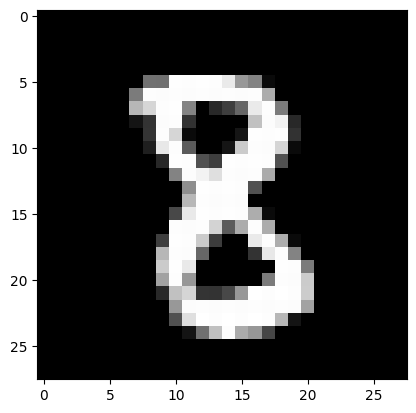

In [ ]:
test_prediction(50, W1, b1, W2, b2)